# Proyek KASDD Ganjil 2023/24 : Valorant Pro Matches
**Nama Kelompok**: STKPlusSatu

| Nama                          | NPM         | Kelas |
|-------------------------------|-------------|-------|
| Kevin Alexander               | 2106705026  | B     |
| Emir Shamsuddin Fadhlurrahman | 2106632541  | F     |
| Michael Christlambert Sinanta | 2106750414  | F     |
| Vinsen Wijaya                 | 2106637776  | F     |


# EDA Agent dan ACS

## Install Library  

In [ ]:
%pip install plotly-express

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scp
import plotly.express as px
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

## Read Dataset

In [ ]:
df = pd.read_csv('dataset_final/final_dataset.csv')
df.head()

GameID  PlayerID PlayerName TeamAbbreviation    Agent    ACS  Kills  \
0   60894    8419.0     Reduxx             Boos     jett  313.0   24.0   
1   60894     466.0     ChurmZ             Boos  chamber  227.0   16.0   
2   60894    3712.0   diaamond             Boos     sova  226.0   17.0   
3   60894    5099.0     Boltzy             Boos    viper  218.0   17.0   
4   60894    3983.0     Virtyy             Boos     skye   80.0    5.0   

   Deaths  Assists  PlusMinus  ...  Patch  EventID  \
0    10.0      3.0       14.0  ...    3.0      826   
1    10.0      7.0        6.0  ...    3.0      826   
2     9.0      8.0        8.0  ...    3.0      826   
3    12.0      2.0        5.0  ...    3.0      826   
4    13.0      3.0       -8.0  ...    3.0      826   

                                           EventName  \
0  Nerd Street Gamers Winter Championship - Regio...   
1  Nerd Street Gamers Winter Championship - Regio...   
2  Nerd Street Gamers Winter Championship - Regio...   
3  Nerd Street Gamers Winter Championship - Regio...   
4  Nerd Street Gamers Winter Championship - Regio...   

                 EventStage  Team1ID  Team2ID                Team1     Team2  \
0  Group Stage: Decider (A)     6903     6020  Booster Seat Gaming  Pho Real   
1  Group Stage: Decider (A)     6903     6020  Booster Seat Gaming  Pho Real   
2  Group Stage: Decider (A)     6903     6020  Booster Seat Gaming  Pho Real   
3  Group Stage: Decider (A)     6903     6020  Booster Seat Gaming  Pho Real   
4  Group Stage: Decider (A)     6903     6020  Booster Seat Gaming  Pho Real   

   Team1_MapScore  Team2_MapScore  
0               2               1  
1               2               1  
2               2               1  
3               2               1  
4               2               1  

[5 rows x 51 columns]

In [ ]:
kill_death = df.groupby(['Agent'])[['Kills', 'Deaths']].mean()
kill_death

Kills     Deaths
Agent                          
astra      13.931704  14.047707
breach     12.625173  14.451217
brimstone  13.558773  14.592277
chamber    15.271523  13.735099
cypher     13.760150  14.477170
jett       16.575929  15.091930
kayo       13.521628  14.571247
killjoy    14.132427  14.187306
omen       13.806178  14.577132
phoenix    15.644656  15.109258
raze       16.180741  15.345909
reyna      16.471694  15.236518
sage       13.780072  14.426691
skye       13.855362  14.646717
sova       13.755547  13.877260
viper      13.925054  14.243889
yoru       15.167785  15.530201

<Axes: xlabel='Agent'>

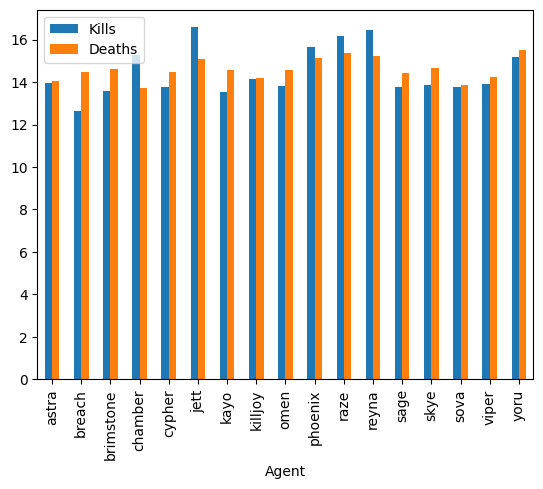

In [ ]:
kill_death.plot.bar(rot=90)

In [ ]:
nonnull_da = df[["Agent", "ACS"]].dropna()
nonnull_da

Agent    ACS
0          jett  313.0
1       chamber  227.0
2          sova  226.0
3         viper  218.0
4          skye   80.0
...         ...    ...
108245     omen  227.0
108246  phoenix  110.0
108247     jett   98.0
108248     sova   91.0
108249   cypher   88.0

[108250 rows x 2 columns]

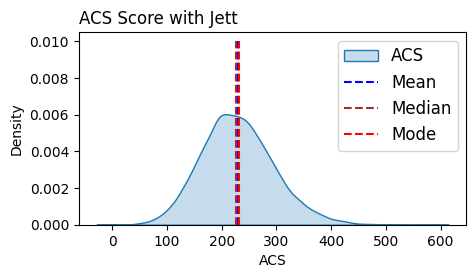

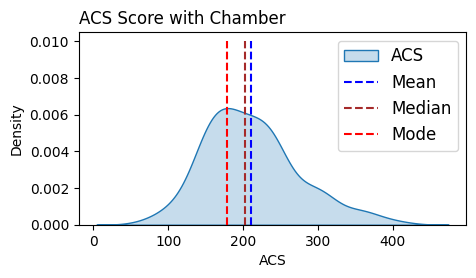

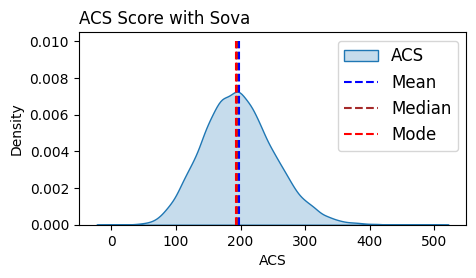

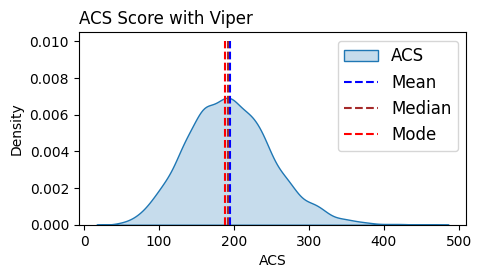

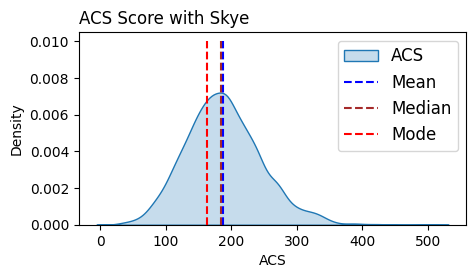

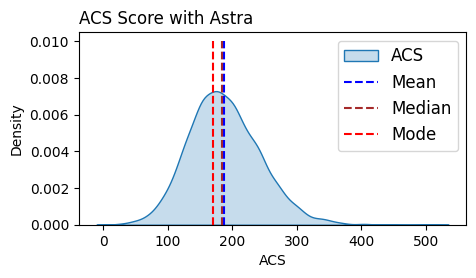

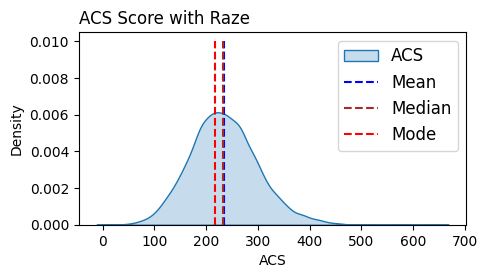

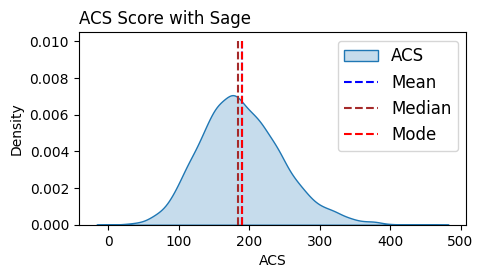

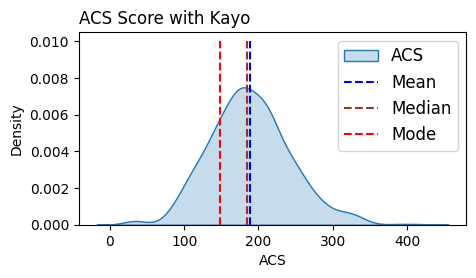

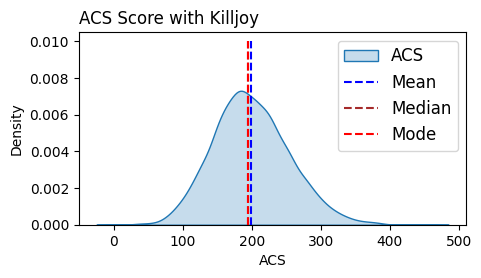

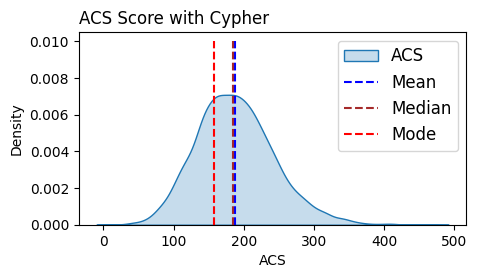

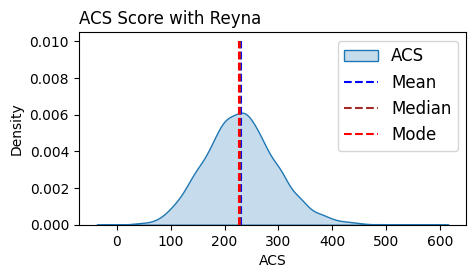

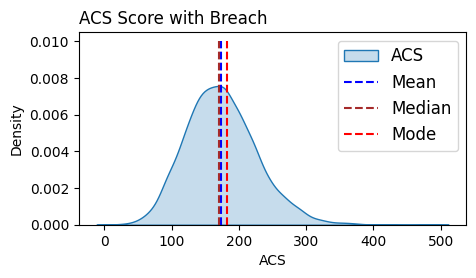

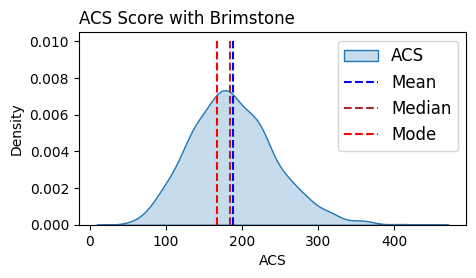

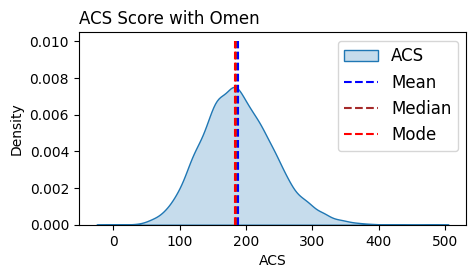

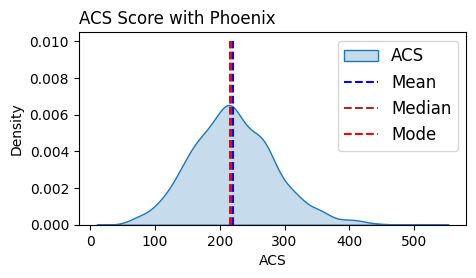

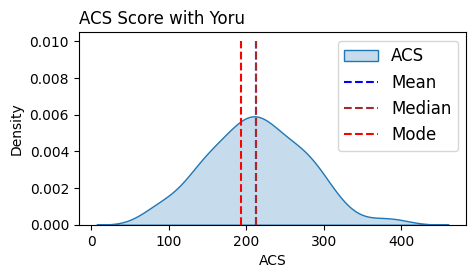

In [ ]:
for i in (nonnull_da['Agent'].unique()):
    plot = (nonnull_da[nonnull_da['Agent'] == i])["ACS"]
    plt.figure(figsize=(5,2.5))
    plt.title(f"ACS Score with {i.capitalize()}", loc='left')

    sns.kdeplot(plot, fill=True)
    plt.vlines(x=np.mean(plot), ymin=0, ymax=0.01, color='blue', linestyle='--')
    plt.vlines(x=np.median(plot), ymin=0, ymax=0.01, color='brown', linestyle='--')
    plt.vlines(x=scp.mode(plot)[0], ymin=0, ymax=0.01, color='red', linestyle='--')
    plt.legend(["ACS", 'Mean', 'Median', 'Mode'], fontsize=12)
    plt.show()


In [ ]:
scores_reduction = df[["Agent", "ACS", "GameID"]]
games_reduction = df[["GameID", "Map"]]

merge = pd.merge(scores_reduction, games_reduction, on='GameID')
merge_nonnull = merge.dropna()
merge_nonnull

Agent    ACS  GameID     Map
0          jett  313.0   60894  Breeze
1          jett  313.0   60894  Breeze
2          jett  313.0   60894  Breeze
3          jett  313.0   60894  Breeze
4          jett  313.0   60894  Breeze
...         ...    ...     ...     ...
1082495  cypher   88.0    2309    Bind
1082496  cypher   88.0    2309    Bind
1082497  cypher   88.0    2309    Bind
1082498  cypher   88.0    2309    Bind
1082499  cypher   88.0    2309    Bind

[1082500 rows x 4 columns]

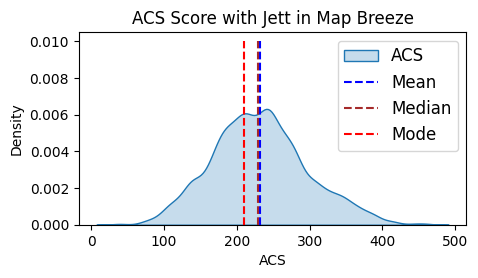

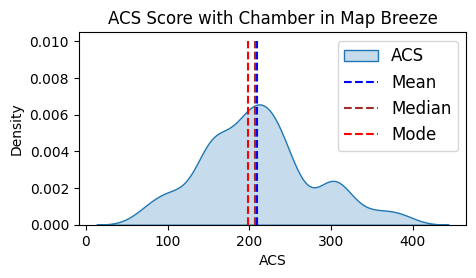

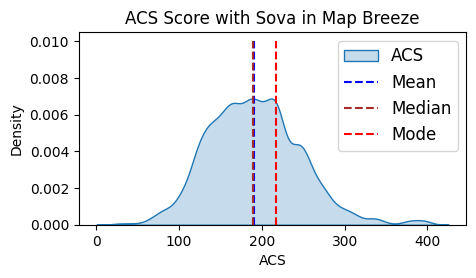

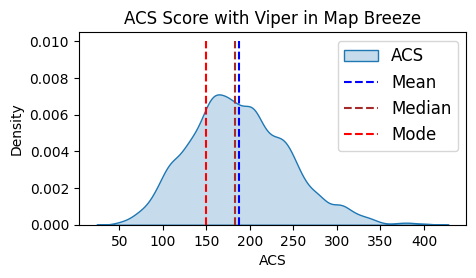

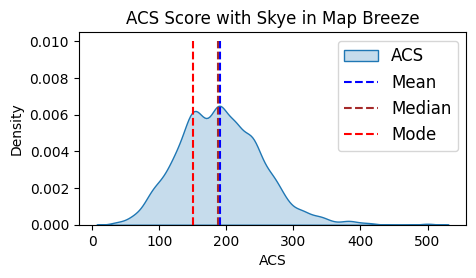

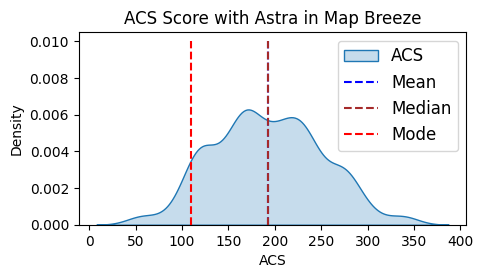

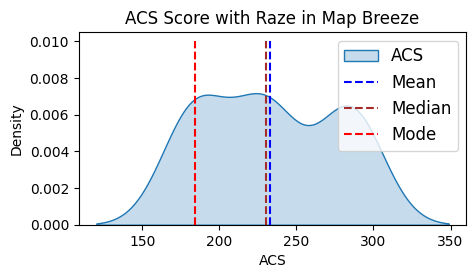

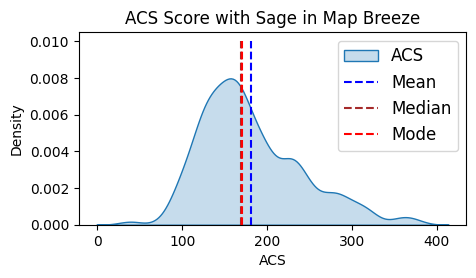

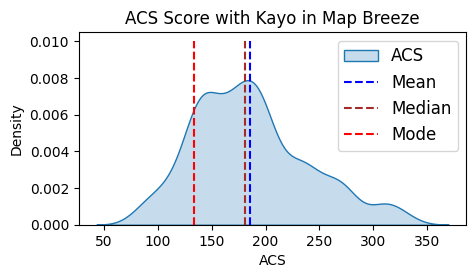

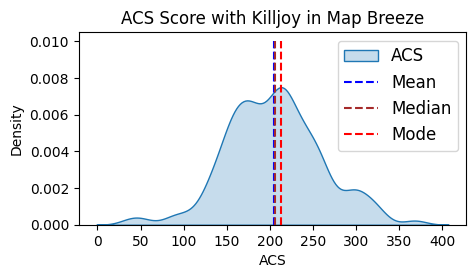

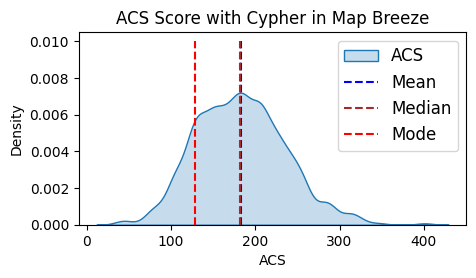

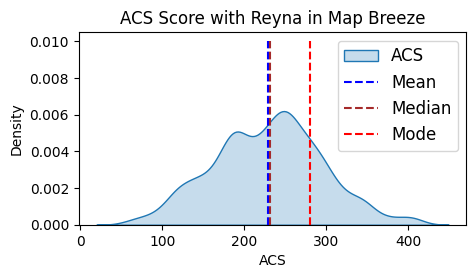

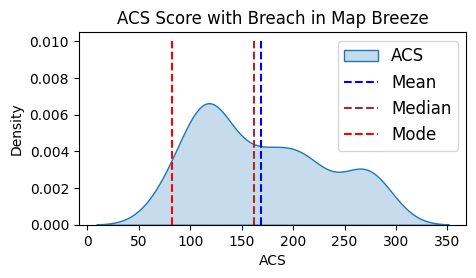

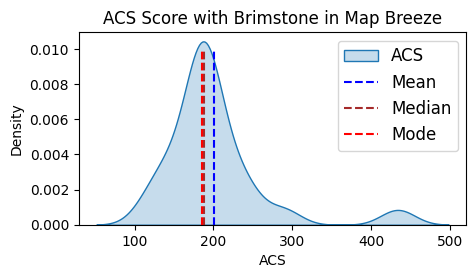

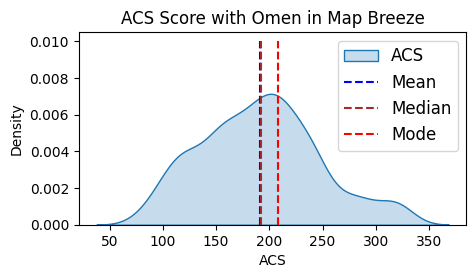

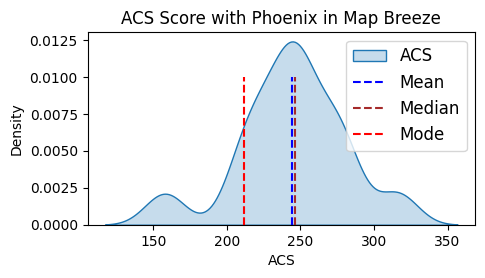

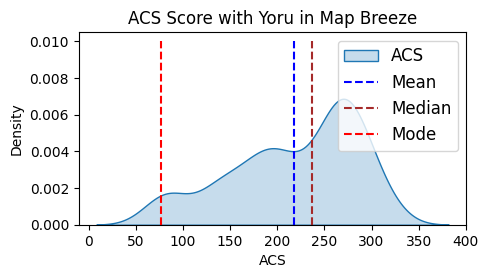

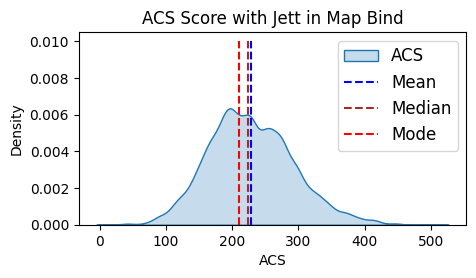

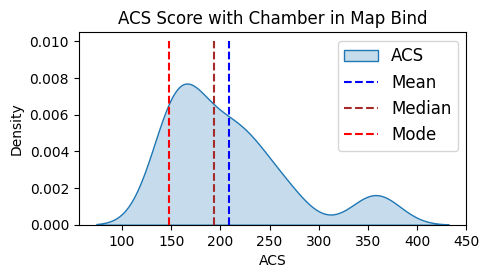

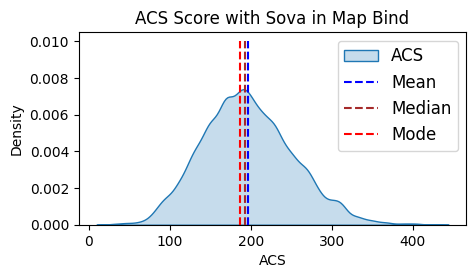

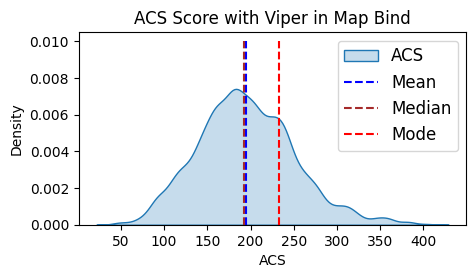

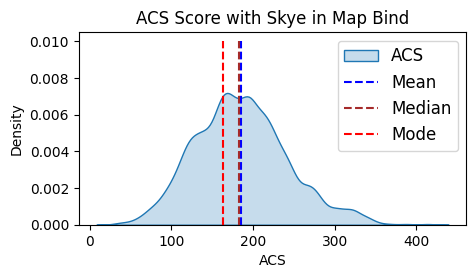

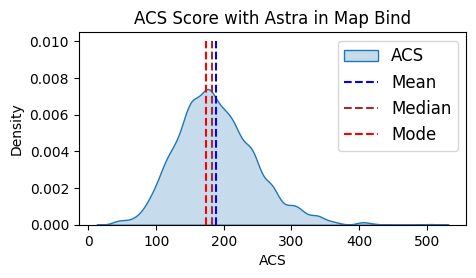

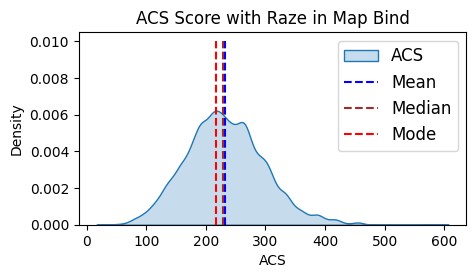

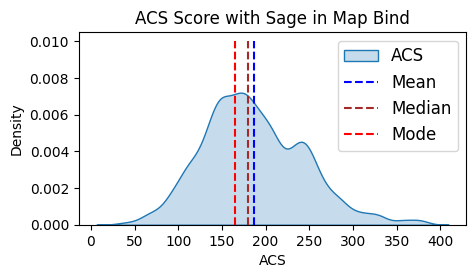

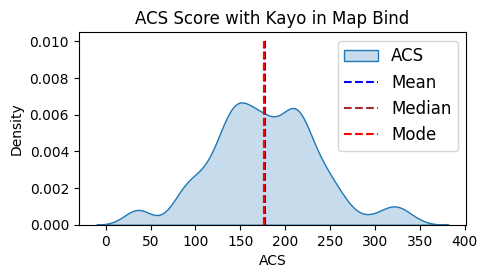

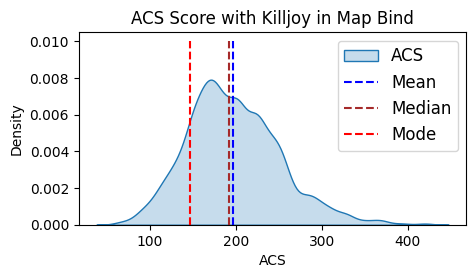

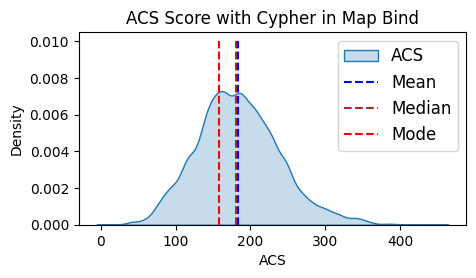

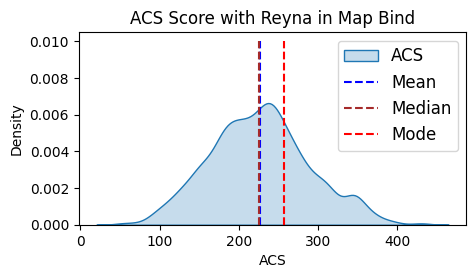

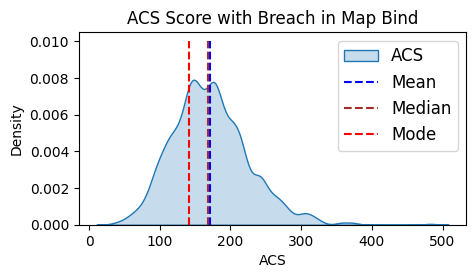

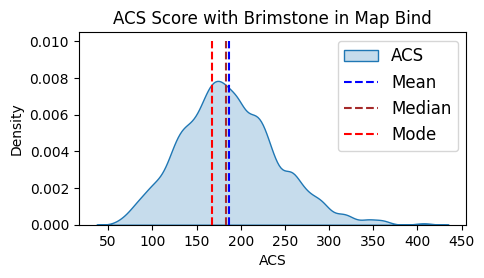

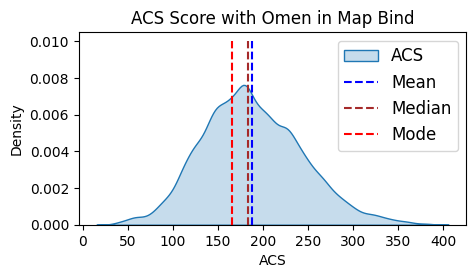

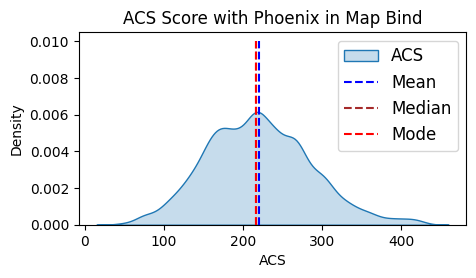

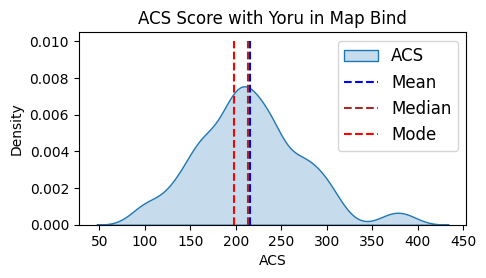

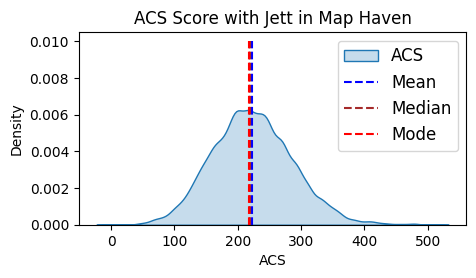

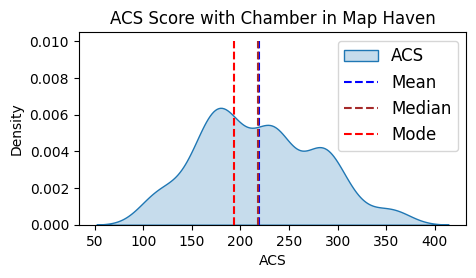

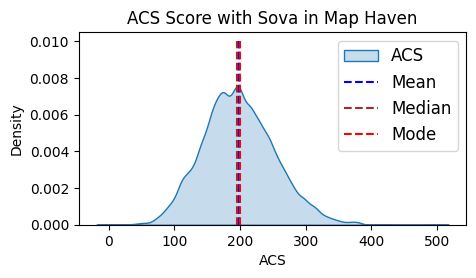

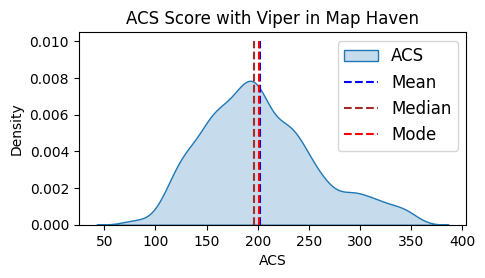

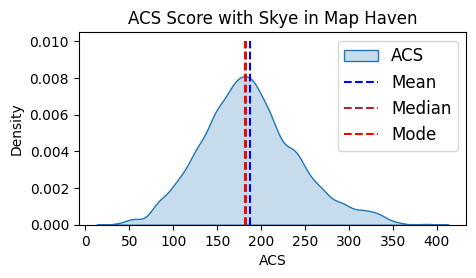

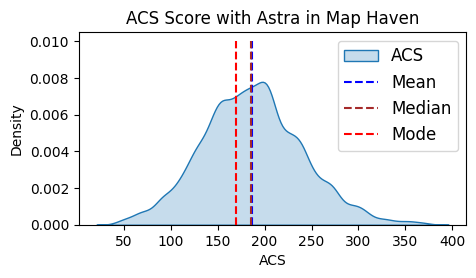

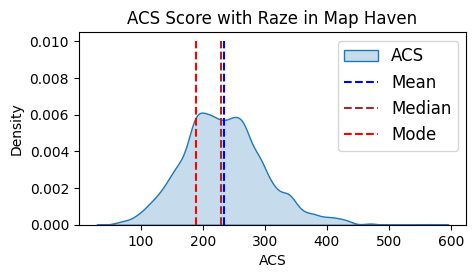

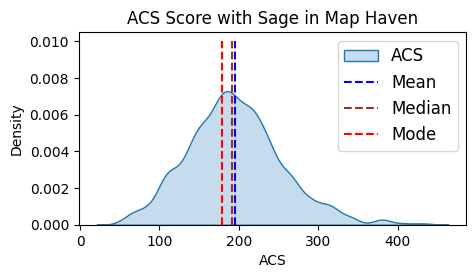

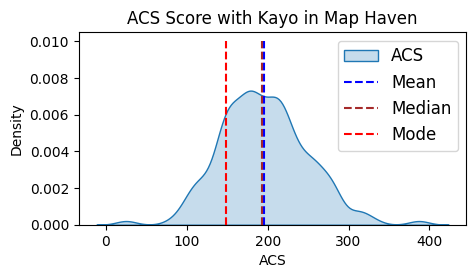

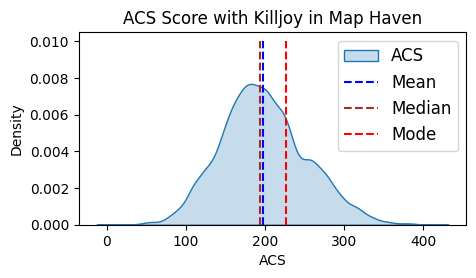

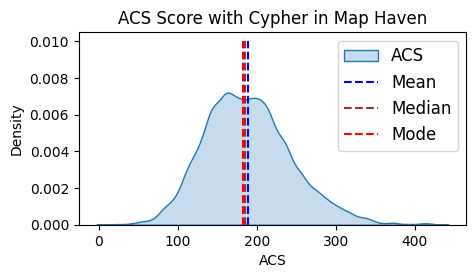

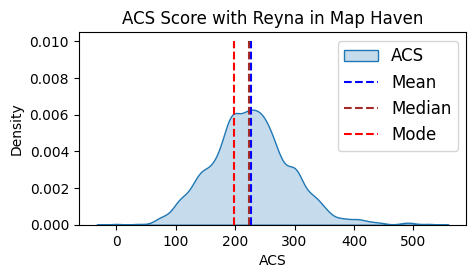

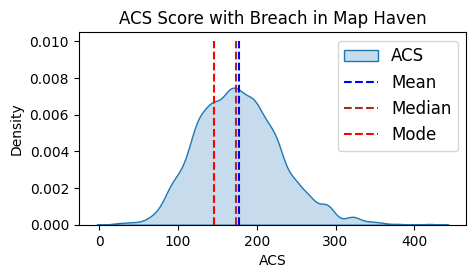

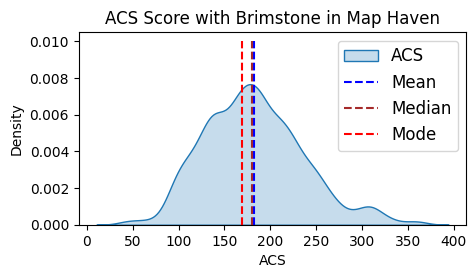

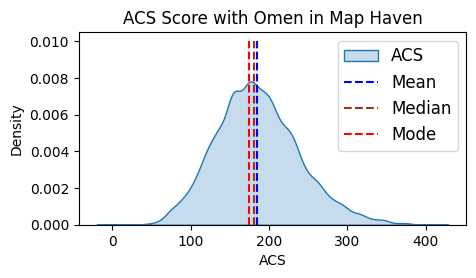

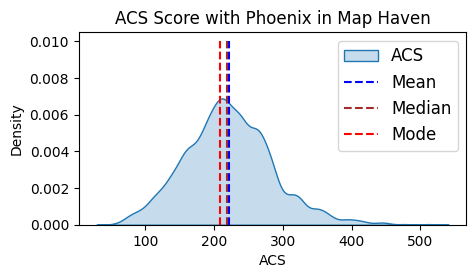

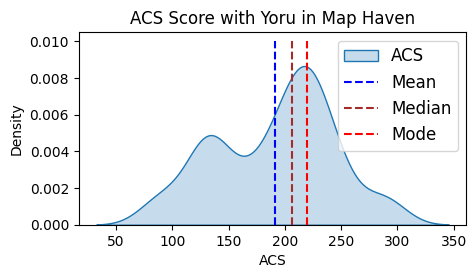

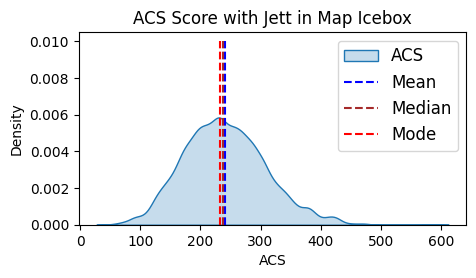

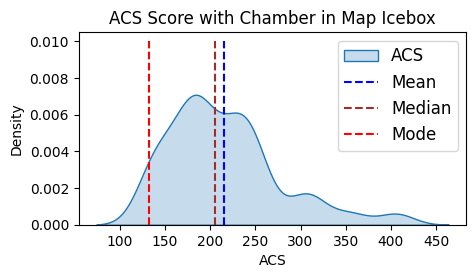

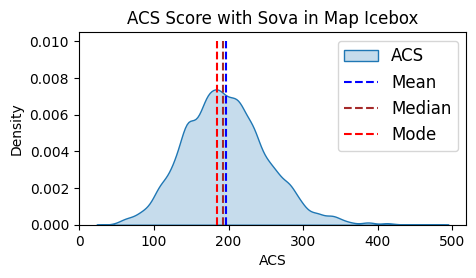

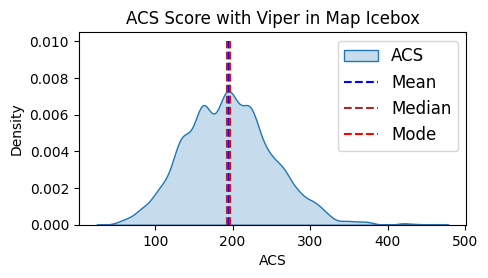

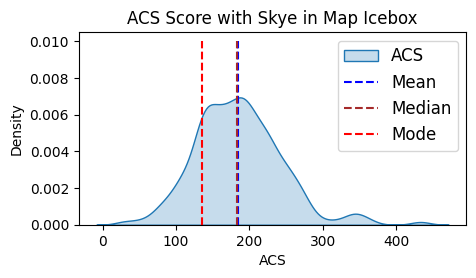

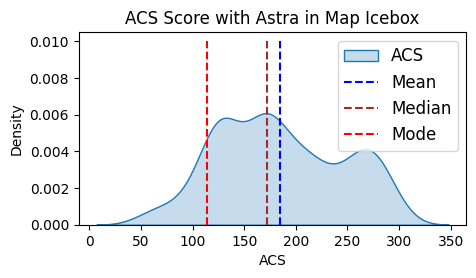

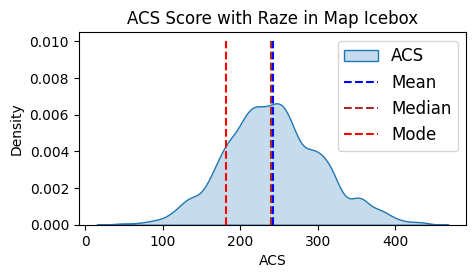

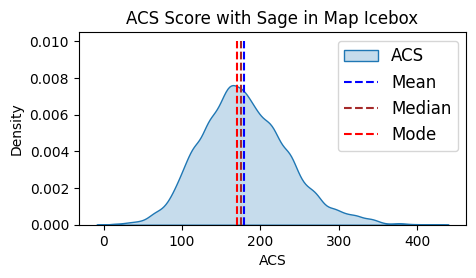

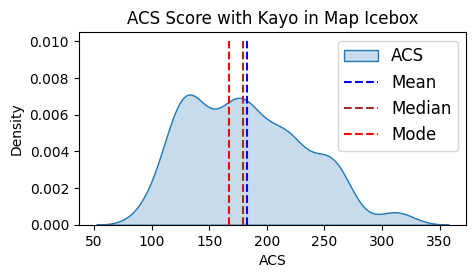

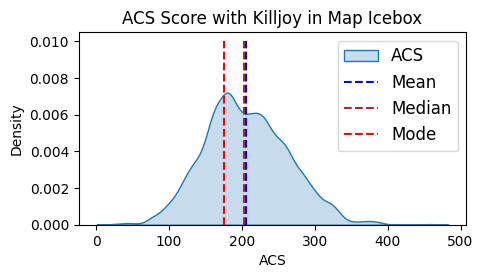

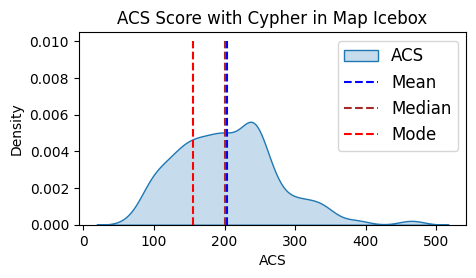

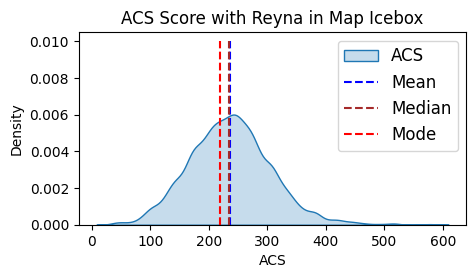

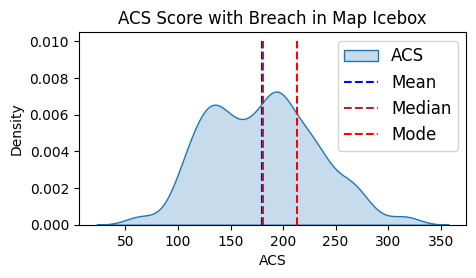

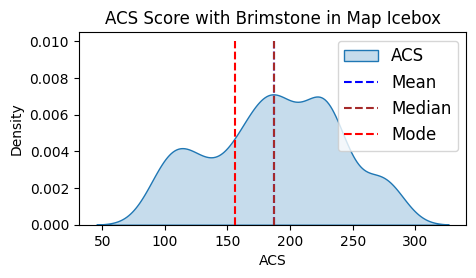

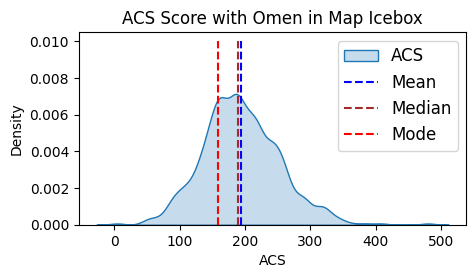

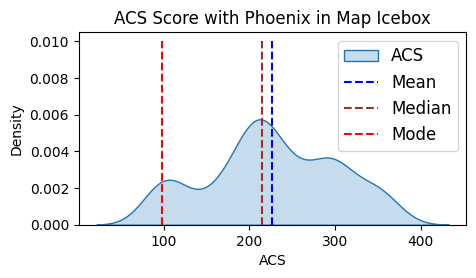

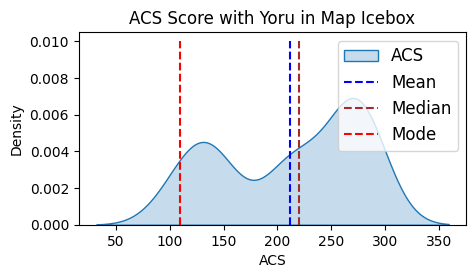

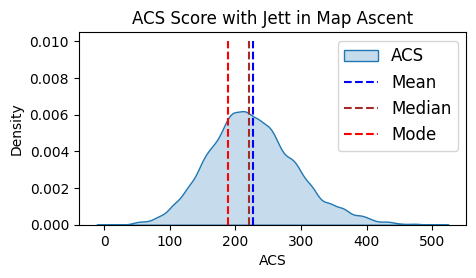

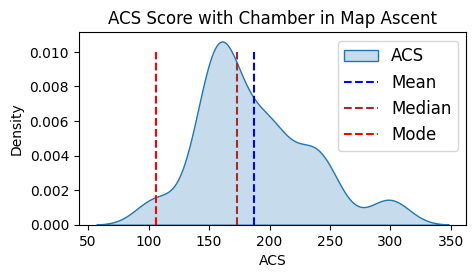

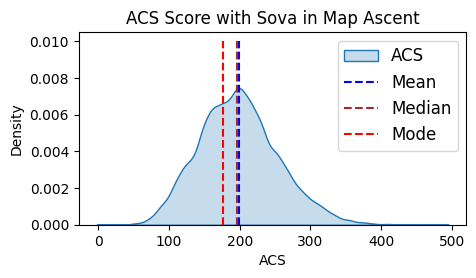

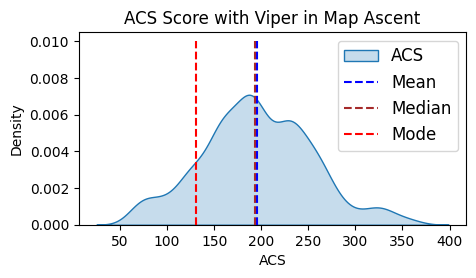

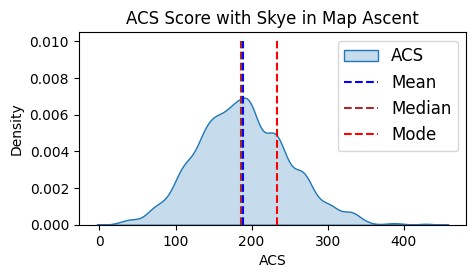

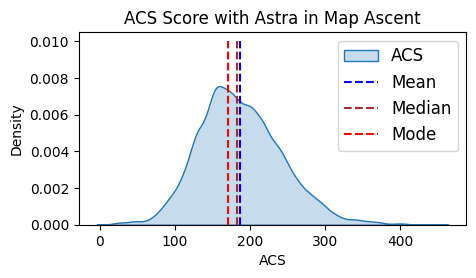

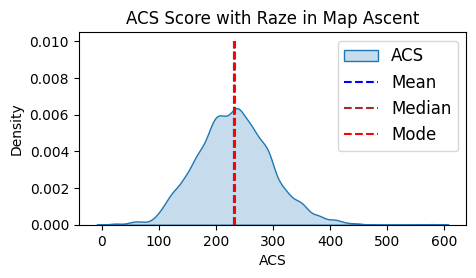

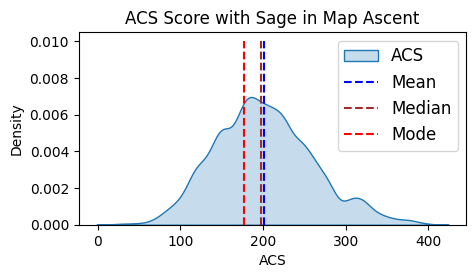

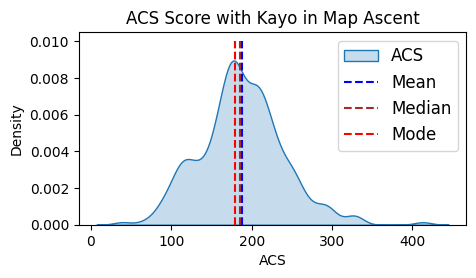

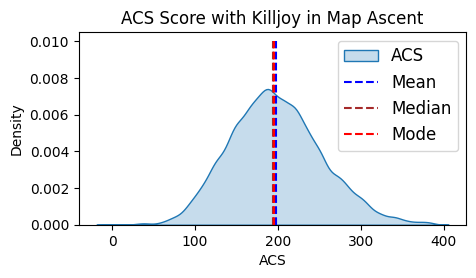

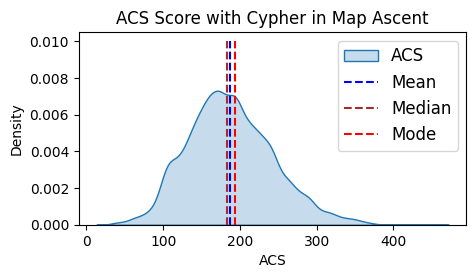

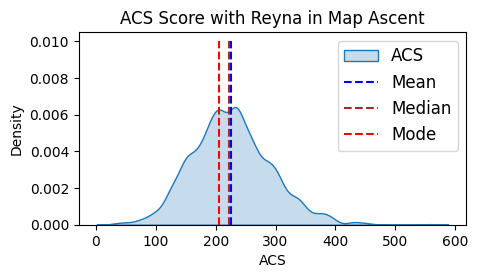

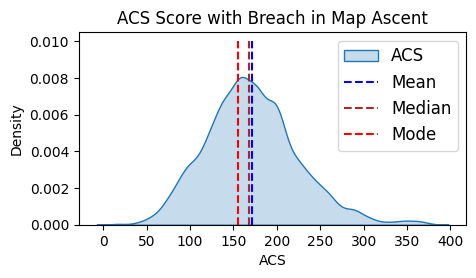

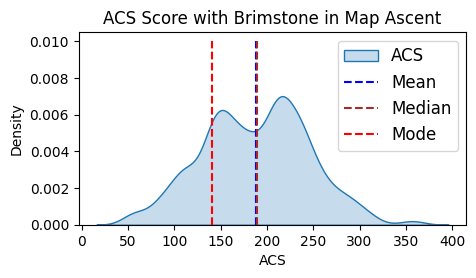

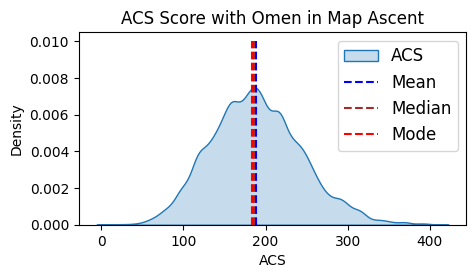

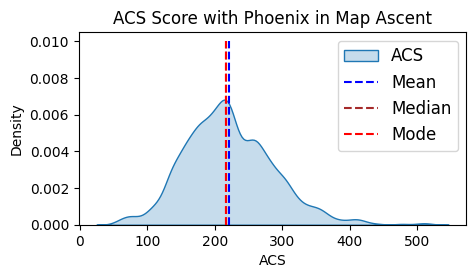

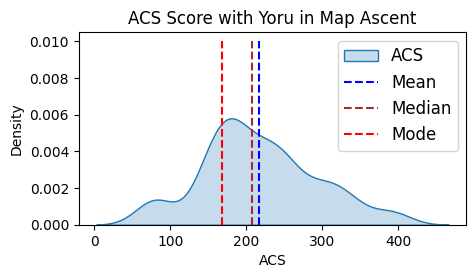

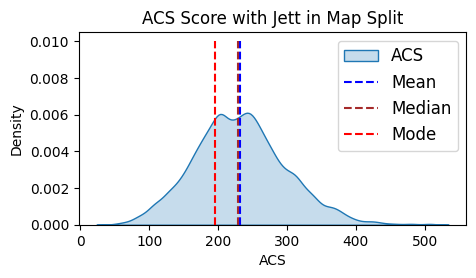

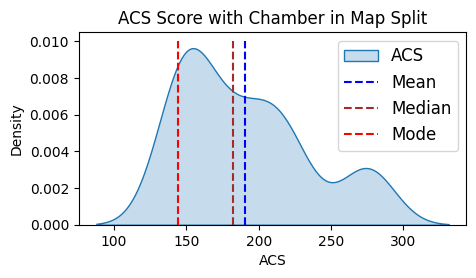

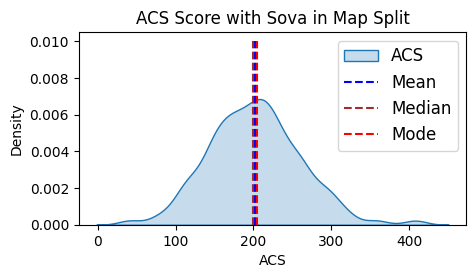

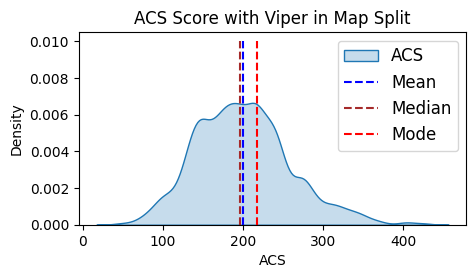

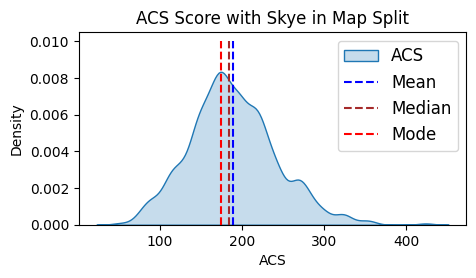

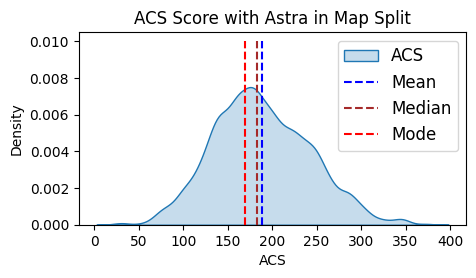

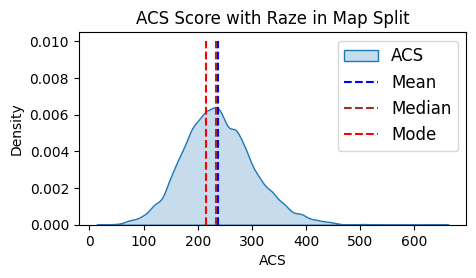

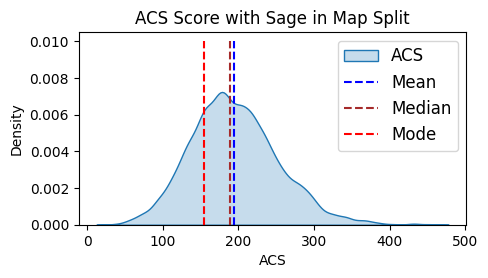

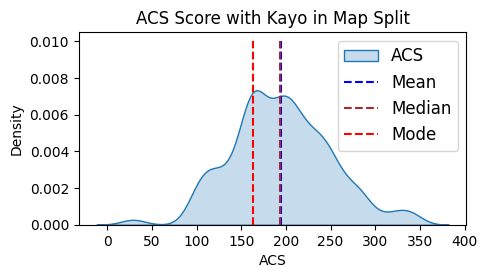

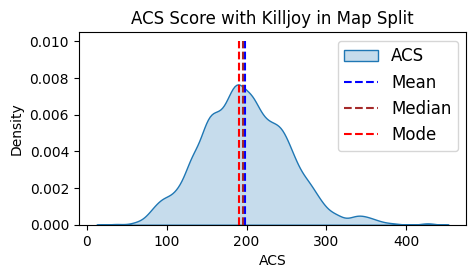

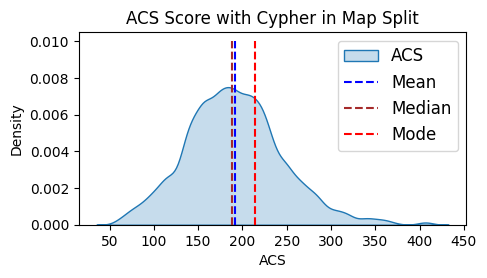

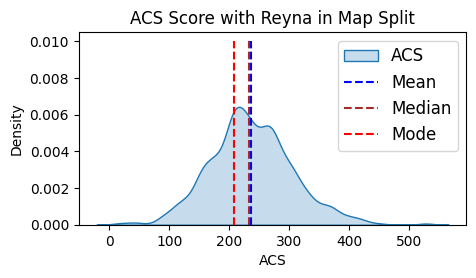

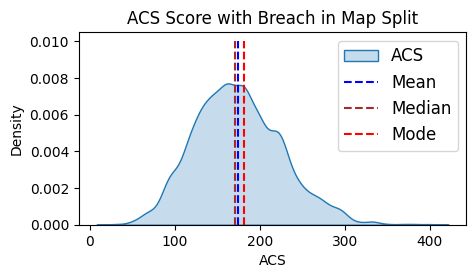

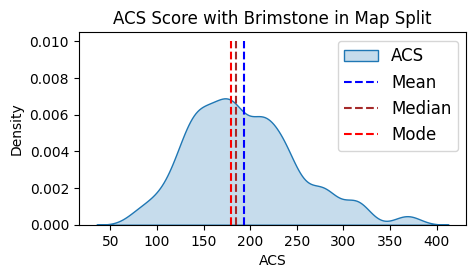

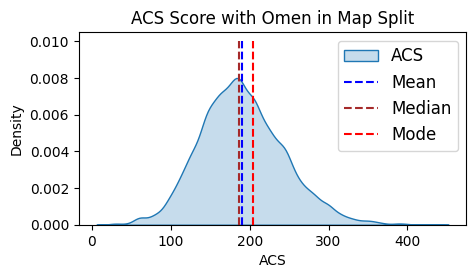

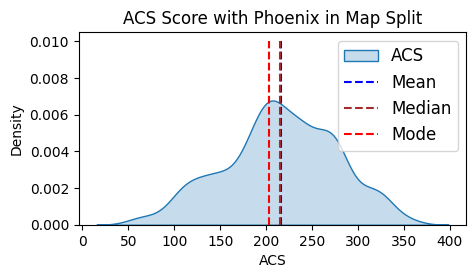

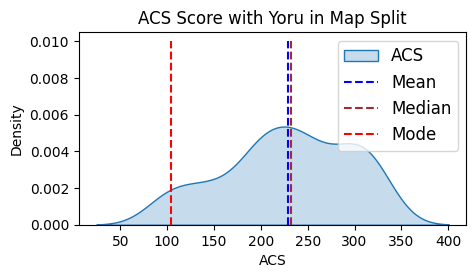

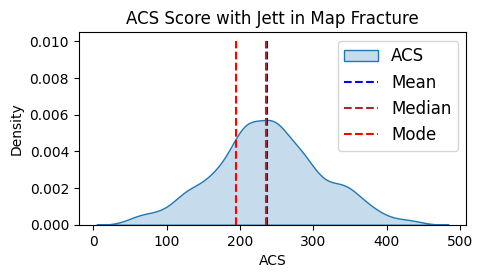

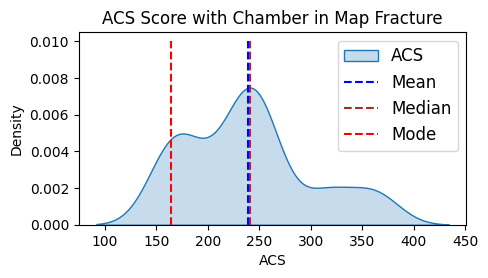

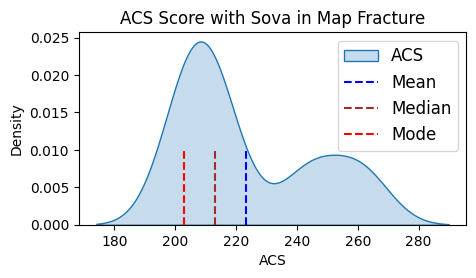

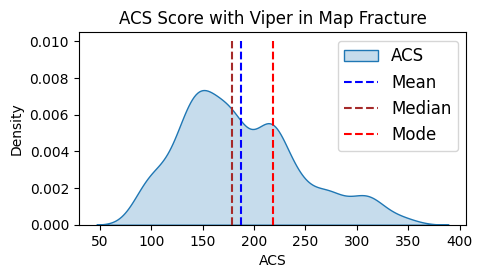

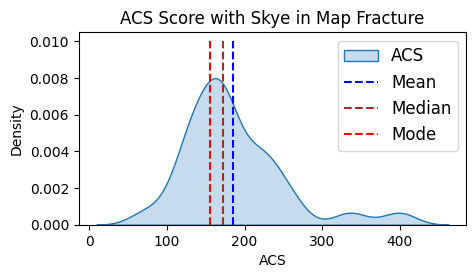

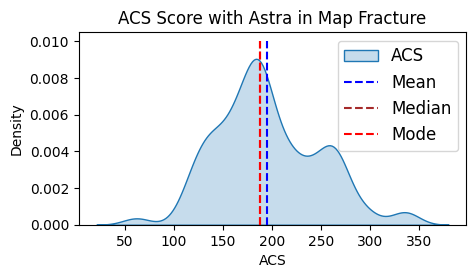

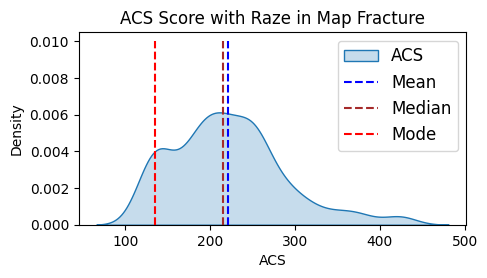

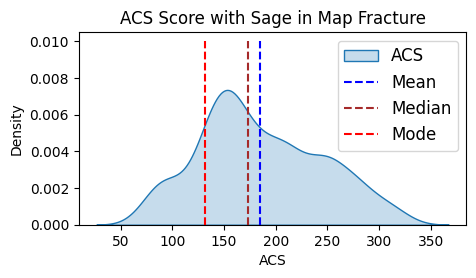

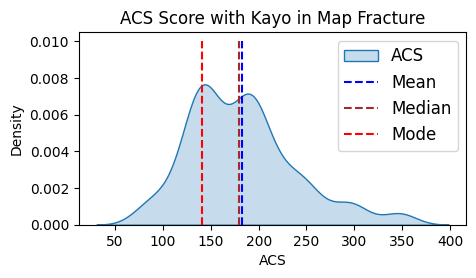

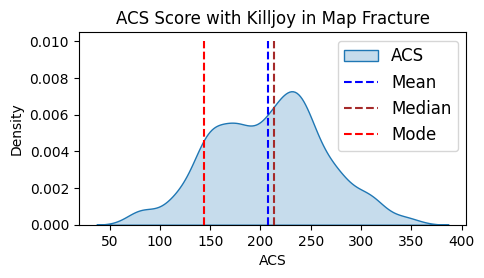

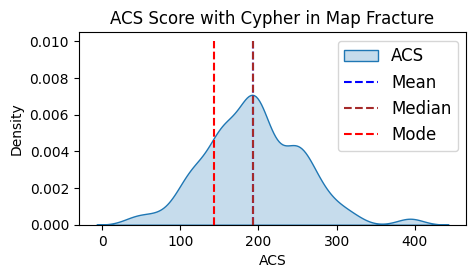

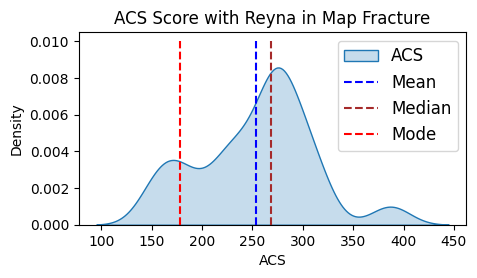

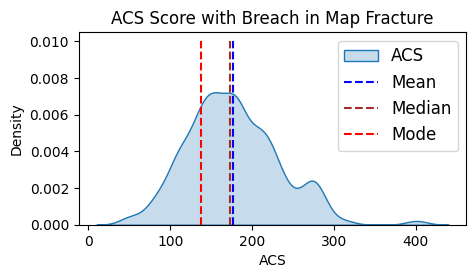

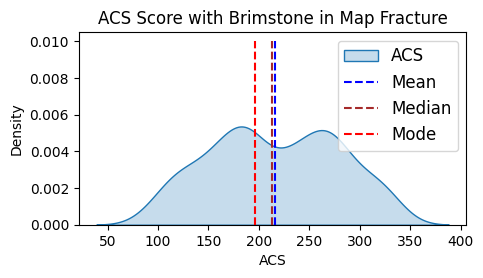

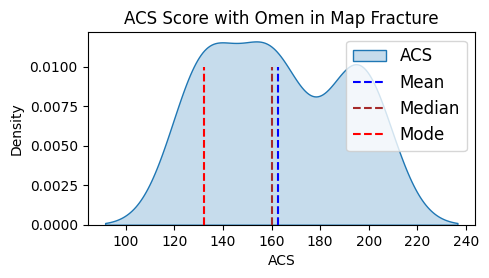

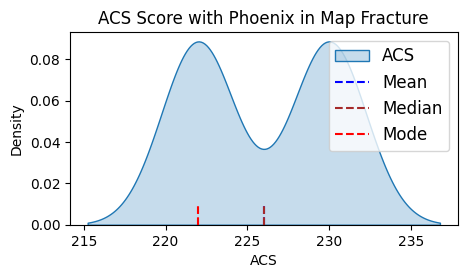

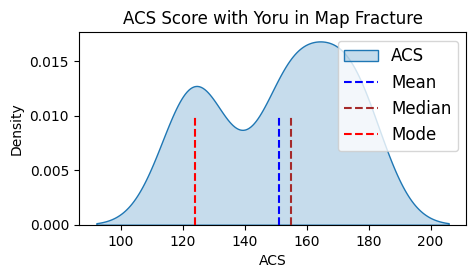

In [ ]:
for i in (merge_nonnull['Map'].unique()):
    for j in (merge_nonnull['Agent'].unique()):
        # plot = (nonnull_da[nonnull_da['Agent'] == i])["ACS"]
        plot = merge_nonnull[(merge_nonnull['Agent'] == j) & (merge_nonnull['Map'] == i)]["ACS"]
        # print(plot)
        plt.figure(figsize=(5,2.5))
        plt.title(f"ACS Score with {j.capitalize()} in Map {i.capitalize()}")
        sns.kdeplot(plot, fill=True)
        plt.vlines(x=np.mean(plot), ymin=0, ymax=0.01, color='blue', linestyle='--')
        plt.vlines(x=np.median(plot), ymin=0, ymax=0.01, color='brown', linestyle='--')
        plt.vlines(x=scp.mode(plot)[0], ymin=0, ymax=0.01, color='red', linestyle='--')
        plt.legend(["ACS", 'Mean', 'Median', 'Mode'], fontsize=12)
        plt.show()


# EDA Agent dan Pickrate

**Cara Menjalankan Program:**

1. Siapkan file yang dibutuhkan dalam satu folder.
```
    Folder
    │
    └─── tk-kasdad.ipynb
    │   
    └─── games.csv
    │   
    └─── matches.csv
    │   
    └─── scores.csv
    │   
    └─── agent_encode.csv
```
* Dataset dapat diakses pada [link](https://drive.google.com/drive/folders/1Fd8342inMJjF46Df7aMlo51qEvtWfl3s) ini
2. Jalankan program dengan menekan "Run All"
3. Program dapat berhasil dijalankan.

## Install Library

In [ ]:
%pip install pandas numpy seaborn scipy plotly matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


##  Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scp
import plotly.express as px
import matplotlib.pyplot as plt

## Read Dataset

In [ ]:
df = pd.read_csv('dataset_final/final_dataset.csv')
df.head()

GameID  PlayerID PlayerName TeamAbbreviation    Agent    ACS  Kills  \
0   60894    8419.0     Reduxx             Boos     jett  313.0   24.0   
1   60894     466.0     ChurmZ             Boos  chamber  227.0   16.0   
2   60894    3712.0   diaamond             Boos     sova  226.0   17.0   
3   60894    5099.0     Boltzy             Boos    viper  218.0   17.0   
4   60894    3983.0     Virtyy             Boos     skye   80.0    5.0   

   Deaths  Assists  PlusMinus  ...  Patch  EventID  \
0    10.0      3.0       14.0  ...    3.0      826   
1    10.0      7.0        6.0  ...    3.0      826   
2     9.0      8.0        8.0  ...    3.0      826   
3    12.0      2.0        5.0  ...    3.0      826   
4    13.0      3.0       -8.0  ...    3.0      826   

                                           EventName  \
0  Nerd Street Gamers Winter Championship - Regio...   
1  Nerd Street Gamers Winter Championship - Regio...   
2  Nerd Street Gamers Winter Championship - Regio...   
3  Nerd Street Gamers Winter Championship - Regio...   
4  Nerd Street Gamers Winter Championship - Regio...   

                 EventStage  Team1ID  Team2ID                Team1     Team2  \
0  Group Stage: Decider (A)     6903     6020  Booster Seat Gaming  Pho Real   
1  Group Stage: Decider (A)     6903     6020  Booster Seat Gaming  Pho Real   
2  Group Stage: Decider (A)     6903     6020  Booster Seat Gaming  Pho Real   
3  Group Stage: Decider (A)     6903     6020  Booster Seat Gaming  Pho Real   
4  Group Stage: Decider (A)     6903     6020  Booster Seat Gaming  Pho Real   

   Team1_MapScore  Team2_MapScore  
0               2               1  
1               2               1  
2               2               1  
3               2               1  
4               2               1  

[5 rows x 51 columns]

## Data Analysis

Kolom yang relevan terhadap analisis pick-rate agent adalah kolom `Agent` dan `Patch`, informasi lain pada dataframe kurang relevan.

In [ ]:
df_pickrate = df[['Agent', 'Patch']]
df_pickrate.columns

Index(['Agent', 'Patch'], dtype='object')

Pada tahap Pre-processing, semua `Patch` telah digeneralisasi menjadi Patch 1.X, 2.X, dan 3.X. Sehingga data langsung dapat langsung dibuatkan plot

C:\Users\vinse\AppData\Local\Temp\ipykernel_25160\3695196208.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_pickrate[df_pickrate['Patch'] == 1.0], x='Agent', order=hue_order, legend=False, palette='magma')
C:\Users\vinse\AppData\Local\Temp\ipykernel_25160\3695196208.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_pickrate[df_pickrate['Patch'] == 2.0], x='Agent', order=hue_order, legend=False, palette='magma')
C:\Users\vinse\AppData\Local\Temp\ipykernel_25160\3695196208.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn

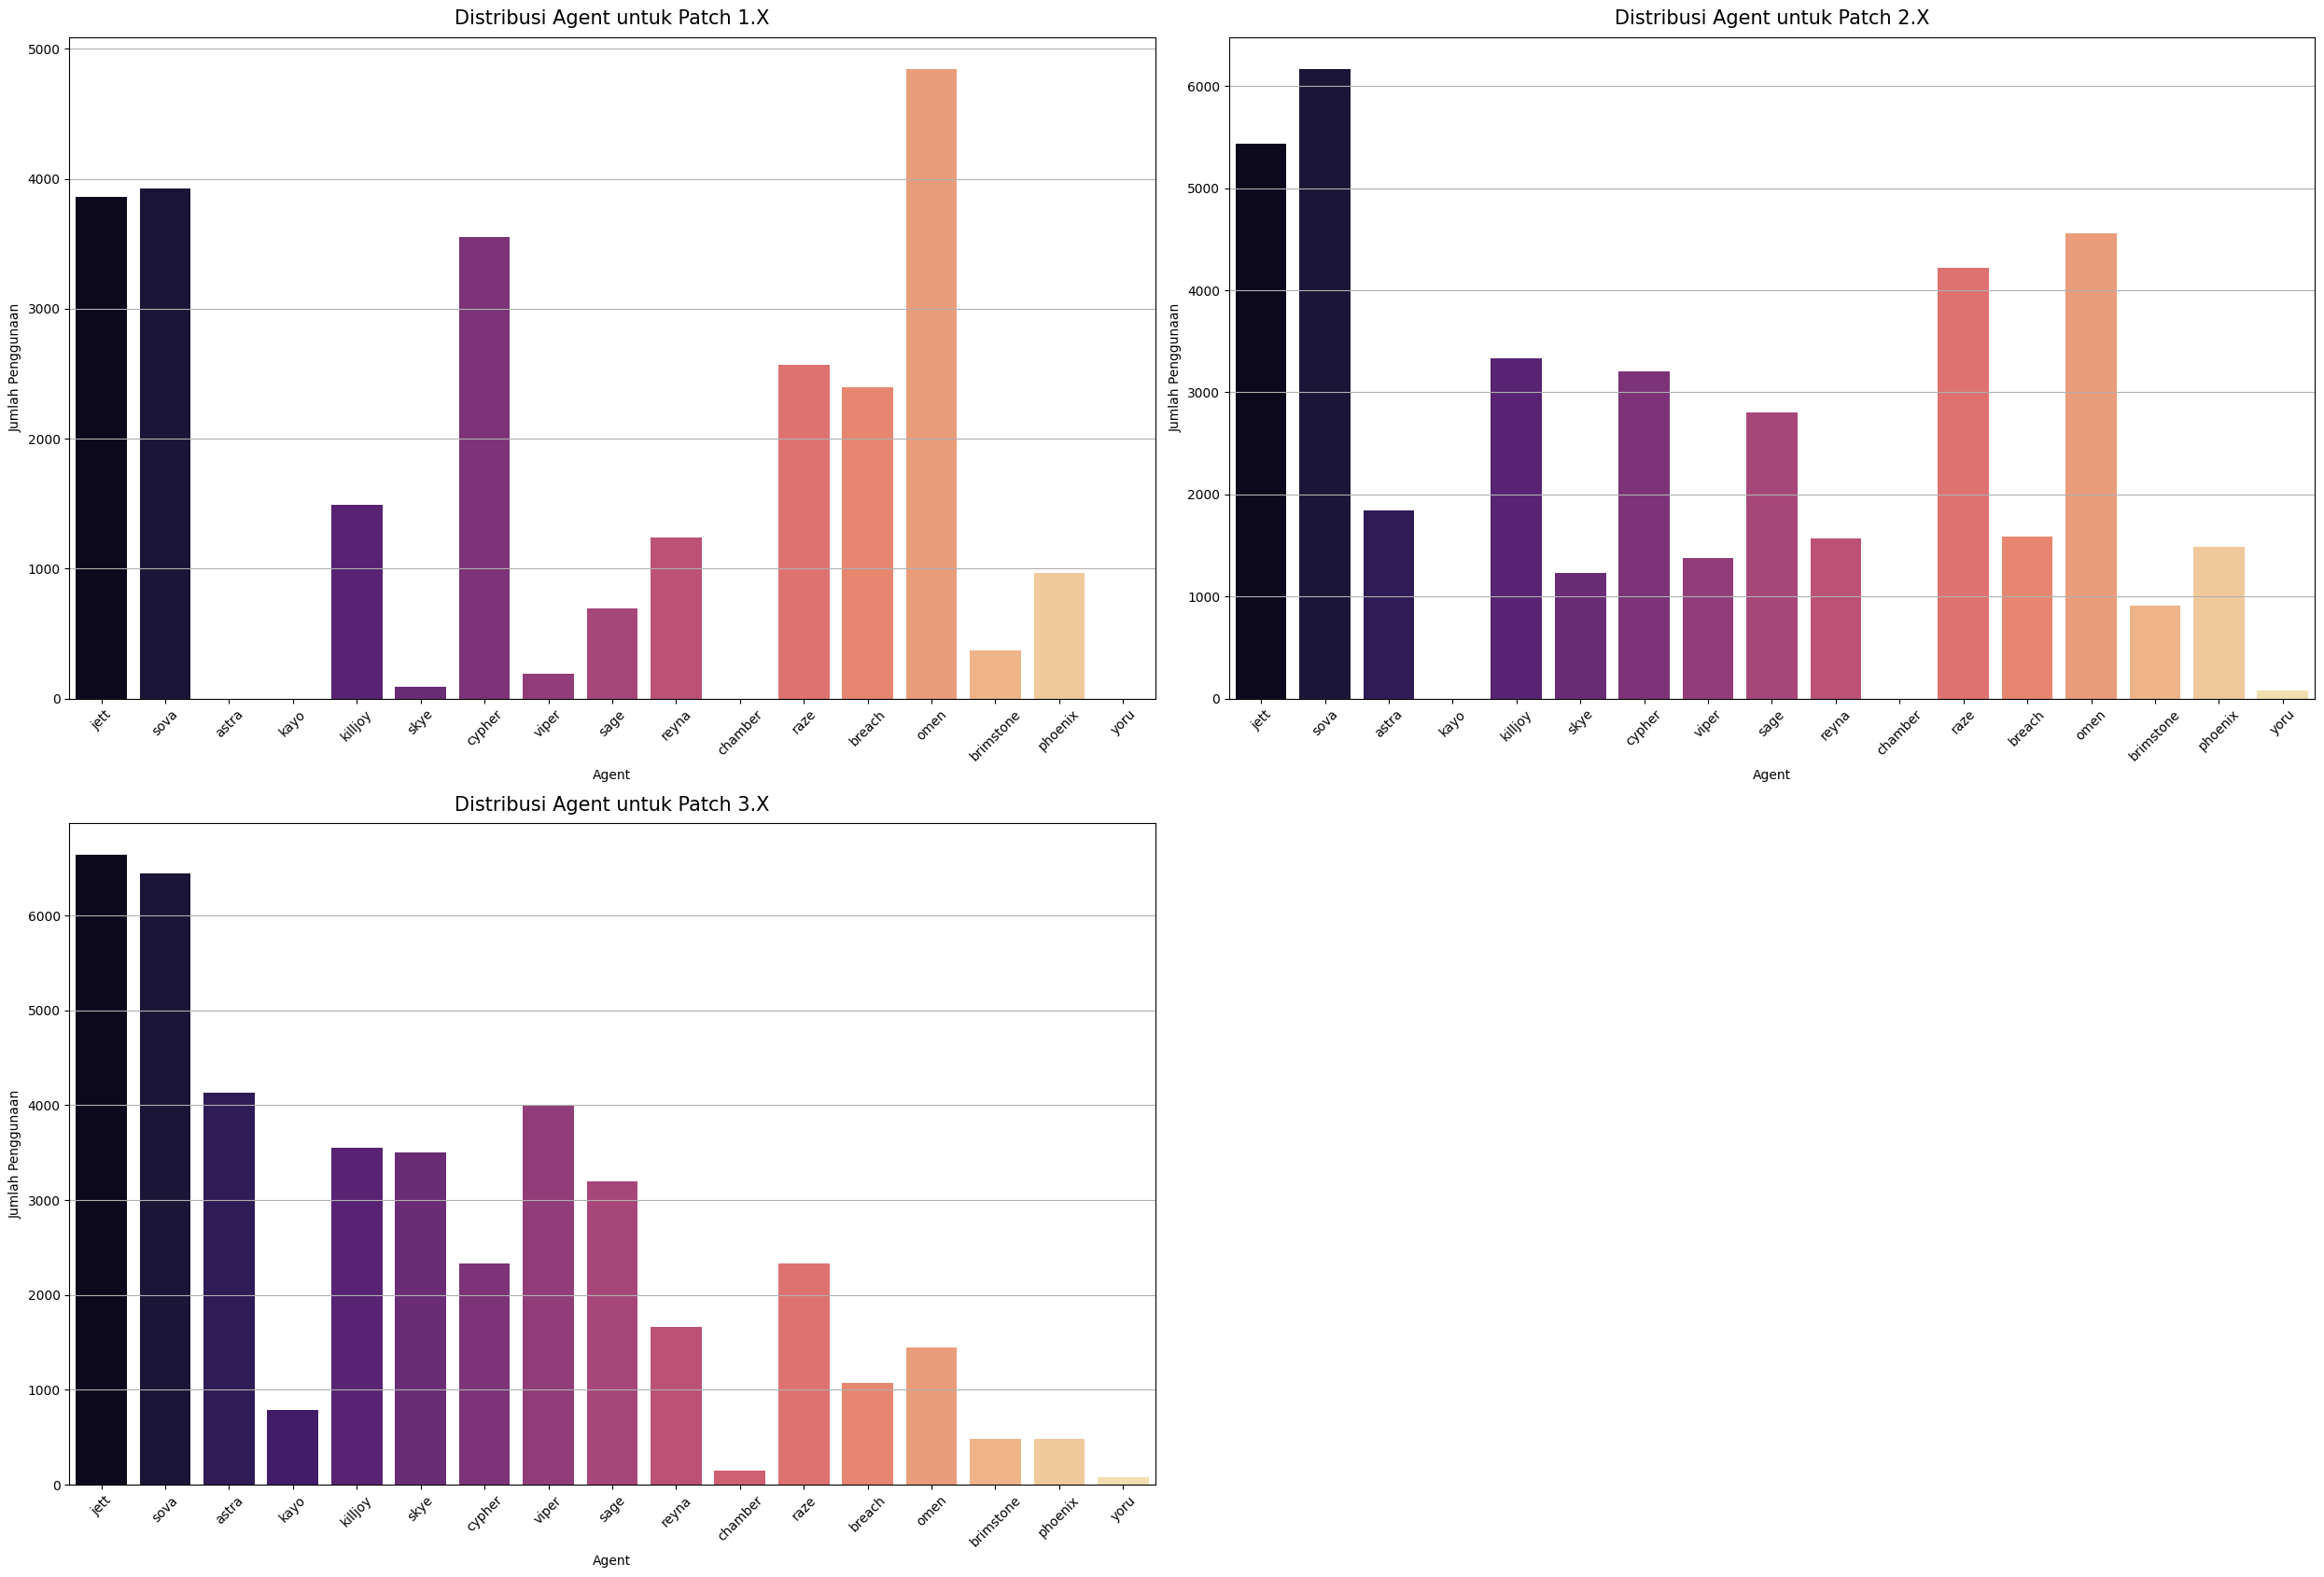

In [ ]:
df_encode = pd.read_csv('dataset/agent_encode.csv') # untuk kebutuhan hue_order
hue_order = df_encode['Agent']

plt.figure(figsize=(25, 17))
plt.subplot(2, 2, 1)
sns.countplot(data=df_pickrate[df_pickrate['Patch'] == 1.0], x='Agent', order=hue_order, legend=False, palette='magma')
plt.title('Distribusi Agent untuk Patch 1.X', fontsize=15, pad=10)
plt.xlabel('Agent')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Penggunaan')
plt.grid(axis='y')
plt.tight_layout()

plt.subplot(2, 2, 2)
sns.countplot(data=df_pickrate[df_pickrate['Patch'] == 2.0], x='Agent', order=hue_order, legend=False, palette='magma')
plt.title('Distribusi Agent untuk Patch 2.X', fontsize=15, pad=10)
plt.xlabel('Agent')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Penggunaan')
plt.grid(axis='y')
plt.tight_layout()

plt.subplot(2, 2, 3)
sns.countplot(data=df_pickrate[df_pickrate['Patch'] == 3.0], x='Agent', order=hue_order, legend=False, palette='magma')
plt.title('Distribusi Agent untuk Patch 3.X', fontsize=15, pad=10)
plt.xlabel('Agent')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Penggunaan')
plt.grid(axis='y')
plt.tight_layout()

plt.show()

C:\Users\vinse\AppData\Local\Temp\ipykernel_25160\1231940028.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_pickrate[df_pickrate['Agent'] == agent],
C:\Users\vinse\AppData\Local\Temp\ipykernel_25160\1231940028.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['1.X', '2.X', '3.X'])
C:\Users\vinse\AppData\Local\Temp\ipykernel_25160\1231940028.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_pickrate[df_pickrate['Agent'] == agent],
C:\Users\vinse\AppData\Local\Temp\ipykernel_25160\1231940028.py:16: UserWarning: set_ticklabels() should only be used 

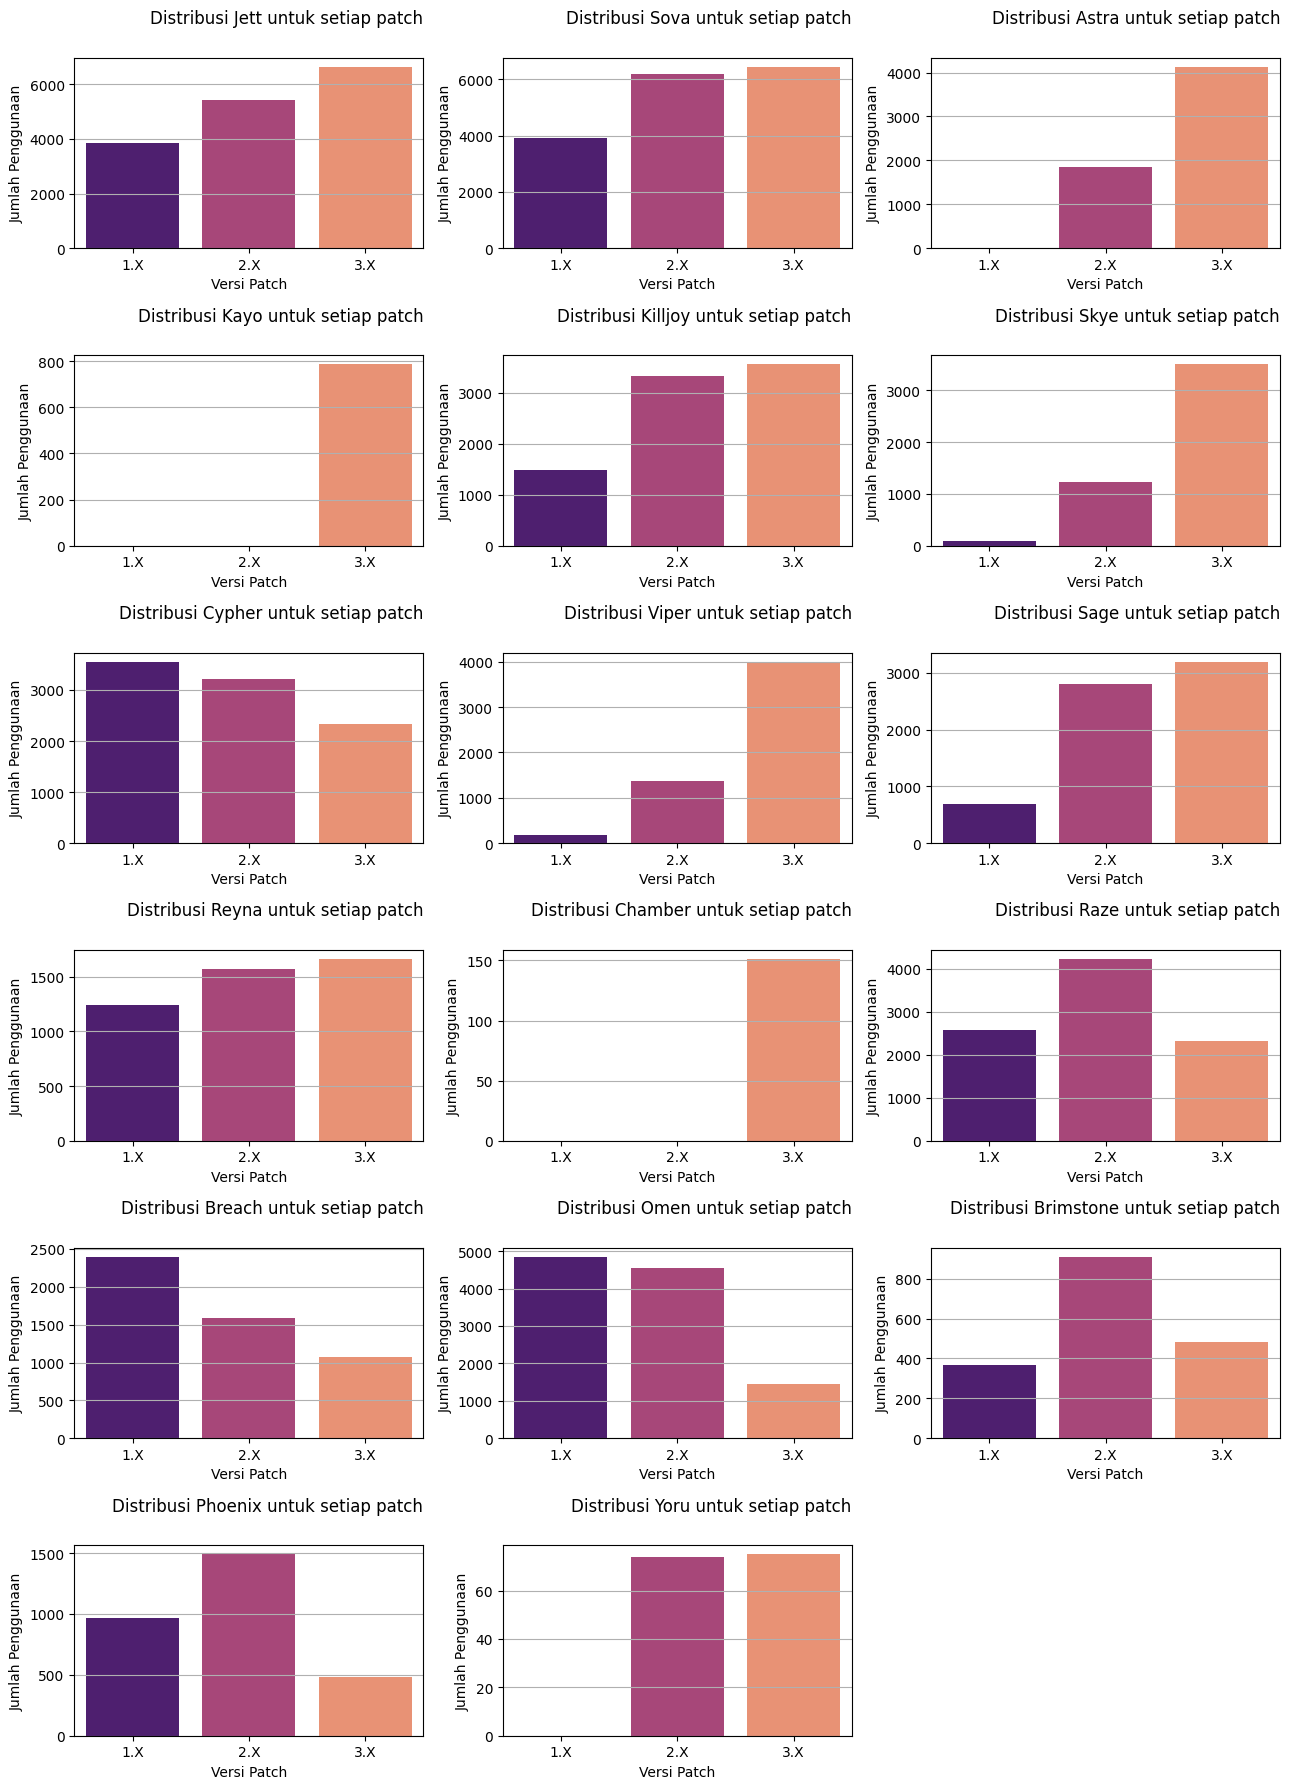

In [ ]:
patch_order = df_pickrate['Patch'].sort_values().unique()
num_agents = len(hue_order)
num_cols = 3
num_rows = (num_agents + num_cols - 1) // num_cols

plt.figure(figsize=(13, 3 * num_rows))

for i, agent in enumerate(hue_order, 1):
    plt.subplot(num_rows, num_cols, i)
    ax = sns.countplot(data=df_pickrate[df_pickrate['Agent'] == agent],
                  x='Patch', palette='magma', order=patch_order, legend=False)
    plt.title(f'Distribusi {agent.capitalize()} untuk setiap patch', pad=25, loc='right')
    plt.xlabel('Versi Patch')
    plt.ylabel('Jumlah Penggunaan')
    plt.grid(axis='y')
    ax.set_xticklabels(['1.X', '2.X', '3.X'])

plt.tight_layout()
plt.show()

# EDA Best Combination

**Cara Menjalankan Program:**

1. Siapkan file yang dibutuhkan dalam satu folder.
```
    Folder
    │
    └─── tk-kasdad.ipynb
    │   
    └─── games.csv
    │   
    └─── matches.csv
    │   
    └─── scores.csv
    │   
    └─── agent_encode.csv
```
* Dataset dapat diakses pada [link](https://drive.google.com/drive/folders/1Fd8342inMJjF46Df7aMlo51qEvtWfl3s) ini
2. Jalankan program dengan menekan "Run All"
3. Program dapat berhasil dijalankan.

## Install Library

In [ ]:
%pip install pandas numpy seaborn scipy plotly matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


##  Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scp
import plotly.express as px
import matplotlib.pyplot as plt

## Data Preprocessing

In [ ]:
df_games = pd.read_csv('dataset_final/games_final.csv')
df_matches = pd.read_csv('dataset_final/matches_final.csv')
df_scores = pd.read_csv('dataset_final/scores_final.csv')

In [ ]:
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df) * 100

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

In [ ]:
df_winner = df_games[['GameID', 'Team1', 'Team2', 'Winner']]
df_winner

GameID                Team1          Team2  Winner
0       60894  Booster Seat Gaming       Pho Real       1
1       60895  Booster Seat Gaming       Pho Real       2
2       60896  Booster Seat Gaming       Pho Real       1
3       60924       Bjor's Kittens       Mugiwara       1
4       60925       Bjor's Kittens       Mugiwara       1
...       ...                  ...            ...     ...
11922    2297           G2 Esports         G.Gang       1
11923    2244                forZe  StartedFromCS       1
11924    2302          BBL Esports   need more DM       1
11925    2278         PartyParrots           BAG8       1
11926    2309           ISOL-BULIL  GRANIT GAMING       1

[11927 rows x 4 columns]

In [ ]:
df_composition = df_scores[['GameID', 'TeamAbbreviation', 'Agent']]
df_composition.head(10)

GameID TeamAbbreviation    Agent
0   60894             Boos     jett
1   60894             Boos  chamber
2   60894             Boos     sova
3   60894             Boos    viper
4   60894             Boos     skye
5   60894              Pho    astra
6   60894              Pho     sova
7   60894              Pho  chamber
8   60894              Pho     skye
9   60894              Pho    viper

In [ ]:
cek_null(df_composition)

Empty DataFrame
Columns: [Total, Percent]
Index: []


Ada missing values pada Agent. Sulit untuk memberikan nilai pada missing values tersebut, karena kita harus menjaga constraint bahwa pada setiap tim di setiap game, tidak boleh ada agent yang sama. Oleh karena itu, kita lakukan drop.

In [ ]:
df_composition_dropped = df_composition.dropna()
df_composition_dropped

GameID TeamAbbreviation    Agent
0        60894             Boos     jett
1        60894             Boos  chamber
2        60894             Boos     sova
3        60894             Boos    viper
4        60894             Boos     skye
...        ...              ...      ...
108245    2309              GRG     omen
108246    2309              GRG  phoenix
108247    2309              GRG     jett
108248    2309              GRG     sova
108249    2309              GRG   cypher

[108250 rows x 3 columns]

In [ ]:
df_composition[df_composition['TeamAbbreviation'].isna()]

Empty DataFrame
Columns: [GameID, TeamAbbreviation, Agent]
Index: []

In [ ]:
df_merged = df_winner.merge(df_composition, left_on='GameID', right_on='GameID')
df_merged

GameID                Team1          Team2  Winner TeamAbbreviation  \
0        60894  Booster Seat Gaming       Pho Real       1             Boos   
1        60894  Booster Seat Gaming       Pho Real       1             Boos   
2        60894  Booster Seat Gaming       Pho Real       1             Boos   
3        60894  Booster Seat Gaming       Pho Real       1             Boos   
4        60894  Booster Seat Gaming       Pho Real       1             Boos   
...        ...                  ...            ...     ...              ...   
108245    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108246    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108247    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108248    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108249    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   

          Agent  
0          jett  
1       chamber  
2          sova  
3         viper  
4          skye  
...         ...  
108245     omen  
108246  phoenix  
108247     jett  
108248     sova  
108249   cypher  

[108250 rows x 6 columns]

Di bawah, terlihat bahwa terdapat data game yang jumlah pemainnya kurang dari 10 orang. Padahal dalam suatu permainan, jumlah pemain haruslah 10. Kemungkinan itu adalah data yang corrupt. Karena hanya 1.5% (199 / 12952), maka kita dapat melakukan drop.

In [ ]:
df_merged.groupby('GameID').size()[df_merged.groupby('GameID').size() != 10]

Series([], dtype: int64)

In [ ]:
df_merged.groupby('GameID').size()

GameID
2238     10
2241     10
2244     10
2297     10
2302     10
         ..
60904    10
60912    10
60913    10
60921    10
60922    10
Length: 10825, dtype: int64

In [ ]:
games_10_players = df_merged.groupby('GameID').size()[df_merged.groupby('GameID').size() == 10].index
df_merged_games_10 = df_merged[df_merged['GameID'].isin(games_10_players)]
df_merged_games_10

GameID                Team1          Team2  Winner TeamAbbreviation  \
0        60894  Booster Seat Gaming       Pho Real       1             Boos   
1        60894  Booster Seat Gaming       Pho Real       1             Boos   
2        60894  Booster Seat Gaming       Pho Real       1             Boos   
3        60894  Booster Seat Gaming       Pho Real       1             Boos   
4        60894  Booster Seat Gaming       Pho Real       1             Boos   
...        ...                  ...            ...     ...              ...   
108245    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108246    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108247    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108248    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108249    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   

          Agent  
0          jett  
1       chamber  
2          sova  
3         viper  
4          skye  
...         ...  
108245     omen  
108246  phoenix  
108247     jett  
108248     sova  
108249   cypher  

[108250 rows x 6 columns]

In [ ]:
cek_null(df_merged_games_10)

Empty DataFrame
Columns: [Total, Percent]
Index: []


In [ ]:
df_agent_exist = df_merged_games_10[df_merged_games_10['Agent'].notna()]
df_agent_exist

GameID                Team1          Team2  Winner TeamAbbreviation  \
0        60894  Booster Seat Gaming       Pho Real       1             Boos   
1        60894  Booster Seat Gaming       Pho Real       1             Boos   
2        60894  Booster Seat Gaming       Pho Real       1             Boos   
3        60894  Booster Seat Gaming       Pho Real       1             Boos   
4        60894  Booster Seat Gaming       Pho Real       1             Boos   
...        ...                  ...            ...     ...              ...   
108245    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108246    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108247    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108248    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108249    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   

          Agent  
0          jett  
1       chamber  
2          sova  
3         viper  
4          skye  
...         ...  
108245     omen  
108246  phoenix  
108247     jett  
108248     sova  
108249   cypher  

[108250 rows x 6 columns]

In [ ]:
df_agent_exist.groupby('GameID').size()[df_agent_exist.groupby('GameID').size() != 10]

Series([], dtype: int64)

Wait, mending yang soal match == 10 itu belakangan aja.. apus dulu yang gaada Agent, etc

In [ ]:
df_agent_exist = df_merged[df_merged['Agent'].notna()]
df_agent_exist

GameID                Team1          Team2  Winner TeamAbbreviation  \
0        60894  Booster Seat Gaming       Pho Real       1             Boos   
1        60894  Booster Seat Gaming       Pho Real       1             Boos   
2        60894  Booster Seat Gaming       Pho Real       1             Boos   
3        60894  Booster Seat Gaming       Pho Real       1             Boos   
4        60894  Booster Seat Gaming       Pho Real       1             Boos   
...        ...                  ...            ...     ...              ...   
108245    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108246    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108247    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108248    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108249    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   

          Agent  
0          jett  
1       chamber  
2          sova  
3         viper  
4          skye  
...         ...  
108245     omen  
108246  phoenix  
108247     jett  
108248     sova  
108249   cypher  

[108250 rows x 6 columns]

In [ ]:
cek_null(df_agent_exist)

Empty DataFrame
Columns: [Total, Percent]
Index: []


In [ ]:
df_team_exist = df_agent_exist[df_agent_exist['TeamAbbreviation'].notna()]
df_team_exist

GameID                Team1          Team2  Winner TeamAbbreviation  \
0        60894  Booster Seat Gaming       Pho Real       1             Boos   
1        60894  Booster Seat Gaming       Pho Real       1             Boos   
2        60894  Booster Seat Gaming       Pho Real       1             Boos   
3        60894  Booster Seat Gaming       Pho Real       1             Boos   
4        60894  Booster Seat Gaming       Pho Real       1             Boos   
...        ...                  ...            ...     ...              ...   
108245    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108246    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108247    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108248    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108249    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   

          Agent  
0          jett  
1       chamber  
2          sova  
3         viper  
4          skye  
...         ...  
108245     omen  
108246  phoenix  
108247     jett  
108248     sova  
108249   cypher  

[108250 rows x 6 columns]

In [ ]:
games_with_10_players = df_team_exist.groupby('GameID').size()[df_team_exist.groupby('GameID').size() == 10].index
df_valid_game = df_team_exist[df_team_exist['GameID'].isin(games_with_10_players)]
df_valid_game

GameID                Team1          Team2  Winner TeamAbbreviation  \
0        60894  Booster Seat Gaming       Pho Real       1             Boos   
1        60894  Booster Seat Gaming       Pho Real       1             Boos   
2        60894  Booster Seat Gaming       Pho Real       1             Boos   
3        60894  Booster Seat Gaming       Pho Real       1             Boos   
4        60894  Booster Seat Gaming       Pho Real       1             Boos   
...        ...                  ...            ...     ...              ...   
108245    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108246    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108247    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108248    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108249    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   

          Agent  
0          jett  
1       chamber  
2          sova  
3         viper  
4          skye  
...         ...  
108245     omen  
108246  phoenix  
108247     jett  
108248     sova  
108249   cypher  

[108250 rows x 6 columns]

In [ ]:
cek_null(df_valid_game)

Empty DataFrame
Columns: [Total, Percent]
Index: []


In [ ]:
df_valid_game

GameID                Team1          Team2  Winner TeamAbbreviation  \
0        60894  Booster Seat Gaming       Pho Real       1             Boos   
1        60894  Booster Seat Gaming       Pho Real       1             Boos   
2        60894  Booster Seat Gaming       Pho Real       1             Boos   
3        60894  Booster Seat Gaming       Pho Real       1             Boos   
4        60894  Booster Seat Gaming       Pho Real       1             Boos   
...        ...                  ...            ...     ...              ...   
108245    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108246    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108247    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108248    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108249    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   

          Agent  
0          jett  
1       chamber  
2          sova  
3         viper  
4          skye  
...         ...  
108245     omen  
108246  phoenix  
108247     jett  
108248     sova  
108249   cypher  

[108250 rows x 6 columns]

Coba pisah jadi 5-5, terus ambil yang ganjil -> set 1, genap -> set 2.

In [ ]:
df_odd = df_valid_game[df_valid_game.reset_index().index % 10 < 5]
df_even = df_valid_game[df_valid_game.reset_index().index % 10 >= 5]

odd_team_name = df_odd[['Team1', 'TeamAbbreviation']].rename(columns={'Team1': 'Team'}, inplace=False)
even_team_name = df_even[['Team2', 'TeamAbbreviation']].rename(columns={'Team2': 'Team'}, inplace=False)

df_team_abbrev_pair = pd.concat([odd_team_name, even_team_name], axis=0)
df_team_abbrev_pair = df_team_abbrev_pair.groupby(['Team', 'TeamAbbreviation']).size()

df_team_abbrev_pair = pd.DataFrame(df_team_abbrev_pair).reset_index()
df_team_abbrev_pair = df_team_abbrev_pair[['Team', 'TeamAbbreviation']]
df_team_abbrev_pair

Team TeamAbbreviation
0     #1 Victory Royale              1VR
1              -sheesh-             -she
2           100 Thieves             100T
3                123TAP             123T
4                  1337             1337
...                 ...              ...
1787          Øutsiders              Øut
1788  İstanbul Wildcats               IW
1789             świeca              świ
1790              레.스.고               레.
1791               이사가자             이사가자

[1792 rows x 2 columns]

In [ ]:
df_team_abbrev_no_dupe = df_team_abbrev_pair[~df_team_abbrev_pair[['Team']].duplicated(keep='first')]
team_to_abbrev = dict(zip(df_team_abbrev_no_dupe['Team'], df_team_abbrev_no_dupe['TeamAbbreviation']))

In [ ]:
df_team_abbrev_pair[df_team_abbrev_pair['Team'].duplicated(keep=False)]

Team TeamAbbreviation
40             ALCYONE             ALCY
41             ALCYONE       PlayerALCY
73    Aim from Kitchen              Aim
74    Aim from Kitchen     brimstoneAim
87          All Gamers               AG
88          All Gamers              All
173       Benchwarmers            BENCH
174       Benchwarmers             Benc
268      Cosmic Divide               CD
269      Cosmic Divide             Cosm
350        Dreamwalker              DRM
351        Dreamwalker             Drea
410         ExPandable              ExP
411         ExPandable         phoonExP
416             Exodus             Exod
417             Exodus           Exodus
679   Jaguares Esports              JAG
680   Jaguares Esports              JGG
768    Last Round Save              LRS
769    Last Round Save             Last
807              M4LIK             M4LI
808              M4LIK            M4LIK
840      Marten Gaming               MG
841      Marten Gaming             Mart
900           NOORG2.0              NO2
901           NOORG2.0             NOOR
937       Nexus Gaming               NG
938       Nexus Gaming              NxS
1008           Orgless               OG
1009           Orgless             ORGL
1074           Polaris              PLR
1075           Polaris             Pola
1102              Pure         JeckPure
1103              Pure             Pure
1104              Pure       ayNovaPure
1105              Pure         ratePure
1143   Rebirth Esports               RE
1144   Rebirth Esports             Rebi
1327        TERROR.NET           TERROR
1328        TERROR.NET             TNET
1352        Take Flyte               TF
1353        Take Flyte             Take
1363          Team 7AM              7AM
1364          Team 7AM             Team
1412         Team Name               TN
1413         Team Name             Team
1425       Team Rocket             RCKT
1426       Team Rocket             Team
1501     TradeLikePros              TLP
1502     TradeLikePros             뽕TLP
1507     Tropa Suprema               TS
1508     Tropa Suprema             Trop
1592       Waverunners               WR
1593       Waverunners             Wave

In [ ]:
df_valid_game

GameID                Team1          Team2  Winner TeamAbbreviation  \
0        60894  Booster Seat Gaming       Pho Real       1             Boos   
1        60894  Booster Seat Gaming       Pho Real       1             Boos   
2        60894  Booster Seat Gaming       Pho Real       1             Boos   
3        60894  Booster Seat Gaming       Pho Real       1             Boos   
4        60894  Booster Seat Gaming       Pho Real       1             Boos   
...        ...                  ...            ...     ...              ...   
108245    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108246    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108247    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108248    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108249    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   

          Agent  
0          jett  
1       chamber  
2          sova  
3         viper  
4          skye  
...         ...  
108245     omen  
108246  phoenix  
108247     jett  
108248     sova  
108249   cypher  

[108250 rows x 6 columns]

In [ ]:
def convert_name(row):
    row
    return row

In [ ]:
owo = {
    'A': [1, 2, 3],
    'B': [5, 20, 8],
}

def row_sum(row):
    row['A'] = 10
    return row

df_owo = pd.DataFrame(owo)
df_owo.apply(row_sum, axis=1)

A   B
0  10   5
1  10  20
2  10   8

---

In [ ]:
df_valid_game = df_valid_game.reset_index().drop('index', axis=1)
df_valid_game

GameID                Team1          Team2  Winner TeamAbbreviation  \
0        60894  Booster Seat Gaming       Pho Real       1             Boos   
1        60894  Booster Seat Gaming       Pho Real       1             Boos   
2        60894  Booster Seat Gaming       Pho Real       1             Boos   
3        60894  Booster Seat Gaming       Pho Real       1             Boos   
4        60894  Booster Seat Gaming       Pho Real       1             Boos   
...        ...                  ...            ...     ...              ...   
108245    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108246    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108247    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108248    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   
108249    2309           ISOL-BULIL  GRANIT GAMING       1              GRG   

          Agent  
0          jett  
1       chamber  
2          sova  
3         viper  
4          skye  
...         ...  
108245     omen  
108246  phoenix  
108247     jett  
108248     sova  
108249   cypher  

[108250 rows x 6 columns]

In [ ]:
df_win_1 = df_valid_game[df_valid_game['Winner'] == 1]
df_win_2 = df_valid_game[df_valid_game['Winner'] == 2]

In [ ]:
df_comp_1 = (df_win_1[df_win_1.reset_index().index % 10 < 5])[['GameID', 'Agent']]
df_comp_2 = (df_win_2[df_win_2.reset_index().index % 10 >= 5])[['GameID', 'Agent']]

In [ ]:
df_composition = pd.concat([df_comp_1, df_comp_2], axis=0)
df_composition

GameID    Agent
0        60894     jett
1        60894  chamber
2        60894     sova
3        60894    viper
4        60894     skye
...        ...      ...
108155    2535   cypher
108156    2535     raze
108157    2535     jett
108158    2535     sage
108159    2535     omen

[54125 rows x 2 columns]

In [ ]:
df_composition_sorted = df_composition.sort_values(by=['GameID', 'Agent'])
df_composition_sorted

GameID   Agent
108204    2238  cypher
108203    2238    jett
108202    2238    omen
108201    2238    sage
108200    2238    sova
...        ...     ...
93       60922    jett
92       60922   reyna
94       60922    sage
90       60922    sova
91       60922   viper

[54125 rows x 2 columns]

In [ ]:
df_win_composition = df_composition_sorted.groupby('GameID')['Agent'].agg(tuple).reset_index()
df_win_composition = df_win_composition[['Agent']]
df_win_composition

Agent
0      (cypher, jett, omen, sage, sova)
1      (cypher, jett, omen, raze, sage)
2      (cypher, omen, raze, sage, sova)
3      (cypher, jett, omen, sage, sova)
4      (cypher, jett, omen, raze, sage)
...                                 ...
10820  (jett, reyna, sage, sova, viper)
10821  (jett, reyna, sage, sova, viper)
10822  (astra, jett, raze, skye, viper)
10823   (astra, jett, raze, skye, sova)
10824  (jett, reyna, sage, sova, viper)

[10825 rows x 1 columns]

In [ ]:
df_composition_win_count = df_win_composition.groupby('Agent')['Agent'].count()
df_composition_win_count

Agent
(astra, breach, brimstone, chamber, reyna)     2
(astra, breach, brimstone, sova, viper)        1
(astra, breach, chamber, jett, sova)           1
(astra, breach, chamber, raze, viper)          2
(astra, breach, cypher, jett, kayo)            1
                                              ..
(omen, reyna, skye, sova, viper)               1
(omen, skye, sova, viper, yoru)                1
(raze, reyna, sage, sova, viper)               6
(raze, sage, skye, sova, viper)               12
(reyna, sage, skye, sova, viper)               2
Name: Agent, Length: 686, dtype: int64

In [ ]:
df_composition_win_count_sorted = df_composition_win_count.sort_values(ascending=False)
df_composition_win_count_sorted

Agent
(cypher, jett, omen, raze, sova)       417
(jett, killjoy, sage, sova, viper)     397
(cypher, jett, omen, phoenix, sova)    356
(jett, reyna, sage, sova, viper)       349
(breach, cypher, jett, omen, sova)     348
                                      ... 
(breach, cypher, jett, sage, viper)      1
(breach, cypher, jett, omen, viper)      1
(cypher, omen, sage, sova, viper)        1
(cypher, omen, skye, sova, viper)        1
(breach, omen, raze, reyna, sova)        1
Name: Agent, Length: 686, dtype: int64

Jadi, composition yang paling sering memenangkan pertandingan adalah `cypher, jett, omen, raze, sova` dengan banyak pertandingan 421.

In [ ]:
# type(df_composition_win_count_sorted)

df_result = pd.DataFrame(df_composition_win_count_sorted)
df_result_dict = df_result['Agent'].to_dict()

df_result = pd.DataFrame(df_result_dict.items(), columns=['Agent', 'Count'])
df_result
# df_result.reset_index()

# df_result.columns = ['Agent', 'Count']
# df_result.reset_index()

# df_composition_win_count_sorted.rename('Agent')

# df_composition_win_count_sorted.reset_index()

# df_composition_win_count_sorted.columns = ['Agent', 'Test']

# df_composition_win_count_sorted.columns
# sns.barplot(df_composition_win_count_sorted)

Agent  Count
0       (cypher, jett, omen, raze, sova)    417
1     (jett, killjoy, sage, sova, viper)    397
2    (cypher, jett, omen, phoenix, sova)    356
3       (jett, reyna, sage, sova, viper)    349
4     (breach, cypher, jett, omen, sova)    348
..                                   ...    ...
681  (breach, cypher, jett, sage, viper)      1
682  (breach, cypher, jett, omen, viper)      1
683    (cypher, omen, sage, sova, viper)      1
684    (cypher, omen, skye, sova, viper)      1
685    (breach, omen, raze, reyna, sova)      1

[686 rows x 2 columns]

In [ ]:
def tuple_to_string(row):
    row['Agent'] = '\n'.join(row['Agent'])
    return row

df_result_fixed = df_result.apply(tuple_to_string, axis=1)
df_result_fixed

Agent  Count
0       cypher\njett\nomen\nraze\nsova    417
1     jett\nkilljoy\nsage\nsova\nviper    397
2    cypher\njett\nomen\nphoenix\nsova    356
3       jett\nreyna\nsage\nsova\nviper    349
4     breach\ncypher\njett\nomen\nsova    348
..                                 ...    ...
681  breach\ncypher\njett\nsage\nviper      1
682  breach\ncypher\njett\nomen\nviper      1
683    cypher\nomen\nsage\nsova\nviper      1
684    cypher\nomen\nskye\nsova\nviper      1
685    breach\nomen\nraze\nreyna\nsova      1

[686 rows x 2 columns]

C:\Users\vinse\AppData\Local\Temp\ipykernel_26276\2447778649.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Agent', y='Count', data=df_result_fixed[:10], palette='magma')


<Axes: xlabel='Agent', ylabel='Count'>

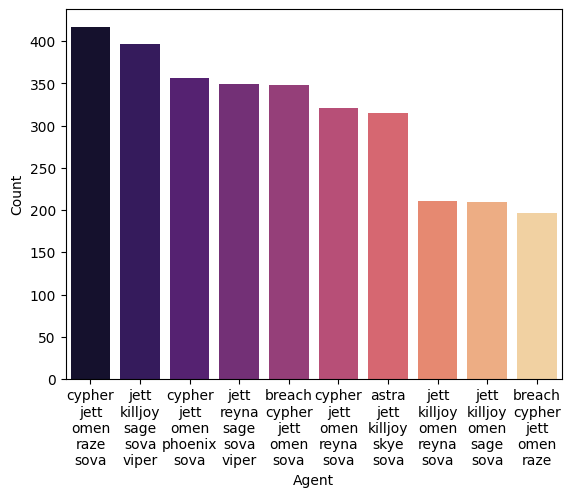

In [ ]:
sns.barplot(x='Agent', y='Count', data=df_result_fixed[:10], palette='magma')

# EDA Best Team

In [ ]:
%pip install pandas
%pip install numpy
%pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
REFERENCE = [
    'https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy',

    ]

In [ ]:
# Import semua library yang dibutuhkan
import pandas as pd
import numpy as np
import scipy.stats as scp
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
# Import dataset
matchDF = pd.read_csv('dataset/matches.csv')

In [ ]:
# mask for Grand Final only
mask = matchDF['EventStage'].str.contains('Grand Final')
masked_matchDF = matchDF[mask]

# Remove unecessary feature from processing
feature = ['MatchID', 'Date', 'EventID', 'EventStage', 'Team1', 'Team2', 'Team1_MapScore', 'Team2_MapScore']
modDF = masked_matchDF[feature]

In [ ]:
# Write the winner of an entry in a new column named 'Winner'
def entry_winner(series):
    if series.get('Team1_MapScore') > series.get('Team2_MapScore'):
        return series.get('Team1')
    else:
        return series.get('Team2')

modDF.loc[:,'Winner'] = modDF.apply(entry_winner, axis=1)
# value_counts() default Sort parameter is True
team_score = modDF['Winner'].value_counts()
print("Tim yang paling banyak memenangkan pertandingan grand final dari sebuah Event: ")
print(team_score.index[0], "dengan jumlah kemenangan sebanyak", team_score.values[0], "pertandingan")

Tim yang paling banyak memenangkan pertandingan grand final dari sebuah Event: 
Sentinels dengan jumlah kemenangan sebanyak 9 pertandingan


C:\Users\vinse\AppData\Local\Temp\ipykernel_13008\2919362851.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modDF.loc[:,'Winner'] = modDF.apply(entry_winner, axis=1)


In [ ]:
test = modDF[['MatchID', 'EventID']]
test

MatchID  EventID
19      61811      825
24      51964      768
40      61407      819
79      61290      812
93      61412      820
...       ...      ...
6195      419       20
6228      474       24
6234      410       21
6236      400       20
6308      413       20

[356 rows x 2 columns]

In [ ]:
test.duplicated().unique()

array([False])

In [ ]:
modDF[modDF['EventID'].duplicated()]

MatchID                 Date  EventID  \
272     51547  2021-11-27 06:30:00      761   
980     43205  2021-10-04 04:30:00      687   
1382    31495  2021-08-15 09:30:00      557   
1457    30832  2021-08-08 09:30:00      557   
1510    30636  2021-08-05 09:00:00      557   
1732    28802  2021-07-22 05:00:00      557   
1779    26951  2021-07-18 12:00:00      557   
1849    26047  2021-07-11 09:30:00      557   
2250    22278  2021-06-21 10:00:00      548   
2251    22285  2021-06-21 10:00:00      548   
2252    22306  2021-06-21 10:00:00      548   
2599    18821  2021-05-16 13:30:00      394   
2758    17526  2021-04-29 14:00:00      398   
2795    17203  2021-04-25 15:00:00      397   
2820    16616  2021-04-24 13:30:00      423   
3066    15799  2021-04-11 02:00:00      403   
3279    14234  2021-03-28 13:00:00      394   
3336    13329  2021-03-20 18:00:00      340   
3388    12675  2021-03-14 16:00:00      340   
3399    12672  2021-03-13 17:45:00      340   
3402    12664  2021-03-13 15:00:00      340   
3454    10329  2021-03-07 00:05:00      297   
3546    11960  2021-02-27 23:30:00      297   
3606    11962  2021-02-26 15:00:00      323   
3607    11971  2021-02-26 13:00:00      323   
3770    10523  2021-02-13 23:30:00      297   
3800    10330  2021-02-12 15:00:00      302   
3879     9840  2021-02-06 18:00:00      302   
3951     9270  2021-01-30 18:30:00      285   
3968     9267  2021-01-29 15:00:00      285   
3972     9266  2021-01-29 13:00:00      285   
4052     8993  2021-01-24 18:00:00      285   
4595     7156  2020-12-05 17:30:00      214   
4741     6442  2020-11-22 17:20:00      186   
5085     4880  2020-11-08 17:00:00      186   
5149     4551  2020-10-30 19:20:00      186   
5156     4460  2020-10-29 15:00:00      152   
5257     4203  2020-10-20 14:30:00      177   
5315     3975  2020-10-15 12:00:00      152   
5387     3615  2020-10-07 08:00:00      164   
5454     3350  2020-10-01 13:00:00      152   
5653     2303  2020-09-06 14:25:00       81   
5795     1715  2020-08-09 14:05:00       82   
5805     1656  2020-08-08 13:30:00       82   
6157      738  2020-06-22 15:00:00       20   
6195      419  2020-06-15 15:30:00       20   
6234      410  2020-06-08 21:00:00       21   
6236      400  2020-06-08 15:00:00       20   
6308      413  2020-05-25 08:00:00       20   

                                             EventStage  \
272                               Playoffs: Grand Final   
980              Pakistan and Afghanistan: Grand Finals   
1382                    Wildcard Qualifier: Grand Final   
1457                    India Qualifier #2: Grand Final   
1510  Pakistan and Afghanistan Qualifier #2: Grand F...   
1732            Nepal and Bhutan Qualifier: Grand Final   
1779  Pakistan and Afghanistan Qualifier #1: Grand F...   
1849                    India Qualifier #1: Grand Final   
2250        Hong Kong and Macau Qualifiers: Grand Final   
2251                   Malaysia Qualifiers: Grand Final   
2252                     Taiwan Qualifiers: Grand Final   
2599                     Open Qualifier #3: Grand Final   
2758                           Main Event: Grand Finals   
2795                      Main Event: LAS: Grand Finals   
2820                         GCC and Iraq: Grand Finals   
3066                     Open Qualifier #1: Grand Final   
3279                     Open Qualifier #1: Grand Final   
3336               Main Event: LAS: Group B Grand Final   
3388                       Main Event: LAN: Grand Final   
3399                   Main Event: LAN: Grand Final (B)   
3402                   Main Event: LAN: Grand Final (A)   
3454                   Closed Qualifier #2: Grand Final   
3546                     Open Qualifier #2: Grand Final   
3606                   Main Event: LAS: Grand Final (B)   
3607                   Main Event: LAS: Grand Final (A)   
3770                     Open Qualifier #1: Grand Final   
3800                   Main Event: LAS: Grand Final (A)   
387

In [ ]:
result = pd.DataFrame(team_score)
result

count
Winner                    
Sentinels                9
BIG                      8
forZe                    7
Global Esports           7
Renegades                7
...                    ...
Built By Gamers          1
HEET                     1
Team Weibo               1
KPC Computer Studio      1
Border Monsters          1

[198 rows x 1 columns]

In [ ]:
sentinels_match_id = modDF[modDF['Winner'] == 'Sentinels']['MatchID'].unique()

In [ ]:
result = result.reset_index()
result.columns = ['Team', 'Count']

C:\Users\vinse\AppData\Local\Temp\ipykernel_13008\2281323530.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Team', y='Count', data=result[:7], palette='magma')


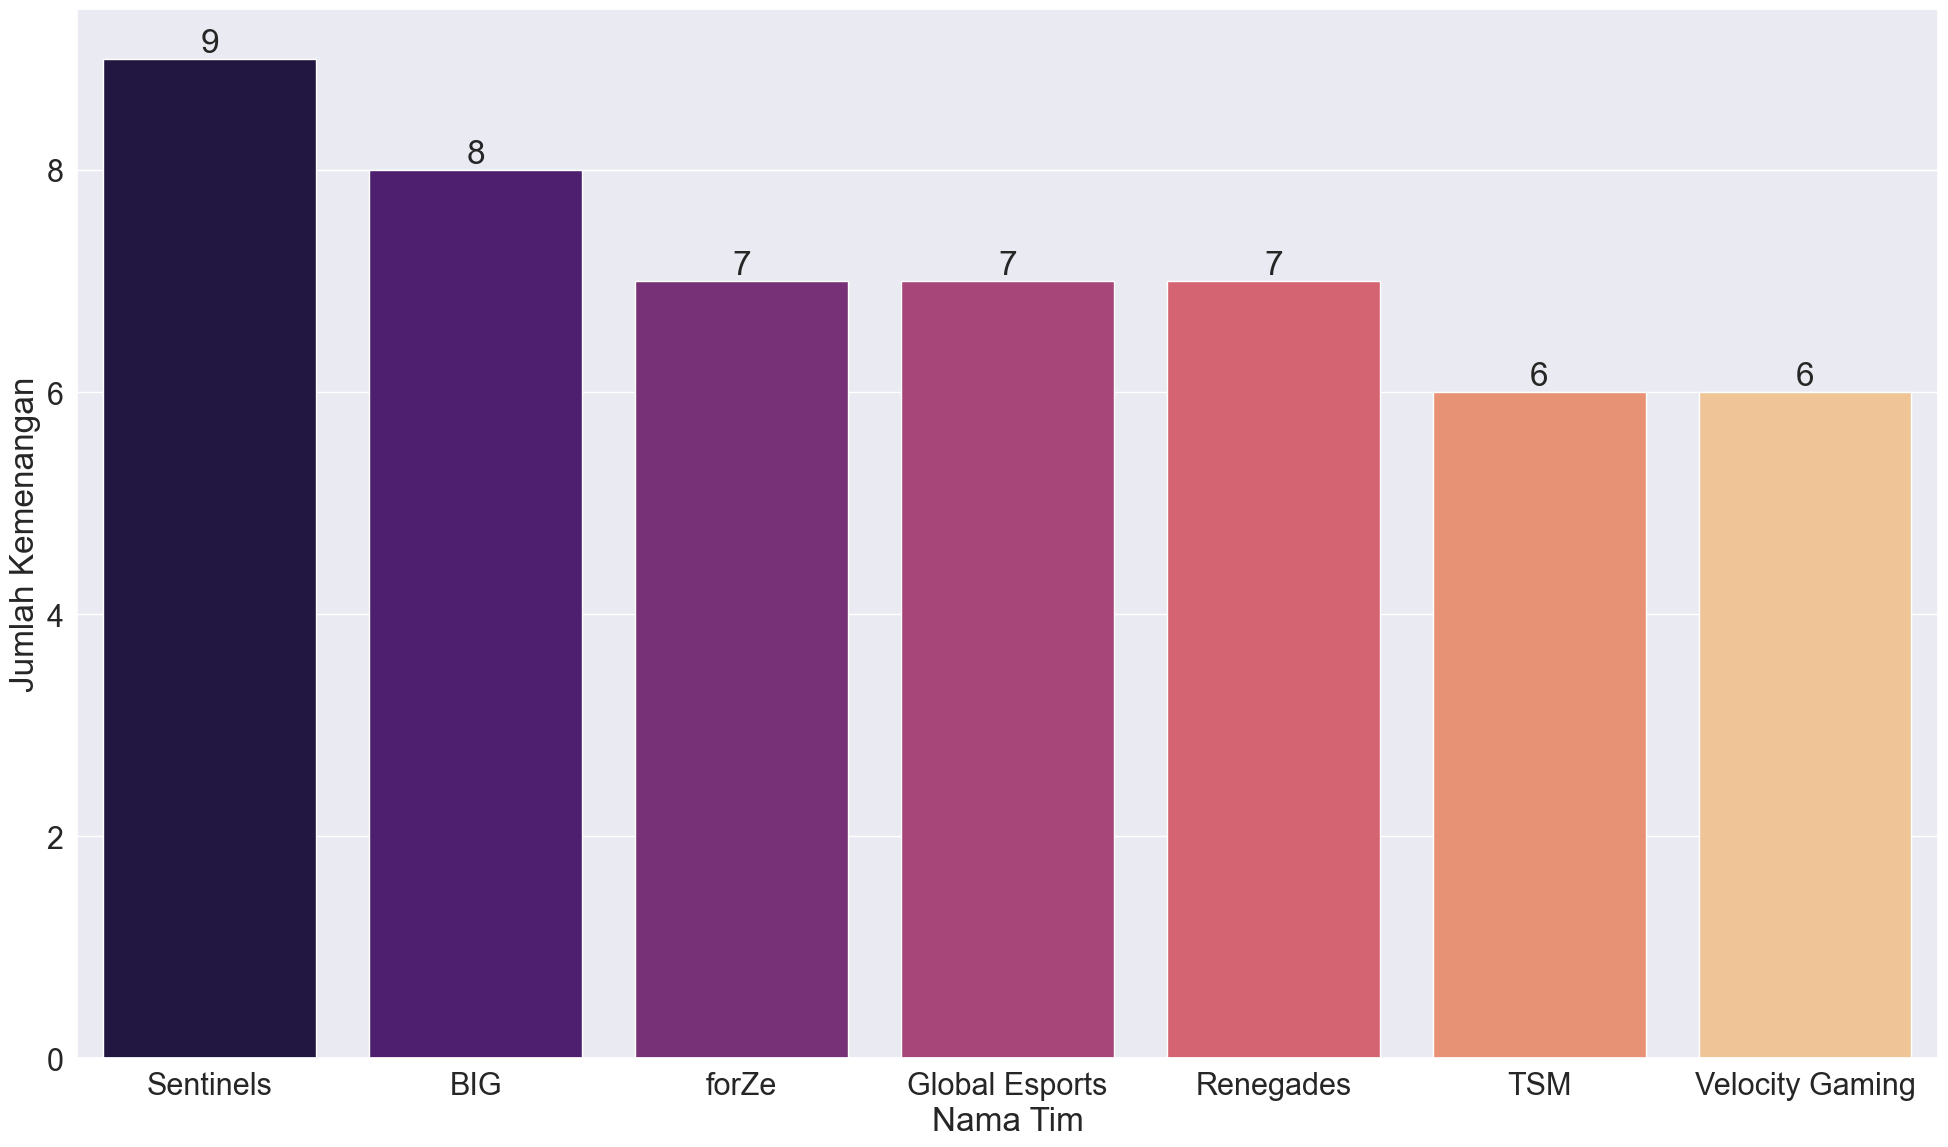

In [ ]:
plt.figure(figsize=(20, 12))
# Create a bar plot+

sns.set(font_scale=2)
ax = sns.barplot(x='Team', y='Count', data=result[:7], palette='magma')

for i in ax.containers:
    ax.bar_label(i,)

sns.set_style(rc = {'axes.facecolor': 'white'})

plt.xlabel('Nama Tim')
plt.ylabel('Jumlah Kemenangan')
plt.tight_layout()
plt.show()

## Read Dataset

In [ ]:
df = pd.read_csv('dataset_final/final_dataset.csv')
df.head()

GameID  PlayerID PlayerName TeamAbbreviation    Agent    ACS  Kills  \
0   60894    8419.0     Reduxx             Boos     jett  313.0   24.0   
1   60894     466.0     ChurmZ             Boos  chamber  227.0   16.0   
2   60894    3712.0   diaamond             Boos     sova  226.0   17.0   
3   60894    5099.0     Boltzy             Boos    viper  218.0   17.0   
4   60894    3983.0     Virtyy             Boos     skye   80.0    5.0   

   Deaths  Assists  PlusMinus  ...  Patch  EventID  \
0    10.0      3.0       14.0  ...    3.0      826   
1    10.0      7.0        6.0  ...    3.0      826   
2     9.0      8.0        8.0  ...    3.0      826   
3    12.0      2.0        5.0  ...    3.0      826   
4    13.0      3.0       -8.0  ...    3.0      826   

                                           EventName  \
0  Nerd Street Gamers Winter Championship - Regio...   
1  Nerd Street Gamers Winter Championship - Regio...   
2  Nerd Street Gamers Winter Championship - Regio...   
3  Nerd Street Gamers Winter Championship - Regio...   
4  Nerd Street Gamers Winter Championship - Regio...   

                 EventStage  Team1ID  Team2ID                Team1     Team2  \
0  Group Stage: Decider (A)     6903     6020  Booster Seat Gaming  Pho Real   
1  Group Stage: Decider (A)     6903     6020  Booster Seat Gaming  Pho Real   
2  Group Stage: Decider (A)     6903     6020  Booster Seat Gaming  Pho Real   
3  Group Stage: Decider (A)     6903     6020  Booster Seat Gaming  Pho Real   
4  Group Stage: Decider (A)     6903     6020  Booster Seat Gaming  Pho Real   

   Team1_MapScore  Team2_MapScore  
0               2               1  
1               2               1  
2               2               1  
3               2               1  
4               2               1  

[5 rows x 51 columns]

In [ ]:
for id in sentinels_match_id:
    data = df[df['MatchID'] == id]
    if data.empty:
        print(id)

1270
1031


In [ ]:
modDF[modDF['MatchID'] == 1270]

MatchID                 Date  EventID                EventStage  \
5888     1270  2020-07-26 17:15:00       63  Tournament: Grand Finals   

          Team1   Team2  Team1_MapScore  Team2_MapScore     Winner  
5888  Sentinels  Cloud9               3               1  Sentinels

In [ ]:
modDF[modDF['MatchID'] == 1031]

MatchID                 Date  EventID               EventStage  \
6046     1031  2020-07-08 17:30:00       58  Tournament: Grand Final   

          Team1                     Team2  Team1_MapScore  Team2_MapScore  \
6046  Sentinels  together we are terrific               2               1   

         Winner  
6046  Sentinels

In [ ]:
df_games = pd.read_csv('dataset/games.csv')
df_matches = pd.read_csv('dataset/matches.csv')
df_scores = pd.read_csv('dataset/scores.csv')



In [ ]:
df_games[df_games['MatchID'] == 1031]

No  GameID  MatchID     Map  Team1ID  Team2ID      Team1  \
12438  15365    1566     1031    Bind        2      211  Sentinels   
12439  15366    1567     1031   Haven        2      211  Sentinels   
12440  15367    1568     1031  Ascent        2      211  Sentinels   

                          Team2  Winner  Team1_Eco  Team1_SemiEco  \
12438  together we are terrific       1        NaN            NaN   
12439  together we are terrific       2        NaN            NaN   
12440  together we are terrific       1        NaN            NaN   

       Team1_SemiBuy  Team1_FullBuy  Team1_TotalRounds  Team2_Eco  \
12438            NaN            NaN                 13        NaN   
12439            NaN            NaN                  9        NaN   
12440            NaN            NaN                 13        NaN   

       Team2_SemiEco  Team2_SemiBuy  Team2_FullBuy  Team2_TotalRounds  
12438            NaN            NaN            NaN                  5  
12439            NaN            NaN            NaN                 13  
12440            NaN            NaN            NaN                  2

In [ ]:
df_matches[df_matches['MatchID'] == 1031]

No  MatchID                 Date       Patch  EventID  \
6046  7463     1031  2020-07-08 17:30:00  Patch 1.02       58   

                               EventName               EventStage  Team1ID  \
6046  100T x Cashapp Gamers for Equality  Tournament: Grand Final        2   

      Team2ID      Team1                     Team2  Team1_MapScore  \
6046      211  Sentinels  together we are terrific               2   

      Team2_MapScore  
6046               1

In [ ]:
# mask for Grand Final only
mask = df['EventStage'].str.contains('Grand Final')
final = df[mask]

# Remove unecessary feature from processing
feature = ['MatchID', 'Date', 'EventID', 'EventStage', 'Team1', 'Team2', 'Team1_MapScore', 'Team2_MapScore']
modFinal = final[feature]

In [ ]:
# Write the winner of an entry in a new column named 'Winner'
def entry_winner(series):
    if series.get('Team1_MapScore') > series.get('Team2_MapScore'):
        return series.get('Team1')
    else:
        return series.get('Team2')

modFinal.loc[:,'Winner'] = modFinal.apply(entry_winner, axis=1)
modFinal

C:\Users\vinse\AppData\Local\Temp\ipykernel_13008\215234205.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modFinal.loc[:,'Winner'] = modFinal.apply(entry_winner, axis=1)


MatchID                 Date  EventID                 EventStage  \
350       61811  2022-01-04 23:25:00      825      Playoffs: Grand Final   
351       61811  2022-01-04 23:25:00      825      Playoffs: Grand Final   
352       61811  2022-01-04 23:25:00      825      Playoffs: Grand Final   
353       61811  2022-01-04 23:25:00      825      Playoffs: Grand Final   
354       61811  2022-01-04 23:25:00      825      Playoffs: Grand Final   
...         ...                  ...      ...                        ...   
108165     1656  2020-08-08 13:30:00       82  Qualifier #1: Grand Final   
108166     1656  2020-08-08 13:30:00       82  Qualifier #1: Grand Final   
108167     1656  2020-08-08 13:30:00       82  Qualifier #1: Grand Final   
108168     1656  2020-08-08 13:30:00       82  Qualifier #1: Grand Final   
108169     1656  2020-08-08 13:30:00       82  Qualifier #1: Grand Final   

               Team1            Team2  Team1_MapScore  Team2_MapScore  \
350       Luminosity  ex-FLICKBAITERS               2               1   
351       Luminosity  ex-FLICKBAITERS               2               1   
352       Luminosity  ex-FLICKBAITERS               2               1   
353       Luminosity  ex-FLICKBAITERS               2               1   
354       Luminosity  ex-FLICKBAITERS               2               1   
...              ...              ...             ...             ...   
108165  ZyppanGoKill       Project SW               2               1   
108166  ZyppanGoKill       Project SW               2               1   
108167  ZyppanGoKill       Project SW               2               1   
108168  ZyppanGoKill       Project SW               2               1   
108169  ZyppanGoKill       Project SW               2               1   

              Winner  
350       Luminosity  
351       Luminosity  
352       Luminosity  
353       Luminosity  
354       Luminosity  
...              ...  
108165  ZyppanGoKill  
108166  ZyppanGoKill  
108167  ZyppanGoKill  
108168  ZyppanGoKill  
108169  ZyppanGoKill  

[9730 rows x 9 columns]

Terdapat duplikasi akibat merging dataset

In [ ]:
temp = modFinal[['MatchID', 'Winner']]
result = temp.drop_duplicates(keep='first')
score = result['Winner'].value_counts()
print("Tim yang paling banyak memenangkan pertandingan grand final dari sebuah Event: ")
print(score.index[0], "dengan jumlah kemenangan sebanyak", score.values[0], "pertandingan")

Tim yang paling banyak memenangkan pertandingan grand final dari sebuah Event: 
Sentinels dengan jumlah kemenangan sebanyak 7 pertandingan


In [ ]:
plot_frame = pd.DataFrame(score)
plot_frame

count
Winner                   
Sentinels               7
Global Esports          7
Renegades               7
Velocity Gaming         6
forZe                   6
...                   ...
Predestinados           1
ez5                     1
SuperMassive Blaze      1
ONIC G                  1
ZyppanGoKill            1

[181 rows x 1 columns]

In [ ]:
result = plot_frame.reset_index()
result.columns = ['Team', 'Count']

C:\Users\vinse\AppData\Local\Temp\ipykernel_13008\478931598.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Team', y='Count', data=result[:7], palette='magma')


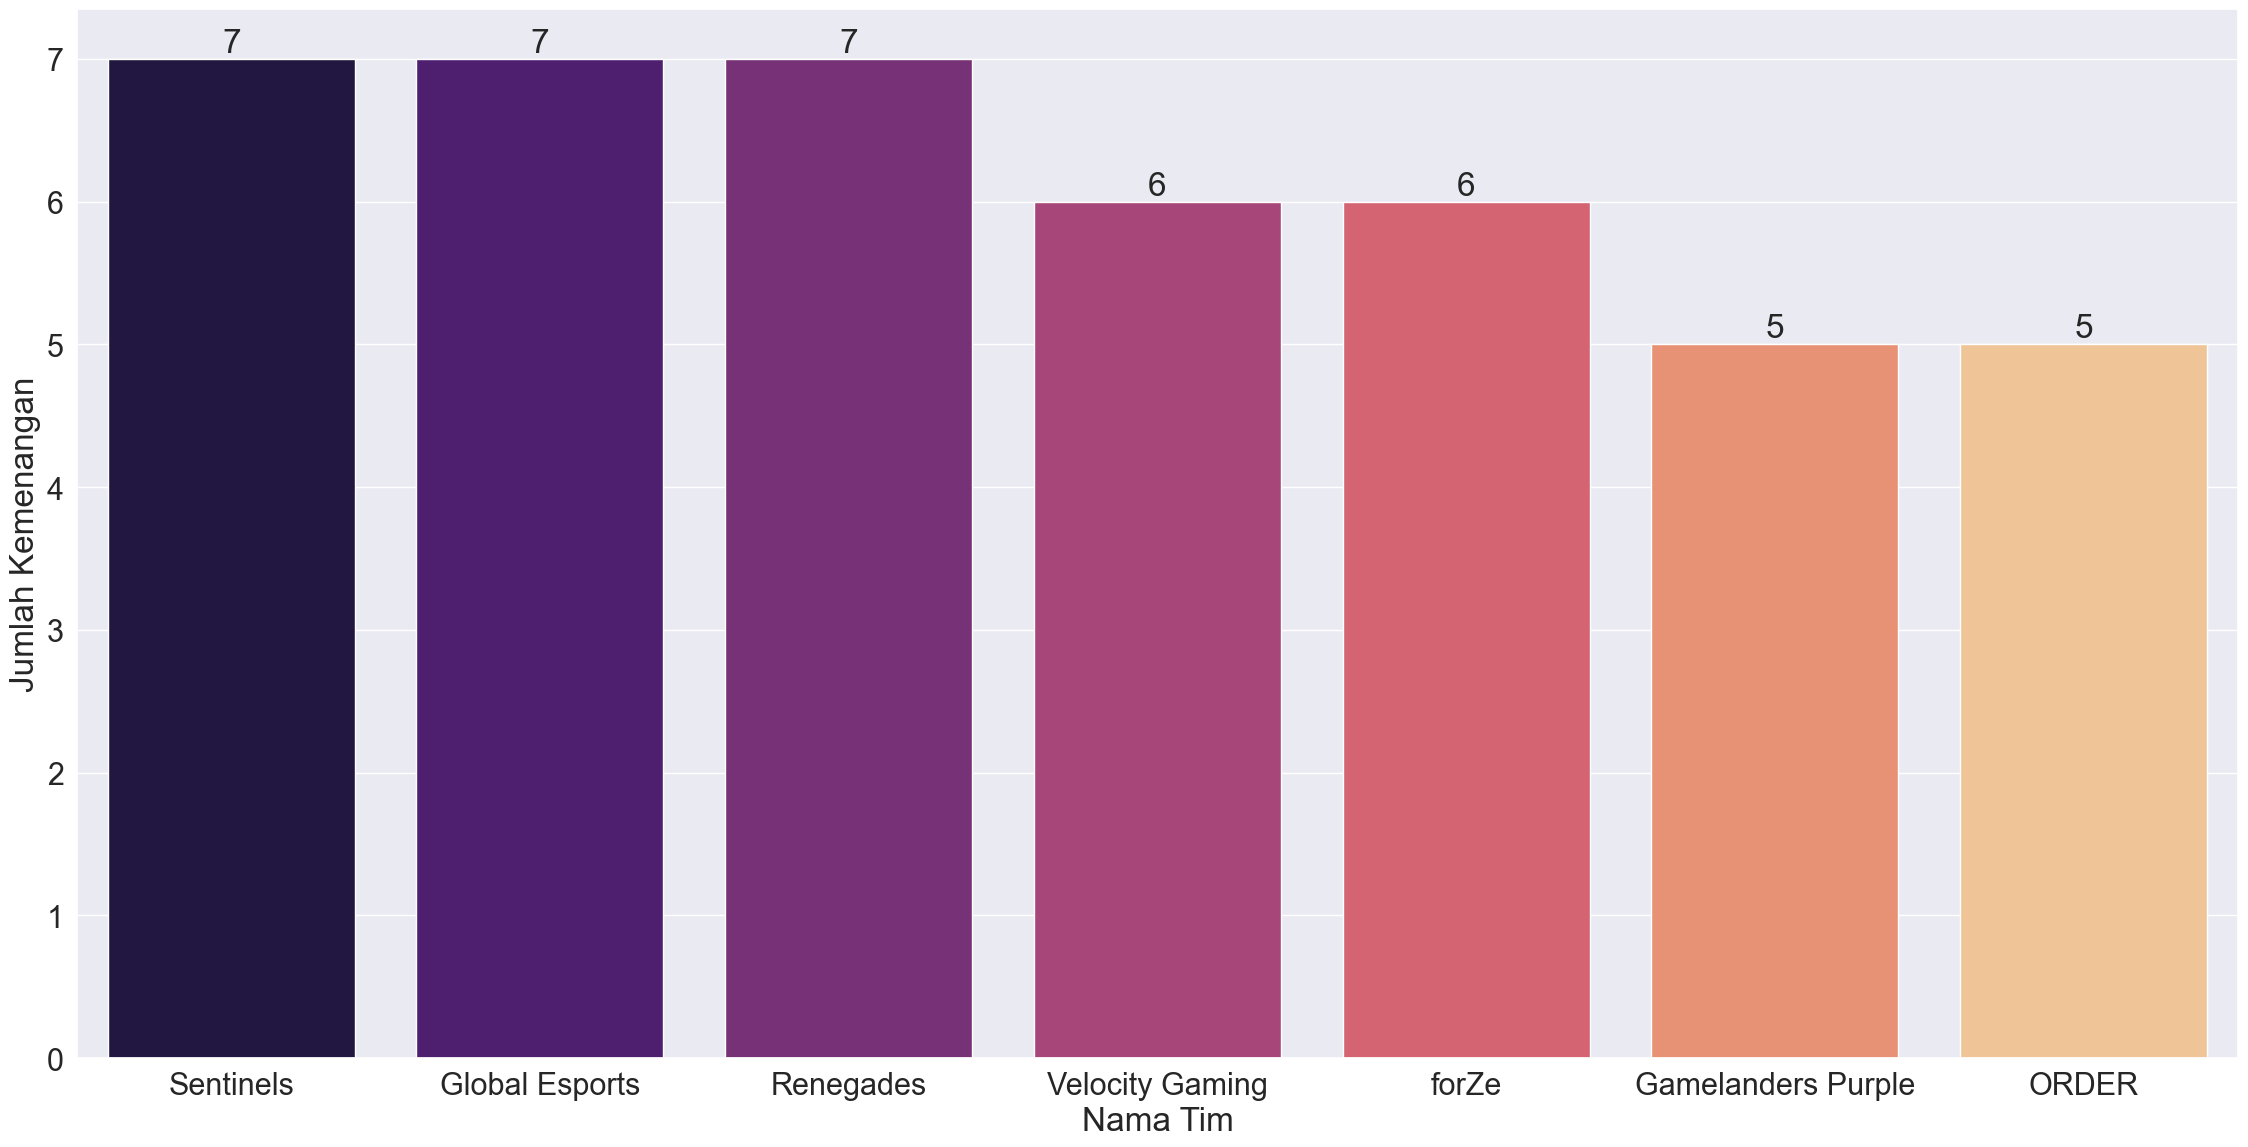

In [ ]:
plt.figure(figsize=(23, 12))
# Create a bar plot+

sns.set(font_scale=2)
ax = sns.barplot(x='Team', y='Count', data=result[:7], palette='magma')

for i in ax.containers:
    ax.bar_label(i,)

sns.set_style(rc = {'axes.facecolor': 'white'})

plt.xlabel('Nama Tim')
plt.ylabel('Jumlah Kemenangan')
plt.tight_layout()
plt.show()

# EDA Agent KD per Map

## Install Library  

In [ ]:
%pip install plotly-express

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scp
import plotly.express as px
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

## Read Dataset

In [ ]:
df = pd.read_csv('dataset_final/final_dataset.csv')
df.head()

GameID  PlayerID PlayerName TeamAbbreviation    Agent    ACS  Kills  \
0   60894    8419.0     Reduxx             Boos     jett  313.0   24.0   
1   60894     466.0     ChurmZ             Boos  chamber  227.0   16.0   
2   60894    3712.0   diaamond             Boos     sova  226.0   17.0   
3   60894    5099.0     Boltzy             Boos    viper  218.0   17.0   
4   60894    3983.0     Virtyy             Boos     skye   80.0    5.0   

   Deaths  Assists  PlusMinus  ...  Patch  EventID  \
0    10.0      3.0       14.0  ...    3.0      826   
1    10.0      7.0        6.0  ...    3.0      826   
2     9.0      8.0        8.0  ...    3.0      826   
3    12.0      2.0        5.0  ...    3.0      826   
4    13.0      3.0       -8.0  ...    3.0      826   

                                           EventName  \
0  Nerd Street Gamers Winter Championship - Regio...   
1  Nerd Street Gamers Winter Championship - Regio...   
2  Nerd Street Gamers Winter Championship - Regio...   
3  Nerd Street Gamers Winter Championship - Regio...   
4  Nerd Street Gamers Winter Championship - Regio...   

                 EventStage  Team1ID  Team2ID                Team1     Team2  \
0  Group Stage: Decider (A)     6903     6020  Booster Seat Gaming  Pho Real   
1  Group Stage: Decider (A)     6903     6020  Booster Seat Gaming  Pho Real   
2  Group Stage: Decider (A)     6903     6020  Booster Seat Gaming  Pho Real   
3  Group Stage: Decider (A)     6903     6020  Booster Seat Gaming  Pho Real   
4  Group Stage: Decider (A)     6903     6020  Booster Seat Gaming  Pho Real   

   Team1_MapScore  Team2_MapScore  
0               2               1  
1               2               1  
2               2               1  
3               2               1  
4               2               1  

[5 rows x 51 columns]

In [ ]:
tes = df.groupby(['Agent', 'Map'])[['Kills', 'Deaths']].mean()
tes

Kills     Deaths
Agent Map                           
astra Ascent    13.994878  14.214001
      Bind      13.924673  14.037663
      Breeze    14.089286  13.946429
      Fracture  14.571429  14.357143
      Haven     13.813842  13.809069
...                   ...        ...
yoru  Breeze    14.952381  14.333333
      Fracture   9.666667  16.666667
      Haven     13.266667  15.666667
      Icebox    14.222222  15.666667
      Split     15.500000  14.200000

[119 rows x 2 columns]

In [ ]:
# merge_nonnull['Agent'].unique()
tes.shape[0]

119

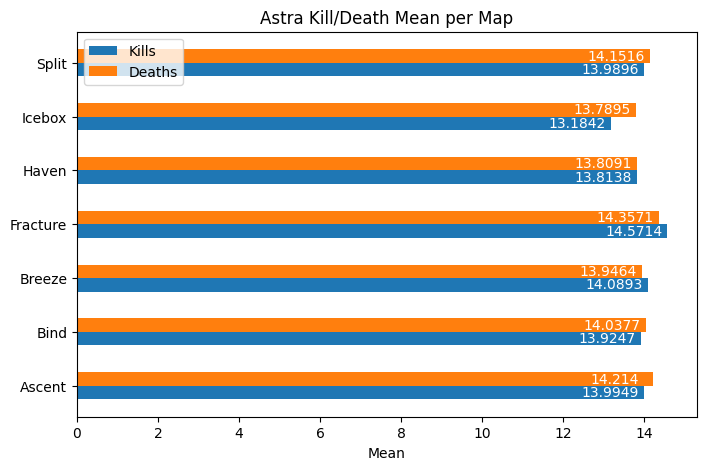

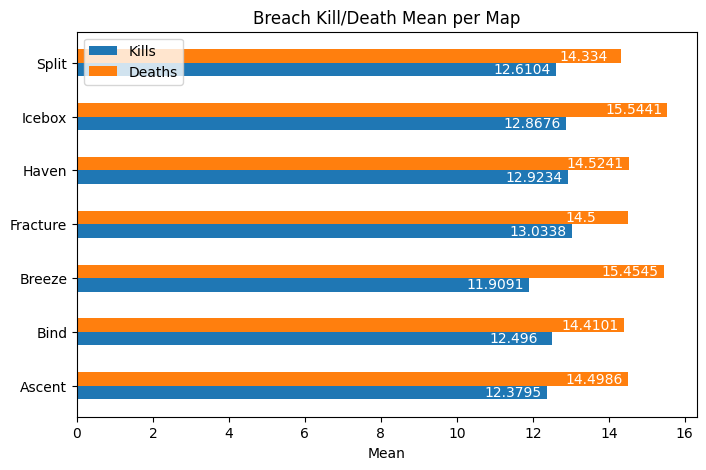

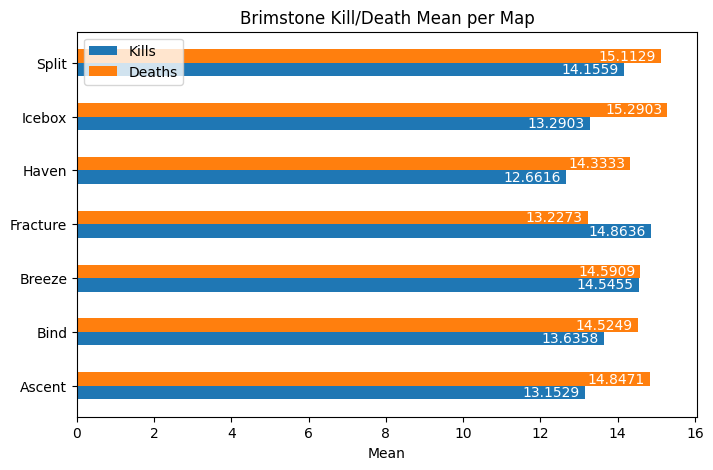

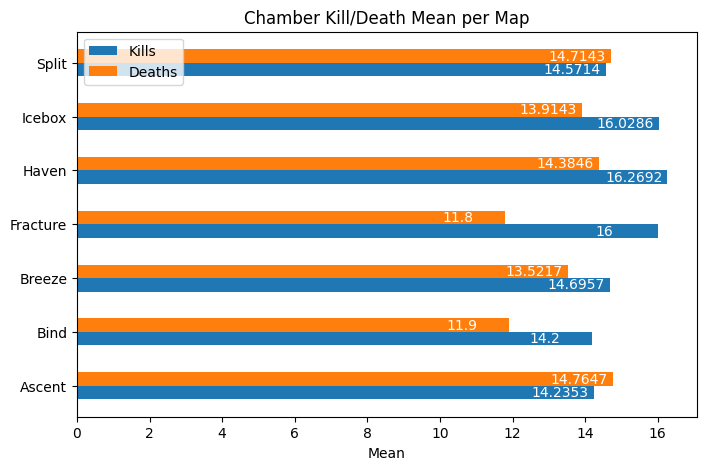

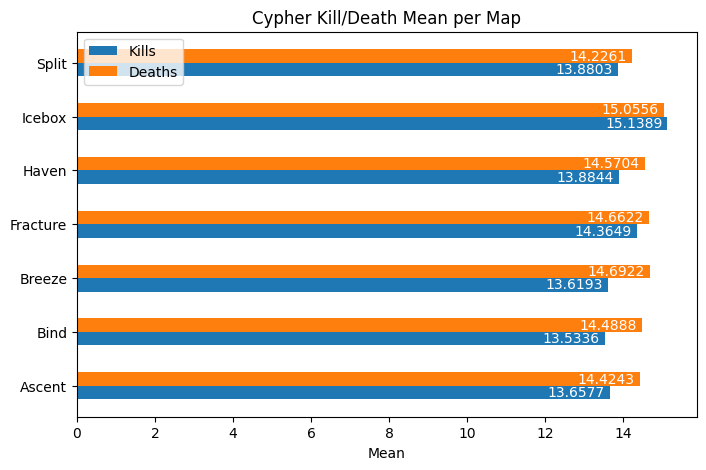

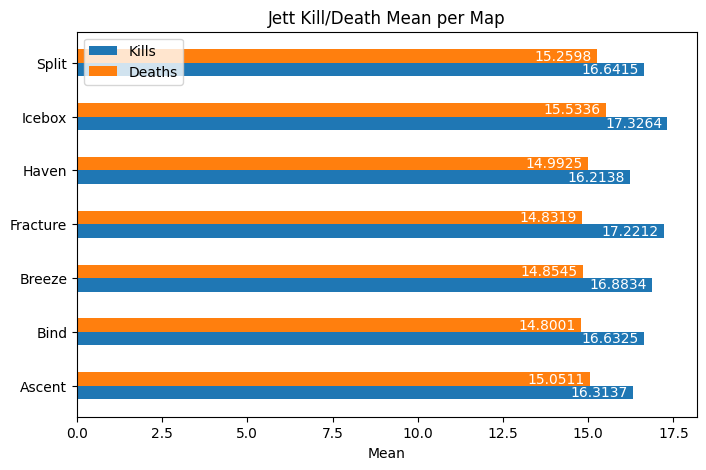

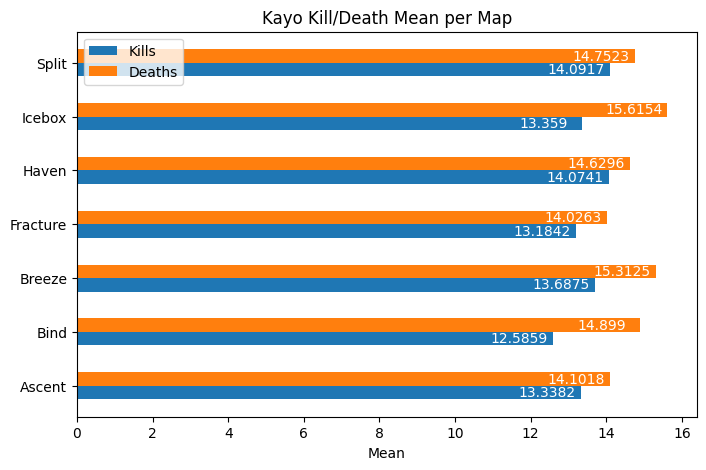

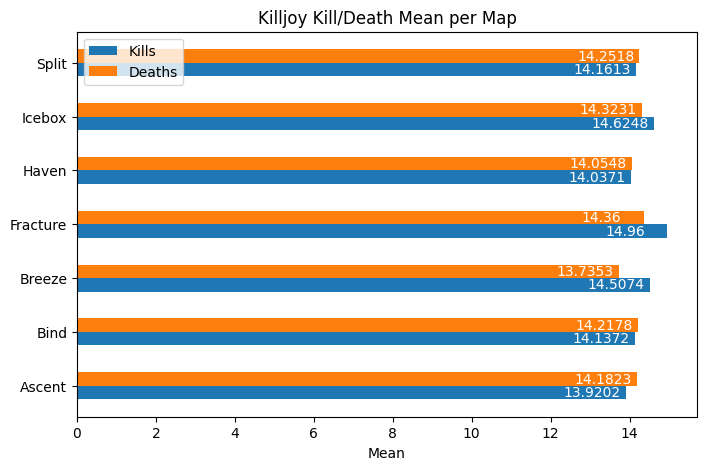

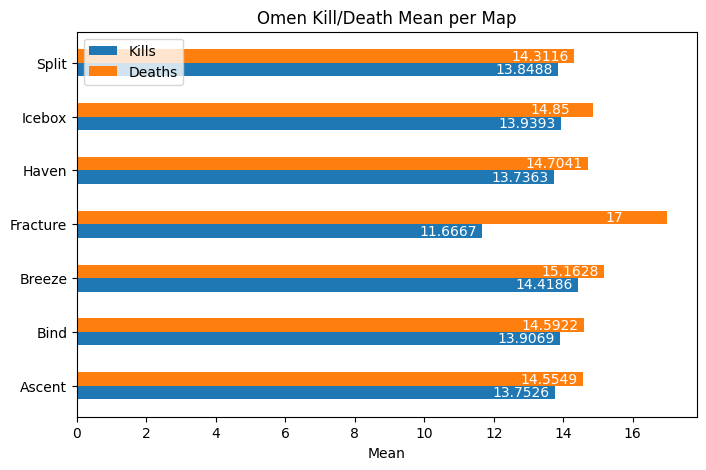

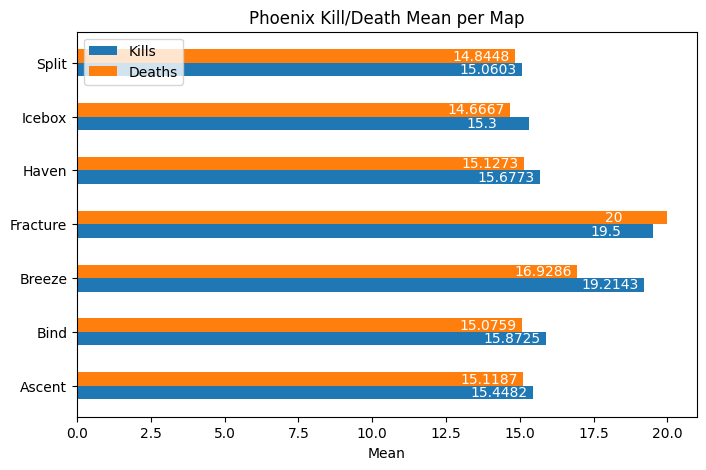

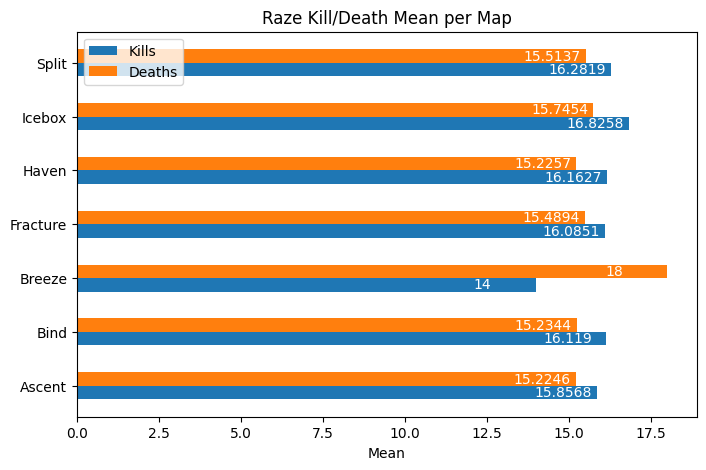

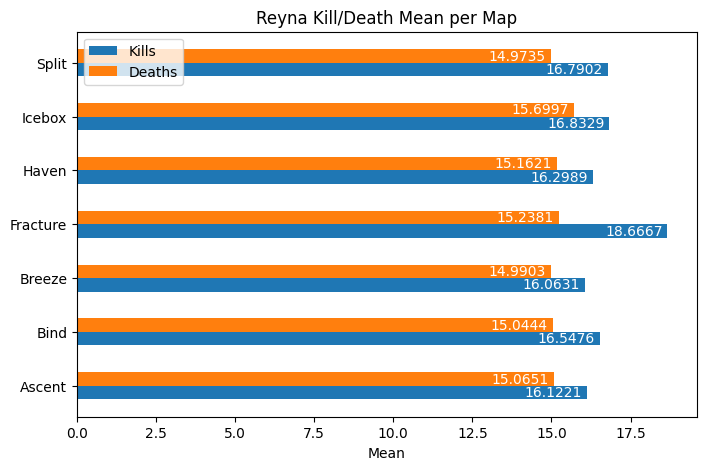

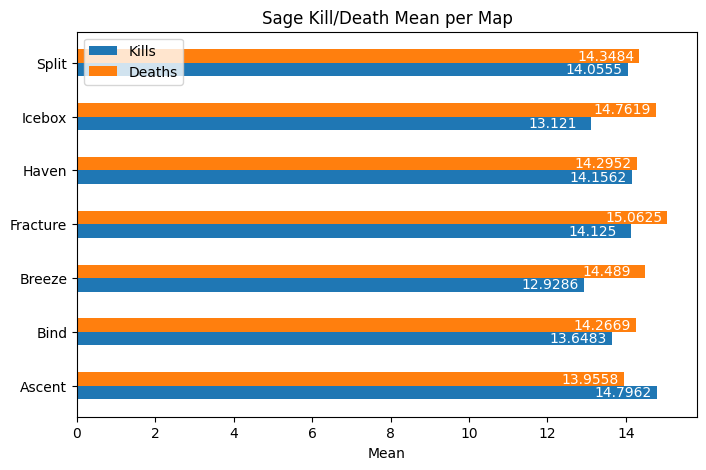

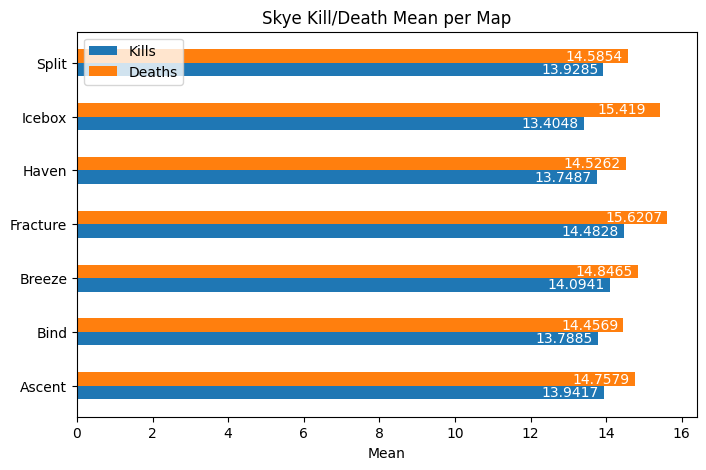

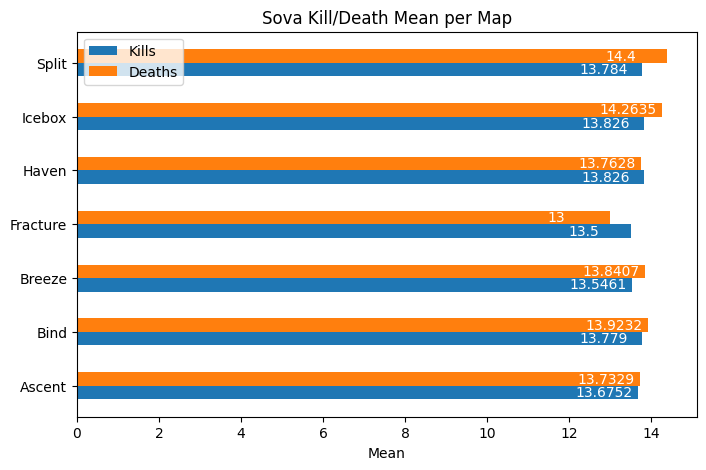

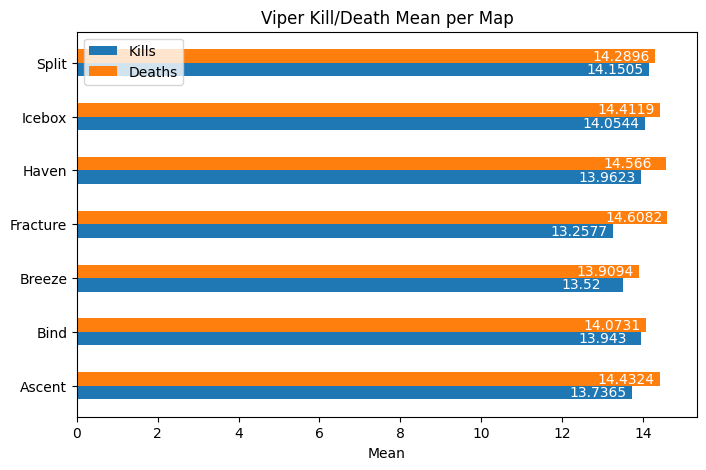

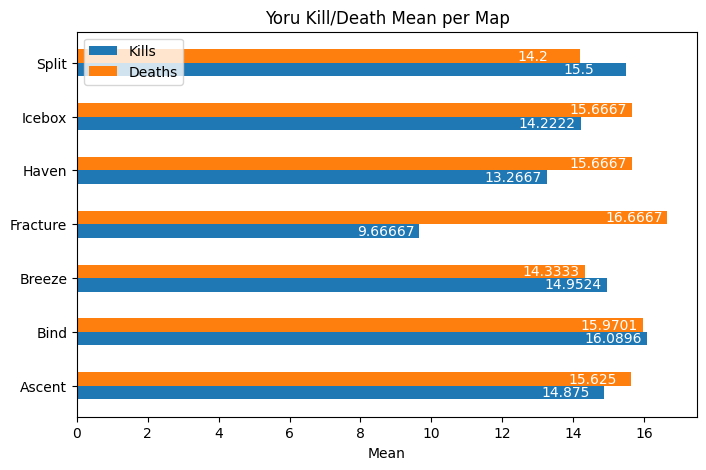

In [ ]:
for i in range(0, tes.shape[0], 7):
    plot_Bar = tes.iloc[i:i+7]

    x = np.arange(len(plot_Bar.index))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(figsize=(8, 5))

    for attribute, measurement in plot_Bar.items():
        offset = width * multiplier
        rects = ax.barh(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=-45, color='white')
        multiplier += 1

    y_label = []
    for agent, map in plot_Bar.index:
        y_label.append(map)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Mean')
    ax.set_title(f'{agent.capitalize()} Kill/Death Mean per Map')
    ax.set_yticks(x + 0.125, y_label)
    ax.legend(loc='upper left')

    plt.show()

# EDA Map yang Paling Sering Digunakan

In [ ]:
%pip install pandas
%pip install numpy
%pip install scipy
%pip install pandas numpy seaborn scipy plotly matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
REFERENCE = [
    'https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy',

    ]

In [ ]:
# Import semua library yang dibutuhkan
import pandas as pd
import numpy as np
import scipy.stats as scp
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
# mencari jumlah nilai unik pada kolom yang bertipe kategorik
def check_uniqueness(df):
    for col in df.select_dtypes(include=object).columns:
        print('No. of unique values in column '+col+':')
        print(df[col].value_counts(),'\n')

# mengecek nilai null
def check_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
    else:
        print(missing_data[missing_data['Total'] > 0])

# mengecek nilai duplikat
def check_duplicates(df):
    dup = df.duplicated()
    print("Jumlah duplikasi data : " + str(dup.sum()))

# mengecek keberadaan outlier (harus numerik)
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    print("Persentase outlier terhadap data per kolom")
    for col in outliers.keys():
        percentage = outliers[col] / len(df)
        print(col)
        print(percentage)
        print()

    return outliers

# Cek nilai outlier & mengembalikan list nama kolom dengan outlier
def outlier_col(dict, total_data):
    outlier_col = []

    print("Persentase outlier terhadap data per kolom")
    for col in dict.keys():
        percentage = dic[col] / total_data
        if 0 < percentage < 1:
            outlier_col.append(col)
    return outlier_col

def drop_outlier(col_to_check, df):
    Q1 = df[col_to_check].quantile(0.25)
    Q3 = df[col_to_check].quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    mask = (df[col_to_check] >= lower_limit) & (df[col_to_check] <= upper_limit)
    new_df = df[mask]
    return new_df

## Read Dataset

In [ ]:
df = pd.read_csv('dataset_final/final_dataset.csv')
df.head()

GameID  PlayerID PlayerName TeamAbbreviation    Agent    ACS  Kills  \
0   60894    8419.0     Reduxx             Boos     jett  313.0   24.0   
1   60894     466.0     ChurmZ             Boos  chamber  227.0   16.0   
2   60894    3712.0   diaamond             Boos     sova  226.0   17.0   
3   60894    5099.0     Boltzy             Boos    viper  218.0   17.0   
4   60894    3983.0     Virtyy             Boos     skye   80.0    5.0   

   Deaths  Assists  PlusMinus  ...  Patch  EventID  \
0    10.0      3.0       14.0  ...    3.0      826   
1    10.0      7.0        6.0  ...    3.0      826   
2     9.0      8.0        8.0  ...    3.0      826   
3    12.0      2.0        5.0  ...    3.0      826   
4    13.0      3.0       -8.0  ...    3.0      826   

                                           EventName  \
0  Nerd Street Gamers Winter Championship - Regio...   
1  Nerd Street Gamers Winter Championship - Regio...   
2  Nerd Street Gamers Winter Championship - Regio...   
3  Nerd Street Gamers Winter Championship - Regio...   
4  Nerd Street Gamers Winter Championship - Regio...   

                 EventStage  Team1ID  Team2ID                Team1     Team2  \
0  Group Stage: Decider (A)     6903     6020  Booster Seat Gaming  Pho Real   
1  Group Stage: Decider (A)     6903     6020  Booster Seat Gaming  Pho Real   
2  Group Stage: Decider (A)     6903     6020  Booster Seat Gaming  Pho Real   
3  Group Stage: Decider (A)     6903     6020  Booster Seat Gaming  Pho Real   
4  Group Stage: Decider (A)     6903     6020  Booster Seat Gaming  Pho Real   

   Team1_MapScore  Team2_MapScore  
0               2               1  
1               2               1  
2               2               1  
3               2               1  
4               2               1  

[5 rows x 51 columns]

In [ ]:
tour_patch1 = df[(df['Patch'] == 1.0)]
tour_patch2 = df[(df['Patch'] == 2.0)]
tour_patch3 = df[(df['Patch'] == 3.0)]

tour_patch_list = [tour_patch1, tour_patch2, tour_patch3]

C:\Users\vinse\AppData\Local\Temp\ipykernel_4748\2984422808.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tour_patch_list[i], x='Map', order=order.index, palette='magma')


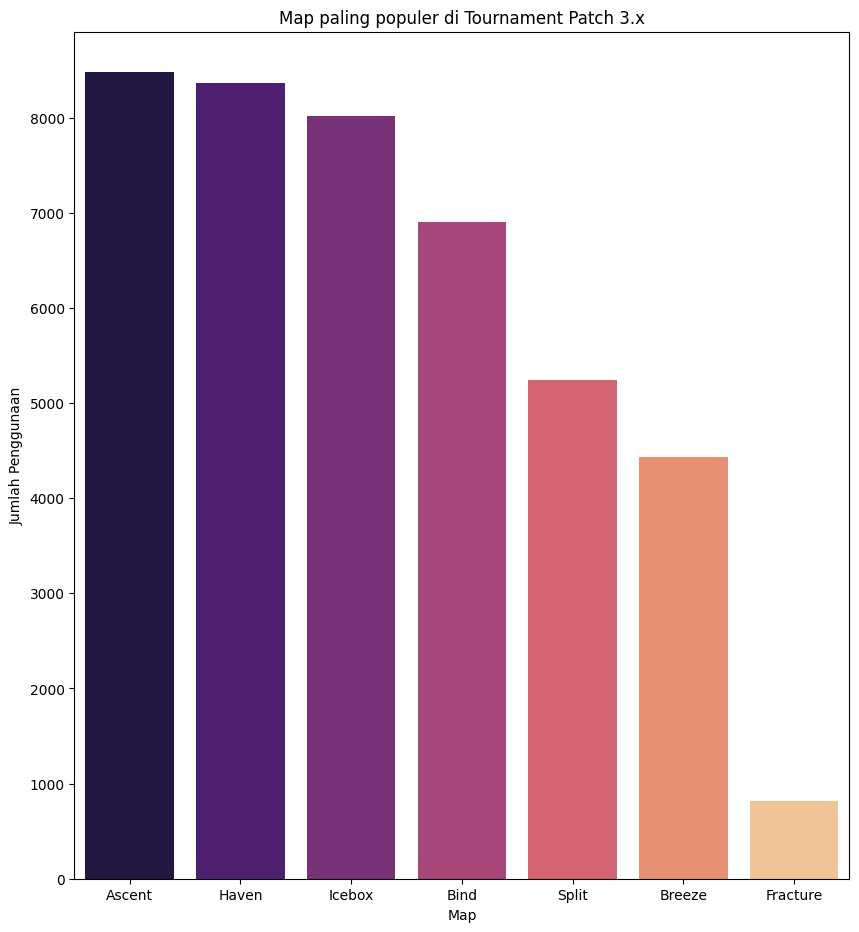

In [ ]:
plt.figure(figsize=(10, 11))
for i in range(2, 3):
    order = tour_patch_list[i]['Map'].value_counts()
    sns.countplot(data=tour_patch_list[i], x='Map', order=order.index, palette='magma')
    plt.title(f'Map paling populer di Tournament Patch {i+1}.x')
    plt.xlabel('Map')
    plt.ylabel('Jumlah Penggunaan')
    plt.show()

C:\Users\vinse\AppData\Local\Temp\ipykernel_4748\136764606.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x='Map', order=order.index, palette='magma').set_ylim(0,4000)


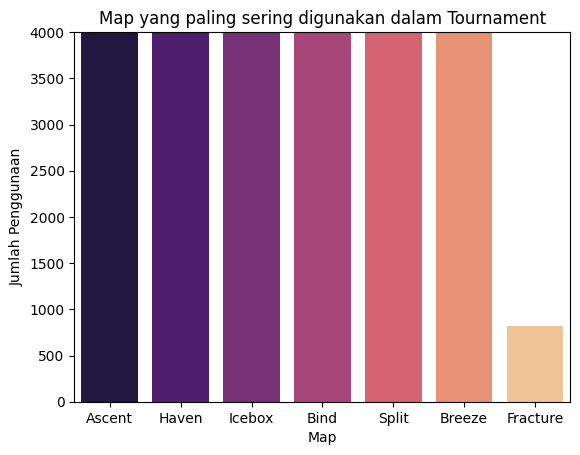

In [ ]:
sns.countplot(df, x='Map', order=map_played_counts.index, palette='magma').set_ylim(0,4000)
plt.title('Map yang paling sering digunakan dalam Tournament')
plt.xlabel('Map')
plt.ylabel('Jumlah Penggunaan')
plt.show()

In [ ]:
print("Berdasarkan dataset tersebut, Map yang paling sering digunakan dalam tournament Valorant adalah", map_played_counts.index[0])
print("Dengan jumlah game yang dimainkan di map tersebut sebanyak", map_played_counts.values[0])

NameError: name 'map_played_counts' is not defined

# Preprocessing Data

## Pre-Processing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scp
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df) * 100

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

def cek_duplikat(df):
    dup = df.duplicated()
    print("Jumlah duplikasi data : " + str(dup.sum()))

### Tabel Scores

In [ ]:
df_scores = pd.read_csv('dataset/scores.csv')
df_scores

No  GameID  PlayerID PlayerName TeamAbbreviation    Agent    ACS  \
0            0   60894    8419.0     Reduxx             Boos     jett  313.0   
1            1   60894     466.0     ChurmZ             Boos  chamber  227.0   
2            2   60894    3712.0   diaamond             Boos     sova  226.0   
3            3   60894    5099.0     Boltzy             Boos    viper  218.0   
4            4   60894    3983.0     Virtyy             Boos     skye   80.0   
...        ...     ...       ...        ...              ...      ...    ...   
128774  157934      13      24.0      Gover              NaN      NaN    0.0   
128775  157935      13      25.0      Jack1              NaN      NaN    0.0   
128776  157936      13      26.0     Rewind              NaN      NaN    0.0   
128777  157937      13      27.0      Woo1y              NaN      NaN    0.0   
128778  157938      13      28.0    DrasseL              NaN      NaN    0.0   

        Kills  Deaths  Assists  ...  Num_4Ks  Num_5Ks  OnevOne  OnevTwo  \
0        24.0    10.0      3.0  ...      2.0      0.0      1.0      0.0   
1        16.0    10.0      7.0  ...      0.0      0.0      0.0      0.0   
2        17.0     9.0      8.0  ...      0.0      0.0      1.0      0.0   
3        17.0    12.0      2.0  ...      0.0      0.0      1.0      0.0   
4         5.0    13.0      3.0  ...      0.0      0.0      0.0      0.0   
...       ...     ...      ...  ...      ...      ...      ...      ...   
128774    0.0     0.0      0.0  ...      NaN      NaN      NaN      NaN   
128775    0.0     0.0      0.0  ...      NaN      NaN      NaN      NaN   
128776    0.0     0.0      0.0  ...      NaN      NaN      NaN      NaN   
128777    0.0     0.0      0.0  ...      NaN      NaN      NaN      NaN   
128778    0.0     0.0      0.0  ...      NaN      NaN      NaN      NaN   

        OnevThree  OnevFour  OnevFive  Econ  Plants  Defuses  
0             0.0       0.0       0.0  74.0     0.0      0.0  
1             0.0       0.0       0.0  67.0     2.0      0.0  
2             0.0       0.0       0.0  58.0     3.0      0.0  
3             0.0       0.0       0.0  48.0     0.0      0.0  
4             0.0       0.0       0.0  21.0     0.0      0.0  
...           ...       ...       ...   ...     ...      ...  
128774        NaN       NaN       NaN   NaN     NaN      NaN  
128775        NaN       NaN       NaN   NaN     NaN      NaN  
128776        NaN       NaN       NaN   NaN     NaN      NaN  
128777        NaN       NaN       NaN   NaN     NaN      NaN  
128778        NaN       NaN       NaN   NaN     NaN      NaN  

[128779 rows x 29 columns]

In [ ]:
df_games = pd.read_csv('dataset/games.csv')
df_games

No  GameID  MatchID     Map  Team1ID  Team2ID                Team1  \
0          0   60894    62393  Breeze     6903     6020  Booster Seat Gaming   
1          1   60895    62393    Bind     6903     6020  Booster Seat Gaming   
2          2   60896    62393   Haven     6903     6020  Booster Seat Gaming   
3          3   60924    62403  Icebox     7046     7047       Bjor's Kittens   
4          4   60925    62403   Haven     7046     7047       Bjor's Kittens   
...      ...     ...      ...     ...      ...      ...                  ...   
12956  15883       6       10   Haven        4       11                smoke   
12957  15884       8       12    Bind       10        8           Highground   
12958  15885       4        8   Haven        4        6                smoke   
12959  15886       3        7   Split        4        5                smoke   
12960  15887      13       17    Bind        7        8            Dignitas    

                    Team2  Winner  Team1_Eco  Team1_SemiEco  Team1_SemiBuy  \
0                Pho Real       1        2.0            0.0            5.0   
1                Pho Real       2        3.0            3.0            5.0   
2                Pho Real       1        2.0            2.0            5.0   
3                Mugiwara       1        2.0            2.0            4.0   
4                Mugiwara       1        4.0            2.0            3.0   
...                   ...     ...        ...            ...            ...   
12956       Obey Alliance       2        NaN            NaN            NaN   
12957                 JSD       2        NaN            NaN            NaN   
12958             Orgless       2        NaN            NaN            NaN   
12959  Last Minute Heroes       2        NaN            NaN            NaN   
12960                 JSD       2        NaN            NaN            NaN   

       Team1_FullBuy  Team1_TotalRounds  Team2_Eco  Team2_SemiEco  \
0               13.0                 13        4.0            2.0   
1                4.0                  2        2.0            0.0   
2               12.0                 13        2.0            2.0   
3               11.0                 13        4.0            1.0   
4               13.0                 13        3.0            3.0   
...              ...                ...        ...            ...   
12956            NaN                  0        NaN            NaN   
12957            NaN                  0        NaN            NaN   
12958            NaN                  0        NaN            NaN   
12959            NaN                  0        NaN            NaN   
12960            NaN                  0        NaN            NaN   

       Team2_SemiBuy  Team2_FullBuy  Team2_TotalRounds  
0                4.0           10.0                  7  
1                4.0            9.0                 13  
2                6.0           11.0                  8  
3                2.0           12.0                  6  
4                4.0           12.0                  9  
...              ...            ...                ...  
12956            NaN            NaN                  0  
12957            NaN            NaN                  0  
12958            NaN            NaN                  0  
12959            NaN            NaN                  0  
12960            NaN            NaN                  0  

[12961 rows x 19 columns]

In [ ]:
df_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128779 entries, 0 to 128778
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   No                128779 non-null  int64  
 1   GameID            128779 non-null  int64  
 2   PlayerID          128692 non-null  float64
 3   PlayerName        128779 non-null  object 
 4   TeamAbbreviation  126763 non-null  object 
 5   Agent             124679 non-null  object 
 6   ACS               128249 non-null  float64
 7   Kills             128289 non-null  float64
 8   Deaths            128289 non-null  float64
 9   Assists           128289 non-null  float64
 10  PlusMinus         127026 non-null  float64
 11  KAST_Percent      2637 non-null    float64
 12  ADR               119904 non-null  float64
 13  HS_Percent        119307 non-null  float64
 14  FirstKills        128249 non-null  float64
 15  FirstDeaths       119314 non-null  float64
 16  FKFD_PlusMinus    11

In [ ]:
cek_null(df_scores)

                   Total    Percent
KAST_Percent      126142  97.952306
Defuses            10195   7.916663
OnevThree          10195   7.916663
Num_3Ks            10195   7.916663
Num_2Ks            10195   7.916663
OnevOne            10195   7.916663
Num_5Ks            10195   7.916663
OnevTwo            10195   7.916663
Num_4Ks            10195   7.916663
OnevFour           10195   7.916663
OnevFive           10195   7.916663
Econ               10195   7.916663
Plants             10195   7.916663
HS_Percent          9472   7.355236
FirstDeaths         9465   7.349801
FKFD_PlusMinus      9465   7.349801
ADR                 8875   6.891652
Agent               4100   3.183749
TeamAbbreviation    2016   1.565473
PlusMinus           1753   1.361247
FirstKills           530   0.411558
ACS                  530   0.411558
Assists              490   0.380497
Deaths               490   0.380497
Kills                490   0.380497
PlayerID              87   0.067558


Kolom `KAST_Percent` memiliki banyak nilai `NULL` dan kolom `PlayerID` serta `No` tidak relevan untuk dijadikan fitur karena merupakan identifier.

In [ ]:
df_scores_col_drop = df_scores.drop(['KAST_Percent', 'No'], axis=1)
df_scores_col_drop

GameID  PlayerID PlayerName TeamAbbreviation    Agent    ACS  Kills  \
0        60894    8419.0     Reduxx             Boos     jett  313.0   24.0   
1        60894     466.0     ChurmZ             Boos  chamber  227.0   16.0   
2        60894    3712.0   diaamond             Boos     sova  226.0   17.0   
3        60894    5099.0     Boltzy             Boos    viper  218.0   17.0   
4        60894    3983.0     Virtyy             Boos     skye   80.0    5.0   
...        ...       ...        ...              ...      ...    ...    ...   
128774      13      24.0      Gover              NaN      NaN    0.0    0.0   
128775      13      25.0      Jack1              NaN      NaN    0.0    0.0   
128776      13      26.0     Rewind              NaN      NaN    0.0    0.0   
128777      13      27.0      Woo1y              NaN      NaN    0.0    0.0   
128778      13      28.0    DrasseL              NaN      NaN    0.0    0.0   

        Deaths  Assists  PlusMinus  ...  Num_4Ks  Num_5Ks  OnevOne  OnevTwo  \
0         10.0      3.0       14.0  ...      2.0      0.0      1.0      0.0   
1         10.0      7.0        6.0  ...      0.0      0.0      0.0      0.0   
2          9.0      8.0        8.0  ...      0.0      0.0      1.0      0.0   
3         12.0      2.0        5.0  ...      0.0      0.0      1.0      0.0   
4         13.0      3.0       -8.0  ...      0.0      0.0      0.0      0.0   
...        ...      ...        ...  ...      ...      ...      ...      ...   
128774     0.0      0.0        NaN  ...      NaN      NaN      NaN      NaN   
128775     0.0      0.0        NaN  ...      NaN      NaN      NaN      NaN   
128776     0.0      0.0        NaN  ...      NaN      NaN      NaN      NaN   
128777     0.0      0.0        NaN  ...      NaN      NaN      NaN      NaN   
128778     0.0      0.0        NaN  ...      NaN      NaN      NaN      NaN   

        OnevThree  OnevFour  OnevFive  Econ  Plants  Defuses  
0             0.0       0.0       0.0  74.0     0.0      0.0  
1             0.0       0.0       0.0  67.0     2.0      0.0  
2             0.0       0.0       0.0  58.0     3.0      0.0  
3             0.0       0.0       0.0  48.0     0.0      0.0  
4             0.0       0.0       0.0  21.0     0.0      0.0  
...           ...       ...       ...   ...     ...      ...  
128774        NaN       NaN       NaN   NaN     NaN      NaN  
128775        NaN       NaN       NaN   NaN     NaN      NaN  
128776        NaN       NaN       NaN   NaN     NaN      NaN  
128777        NaN       NaN       NaN   NaN     NaN      NaN  
128778        NaN       NaN       NaN   NaN     NaN      NaN  

[128779 rows x 27 columns]

In [ ]:
cek_null(df_scores_col_drop)

                  Total   Percent
Defuses           10195  7.916663
Plants            10195  7.916663
Econ              10195  7.916663
OnevFive          10195  7.916663
OnevFour          10195  7.916663
OnevThree         10195  7.916663
OnevTwo           10195  7.916663
OnevOne           10195  7.916663
Num_5Ks           10195  7.916663
Num_4Ks           10195  7.916663
Num_3Ks           10195  7.916663
Num_2Ks           10195  7.916663
HS_Percent         9472  7.355236
FKFD_PlusMinus     9465  7.349801
FirstDeaths        9465  7.349801
ADR                8875  6.891652
Agent              4100  3.183749
TeamAbbreviation   2016  1.565473
PlusMinus          1753  1.361247
FirstKills          530  0.411558
ACS                 530  0.411558
Assists             490  0.380497
Deaths              490  0.380497
Kills               490  0.380497
PlayerID             87  0.067558


Terlihat bahwa `FirstKills`, `ACS`, `Assists`, `Deaths`, `Kills` memiliki beberapa nilai `NULL`. Karena nilai-nilai tersebut tidak dapat diganti dan hanya mengambil proposi sedikit dari keseluruhan data (kurang dari 0.5%), maka row-row tersebut didrop.

Terlihat juga bahwa terdapat row yang memiliki kolom `Agent` kosong. Sulit untuk menginfer agent yang dipilih dalam sebuah game karena terdapat constraint dimana tiap agent yang dipilih pemain dalam sebuah tim harus **unik**. Selain itu, `TeamAbbreviation` juga sulit diinfer karena terdapat constraint bahwa dalam tiap game, sebuah tim harus punya tepat 5 pemain.

In [ ]:
df_scores_null_drop = df_scores_col_drop.dropna(subset=['FirstKills', 'ACS', 'Assists', 'Deaths', 'Kills', 'Agent', 'TeamAbbreviation'])
df_scores_null_drop

GameID  PlayerID PlayerName TeamAbbreviation      Agent    ACS  Kills  \
0        60894    8419.0     Reduxx             Boos       jett  313.0   24.0   
1        60894     466.0     ChurmZ             Boos    chamber  227.0   16.0   
2        60894    3712.0   diaamond             Boos       sova  226.0   17.0   
3        60894    5099.0     Boltzy             Boos      viper  218.0   17.0   
4        60894    3983.0     Virtyy             Boos       skye   80.0    5.0   
...        ...       ...        ...              ...        ...    ...    ...   
127989     221     321.0    chiwawa               WP       sage  312.0   28.0   
127990     221     259.0       arch               WP    phoenix  255.0   20.0   
127991     221     417.0       TayS               WP     cypher  240.0   23.0   
127992     221     322.0       Duno               WP       sova  163.0   12.0   
127993     221     319.0     pipsoN               WP  brimstone  133.0   11.0   

        Deaths  Assists  PlusMinus  ...  Num_4Ks  Num_5Ks  OnevOne  OnevTwo  \
0         10.0      3.0       14.0  ...      2.0      0.0      1.0      0.0   
1         10.0      7.0        6.0  ...      0.0      0.0      0.0      0.0   
2          9.0      8.0        8.0  ...      0.0      0.0      1.0      0.0   
3         12.0      2.0        5.0  ...      0.0      0.0      1.0      0.0   
4         13.0      3.0       -8.0  ...      0.0      0.0      0.0      0.0   
...        ...      ...        ...  ...      ...      ...      ...      ...   
127989    14.0     11.0       14.0  ...      NaN      NaN      NaN      NaN   
127990    18.0      9.0        2.0  ...      NaN      NaN      NaN      NaN   
127991    17.0      6.0        6.0  ...      NaN      NaN      NaN      NaN   
127992    17.0     10.0       -5.0  ...      NaN      NaN      NaN      NaN   
127993    17.0      5.0       -6.0  ...      NaN      NaN      NaN      NaN   

        OnevThree  OnevFour  OnevFive  Econ  Plants  Defuses  
0             0.0       0.0       0.0  74.0     0.0      0.0  
1             0.0       0.0       0.0  67.0     2.0      0.0  
2             0.0       0.0       0.0  58.0     3.0      0.0  
3             0.0       0.0       0.0  48.0     0.0      0.0  
4             0.0       0.0       0.0  21.0     0.0      0.0  
...           ...       ...       ...   ...     ...      ...  
127989        NaN       NaN       NaN   NaN     NaN      NaN  
127990        NaN       NaN       NaN   NaN     NaN      NaN  
127991        NaN       NaN       NaN   NaN     NaN      NaN  
127992        NaN       NaN       NaN   NaN     NaN      NaN  
127993        NaN       NaN       NaN   NaN     NaN      NaN  

[122763 rows x 27 columns]

In [ ]:
cek_null(df_scores_null_drop)

                Total   Percent
Defuses          5865  4.777498
Plants           5865  4.777498
Econ             5865  4.777498
OnevFive         5865  4.777498
OnevFour         5865  4.777498
OnevThree        5865  4.777498
OnevTwo          5865  4.777498
OnevOne          5865  4.777498
Num_5Ks          5865  4.777498
Num_4Ks          5865  4.777498
Num_3Ks          5865  4.777498
Num_2Ks          5865  4.777498
HS_Percent       5142  4.188558
FKFD_PlusMinus   5135  4.182856
FirstDeaths      5135  4.182856
ADR              4691  3.821184
PlayerID           23  0.018735


In [ ]:
df_scores_null_drop_2 = df_scores_null_drop.dropna(subset=['Defuses'])
df_scores_null_drop_2

GameID  PlayerID PlayerName TeamAbbreviation    Agent    ACS  Kills  \
0        60894    8419.0     Reduxx             Boos     jett  313.0   24.0   
1        60894     466.0     ChurmZ             Boos  chamber  227.0   16.0   
2        60894    3712.0   diaamond             Boos     sova  226.0   17.0   
3        60894    5099.0     Boltzy             Boos    viper  218.0   17.0   
4        60894    3983.0     Virtyy             Boos     skye   80.0    5.0   
...        ...       ...        ...              ...      ...    ...    ...   
120602    2309    2181.0     QUERNI              GRG     omen  227.0   13.0   
120603    2309    2179.0     bmblbe              GRG  phoenix  110.0    4.0   
120604    2309    2178.0      DcTzR              GRG     jett   98.0    4.0   
120605    2309    2180.0     FRESHY              GRG     sova   91.0    3.0   
120606    2309    2177.0        fir              GRG   cypher   88.0    3.0   

        Deaths  Assists  PlusMinus  ...  Num_4Ks  Num_5Ks  OnevOne  OnevTwo  \
0         10.0      3.0       14.0  ...      2.0      0.0      1.0      0.0   
1         10.0      7.0        6.0  ...      0.0      0.0      0.0      0.0   
2          9.0      8.0        8.0  ...      0.0      0.0      1.0      0.0   
3         12.0      2.0        5.0  ...      0.0      0.0      1.0      0.0   
4         13.0      3.0       -8.0  ...      0.0      0.0      0.0      0.0   
...        ...      ...        ...  ...      ...      ...      ...      ...   
120602    12.0      1.0        1.0  ...      0.0      0.0      1.0      0.0   
120603    13.0      4.0       -9.0  ...      0.0      0.0      0.0      0.0   
120604    15.0      0.0      -11.0  ...      0.0      0.0      0.0      0.0   
120605    14.0      4.0      -11.0  ...      0.0      0.0      0.0      0.0   
120606    14.0      2.0      -11.0  ...      0.0      0.0      0.0      0.0   

        OnevThree  OnevFour  OnevFive  Econ  Plants  Defuses  
0             0.0       0.0       0.0  74.0     0.0      0.0  
1             0.0       0.0       0.0  67.0     2.0      0.0  
2             0.0       0.0       0.0  58.0     3.0      0.0  
3             0.0       0.0       0.0  48.0     0.0      0.0  
4             0.0       0.0       0.0  21.0     0.0      0.0  
...           ...       ...       ...   ...     ...      ...  
120602        0.0       0.0       0.0  61.0     0.0      0.0  
120603        0.0       0.0       0.0  32.0     0.0      2.0  
120604        0.0       0.0       0.0  21.0     0.0      0.0  
120605        0.0       0.0       0.0  29.0     1.0      0.0  
120606        0.0       0.0       0.0  18.0     0.0      0.0  

[116898 rows x 27 columns]

In [ ]:
cek_null(df_scores_null_drop_2)

            Total   Percent
PlayerID       23  0.019675
HS_Percent      7  0.005988


In [ ]:
df_scores_filled = df_scores_null_drop_2.fillna(df_scores_null_drop_2['HS_Percent'].mean(), inplace=False)
cek_null(df_scores_filled)

Empty DataFrame
Columns: [Total, Percent]
Index: []


In [ ]:
df_scores_filled

GameID  PlayerID PlayerName TeamAbbreviation    Agent    ACS  Kills  \
0        60894    8419.0     Reduxx             Boos     jett  313.0   24.0   
1        60894     466.0     ChurmZ             Boos  chamber  227.0   16.0   
2        60894    3712.0   diaamond             Boos     sova  226.0   17.0   
3        60894    5099.0     Boltzy             Boos    viper  218.0   17.0   
4        60894    3983.0     Virtyy             Boos     skye   80.0    5.0   
...        ...       ...        ...              ...      ...    ...    ...   
120602    2309    2181.0     QUERNI              GRG     omen  227.0   13.0   
120603    2309    2179.0     bmblbe              GRG  phoenix  110.0    4.0   
120604    2309    2178.0      DcTzR              GRG     jett   98.0    4.0   
120605    2309    2180.0     FRESHY              GRG     sova   91.0    3.0   
120606    2309    2177.0        fir              GRG   cypher   88.0    3.0   

        Deaths  Assists  PlusMinus  ...  Num_4Ks  Num_5Ks  OnevOne  OnevTwo  \
0         10.0      3.0       14.0  ...      2.0      0.0      1.0      0.0   
1         10.0      7.0        6.0  ...      0.0      0.0      0.0      0.0   
2          9.0      8.0        8.0  ...      0.0      0.0      1.0      0.0   
3         12.0      2.0        5.0  ...      0.0      0.0      1.0      0.0   
4         13.0      3.0       -8.0  ...      0.0      0.0      0.0      0.0   
...        ...      ...        ...  ...      ...      ...      ...      ...   
120602    12.0      1.0        1.0  ...      0.0      0.0      1.0      0.0   
120603    13.0      4.0       -9.0  ...      0.0      0.0      0.0      0.0   
120604    15.0      0.0      -11.0  ...      0.0      0.0      0.0      0.0   
120605    14.0      4.0      -11.0  ...      0.0      0.0      0.0      0.0   
120606    14.0      2.0      -11.0  ...      0.0      0.0      0.0      0.0   

        OnevThree  OnevFour  OnevFive  Econ  Plants  Defuses  
0             0.0       0.0       0.0  74.0     0.0      0.0  
1             0.0       0.0       0.0  67.0     2.0      0.0  
2             0.0       0.0       0.0  58.0     3.0      0.0  
3             0.0       0.0       0.0  48.0     0.0      0.0  
4             0.0       0.0       0.0  21.0     0.0      0.0  
...           ...       ...       ...   ...     ...      ...  
120602        0.0       0.0       0.0  61.0     0.0      0.0  
120603        0.0       0.0       0.0  32.0     0.0      2.0  
120604        0.0       0.0       0.0  21.0     0.0      0.0  
120605        0.0       0.0       0.0  29.0     1.0      0.0  
120606        0.0       0.0       0.0  18.0     0.0      0.0  

[116898 rows x 27 columns]

#### Memastikan Setiap Game Memiliki Pemain 10

In [ ]:
scores_by_game_id = df_scores_filled.groupby('GameID').size()
valid_game_list = scores_by_game_id[scores_by_game_id == 10].index
df_scores_final = df_scores_filled[df_scores_filled['GameID'].isin(valid_game_list)]
df_scores_final

GameID  PlayerID PlayerName TeamAbbreviation    Agent    ACS  Kills  \
0        60894    8419.0     Reduxx             Boos     jett  313.0   24.0   
1        60894     466.0     ChurmZ             Boos  chamber  227.0   16.0   
2        60894    3712.0   diaamond             Boos     sova  226.0   17.0   
3        60894    5099.0     Boltzy             Boos    viper  218.0   17.0   
4        60894    3983.0     Virtyy             Boos     skye   80.0    5.0   
...        ...       ...        ...              ...      ...    ...    ...   
120602    2309    2181.0     QUERNI              GRG     omen  227.0   13.0   
120603    2309    2179.0     bmblbe              GRG  phoenix  110.0    4.0   
120604    2309    2178.0      DcTzR              GRG     jett   98.0    4.0   
120605    2309    2180.0     FRESHY              GRG     sova   91.0    3.0   
120606    2309    2177.0        fir              GRG   cypher   88.0    3.0   

        Deaths  Assists  PlusMinus  ...  Num_4Ks  Num_5Ks  OnevOne  OnevTwo  \
0         10.0      3.0       14.0  ...      2.0      0.0      1.0      0.0   
1         10.0      7.0        6.0  ...      0.0      0.0      0.0      0.0   
2          9.0      8.0        8.0  ...      0.0      0.0      1.0      0.0   
3         12.0      2.0        5.0  ...      0.0      0.0      1.0      0.0   
4         13.0      3.0       -8.0  ...      0.0      0.0      0.0      0.0   
...        ...      ...        ...  ...      ...      ...      ...      ...   
120602    12.0      1.0        1.0  ...      0.0      0.0      1.0      0.0   
120603    13.0      4.0       -9.0  ...      0.0      0.0      0.0      0.0   
120604    15.0      0.0      -11.0  ...      0.0      0.0      0.0      0.0   
120605    14.0      4.0      -11.0  ...      0.0      0.0      0.0      0.0   
120606    14.0      2.0      -11.0  ...      0.0      0.0      0.0      0.0   

        OnevThree  OnevFour  OnevFive  Econ  Plants  Defuses  
0             0.0       0.0       0.0  74.0     0.0      0.0  
1             0.0       0.0       0.0  67.0     2.0      0.0  
2             0.0       0.0       0.0  58.0     3.0      0.0  
3             0.0       0.0       0.0  48.0     0.0      0.0  
4             0.0       0.0       0.0  21.0     0.0      0.0  
...           ...       ...       ...   ...     ...      ...  
120602        0.0       0.0       0.0  61.0     0.0      0.0  
120603        0.0       0.0       0.0  32.0     0.0      2.0  
120604        0.0       0.0       0.0  21.0     0.0      0.0  
120605        0.0       0.0       0.0  29.0     1.0      0.0  
120606        0.0       0.0       0.0  18.0     0.0      0.0  

[108250 rows x 27 columns]

### Cek Duplikat

In [ ]:
cek_duplikat(df_scores_final)

Jumlah duplikasi data : 0


In [ ]:
df_scores_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108250 entries, 0 to 120606
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   GameID            108250 non-null  int64  
 1   PlayerID          108250 non-null  float64
 2   PlayerName        108250 non-null  object 
 3   TeamAbbreviation  108250 non-null  object 
 4   Agent             108250 non-null  object 
 5   ACS               108250 non-null  float64
 6   Kills             108250 non-null  float64
 7   Deaths            108250 non-null  float64
 8   Assists           108250 non-null  float64
 9   PlusMinus         108250 non-null  float64
 10  ADR               108250 non-null  float64
 11  HS_Percent        108250 non-null  float64
 12  FirstKills        108250 non-null  float64
 13  FirstDeaths       108250 non-null  float64
 14  FKFD_PlusMinus    108250 non-null  float64
 15  Num_2Ks           108250 non-null  float64
 16  Num_3Ks           108250 

### Export dataframe ke csv

In [ ]:
df_scores_final.to_csv('dataset_final/scores_final.csv', index=False)

## Tabel Games

In [ ]:
df_games = pd.read_csv('dataset/games.csv')
df_games

No  GameID  MatchID     Map  Team1ID  Team2ID                Team1  \
0          0   60894    62393  Breeze     6903     6020  Booster Seat Gaming   
1          1   60895    62393    Bind     6903     6020  Booster Seat Gaming   
2          2   60896    62393   Haven     6903     6020  Booster Seat Gaming   
3          3   60924    62403  Icebox     7046     7047       Bjor's Kittens   
4          4   60925    62403   Haven     7046     7047       Bjor's Kittens   
...      ...     ...      ...     ...      ...      ...                  ...   
12956  15883       6       10   Haven        4       11                smoke   
12957  15884       8       12    Bind       10        8           Highground   
12958  15885       4        8   Haven        4        6                smoke   
12959  15886       3        7   Split        4        5                smoke   
12960  15887      13       17    Bind        7        8            Dignitas    

                    Team2  Winner  Team1_Eco  Team1_SemiEco  Team1_SemiBuy  \
0                Pho Real       1        2.0            0.0            5.0   
1                Pho Real       2        3.0            3.0            5.0   
2                Pho Real       1        2.0            2.0            5.0   
3                Mugiwara       1        2.0            2.0            4.0   
4                Mugiwara       1        4.0            2.0            3.0   
...                   ...     ...        ...            ...            ...   
12956       Obey Alliance       2        NaN            NaN            NaN   
12957                 JSD       2        NaN            NaN            NaN   
12958             Orgless       2        NaN            NaN            NaN   
12959  Last Minute Heroes       2        NaN            NaN            NaN   
12960                 JSD       2        NaN            NaN            NaN   

       Team1_FullBuy  Team1_TotalRounds  Team2_Eco  Team2_SemiEco  \
0               13.0                 13        4.0            2.0   
1                4.0                  2        2.0            0.0   
2               12.0                 13        2.0            2.0   
3               11.0                 13        4.0            1.0   
4               13.0                 13        3.0            3.0   
...              ...                ...        ...            ...   
12956            NaN                  0        NaN            NaN   
12957            NaN                  0        NaN            NaN   
12958            NaN                  0        NaN            NaN   
12959            NaN                  0        NaN            NaN   
12960            NaN                  0        NaN            NaN   

       Team2_SemiBuy  Team2_FullBuy  Team2_TotalRounds  
0                4.0           10.0                  7  
1                4.0            9.0                 13  
2                6.0           11.0                  8  
3                2.0           12.0                  6  
4                4.0           12.0                  9  
...              ...            ...                ...  
12956            NaN            NaN                  0  
12957            NaN            NaN                  0  
12958            NaN            NaN                  0  
12959            NaN            NaN                  0  
12960            NaN            NaN                  0  

[12961 rows x 19 columns]

In [ ]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12961 entries, 0 to 12960
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No                 12961 non-null  int64  
 1   GameID             12961 non-null  int64  
 2   MatchID            12961 non-null  int64  
 3   Map                12961 non-null  object 
 4   Team1ID            12961 non-null  int64  
 5   Team2ID            12961 non-null  int64  
 6   Team1              12961 non-null  object 
 7   Team2              12961 non-null  object 
 8   Winner             12961 non-null  int64  
 9   Team1_Eco          11927 non-null  float64
 10  Team1_SemiEco      11927 non-null  float64
 11  Team1_SemiBuy      11927 non-null  float64
 12  Team1_FullBuy      11927 non-null  float64
 13  Team1_TotalRounds  12961 non-null  int64  
 14  Team2_Eco          11927 non-null  float64
 15  Team2_SemiEco      11927 non-null  float64
 16  Team2_SemiBuy      119

Karena `No` merupakan identifier yang tidak relevan, maka dihapus.

In [ ]:
df_games_col_drop = df_games.drop(['No'], axis=1)
df_games_col_drop

GameID  MatchID     Map  Team1ID  Team2ID                Team1  \
0       60894    62393  Breeze     6903     6020  Booster Seat Gaming   
1       60895    62393    Bind     6903     6020  Booster Seat Gaming   
2       60896    62393   Haven     6903     6020  Booster Seat Gaming   
3       60924    62403  Icebox     7046     7047       Bjor's Kittens   
4       60925    62403   Haven     7046     7047       Bjor's Kittens   
...       ...      ...     ...      ...      ...                  ...   
12956       6       10   Haven        4       11                smoke   
12957       8       12    Bind       10        8           Highground   
12958       4        8   Haven        4        6                smoke   
12959       3        7   Split        4        5                smoke   
12960      13       17    Bind        7        8            Dignitas    

                    Team2  Winner  Team1_Eco  Team1_SemiEco  Team1_SemiBuy  \
0                Pho Real       1        2.0            0.0            5.0   
1                Pho Real       2        3.0            3.0            5.0   
2                Pho Real       1        2.0            2.0            5.0   
3                Mugiwara       1        2.0            2.0            4.0   
4                Mugiwara       1        4.0            2.0            3.0   
...                   ...     ...        ...            ...            ...   
12956       Obey Alliance       2        NaN            NaN            NaN   
12957                 JSD       2        NaN            NaN            NaN   
12958             Orgless       2        NaN            NaN            NaN   
12959  Last Minute Heroes       2        NaN            NaN            NaN   
12960                 JSD       2        NaN            NaN            NaN   

       Team1_FullBuy  Team1_TotalRounds  Team2_Eco  Team2_SemiEco  \
0               13.0                 13        4.0            2.0   
1                4.0                  2        2.0            0.0   
2               12.0                 13        2.0            2.0   
3               11.0                 13        4.0            1.0   
4               13.0                 13        3.0            3.0   
...              ...                ...        ...            ...   
12956            NaN                  0        NaN            NaN   
12957            NaN                  0        NaN            NaN   
12958            NaN                  0        NaN            NaN   
12959            NaN                  0        NaN            NaN   
12960            NaN                  0        NaN            NaN   

       Team2_SemiBuy  Team2_FullBuy  Team2_TotalRounds  
0                4.0           10.0                  7  
1                4.0            9.0                 13  
2                6.0           11.0                  8  
3                2.0           12.0                  6  
4                4.0           12.0                  9  
...              ...            ...                ...  
12956            NaN            NaN                  0  
12957            NaN            NaN                  0  
12958            NaN            NaN                  0  
12959            NaN            NaN                  0  
12960            NaN            NaN                  0  

[12961 rows x 18 columns]

In [ ]:
cek_null(df_games_col_drop)

               Total   Percent
Team1_SemiEco   1034  7.977779
Team1_SemiBuy   1034  7.977779
Team2_FullBuy   1034  7.977779
Team2_SemiBuy   1034  7.977779
Team2_SemiEco   1034  7.977779
Team2_Eco       1034  7.977779
Team1_FullBuy   1034  7.977779
Team1_Eco       1034  7.977779


In [ ]:
df_games_drop = df_games_col_drop.dropna(subset=['Team1_Eco'])
cek_null(df_games_drop)

Empty DataFrame
Columns: [Total, Percent]
Index: []


Map dengan value `TBD` sudah ikut terdrop.

In [ ]:
df_games_drop['Map'].unique()

array(['Breeze', 'Bind', 'Haven', 'Icebox', 'Ascent', 'Split', 'Fracture'],
      dtype=object)

### Cek Duplikat

In [ ]:
cek_duplikat(df_games_drop)

Jumlah duplikasi data : 0


In [ ]:
df_games_final = df_games_drop

In [ ]:
df_games_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11927 entries, 0 to 12130
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GameID             11927 non-null  int64  
 1   MatchID            11927 non-null  int64  
 2   Map                11927 non-null  object 
 3   Team1ID            11927 non-null  int64  
 4   Team2ID            11927 non-null  int64  
 5   Team1              11927 non-null  object 
 6   Team2              11927 non-null  object 
 7   Winner             11927 non-null  int64  
 8   Team1_Eco          11927 non-null  float64
 9   Team1_SemiEco      11927 non-null  float64
 10  Team1_SemiBuy      11927 non-null  float64
 11  Team1_FullBuy      11927 non-null  float64
 12  Team1_TotalRounds  11927 non-null  int64  
 13  Team2_Eco          11927 non-null  float64
 14  Team2_SemiEco      11927 non-null  float64
 15  Team2_SemiBuy      11927 non-null  float64
 16  Team2_FullBuy      11927 no

### Export dataframe ke csv

In [ ]:
df_games_final.to_csv('dataset_final/games_final.csv', index=False)

## Tabel Matches

In [ ]:
df_match = pd.read_csv('dataset/matches.csv')

Karena `No` merupakan identifier yang tidak relevan, maka dihapus.

In [ ]:
df_match = df_match.drop(['No'], axis=1)
df_match

MatchID                 Date       Patch  EventID  \
0       62393  2022-01-08 15:30:00  Patch 3.12      826   
1       62403  2022-01-08 15:30:00  Patch 3.12      826   
2       62391  2022-01-08 12:30:00  Patch 3.12      826   
3       62396  2022-01-08 12:30:00  Patch 3.12      826   
4       62402  2022-01-08 12:30:00  Patch 3.12      826   
...       ...                  ...         ...      ...   
6396       10  2020-05-02 15:00:00         NaN        2   
6397       12  2020-05-02 15:00:00         NaN        2   
6398        8  2020-05-02 14:00:00         NaN        2   
6399        7  2020-05-02 13:00:00         NaN        2   
6400       17  2020-05-02 13:00:00         NaN        2   

                                              EventName  \
0     Nerd Street Gamers Winter Championship - Regio...   
1     Nerd Street Gamers Winter Championship - Regio...   
2     Nerd Street Gamers Winter Championship - Regio...   
3     Nerd Street Gamers Winter Championship - Regio...   
4     Nerd Street Gamers Winter Championship - Regio...   
...                                                 ...   
6396                              Valhalla Invitational   
6397                              Valhalla Invitational   
6398                              Valhalla Invitational   
6399                              Valhalla Invitational   
6400                              Valhalla Invitational   

                        EventStage  Team1ID  Team2ID                Team1  \
0         Group Stage: Decider (A)     6903     6020  Booster Seat Gaming   
1         Group Stage: Decider (C)     7046     7047       Bjor's Kittens   
2        Group Stage: Winner's (A)     6461     6903                Akrew   
3        Group Stage: Winner's (B)     6164     7043             Radiance   
4     Group Stage: Elimination (C)     7047     3545             Mugiwara   
...                            ...      ...      ...                  ...   
6396               Week 1: Group A        4       11                smoke   
6397               Week 1: Group B       10        8           Highground   
6398               Week 1: Group A        4        6                smoke   
6399               Week 1: Group A        4        5                smoke   
6400               Week 1: Group B        7        8            Dignitas    

                    Team2  Team1_MapScore  Team2_MapScore  
0                Pho Real               2               1  
1                Mugiwara               2               0  
2     Booster Seat Gaming               2               1  
3             sameROFLMAO               2               0  
4                 CLG Red               2               0  
...                   ...             ...             ...  
6396        Obey Alliance               1               0  
6397                  JSD               1               0  
6398              Orgless               1               0  
6399   Last Minute Heroes               1               0  
6400                  JSD               1               0  

[6401 rows x 12 columns]

### Mengganti nilai NaN pada tabel
Data patch yang digunakan diambil dari [Valorant Wiki](https://valorant.fandom.com/wiki/Patch_Notes)

In [ ]:
from datetime import datetime

start_patch0 = datetime(2020, 4, 15)
end_patch0 = datetime(2020, 6, 2)

start_patch1 = datetime(2020, 6, 2)
end_patch1 = datetime(2021, 1, 12)

start_patch2 = datetime(2021, 1, 12)
end_patch2 = datetime(2021, 6, 22)

start_patch3 = datetime(2021, 6, 22)
end_patch3 = datetime(2022, 1, 11)

def handle_patch_null(row):
    if pd.isnull(row['Patch']):
        date = row['Date'][:10]
        date_object = datetime.strptime(date, '%Y-%m-%d')
        if start_patch0 <= date_object < end_patch0:
            row['Patch'] = 'Patch 0.0'
        elif start_patch1 <= date_object < end_patch1:
            row['Patch'] = 'Patch 1.0'
        elif start_patch2 <= date_object < end_patch2:
            row['Patch'] = 'Patch 2.0'
        elif start_patch3 <= date_object < end_patch3:
            row['Patch'] = 'Patch 3.0'
    return row


In [ ]:
df_matches_final = df_match.apply(handle_patch_null, axis=1)

In [ ]:
df_matches_final['Patch'] = df_matches_final['Patch'].str.extract(r'(\d)\.\d+').astype(float)
df_matches_final['Patch'].value_counts()

Patch
3.0    2210
1.0    2085
2.0    2010
0.0      96
Name: count, dtype: int64

### Cek Missing Value

In [ ]:
cek_null(df_matches_final)

Empty DataFrame
Columns: [Total, Percent]
Index: []


### Cek Duplikat

In [ ]:
cek_duplikat(df_matches_final)

Jumlah duplikasi data : 0


### Export dataframe ke csv

In [ ]:
df_matches_final.to_csv('dataset_final/matches_final.csv', index=False)

## Menggabungkan Tabel

In [ ]:
print(df_scores_final.columns)
print(df_games_final.columns)
print(df_matches_final.columns)

Index(['GameID', 'PlayerID', 'PlayerName', 'TeamAbbreviation', 'Agent', 'ACS',
       'Kills', 'Deaths', 'Assists', 'PlusMinus', 'ADR', 'HS_Percent',
       'FirstKills', 'FirstDeaths', 'FKFD_PlusMinus', 'Num_2Ks', 'Num_3Ks',
       'Num_4Ks', 'Num_5Ks', 'OnevOne', 'OnevTwo', 'OnevThree', 'OnevFour',
       'OnevFive', 'Econ', 'Plants', 'Defuses'],
      dtype='object')
Index(['GameID', 'MatchID', 'Map', 'Team1ID', 'Team2ID', 'Team1', 'Team2',
       'Winner', 'Team1_Eco', 'Team1_SemiEco', 'Team1_SemiBuy',
       'Team1_FullBuy', 'Team1_TotalRounds', 'Team2_Eco', 'Team2_SemiEco',
       'Team2_SemiBuy', 'Team2_FullBuy', 'Team2_TotalRounds'],
      dtype='object')
Index(['MatchID', 'Date', 'Patch', 'EventID', 'EventName', 'EventStage',
       'Team1ID', 'Team2ID', 'Team1', 'Team2', 'Team1_MapScore',
       'Team2_MapScore'],
      dtype='object')


In [ ]:
print(f"Jumlah baris scores: {df_scores_final.count().unique()}")
print(f"Jumlah baris scores: {df_games_final.count().unique()}")
print(f"Jumlah baris scores: {df_matches_final.count().unique()}")

Jumlah baris scores: [108250]
Jumlah baris scores: [11927]
Jumlah baris scores: [6401]


In [ ]:
merge_test = pd.merge(df_games_final, df_matches_final, on='MatchID', how='outer')

In [ ]:
cek_null(merge_test)

                   Total   Percent
GameID               677  5.371311
Team1_SemiEco        677  5.371311
Team2_TotalRounds    677  5.371311
Team2_FullBuy        677  5.371311
Team2_SemiBuy        677  5.371311
Team2_Eco            677  5.371311
Team1_TotalRounds    677  5.371311
Team1_FullBuy        677  5.371311
Team1_SemiBuy        677  5.371311
Team2_SemiEco        677  5.371311
Team1_Eco            677  5.371311
Team2_x              677  5.371311
Team1_x              677  5.371311
Team2ID_x            677  5.371311
Team1ID_x            677  5.371311
Map                  677  5.371311
Winner               677  5.371311


In [ ]:
merge_test['Patch'].value_counts()

Patch
3.0    4755
2.0    4366
1.0    3387
0.0      96
Name: count, dtype: int64

In [ ]:
merge_test[merge_test['Patch'] == 0.0]

GameID  MatchID  Map  Team1ID_x  Team2ID_x Team1_x Team2_x  Winner  \
12399     NaN      209  NaN        NaN        NaN     NaN     NaN     NaN   
12415     NaN      205  NaN        NaN        NaN     NaN     NaN     NaN   
12507     NaN      178  NaN        NaN        NaN     NaN     NaN     NaN   
12511     NaN      413  NaN        NaN        NaN     NaN     NaN     NaN   
12512     NaN      174  NaN        NaN        NaN     NaN     NaN     NaN   
...       ...      ...  ...        ...        ...     ...     ...     ...   
12599     NaN       10  NaN        NaN        NaN     NaN     NaN     NaN   
12600     NaN       12  NaN        NaN        NaN     NaN     NaN     NaN   
12601     NaN        8  NaN        NaN        NaN     NaN     NaN     NaN   
12602     NaN        7  NaN        NaN        NaN     NaN     NaN     NaN   
12603     NaN       17  NaN        NaN        NaN     NaN     NaN     NaN   

       Team1_Eco  Team1_SemiEco  ...  Patch  EventID              EventName  \
12399        NaN            NaN  ...    0.0        8       Absolute Masters   
12415        NaN            NaN  ...    0.0        8       Absolute Masters   
12507        NaN            NaN  ...    0.0        8       Absolute Masters   
12511        NaN            NaN  ...    0.0       20        Take the Throne   
12512        NaN            NaN  ...    0.0        8       Absolute Masters   
...          ...            ...  ...    ...      ...                    ...   
12599        NaN            NaN  ...    0.0        2  Valhalla Invitational   
12600        NaN            NaN  ...    0.0        2  Valhalla Invitational   
12601        NaN            NaN  ...    0.0        2  Valhalla Invitational   
12602        NaN            NaN  ...    0.0        2  Valhalla Invitational   
12603        NaN            NaN  ...    0.0        2  Valhalla Invitational   

                 EventStage  Team1ID_y  Team2ID_y                 Team1_y  \
12399  Group Stage: Group H          3         63       Ninjas in Pyjamas   
12415  Group Stage: Group G         21        101                 Prodigy   
12507  Group Stage: Group B         86         85  SimpleMinecraftPlayers   
12511       #4: Grand Final         25         20                 fish123   
12512  Group Stage: Group H        102         63             KK VALORANT   
...                     ...        ...        ...                     ...   
12599       Week 1: Group A          4         11                   smoke   
12600       Week 1: Group B         10          8              Highground   
12601       Week 1: Group A          4          6                   smoke   
12602       Week 1: Group A          4          5                   smoke   
12603       Week 1: Group B          7          8               Dignitas    

                   Team2_y Team1_MapScore  Team2_MapScore  
12399            InetGamer              2               0  
12415  Paraplegic Buffalos              2               0  
12507     Absolute Legends              1               2  
12511        StartedFromCS              2               1  
12512            InetGamer              1               2  
...                    ...            ...             ...  
12599        Obey Alliance              1               0  
12600                  JSD              1               0  
12601              Orgless              1               0  
12602   Last Minute Heroes              1               0  
12603                  JSD              1               0  

[96 rows x 29 columns]

In [ ]:
df_match[df_match['MatchID'] == 205]

MatchID                 Date  \
6212      205  2020-06-13 14:30:00   

                                                  Patch  EventID  \
6212  Patch 0.50Walking accuracy no longer granted w...        8   

             EventName            EventStage  Team1ID  Team2ID    Team1  \
6212  Absolute Masters  Group Stage: Group G       21      101  Prodigy   

                    Team2  Team1_MapScore  Team2_MapScore  
6212  Paraplegic Buffalos               2               0

In [ ]:
df_games[df_games['MatchID'] == 205]

No  GameID  MatchID    Map  Team1ID  Team2ID    Team1  \
12731  15658     339      205   Bind       21      101  Prodigy   
12732  15659     340      205  Haven       21      101  Prodigy   

                     Team2  Winner  Team1_Eco  Team1_SemiEco  Team1_SemiBuy  \
12731  Paraplegic Buffalos       1        NaN            NaN            NaN   
12732  Paraplegic Buffalos       1        NaN            NaN            NaN   

       Team1_FullBuy  Team1_TotalRounds  Team2_Eco  Team2_SemiEco  \
12731            NaN                 13        NaN            NaN   
12732            NaN                 13        NaN            NaN   

       Team2_SemiBuy  Team2_FullBuy  Team2_TotalRounds  
12731            NaN            NaN                  2  
12732            NaN            NaN                  6

### Menggabungkan Matches dengan Games

In [ ]:
df_matches_games = df_games_final.merge(df_matches_final, left_on='MatchID', right_on='MatchID')

In [ ]:
df_matches_games.columns

Index(['GameID', 'MatchID', 'Map', 'Team1ID_x', 'Team2ID_x', 'Team1_x',
       'Team2_x', 'Winner', 'Team1_Eco', 'Team1_SemiEco', 'Team1_SemiBuy',
       'Team1_FullBuy', 'Team1_TotalRounds', 'Team2_Eco', 'Team2_SemiEco',
       'Team2_SemiBuy', 'Team2_FullBuy', 'Team2_TotalRounds', 'Date', 'Patch',
       'EventID', 'EventName', 'EventStage', 'Team1ID_y', 'Team2ID_y',
       'Team1_y', 'Team2_y', 'Team1_MapScore', 'Team2_MapScore'],
      dtype='object')

In [ ]:
df_matches_games['Patch'].value_counts()

Patch
3.0    4744
2.0    4356
1.0    2827
Name: count, dtype: int64

### Menggabungkan Tabel secara keseluruhan

In [ ]:
df_final = df_scores_final.merge(df_matches_games, left_on='GameID', right_on='GameID')
df_final.columns

Index(['GameID', 'PlayerID', 'PlayerName', 'TeamAbbreviation', 'Agent', 'ACS',
       'Kills', 'Deaths', 'Assists', 'PlusMinus', 'ADR', 'HS_Percent',
       'FirstKills', 'FirstDeaths', 'FKFD_PlusMinus', 'Num_2Ks', 'Num_3Ks',
       'Num_4Ks', 'Num_5Ks', 'OnevOne', 'OnevTwo', 'OnevThree', 'OnevFour',
       'OnevFive', 'Econ', 'Plants', 'Defuses', 'MatchID', 'Map', 'Team1ID_x',
       'Team2ID_x', 'Team1_x', 'Team2_x', 'Winner', 'Team1_Eco',
       'Team1_SemiEco', 'Team1_SemiBuy', 'Team1_FullBuy', 'Team1_TotalRounds',
       'Team2_Eco', 'Team2_SemiEco', 'Team2_SemiBuy', 'Team2_FullBuy',
       'Team2_TotalRounds', 'Date', 'Patch', 'EventID', 'EventName',
       'EventStage', 'Team1ID_y', 'Team2ID_y', 'Team1_y', 'Team2_y',
       'Team1_MapScore', 'Team2_MapScore'],
      dtype='object')

Ternyata terdapat tabel dengan kolom nama yang sama namun atributnya berbeda, sehingga memunculkan beberapa kolom dengan tambahan `_x` dan `_y`

In [ ]:
mask = ['Team1ID_x', 'Team1ID_y', 'Team2ID_x', 'Team2ID_y','Team1_x', 'Team1_y', 'Team2_x', 'Team2_y']
temp = df_final[mask]
temp[temp['Team1_x'] != temp['Team1_y']]

Team1ID_x  Team1ID_y  Team2ID_x  Team2ID_y           Team1_x  \
3160         6144       6144       6478       6478         The Mafia   
3161         6144       6144       6478       6478         The Mafia   
3162         6144       6144       6478       6478         The Mafia   
3163         6144       6144       6478       6478         The Mafia   
3164         6144       6144       6478       6478         The Mafia   
...           ...        ...        ...        ...               ...   
106935        547        547        711        711  ex-Giants Gaming   
106936        547        547        711        711  ex-Giants Gaming   
106937        547        547        711        711  ex-Giants Gaming   
106938        547        547        711        711  ex-Giants Gaming   
106939        547        547        711        711  ex-Giants Gaming   

                                   Team1_y            Team2_x  \
3160                   Next-Gen(The Mafia)  ex-Serenity Black   
3161                   Next-Gen(The Mafia)  ex-Serenity Black   
3162                   Next-Gen(The Mafia)  ex-Serenity Black   
3163                   Next-Gen(The Mafia)  ex-Serenity Black   
3164                   Next-Gen(The Mafia)  ex-Serenity Black   
...                                    ...                ...   
106935  Fire in the hole(ex-Giants Gaming)    The Mandalorian   
106936  Fire in the hole(ex-Giants Gaming)    The Mandalorian   
106937  Fire in the hole(ex-Giants Gaming)    The Mandalorian   
106938  Fire in the hole(ex-Giants Gaming)    The Mandalorian   
106939  Fire in the hole(ex-Giants Gaming)    The Mandalorian   

                  Team2_y  
3160    ex-Serenity Black  
3161    ex-Serenity Black  
3162    ex-Serenity Black  
3163    ex-Serenity Black  
3164    ex-Serenity Black  
...                   ...  
106935    The Mandalorian  
106936    The Mandalorian  
106937    The Mandalorian  
106938    The Mandalorian  
106939    The Mandalorian  

[360 rows x 8 columns]

In [ ]:
mask = ['Team1ID_x', 'Team1ID_y', 'Team2ID_x', 'Team2ID_y','Team1_x', 'Team1_y', 'Team2_x', 'Team2_y']
temp = df_final[mask]
temp[temp['Team2_x'].str.len() > temp['Team2_y'].str.len()]

Empty DataFrame
Columns: [Team1ID_x, Team1ID_y, Team2ID_x, Team2ID_y, Team1_x, Team1_y, Team2_x, Team2_y]
Index: []

Setelah mengamati data tersebut, menurut kami, data `_y` memiliki informasi yang lebih lengkap ketimbang `_x` sehingga kami memilih yang `_y`

In [ ]:
col_to_drop = ['Team1ID_x', 'Team2ID_x', 'Team1_x', 'Team2_x']
df_final.drop(col_to_drop, axis=1, inplace=True)
df_final.rename(columns={'Team1ID_y': 'Team1ID', 'Team2ID_y': 'Team2ID', 'Team1_y': 'Team1', 'Team2_y': 'Team2'}, inplace=True)


In [ ]:
df_final.columns

Index(['GameID', 'PlayerID', 'PlayerName', 'TeamAbbreviation', 'Agent', 'ACS',
       'Kills', 'Deaths', 'Assists', 'PlusMinus', 'ADR', 'HS_Percent',
       'FirstKills', 'FirstDeaths', 'FKFD_PlusMinus', 'Num_2Ks', 'Num_3Ks',
       'Num_4Ks', 'Num_5Ks', 'OnevOne', 'OnevTwo', 'OnevThree', 'OnevFour',
       'OnevFive', 'Econ', 'Plants', 'Defuses', 'MatchID', 'Map', 'Winner',
       'Team1_Eco', 'Team1_SemiEco', 'Team1_SemiBuy', 'Team1_FullBuy',
       'Team1_TotalRounds', 'Team2_Eco', 'Team2_SemiEco', 'Team2_SemiBuy',
       'Team2_FullBuy', 'Team2_TotalRounds', 'Date', 'Patch', 'EventID',
       'EventName', 'EventStage', 'Team1ID', 'Team2ID', 'Team1', 'Team2',
       'Team1_MapScore', 'Team2_MapScore'],
      dtype='object')

## Hasil final

In [ ]:
cek_null(df_final)

Empty DataFrame
Columns: [Total, Percent]
Index: []


In [ ]:
cek_duplikat(df_final)

Jumlah duplikasi data : 0


In [ ]:
df_final

GameID  PlayerID PlayerName TeamAbbreviation    Agent    ACS  Kills  \
0        60894    8419.0     Reduxx             Boos     jett  313.0   24.0   
1        60894     466.0     ChurmZ             Boos  chamber  227.0   16.0   
2        60894    3712.0   diaamond             Boos     sova  226.0   17.0   
3        60894    5099.0     Boltzy             Boos    viper  218.0   17.0   
4        60894    3983.0     Virtyy             Boos     skye   80.0    5.0   
...        ...       ...        ...              ...      ...    ...    ...   
108245    2309    2181.0     QUERNI              GRG     omen  227.0   13.0   
108246    2309    2179.0     bmblbe              GRG  phoenix  110.0    4.0   
108247    2309    2178.0      DcTzR              GRG     jett   98.0    4.0   
108248    2309    2180.0     FRESHY              GRG     sova   91.0    3.0   
108249    2309    2177.0        fir              GRG   cypher   88.0    3.0   

        Deaths  Assists  PlusMinus  ...  Patch  EventID  \
0         10.0      3.0       14.0  ...    3.0      826   
1         10.0      7.0        6.0  ...    3.0      826   
2          9.0      8.0        8.0  ...    3.0      826   
3         12.0      2.0        5.0  ...    3.0      826   
4         13.0      3.0       -8.0  ...    3.0      826   
...        ...      ...        ...  ...    ...      ...   
108245    12.0      1.0        1.0  ...    1.0       68   
108246    13.0      4.0       -9.0  ...    1.0       68   
108247    15.0      0.0      -11.0  ...    1.0       68   
108248    14.0      4.0      -11.0  ...    1.0       68   
108249    14.0      2.0      -11.0  ...    1.0       68   

                                                EventName  \
0       Nerd Street Gamers Winter Championship - Regio...   
1       Nerd Street Gamers Winter Championship - Regio...   
2       Nerd Street Gamers Winter Championship - Regio...   
3       Nerd Street Gamers Winter Championship - Regio...   
4       Nerd Street Gamers Winter Championship - Regio...   
...                                                   ...   
108245                                Mandatory.gg Cup #2   
108246                                Mandatory.gg Cup #2   
108247                                Mandatory.gg Cup #2   
108248                                Mandatory.gg Cup #2   
108249                                Mandatory.gg Cup #2   

                      EventStage  Team1ID  Team2ID                Team1  \
0       Group Stage: Decider (A)     6903     6020  Booster Seat Gaming   
1       Group Stage: Decider (A)     6903     6020  Booster Seat Gaming   
2       Group Stage: Decider (A)     6903     6020  Booster Seat Gaming   
3       Group Stage: Decider (A)     6903     6020  Booster Seat Gaming   
4       Group Stage: Decider (A)     6903     6020  Booster Seat Gaming   
...                          ...      ...      ...                  ...   
108245  Tournament: Round of 128      545      560           ISOL-BULIL   
108246  Tournament: Round of 128      545      560           ISOL-BULIL   
108247  Tournament: Round of 128      545      560           ISOL-BULIL   
108248  Tournament: Round of 128      545      560           ISOL-BULIL   
108249  Tournament: Round of 128      545      560           ISOL-BULIL   

                Team2  Team1_MapScore  Team2_MapScore  
0            Pho Real               2               1  
1            Pho Real               2               1  
2            Pho Real               2               1  
3            Pho Real               2               1  
4            Pho Real               2               1  
...               ...             ...             ...  
108245  GRANIT GAMING               1               0  
108246  GRANIT GAMING               1               0  
108247  GRANIT GAMING               1               0  
108248  GRANIT GAMING               1               0  
108249  GRANIT GAMING               1               0  

[108250 rows x 51 columns]

### Export dataframe ke csv

In [ ]:
df_final.to_csv('dataset_final/final_dataset.csv', index=False)

# Preprocessing Data Tambahan untuk Dataset Match

In [ ]:
# Import semua library yang dibutuhkan
import pandas as pd
import numpy as np
import scipy.stats as scp

In [ ]:
# mencari jumlah nilai unik pada kolom yang bertipe kategorik
def check_uniqueness(df):
    for col in df.select_dtypes(include=object).columns:
        print('No. of unique values in column '+col+':')
        print(df[col].value_counts(),'\n')

# mengecek nilai null
def check_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df) * 100
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
    else:
        print(missing_data[missing_data['Total'] > 0])

# mengecek nilai duplikat
def check_duplicates(df):
    dup = df.duplicated()
    print("Jumlah duplikasi data : " + str(dup.sum()))

In [ ]:
df = pd.read_csv('matches.csv')

In [ ]:
check_duplicates(df)

Jumlah duplikasi data : 0


In [ ]:
check_null(df)

       Total   Percent
Patch    411  6.420872


In [ ]:
patch = df['Patch']

In [ ]:
from datetime import datetime

start_patch0 = datetime(2020, 4, 15)
end_patch0 = datetime(2020, 6, 2)

start_patch1 = datetime(2020, 6, 2)
end_patch1 = datetime(2021, 1, 12)

start_patch2 = datetime(2021, 1, 12)
end_patch2 = datetime(2021, 6, 22)

start_patch3 = datetime(2021, 6, 22)
end_patch3 = datetime(2022, 1, 11)

def handle_patch_null(row):
    if pd.isnull(row['Patch']):
        date = row['Date'][:10]
        date_object = datetime.strptime(date, '%Y-%m-%d')
        if start_patch0 <= date_object < end_patch0:
            row['Patch'] = 'Patch 0.0'
        elif start_patch1 <= date_object < end_patch1:
            row['Patch'] = 'Patch 1.0'
        elif start_patch2 <= date_object < end_patch2:
            row['Patch'] = 'Patch 2.0'
        elif start_patch3 <= date_object < end_patch3:
            row['Patch'] = 'Patch 3.0'
    return row


In [ ]:
df = df.apply(handle_patch_null, axis=1)

In [ ]:
df

No  MatchID                 Date       Patch  EventID  \
0        0    62393  2022-01-08 15:30:00  Patch 3.12      826   
1        1    62403  2022-01-08 15:30:00  Patch 3.12      826   
2        2    62391  2022-01-08 12:30:00  Patch 3.12      826   
3        3    62396  2022-01-08 12:30:00  Patch 3.12      826   
4        5    62402  2022-01-08 12:30:00  Patch 3.12      826   
...    ...      ...                  ...         ...      ...   
6396  7813       10  2020-05-02 15:00:00   Patch 0.0        2   
6397  7814       12  2020-05-02 15:00:00   Patch 0.0        2   
6398  7815        8  2020-05-02 14:00:00   Patch 0.0        2   
6399  7816        7  2020-05-02 13:00:00   Patch 0.0        2   
6400  7817       17  2020-05-02 13:00:00   Patch 0.0        2   

                                              EventName  \
0     Nerd Street Gamers Winter Championship - Regio...   
1     Nerd Street Gamers Winter Championship - Regio...   
2     Nerd Street Gamers Winter Championship - Regio...   
3     Nerd Street Gamers Winter Championship - Regio...   
4     Nerd Street Gamers Winter Championship - Regio...   
...                                                 ...   
6396                              Valhalla Invitational   
6397                              Valhalla Invitational   
6398                              Valhalla Invitational   
6399                              Valhalla Invitational   
6400                              Valhalla Invitational   

                        EventStage  Team1ID  Team2ID                Team1  \
0         Group Stage: Decider (A)     6903     6020  Booster Seat Gaming   
1         Group Stage: Decider (C)     7046     7047       Bjor's Kittens   
2        Group Stage: Winner's (A)     6461     6903                Akrew   
3        Group Stage: Winner's (B)     6164     7043             Radiance   
4     Group Stage: Elimination (C)     7047     3545             Mugiwara   
...                            ...      ...      ...                  ...   
6396               Week 1: Group A        4       11                smoke   
6397               Week 1: Group B       10        8           Highground   
6398               Week 1: Group A        4        6                smoke   
6399               Week 1: Group A        4        5                smoke   
6400               Week 1: Group B        7        8            Dignitas    

                    Team2  Team1_MapScore  Team2_MapScore  
0                Pho Real               2               1  
1                Mugiwara               2               0  
2     Booster Seat Gaming               2               1  
3             sameROFLMAO               2               0  
4                 CLG Red               2               0  
...                   ...             ...             ...  
6396        Obey Alliance               1               0  
6397                  JSD               1               0  
6398              Orgless               1               0  
6399   Last Minute Heroes               1               0  
6400                  JSD               1               0  

[6401 rows x 13 columns]

In [ ]:
check_null(df)

Tidak ditemukan missing value pada dataset


In [ ]:
df['Patch'].value_counts()

In [ ]:
df['Patch_Version'] = df['Patch'].str.extract(r'(\d)\.\d+').astype(float)
df['Patch_Version'].value_counts()

Patch_Version
3.0    2210
1.0    2085
2.0    2010
0.0      96
Name: count, dtype: int64

# Classification

# Regression

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scp
import plotly.express as px
import matplotlib.pyplot as plt

## Informasi Dataset

In [ ]:
df = pd.read_csv('../dataset final/final_dataset.csv')
df = df.drop(['Kills', 'Deaths', 'Assists', 'PlusMinus', 'ADR'], axis=1)
df

GameID PlayerName TeamAbbreviation    Agent    ACS  HS_Percent  \
0        60894     Reduxx             Boos     jett  313.0        31.0   
1        60894     ChurmZ             Boos  chamber  227.0        16.0   
2        60894   diaamond             Boos     sova  226.0        27.0   
3        60894     Boltzy             Boos    viper  218.0        19.0   
4        60894     Virtyy             Boos     skye   80.0        22.0   
...        ...        ...              ...      ...    ...         ...   
108245    2309     QUERNI              GRG     omen  227.0        18.0   
108246    2309     bmblbe              GRG  phoenix  110.0        33.0   
108247    2309      DcTzR              GRG     jett   98.0        13.0   
108248    2309     FRESHY              GRG     sova   91.0        19.0   
108249    2309        fir              GRG   cypher   88.0        12.0   

        FirstKills  FirstDeaths  FKFD_PlusMinus  Num_2Ks  ...  Patch  EventID  \
0              4.0          4.0             0.0      2.0  ...    3.0      826   
1              1.0          1.0             0.0      3.0  ...    3.0      826   
2              3.0          0.0             3.0      1.0  ...    3.0      826   
3              3.0          0.0             3.0      3.0  ...    3.0      826   
4              3.0          1.0             2.0      1.0  ...    3.0      826   
...            ...          ...             ...      ...  ...    ...      ...   
108245         1.0          0.0             1.0      3.0  ...    1.0       68   
108246         0.0          2.0            -2.0      1.0  ...    1.0       68   
108247         1.0          7.0            -6.0      0.0  ...    1.0       68   
108248         0.0          1.0            -1.0      0.0  ...    1.0       68   
108249         0.0          3.0            -3.0      0.0  ...    1.0       68   

                                                EventName  \
0       Nerd Street Gamers Winter Championship - Regio...   
1       Nerd Street Gamers Winter Championship - Regio...   
2       Nerd Street Gamers Winter Championship - Regio...   
3       Nerd Street Gamers Winter Championship - Regio...   
4       Nerd Street Gamers Winter Championship - Regio...   
...                                                   ...   
108245                                Mandatory.gg Cup #2   
108246                                Mandatory.gg Cup #2   
108247                                Mandatory.gg Cup #2   
108248                                Mandatory.gg Cup #2   
108249                                Mandatory.gg Cup #2   

                      EventStage  Team1ID_y  Team2ID_y              Team1_y  \
0       Group Stage: Decider (A)       6903       6020  Booster Seat Gaming   
1       Group Stage: Decider (A)       6903       6020  Booster Seat Gaming   
2       Group Stage: Decider (A)       6903       6020  Booster Seat Gaming   
3       Group Stage: Decider (A)       6903       6020  Booster Seat Gaming   
4       Group Stage: Decider (A)       6903       6020  Booster Seat Gaming   
...                          ...        ...        ...                  ...   
108245  Tournament: Round of 128        545        560           ISOL-BULIL   
108246  Tournament: Round of 128        545        560           ISOL-BULIL   
108247  Tournament: Round of 128        545        560           ISOL-BULIL   
108248  Tournament: Round of 128        545        560           ISOL-BULIL   
108249  Tournament: Round of 128        545        560           ISOL-BULIL   

              Team2_y  Team1_MapScore  Team2_MapScore  
0            Pho Real               2               1  
1            Pho Real               2               1  
2            Pho Real               2               1  
3            Pho Real               2               1  
4            Pho Real               2               1  
...               ...             ...             ...  
108245  GRANIT GAMING               1               0  
108246  GRANIT G

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108250 entries, 0 to 108249
Data columns (total 49 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GameID             108250 non-null  int64  
 1   PlayerName         108250 non-null  object 
 2   TeamAbbreviation   108250 non-null  object 
 3   Agent              108250 non-null  object 
 4   ACS                108250 non-null  float64
 5   HS_Percent         108250 non-null  float64
 6   FirstKills         108250 non-null  float64
 7   FirstDeaths        108250 non-null  float64
 8   FKFD_PlusMinus     108250 non-null  float64
 9   Num_2Ks            108250 non-null  float64
 10  Num_3Ks            108250 non-null  float64
 11  Num_4Ks            108250 non-null  float64
 12  Num_5Ks            108250 non-null  float64
 13  OnevOne            108250 non-null  float64
 14  OnevTwo            108250 non-null  float64
 15  OnevThree          108250 non-null  float64
 16  On

## Feature Engineering

Kita lakukan feature engineering terlebih dahulu karena kita ingin fokus pada atribut-atribut dari sebuah tim dalam sebuah game.

- usesAgentX (X itu diisi encoding agent): 0/1
- average atau total ACS, HS_Percent, FirstKills, FirstDeaths, etc (baik total maupun average tidak masalah karena sama2 dibagi 5 berhubung tiap tim playernya ada 5)
- isWin
- Map, ThisMapScore, EnemyMapScore
- ThisEco, ThisSemiEco ... EnemyEco, ...

Sedangkan untuk Identifier, kita gunakan MatchID dan GameID

In [ ]:
df_scores = pd.read_csv('../dataset final/scores_final.csv')
df_scores = df_scores.drop(['Kills', 'Deaths', 'Assists', 'PlusMinus', 'ADR'], axis=1)
df_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108250 entries, 0 to 108249
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   GameID            108250 non-null  int64  
 1   PlayerName        108250 non-null  object 
 2   TeamAbbreviation  108250 non-null  object 
 3   Agent             108250 non-null  object 
 4   ACS               108250 non-null  float64
 5   HS_Percent        108250 non-null  float64
 6   FirstKills        108250 non-null  float64
 7   FirstDeaths       108250 non-null  float64
 8   FKFD_PlusMinus    108250 non-null  float64
 9   Num_2Ks           108250 non-null  float64
 10  Num_3Ks           108250 non-null  float64
 11  Num_4Ks           108250 non-null  float64
 12  Num_5Ks           108250 non-null  float64
 13  OnevOne           108250 non-null  float64
 14  OnevTwo           108250 non-null  float64
 15  OnevThree         108250 non-null  float64
 16  OnevFour          10

#### Encoding terhadap Agent

In [ ]:
agent_encoding = pd.read_csv('../dataset/agent_encode.csv')
agent_encoder = agent_encoding[['Agent', 'Encode']].set_index('Agent')['Encode'].to_dict()

In [ ]:
df_scores['Agent'] = df_scores['Agent'].map(agent_encoder)

In [ ]:
df_scores

GameID PlayerName TeamAbbreviation  Agent    ACS  HS_Percent  \
0        60894     Reduxx             Boos      0  313.0        31.0   
1        60894     ChurmZ             Boos     10  227.0        16.0   
2        60894   diaamond             Boos      1  226.0        27.0   
3        60894     Boltzy             Boos      7  218.0        19.0   
4        60894     Virtyy             Boos      5   80.0        22.0   
...        ...        ...              ...    ...    ...         ...   
108245    2309     QUERNI              GRG     13  227.0        18.0   
108246    2309     bmblbe              GRG     15  110.0        33.0   
108247    2309      DcTzR              GRG      0   98.0        13.0   
108248    2309     FRESHY              GRG      1   91.0        19.0   
108249    2309        fir              GRG      6   88.0        12.0   

        FirstKills  FirstDeaths  FKFD_PlusMinus  Num_2Ks  ...  Num_4Ks  \
0              4.0          4.0             0.0      2.0  ...      2.0   
1              1.0          1.0             0.0      3.0  ...      0.0   
2              3.0          0.0             3.0      1.0  ...      0.0   
3              3.0          0.0             3.0      3.0  ...      0.0   
4              3.0          1.0             2.0      1.0  ...      0.0   
...            ...          ...             ...      ...  ...      ...   
108245         1.0          0.0             1.0      3.0  ...      0.0   
108246         0.0          2.0            -2.0      1.0  ...      0.0   
108247         1.0          7.0            -6.0      0.0  ...      0.0   
108248         0.0          1.0            -1.0      0.0  ...      0.0   
108249         0.0          3.0            -3.0      0.0  ...      0.0   

        Num_5Ks  OnevOne  OnevTwo  OnevThree  OnevFour  OnevFive  Econ  \
0           0.0      1.0      0.0        0.0       0.0       0.0  74.0   
1           0.0      0.0      0.0        0.0       0.0       0.0  67.0   
2           0.0      1.0      0.0        0.0       0.0       0.0  58.0   
3           0.0      1.0      0.0        0.0       0.0       0.0  48.0   
4           0.0      0.0      0.0        0.0       0.0       0.0  21.0   
...         ...      ...      ...        ...       ...       ...   ...   
108245      0.0      1.0      0.0        0.0       0.0       0.0  61.0   
108246      0.0      0.0      0.0        0.0       0.0       0.0  32.0   
108247      0.0      0.0      0.0        0.0       0.0       0.0  21.0   
108248      0.0      0.0      0.0        0.0       0.0       0.0  29.0   
108249      0.0      0.0      0.0        0.0       0.0       0.0  18.0   

        Plants  Defuses  
0          0.0      0.0  
1          2.0      0.0  
2          3.0      0.0  
3          0.0      0.0  
4          0.0      0.0  
...        ...      ...  
108245     0.0      0.0  
108246     0.0      2.0  
108247     0.0      0.0  
108248     1.0      0.0  
108249     0.0      0.0  

[108250 rows x 21 columns]

In [ ]:
df_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108250 entries, 0 to 108249
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   GameID            108250 non-null  int64  
 1   PlayerName        108250 non-null  object 
 2   TeamAbbreviation  108250 non-null  object 
 3   Agent             108250 non-null  int64  
 4   ACS               108250 non-null  float64
 5   HS_Percent        108250 non-null  float64
 6   FirstKills        108250 non-null  float64
 7   FirstDeaths       108250 non-null  float64
 8   FKFD_PlusMinus    108250 non-null  float64
 9   Num_2Ks           108250 non-null  float64
 10  Num_3Ks           108250 non-null  float64
 11  Num_4Ks           108250 non-null  float64
 12  Num_5Ks           108250 non-null  float64
 13  OnevOne           108250 non-null  float64
 14  OnevTwo           108250 non-null  float64
 15  OnevThree         108250 non-null  float64
 16  OnevFour          10

#### Scores by GameID

In [ ]:
df_scores_by_game = [
    df_scores[['GameID']].drop_duplicates().reset_index().drop('index', axis=1),
    df_scores[['GameID']].drop_duplicates().reset_index().drop('index', axis=1),
]
df_scores_by_game[0]

GameID
0       60894
1       60895
2       60896
3       60888
4       60889
...       ...
10820    2238
10821    2297
10822    2244
10823    2302
10824    2309

[10825 rows x 1 columns]

##### The Use of Agents (`useAgentX`)

In [ ]:
df_scores_team = [df_scores[df_scores.index % 10 < 5], df_scores[df_scores.index % 10 >= 5]]

In [ ]:
df_scores_team[0]

GameID        PlayerName TeamAbbreviation  Agent    ACS  HS_Percent  \
0        60894            Reduxx             Boos      0  313.0        31.0   
1        60894            ChurmZ             Boos     10  227.0        16.0   
2        60894          diaamond             Boos      1  226.0        27.0   
3        60894            Boltzy             Boos      7  218.0        19.0   
4        60894            Virtyy             Boos      5   80.0        22.0   
...        ...               ...              ...    ...    ...         ...   
108240    2309         ZIGITARES               IB      0  336.0        10.0   
108241    2309  LehtitienLetanki               IB      1  225.0        36.0   
108242    2309             Kevyt               IB     13  224.0        17.0   
108243    2309           Miikasd               IB      6  199.0        31.0   
108244    2309           Xauber1               IB      8  173.0        21.0   

        FirstKills  FirstDeaths  FKFD_PlusMinus  Num_2Ks  ...  Num_4Ks  \
0              4.0          4.0             0.0      2.0  ...      2.0   
1              1.0          1.0             0.0      3.0  ...      0.0   
2              3.0          0.0             3.0      1.0  ...      0.0   
3              3.0          0.0             3.0      3.0  ...      0.0   
4              3.0          1.0             2.0      1.0  ...      0.0   
...            ...          ...             ...      ...  ...      ...   
108240         4.0          0.0             4.0      4.0  ...      0.0   
108241         3.0          0.0             3.0      2.0  ...      0.0   
108242         2.0          0.0             2.0      3.0  ...      0.0   
108243         3.0          1.0             2.0      2.0  ...      0.0   
108244         1.0          1.0             0.0      0.0  ...      0.0   

        Num_5Ks  OnevOne  OnevTwo  OnevThree  OnevFour  OnevFive  Econ  \
0           0.0      1.0      0.0        0.0       0.0       0.0  74.0   
1           0.0      0.0      0.0        0.0       0.0       0.0  67.0   
2           0.0      1.0      0.0        0.0       0.0       0.0  58.0   
3           0.0      1.0      0.0        0.0       0.0       0.0  48.0   
4           0.0      0.0      0.0        0.0       0.0       0.0  21.0   
...         ...      ...      ...        ...       ...       ...   ...   
108240      0.0      0.0      0.0        0.0       0.0       0.0  95.0   
108241      0.0      0.0      0.0        0.0       0.0       0.0  81.0   
108242      0.0      0.0      0.0        0.0       0.0       0.0  67.0   
108243      0.0      0.0      0.0        0.0       0.0       0.0  51.0   
108244      0.0      0.0      0.0        0.0       0.0       0.0  59.0   

        Plants  Defuses  
0          0.0      0.0  
1          2.0      0.0  
2          3.0      0.0  
3          0.0      0.0  
4          0.0      0.0  
...        ...      ...  
108240     1.0      0.0  
108241     2.0      0.0  
108242     5.0      0.0  
108243     0.0      1.0  
108244     4.0      0.0  

[54125 rows x 21 columns]

In [ ]:
(df_scores_team[0]['Agent'] == 0).astype(int)

0         1
1         0
2         0
3         0
4         0
         ..
108240    1
108241    0
108242    0
108243    0
108244    0
Name: Agent, Length: 54125, dtype: int32

In [ ]:
NUMBER_OF_AGENTS = 17
NUMBER_OF_ROWS = len(df_scores_team[0])

for team in range(1,3):
    for agent in range(NUMBER_OF_AGENTS):
        df_scores_team[team-1]['agentUse{}'.format(agent)] = (df_scores_team[team-1]['Agent'] == agent).astype(int)

C:\Users\Emir\AppData\Local\Temp\ipykernel_22044\502684348.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scores_team[team-1]['agentUse{}'.format(agent)] = (df_scores_team[team-1]['Agent'] == agent).astype(int)
C:\Users\Emir\AppData\Local\Temp\ipykernel_22044\502684348.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scores_team[team-1]['agentUse{}'.format(agent)] = (df_scores_team[team-1]['Agent'] == agent).astype(int)
C:\Users\Emir\AppData\Local\Temp\ipykernel_22044\502684348.py:6: SettingWi

In [ ]:
df_scores_team[0].head(10)

GameID PlayerName TeamAbbreviation  Agent    ACS  HS_Percent  FirstKills  \
0    60894     Reduxx             Boos      0  313.0        31.0         4.0   
1    60894     ChurmZ             Boos     10  227.0        16.0         1.0   
2    60894   diaamond             Boos      1  226.0        27.0         3.0   
3    60894     Boltzy             Boos      7  218.0        19.0         3.0   
4    60894     Virtyy             Boos      5   80.0        22.0         3.0   
10   60895   diaamond             Boos      1  221.0        31.0         0.0   
11   60895     Virtyy             Boos     11  169.0        16.0         4.0   
12   60895     Boltzy             Boos      2  149.0        41.0         1.0   
13   60895     ChurmZ             Boos     10  148.0        23.0         0.0   
14   60895     Reduxx             Boos      5   94.0        33.0         0.0   

    FirstDeaths  FKFD_PlusMinus  Num_2Ks  ...  agentUse7  agentUse8  \
0           4.0             0.0      2.0  ...          0          0   
1           1.0             0.0      3.0  ...          0          0   
2           0.0             3.0      1.0  ...          0          0   
3           0.0             3.0      3.0  ...          1          0   
4           1.0             2.0      1.0  ...          0          0   
10          2.0            -2.0      2.0  ...          0          0   
11          1.0             3.0      0.0  ...          0          0   
12          2.0            -1.0      2.0  ...          0          0   
13          1.0            -1.0      1.0  ...          0          0   
14          4.0            -4.0      1.0  ...          0          0   

    agentUse9  agentUse10  agentUse11  agentUse12  agentUse13  agentUse14  \
0           0           0           0           0           0           0   
1           0           1           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   
10          0           0           0           0           0           0   
11          0           0           1           0           0           0   
12          0           0           0           0           0           0   
13          0           1           0           0           0           0   
14          0           0           0           0           0           0   

    agentUse15  agentUse16  
0            0           0  
1            0           0  
2            0           0  
3            0           0  
4            0           0  
10           0           0  
11           0           0  
12           0           0  
13           0           0  
14           0           0  

[10 rows x 38 columns]

In [ ]:
agent_use_columns = ['agentUse{}'.format(i) for i in range(NUMBER_OF_AGENTS)]
df_agent_uses = [df_scores_team[0][['GameID'] + agent_use_columns], df_scores_team[1][['GameID'] + agent_use_columns]]

In [ ]:
df_agent_uses_final = [
    df_agent_uses[0].groupby('GameID').sum().reset_index(),
    df_agent_uses[1].groupby('GameID').sum().reset_index(),
]
df_agent_uses_final[0]

GameID  agentUse0  agentUse1  agentUse2  agentUse3  agentUse4  \
0        2238          1          1          0          0          0   
1        2241          1          0          0          0          0   
2        2244          0          1          0          0          0   
3        2297          1          1          0          0          0   
4        2302          1          0          0          0          0   
...       ...        ...        ...        ...        ...        ...   
10820   60904          1          1          0          0          0   
10821   60912          1          1          0          0          0   
10822   60913          1          0          1          0          0   
10823   60921          1          1          1          0          0   
10824   60922          1          1          0          0          0   

       agentUse5  agentUse6  agentUse7  agentUse8  agentUse9  agentUse10  \
0              0          1          0          1          0           0   
1              0          1          0          1          0           0   
2              0          1          0          1          0           0   
3              0          1          0          1          0           0   
4              0          1          0          1          0           0   
...          ...        ...        ...        ...        ...         ...   
10820          0          0          1          1          1           0   
10821          0          0          1          1          1           0   
10822          1          0          1          0          0           0   
10823          1          0          0          0          0           0   
10824          0          0          1          1          1           0   

       agentUse11  agentUse12  agentUse13  agentUse14  agentUse15  agentUse16  
0               0           0           1           0           0           0  
1               1           0           1           0           0           0  
2               1           0           1           0           0           0  
3               0           0           1           0           0           0  
4               1           0           1           0           0           0  
...           ...         ...         ...         ...         ...         ...  
10820           0           0           0           0           0           0  
10821           0           0           0           0           0           0  
10822           1           0           0           0           0           0  
10823           1           0           0           0           0           0  
10824           0           0           0           0           0           0  

[10825 rows x 18 columns]

In [ ]:
df_scores_by_game[0] = df_scores_by_game[0].merge(df_agent_uses_final[0], left_on='GameID', right_on='GameID')
df_scores_by_game[1] = df_scores_by_game[1].merge(df_agent_uses_final[1], left_on='GameID', right_on='GameID')

In [ ]:
df_scores_by_game[0]

GameID  agentUse0  agentUse1  agentUse2  agentUse3  agentUse4  \
0       60894          1          1          0          0          0   
1       60895          0          1          1          0          0   
2       60896          1          1          1          0          0   
3       60888          1          1          0          0          0   
4       60889          1          1          1          0          0   
...       ...        ...        ...        ...        ...        ...   
10820    2238          1          1          0          0          0   
10821    2297          1          1          0          0          0   
10822    2244          0          1          0          0          0   
10823    2302          1          0          0          0          0   
10824    2309          1          1          0          0          0   

       agentUse5  agentUse6  agentUse7  agentUse8  agentUse9  agentUse10  \
0              1          0          1          0          0           1   
1              1          0          0          0          0           1   
2              1          0          0          0          0           1   
3              1          0          1          0          0           1   
4              1          0          1          0          0           0   
...          ...        ...        ...        ...        ...         ...   
10820          0          1          0          1          0           0   
10821          0          1          0          1          0           0   
10822          0          1          0          1          0           0   
10823          0          1          0          1          0           0   
10824          0          1          0          1          0           0   

       agentUse11  agentUse12  agentUse13  agentUse14  agentUse15  agentUse16  
0               0           0           0           0           0           0  
1               1           0           0           0           0           0  
2               0           0           0           0           0           0  
3               0           0           0           0           0           0  
4               0           0           0           0           0           0  
...           ...         ...         ...         ...         ...         ...  
10820           0           0           1           0           0           0  
10821           0           0           1           0           0           0  
10822           1           0           1           0           0           0  
10823           1           0           1           0           0           0  
10824           0           0           1           0           0           0  

[10825 rows x 18 columns]

#### Average of Scores

In [ ]:
avg_columns = ['ACS', 'HS_Percent', 'FirstKills', 'FirstDeaths', 'FKFD_PlusMinus', 'Num_2Ks', 'Num_3Ks', 'Num_4Ks', 'Num_5Ks', 'OnevOne', 'OnevTwo', 'OnevThree', 'OnevFour', 'OnevFive', 'Econ', 'Plants', 'Defuses']

In [ ]:
df_avg_scores = [
    df_scores_team[0][['GameID'] + avg_columns].groupby('GameID').mean().reset_index(),
    df_scores_team[1][['GameID'] + avg_columns].groupby('GameID').mean().reset_index(),
]
df_avg_scores[0]

GameID    ACS  HS_Percent  FirstKills  FirstDeaths  FKFD_PlusMinus  \
0        2238  227.4        23.2         2.6          1.6             1.0   
1        2241  234.0        23.4         2.4          1.0             1.4   
2        2244  204.4        21.4         2.6          1.4             1.2   
3        2297  231.0        24.4         2.2          1.4             0.8   
4        2302  235.8        23.2         1.6          2.0            -0.4   
...       ...    ...         ...         ...          ...             ...   
10820   60904  244.8        26.6         1.6          1.4             0.2   
10821   60912  218.0        33.8         2.8          2.0             0.8   
10822   60913  243.0        27.6         2.2          1.4             0.8   
10823   60921  203.6        18.4         2.0          2.2            -0.2   
10824   60922  220.8        19.4         2.6          1.6             1.0   

       Num_2Ks  Num_3Ks  Num_4Ks  Num_5Ks  OnevOne  OnevTwo  OnevThree  \
0          3.4      1.0      0.4      0.0      0.2      0.4        0.0   
1          2.4      0.8      0.4      0.0      0.2      0.0        0.0   
2          2.8      0.6      0.0      0.0      0.2      0.0        0.0   
3          3.8      0.2      0.4      0.0      0.0      0.0        0.0   
4          2.4      1.8      0.0      0.0      0.6      0.0        0.2   
...        ...      ...      ...      ...      ...      ...        ...   
10820      2.0      1.2      0.0      0.0      0.4      0.2        0.0   
10821      2.8      0.6      0.6      0.0      0.4      0.2        0.2   
10822      2.4      1.8      0.0      0.0      0.4      0.0        0.0   
10823      2.0      0.8      0.4      0.0      0.0      0.0        0.0   
10824      2.0      0.8      0.6      0.2      0.2      0.0        0.0   

       OnevFour  OnevFive  Econ  Plants  Defuses  
0           0.0       0.0  53.4     2.0      0.0  
1           0.0       0.0  63.2     0.6      0.6  
2           0.0       0.0  57.6     1.8      0.4  
3           0.0       0.0  69.6     1.0      0.6  
4           0.0       0.0  57.6     1.4      0.4  
...         ...       ...   ...     ...      ...  
10820       0.0       0.0  69.6     0.4      0.2  
10821       0.0       0.0  56.2     1.4      0.2  
10822       0.0       0.0  77.4     1.2      0.2  
10823       0.0       0.0  54.2     1.6      0.6  
10824       0.0       0.0  58.2     1.4      1.2  

[10825 rows x 18 columns]

In [ ]:
df_scores_by_game[0] = df_scores_by_game[0].merge(df_avg_scores[0], left_on='GameID', right_on='GameID')
df_scores_by_game[1] = df_scores_by_game[1].merge(df_avg_scores[1], left_on='GameID', right_on='GameID')
df_scores_by_game[0]

GameID  agentUse0  agentUse1  agentUse2  agentUse3  agentUse4  \
0       60894          1          1          0          0          0   
1       60895          0          1          1          0          0   
2       60896          1          1          1          0          0   
3       60888          1          1          0          0          0   
4       60889          1          1          1          0          0   
...       ...        ...        ...        ...        ...        ...   
10820    2238          1          1          0          0          0   
10821    2297          1          1          0          0          0   
10822    2244          0          1          0          0          0   
10823    2302          1          0          0          0          0   
10824    2309          1          1          0          0          0   

       agentUse5  agentUse6  agentUse7  agentUse8  ...  Num_4Ks  Num_5Ks  \
0              1          0          1          0  ...      0.4      0.0   
1              1          0          0          0  ...      0.0      0.0   
2              1          0          0          0  ...      0.2      0.0   
3              1          0          1          0  ...      0.0      0.0   
4              1          0          1          0  ...      0.4      0.0   
...          ...        ...        ...        ...  ...      ...      ...   
10820          0          1          0          1  ...      0.4      0.0   
10821          0          1          0          1  ...      0.4      0.0   
10822          0          1          0          1  ...      0.0      0.0   
10823          0          1          0          1  ...      0.0      0.0   
10824          0          1          0          1  ...      0.0      0.0   

       OnevOne  OnevTwo  OnevThree  OnevFour  OnevFive  Econ  Plants  Defuses  
0          0.6      0.0        0.0       0.0       0.0  53.6     1.0      0.0  
1          0.0      0.0        0.0       0.0       0.0  41.8     0.0      0.2  
2          0.6      0.0        0.2       0.0       0.0  57.8     2.0      0.8  
3          0.0      0.0        0.2       0.0       0.0  50.8     0.8      0.4  
4          0.0      0.0        0.0       0.0       0.0  57.6     1.8      0.4  
...        ...      ...        ...       ...       ...   ...     ...      ...  
10820      0.2      0.4        0.0       0.0       0.0  53.4     2.0      0.0  
10821      0.0      0.0        0.0       0.0       0.0  69.6     1.0      0.6  
10822      0.2      0.0        0.0       0.0       0.0  57.6     1.8      0.4  
10823      0.6      0.0        0.2       0.0       0.0  57.6     1.4      0.4  
10824      0.0      0.0        0.0       0.0       0.0  70.6     2.4      0.2  

[10825 rows x 35 columns]

In [ ]:
df_scores_by_game[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10825 entries, 0 to 10824
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GameID          10825 non-null  int64  
 1   agentUse0       10825 non-null  int32  
 2   agentUse1       10825 non-null  int32  
 3   agentUse2       10825 non-null  int32  
 4   agentUse3       10825 non-null  int32  
 5   agentUse4       10825 non-null  int32  
 6   agentUse5       10825 non-null  int32  
 7   agentUse6       10825 non-null  int32  
 8   agentUse7       10825 non-null  int32  
 9   agentUse8       10825 non-null  int32  
 10  agentUse9       10825 non-null  int32  
 11  agentUse10      10825 non-null  int32  
 12  agentUse11      10825 non-null  int32  
 13  agentUse12      10825 non-null  int32  
 14  agentUse13      10825 non-null  int32  
 15  agentUse14      10825 non-null  int32  
 16  agentUse15      10825 non-null  int32  
 17  agentUse16      10825 non-null 

#### isWin

In [ ]:
df_games_final = pd.read_csv('../dataset final/games_final.csv')
df_games_final

GameID  MatchID     Map  Team1ID  Team2ID                Team1  \
0       60894    62393  Breeze     6903     6020  Booster Seat Gaming   
1       60895    62393    Bind     6903     6020  Booster Seat Gaming   
2       60896    62393   Haven     6903     6020  Booster Seat Gaming   
3       60924    62403  Icebox     7046     7047       Bjor's Kittens   
4       60925    62403   Haven     7046     7047       Bjor's Kittens   
...       ...      ...     ...      ...      ...                  ...   
11922    2297     1490   Haven      257       59           G2 Esports   
11923    2244     1454   Haven      108       20                forZe   
11924    2302     1496   Split      397       50          BBL Esports   
11925    2278     1471    Bind       96      536         PartyParrots   
11926    2309     1505    Bind      545      560           ISOL-BULIL   

               Team2  Winner  Team1_Eco  Team1_SemiEco  Team1_SemiBuy  \
0           Pho Real       1        2.0            0.0            5.0   
1           Pho Real       2        3.0            3.0            5.0   
2           Pho Real       1        2.0            2.0            5.0   
3           Mugiwara       1        2.0            2.0            4.0   
4           Mugiwara       1        4.0            2.0            3.0   
...              ...     ...        ...            ...            ...   
11922         G.Gang       1        3.0            0.0            4.0   
11923  StartedFromCS       1        3.0            1.0            4.0   
11924   need more DM       1        2.0            1.0            4.0   
11925           BAG8       1        3.0            0.0            2.0   
11926  GRANIT GAMING       1        2.0            0.0            3.0   

       Team1_FullBuy  Team1_TotalRounds  Team2_Eco  Team2_SemiEco  \
0               13.0                 13        4.0            2.0   
1                4.0                  2        2.0            0.0   
2               12.0                 13        2.0            2.0   
3               11.0                 13        4.0            1.0   
4               13.0                 13        3.0            3.0   
...              ...                ...        ...            ...   
11922           11.0                 13        3.0            1.0   
11923           12.0                 13        3.0            1.0   
11924           11.0                 13        4.0            1.0   
11925           11.0                 13        3.0            4.0   
11926           10.0                 13        3.0            3.0   

       Team2_SemiBuy  Team2_FullBuy  Team2_TotalRounds  
0                4.0           10.0                  7  
1                4.0            9.0                 13  
2                6.0           11.0                  8  
3                2.0           12.0                  6  
4                4.0           12.0                  9  
...              ...            ...                ...  
11922            4.0           10.0                  5  
11923            5.0           11.0                  7  
11924            4.0            9.0                  5  
11925            2.0            7.0                  3  
11926            5.0            4.0                  2  

[11927 rows x 18 columns]

In [ ]:
df_temp = df_games_final[['GameID', 'Winner']]
df_temp['isTeam1Win'] = (df_temp['Winner'] == 1).astype(int)
df_temp['isTeam2Win'] = (df_temp['Winner'] == 2).astype(int)
df_temp

C:\Users\Emir\AppData\Local\Temp\ipykernel_22044\898322472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['isTeam1Win'] = (df_temp['Winner'] == 1).astype(int)
C:\Users\Emir\AppData\Local\Temp\ipykernel_22044\898322472.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['isTeam2Win'] = (df_temp['Winner'] == 2).astype(int)


GameID  Winner  isTeam1Win  isTeam2Win
0       60894       1           1           0
1       60895       2           0           1
2       60896       1           1           0
3       60924       1           1           0
4       60925       1           1           0
...       ...     ...         ...         ...
11922    2297       1           1           0
11923    2244       1           1           0
11924    2302       1           1           0
11925    2278       1           1           0
11926    2309       1           1           0

[11927 rows x 4 columns]

In [ ]:
df_scores_by_game[0] = df_scores_by_game[0].merge(df_temp[['GameID', 'isTeam1Win']], left_on='GameID', right_on='GameID')
df_scores_by_game[0] = df_scores_by_game[0].rename(columns={'isTeam1Win': 'isWin'})
df_scores_by_game[1] = df_scores_by_game[1].merge(df_temp[['GameID', 'isTeam2Win']], left_on='GameID', right_on='GameID')
df_scores_by_game[1] = df_scores_by_game[1].rename(columns={'isTeam2Win': 'isWin'})

#### Buying

In [ ]:
buy_columns = ['Team{}_Eco', 'Team{}_SemiEco', 'Team{}_SemiBuy', 'Team{}_FullBuy', 'Team{}_TotalRounds']
buy_columns_1 = [string.format(1) for string in buy_columns]
buy_columns_2 = [string.format(2) for string in buy_columns]
buy_columns_none = [string.format("") for string in buy_columns]

In [ ]:
buy_dict_1 = dict()
buy_dict_2 = dict()
for key, value in zip(buy_columns_1, buy_columns_none):
    buy_dict_1[key] = value
for key, value in zip(buy_columns_2, buy_columns_none):
    buy_dict_2[key] = value

In [ ]:
df_temp_1 = df_games_final[['GameID', 'MatchID'] + buy_columns_1]
df_temp_2 = df_games_final[['GameID', 'MatchID'] + buy_columns_2]
df_temp_1

GameID  MatchID  Team1_Eco  Team1_SemiEco  Team1_SemiBuy  \
0       60894    62393        2.0            0.0            5.0   
1       60895    62393        3.0            3.0            5.0   
2       60896    62393        2.0            2.0            5.0   
3       60924    62403        2.0            2.0            4.0   
4       60925    62403        4.0            2.0            3.0   
...       ...      ...        ...            ...            ...   
11922    2297     1490        3.0            0.0            4.0   
11923    2244     1454        3.0            1.0            4.0   
11924    2302     1496        2.0            1.0            4.0   
11925    2278     1471        3.0            0.0            2.0   
11926    2309     1505        2.0            0.0            3.0   

       Team1_FullBuy  Team1_TotalRounds  
0               13.0                 13  
1                4.0                  2  
2               12.0                 13  
3               11.0                 13  
4               13.0                 13  
...              ...                ...  
11922           11.0                 13  
11923           12.0                 13  
11924           11.0                 13  
11925           11.0                 13  
11926           10.0                 13  

[11927 rows x 7 columns]

In [ ]:
df_scores_by_game[0] = df_scores_by_game[0].merge(df_temp_1, left_on='GameID', right_on='GameID')
df_scores_by_game[0] = df_scores_by_game[0].rename(columns=buy_dict_1)
df_scores_by_game[1] = df_scores_by_game[1].merge(df_temp_2, left_on='GameID', right_on='GameID')
df_scores_by_game[1] = df_scores_by_game[1].rename(columns=buy_dict_2)

#### Map

In [ ]:
from sklearn.preprocessing import LabelEncoder
map_encoder = LabelEncoder()
df_games_final['MapEncoded'] = map_encoder.fit_transform(df_games_final['Map'])

In [ ]:
df_scores_by_game[0] = df_scores_by_game[0].merge(df_games_final[['GameID', 'MapEncoded']], left_on='GameID', right_on='GameID')
df_scores_by_game[0] = df_scores_by_game[0].rename(columns={'MapEncoded': 'Map'})
df_scores_by_game[1] = df_scores_by_game[1].merge(df_games_final[['GameID', 'MapEncoded']], left_on='GameID', right_on='GameID')
df_scores_by_game[1] = df_scores_by_game[1].rename(columns={'MapEncoded': 'Map'})

#### Map Score

In [ ]:
df_matches_final = pd.read_csv('../dataset final/matches_final.csv')
df_matches_final

MatchID                 Date  Patch  EventID  \
0       62393  2022-01-08 15:30:00    3.0      826   
1       62403  2022-01-08 15:30:00    3.0      826   
2       62391  2022-01-08 12:30:00    3.0      826   
3       62396  2022-01-08 12:30:00    3.0      826   
4       62402  2022-01-08 12:30:00    3.0      826   
...       ...                  ...    ...      ...   
6396       10  2020-05-02 15:00:00    0.0        2   
6397       12  2020-05-02 15:00:00    0.0        2   
6398        8  2020-05-02 14:00:00    0.0        2   
6399        7  2020-05-02 13:00:00    0.0        2   
6400       17  2020-05-02 13:00:00    0.0        2   

                                              EventName  \
0     Nerd Street Gamers Winter Championship - Regio...   
1     Nerd Street Gamers Winter Championship - Regio...   
2     Nerd Street Gamers Winter Championship - Regio...   
3     Nerd Street Gamers Winter Championship - Regio...   
4     Nerd Street Gamers Winter Championship - Regio...   
...                                                 ...   
6396                              Valhalla Invitational   
6397                              Valhalla Invitational   
6398                              Valhalla Invitational   
6399                              Valhalla Invitational   
6400                              Valhalla Invitational   

                        EventStage  Team1ID  Team2ID                Team1  \
0         Group Stage: Decider (A)     6903     6020  Booster Seat Gaming   
1         Group Stage: Decider (C)     7046     7047       Bjor's Kittens   
2        Group Stage: Winner's (A)     6461     6903                Akrew   
3        Group Stage: Winner's (B)     6164     7043             Radiance   
4     Group Stage: Elimination (C)     7047     3545             Mugiwara   
...                            ...      ...      ...                  ...   
6396               Week 1: Group A        4       11                smoke   
6397               Week 1: Group B       10        8           Highground   
6398               Week 1: Group A        4        6                smoke   
6399               Week 1: Group A        4        5                smoke   
6400               Week 1: Group B        7        8            Dignitas    

                    Team2  Team1_MapScore  Team2_MapScore  
0                Pho Real               2               1  
1                Mugiwara               2               0  
2     Booster Seat Gaming               2               1  
3             sameROFLMAO               2               0  
4                 CLG Red               2               0  
...                   ...             ...             ...  
6396        Obey Alliance               1               0  
6397                  JSD               1               0  
6398              Orgless               1               0  
6399   Last Minute Heroes               1               0  
6400                  JSD               1               0  

[6401 rows x 12 columns]

In [ ]:
df_temp = df_matches_final[['MatchID', 'Team1_MapScore', 'Team2_MapScore']]

In [ ]:
df_scores_by_game[0] = df_scores_by_game[0].merge(df_temp, left_on='MatchID', right_on='MatchID')
df_scores_by_game[0] = df_scores_by_game[0].rename(columns={'Team1_MapScore': 'Ally_MapScore', 'Team2_MapScore': 'Enemy_MapScore'})
df_scores_by_game[1] = df_scores_by_game[1].merge(df_temp, left_on='MatchID', right_on='MatchID')
df_scores_by_game[1] = df_scores_by_game[1].rename(columns={'Team1_MapScore': 'Enemy_MapScore', 'Team2_MapScore': 'Ally_MapScore'})

#### Penggabungan

In [ ]:
df_scores_by_game[0]

GameID  agentUse0  agentUse1  agentUse2  agentUse3  agentUse4  \
0       60894          1          1          0          0          0   
1       60895          0          1          1          0          0   
2       60896          1          1          1          0          0   
3       60888          1          1          0          0          0   
4       60889          1          1          1          0          0   
...       ...        ...        ...        ...        ...        ...   
10820    2238          1          1          0          0          0   
10821    2297          1          1          0          0          0   
10822    2244          0          1          0          0          0   
10823    2302          1          0          0          0          0   
10824    2309          1          1          0          0          0   

       agentUse5  agentUse6  agentUse7  agentUse8  ...  isWin  MatchID  \
0              1          0          1          0  ...      1    62393   
1              1          0          0          0  ...      0    62393   
2              1          0          0          0  ...      1    62393   
3              1          0          1          0  ...      0    62391   
4              1          0          1          0  ...      1    62391   
...          ...        ...        ...        ...  ...    ...      ...   
10820          0          1          0          1  ...      1     1448   
10821          0          1          0          1  ...      1     1490   
10822          0          1          0          1  ...      1     1454   
10823          0          1          0          1  ...      1     1496   
10824          0          1          0          1  ...      1     1505   

       Team_Eco  Team_SemiEco  Team_SemiBuy  Team_FullBuy  Team_TotalRounds  \
0           2.0           0.0           5.0          13.0                13   
1           3.0           3.0           5.0           4.0                 2   
2           2.0           2.0           5.0          12.0                13   
3           3.0           2.0           2.0          13.0                 7   
4           3.0           0.0           4.0          13.0                13   
...         ...           ...           ...           ...               ...   
10820       2.0           2.0           5.0          12.0                13   
10821       3.0           0.0           4.0          11.0                13   
10822       3.0           1.0           4.0          12.0                13   
10823       2.0           1.0           4.0          11.0                13   
10824       2.0           0.0           3.0          10.0                13   

       Map  Ally_MapScore  Enemy_MapScore  
0        2              2               1  
1        1              2               1  
2        4              2               1  
3        2              2               1  
4        1              2               1  
...    ...            ...             ...  
10820    0              1               0  
10821    4              1               0  
10822    4              1               0  
10823    6              1               0  
10824    1              1               0  

[10825 rows x 45 columns]

In [ ]:
df_scores_by_game[1]

GameID  agentUse0  agentUse1  agentUse2  agentUse3  agentUse4  \
0       60894          0          1          1          0          0   
1       60895          0          0          1          0          0   
2       60896          0          1          1          1          1   
3       60888          1          1          0          0          0   
4       60889          1          1          1          0          0   
...       ...        ...        ...        ...        ...        ...   
10820    2238          0          1          0          0          0   
10821    2297          1          0          0          0          0   
10822    2244          0          1          0          0          0   
10823    2302          1          0          0          0          0   
10824    2309          1          1          0          0          0   

       agentUse5  agentUse6  agentUse7  agentUse8  ...  isWin  MatchID  \
0              1          0          1          0  ...      0    62393   
1              1          0          1          1  ...      1    62393   
2              0          0          1          0  ...      0    62393   
3              1          0          1          0  ...      1    62391   
4              0          0          1          0  ...      0    62391   
...          ...        ...        ...        ...  ...    ...      ...   
10820          0          1          0          1  ...      0     1448   
10821          0          1          0          1  ...      0     1490   
10822          0          1          0          0  ...      0     1454   
10823          0          1          0          1  ...      0     1496   
10824          0          1          0          0  ...      0     1505   

       Team_Eco  Team_SemiEco  Team_SemiBuy  Team_FullBuy  Team_TotalRounds  \
0           4.0           2.0           4.0          10.0                 7   
1           2.0           0.0           4.0           9.0                13   
2           2.0           2.0           6.0          11.0                 8   
3           2.0           0.0           5.0          13.0                13   
4           3.0           3.0           5.0           9.0                 7   
...         ...           ...           ...           ...               ...   
10820       4.0           3.0           0.0          14.0                 8   
10821       3.0           1.0           4.0          10.0                 5   
10822       3.0           1.0           5.0          11.0                 7   
10823       4.0           1.0           4.0           9.0                 5   
10824       3.0           3.0           5.0           4.0                 2   

       Map  Enemy_MapScore  Ally_MapScore  
0        2               2              1  
1        1               2              1  
2        4               2              1  
3        2               2              1  
4        1               2              1  
...    ...             ...            ...  
10820    0               1              0  
10821    4               1              0  
10822    4               1              0  
10823    6               1              0  
10824    1               1              0  

[10825 rows x 45 columns]

In [ ]:
df_scores_by_game_final = pd.concat([df_scores_by_game[0], df_scores_by_game[1]], ignore_index=True)
df_scores_by_game_final

GameID  agentUse0  agentUse1  agentUse2  agentUse3  agentUse4  \
0       60894          1          1          0          0          0   
1       60895          0          1          1          0          0   
2       60896          1          1          1          0          0   
3       60888          1          1          0          0          0   
4       60889          1          1          1          0          0   
...       ...        ...        ...        ...        ...        ...   
21645    2238          0          1          0          0          0   
21646    2297          1          0          0          0          0   
21647    2244          0          1          0          0          0   
21648    2302          1          0          0          0          0   
21649    2309          1          1          0          0          0   

       agentUse5  agentUse6  agentUse7  agentUse8  ...  isWin  MatchID  \
0              1          0          1          0  ...      1    62393   
1              1          0          0          0  ...      0    62393   
2              1          0          0          0  ...      1    62393   
3              1          0          1          0  ...      0    62391   
4              1          0          1          0  ...      1    62391   
...          ...        ...        ...        ...  ...    ...      ...   
21645          0          1          0          1  ...      0     1448   
21646          0          1          0          1  ...      0     1490   
21647          0          1          0          0  ...      0     1454   
21648          0          1          0          1  ...      0     1496   
21649          0          1          0          0  ...      0     1505   

       Team_Eco  Team_SemiEco  Team_SemiBuy  Team_FullBuy  Team_TotalRounds  \
0           2.0           0.0           5.0          13.0                13   
1           3.0           3.0           5.0           4.0                 2   
2           2.0           2.0           5.0          12.0                13   
3           3.0           2.0           2.0          13.0                 7   
4           3.0           0.0           4.0          13.0                13   
...         ...           ...           ...           ...               ...   
21645       4.0           3.0           0.0          14.0                 8   
21646       3.0           1.0           4.0          10.0                 5   
21647       3.0           1.0           5.0          11.0                 7   
21648       4.0           1.0           4.0           9.0                 5   
21649       3.0           3.0           5.0           4.0                 2   

       Map  Ally_MapScore  Enemy_MapScore  
0        2              2               1  
1        1              2               1  
2        4              2               1  
3        2              2               1  
4        1              2               1  
...    ...            ...             ...  
21645    0              0               1  
21646    4              0               1  
21647    4              0               1  
21648    6              0               1  
21649    1              0               1  

[21650 rows x 45 columns]

## Menghapus Agent untuk Mengurangi Banyak Fitur

Dari heatmap di bawah, terlihat bahwa penggunaan Agent tidak terlalu berkorelasi dengan ACS. Oleh karena itu fitur-fitur tersebut dapat kita buang.

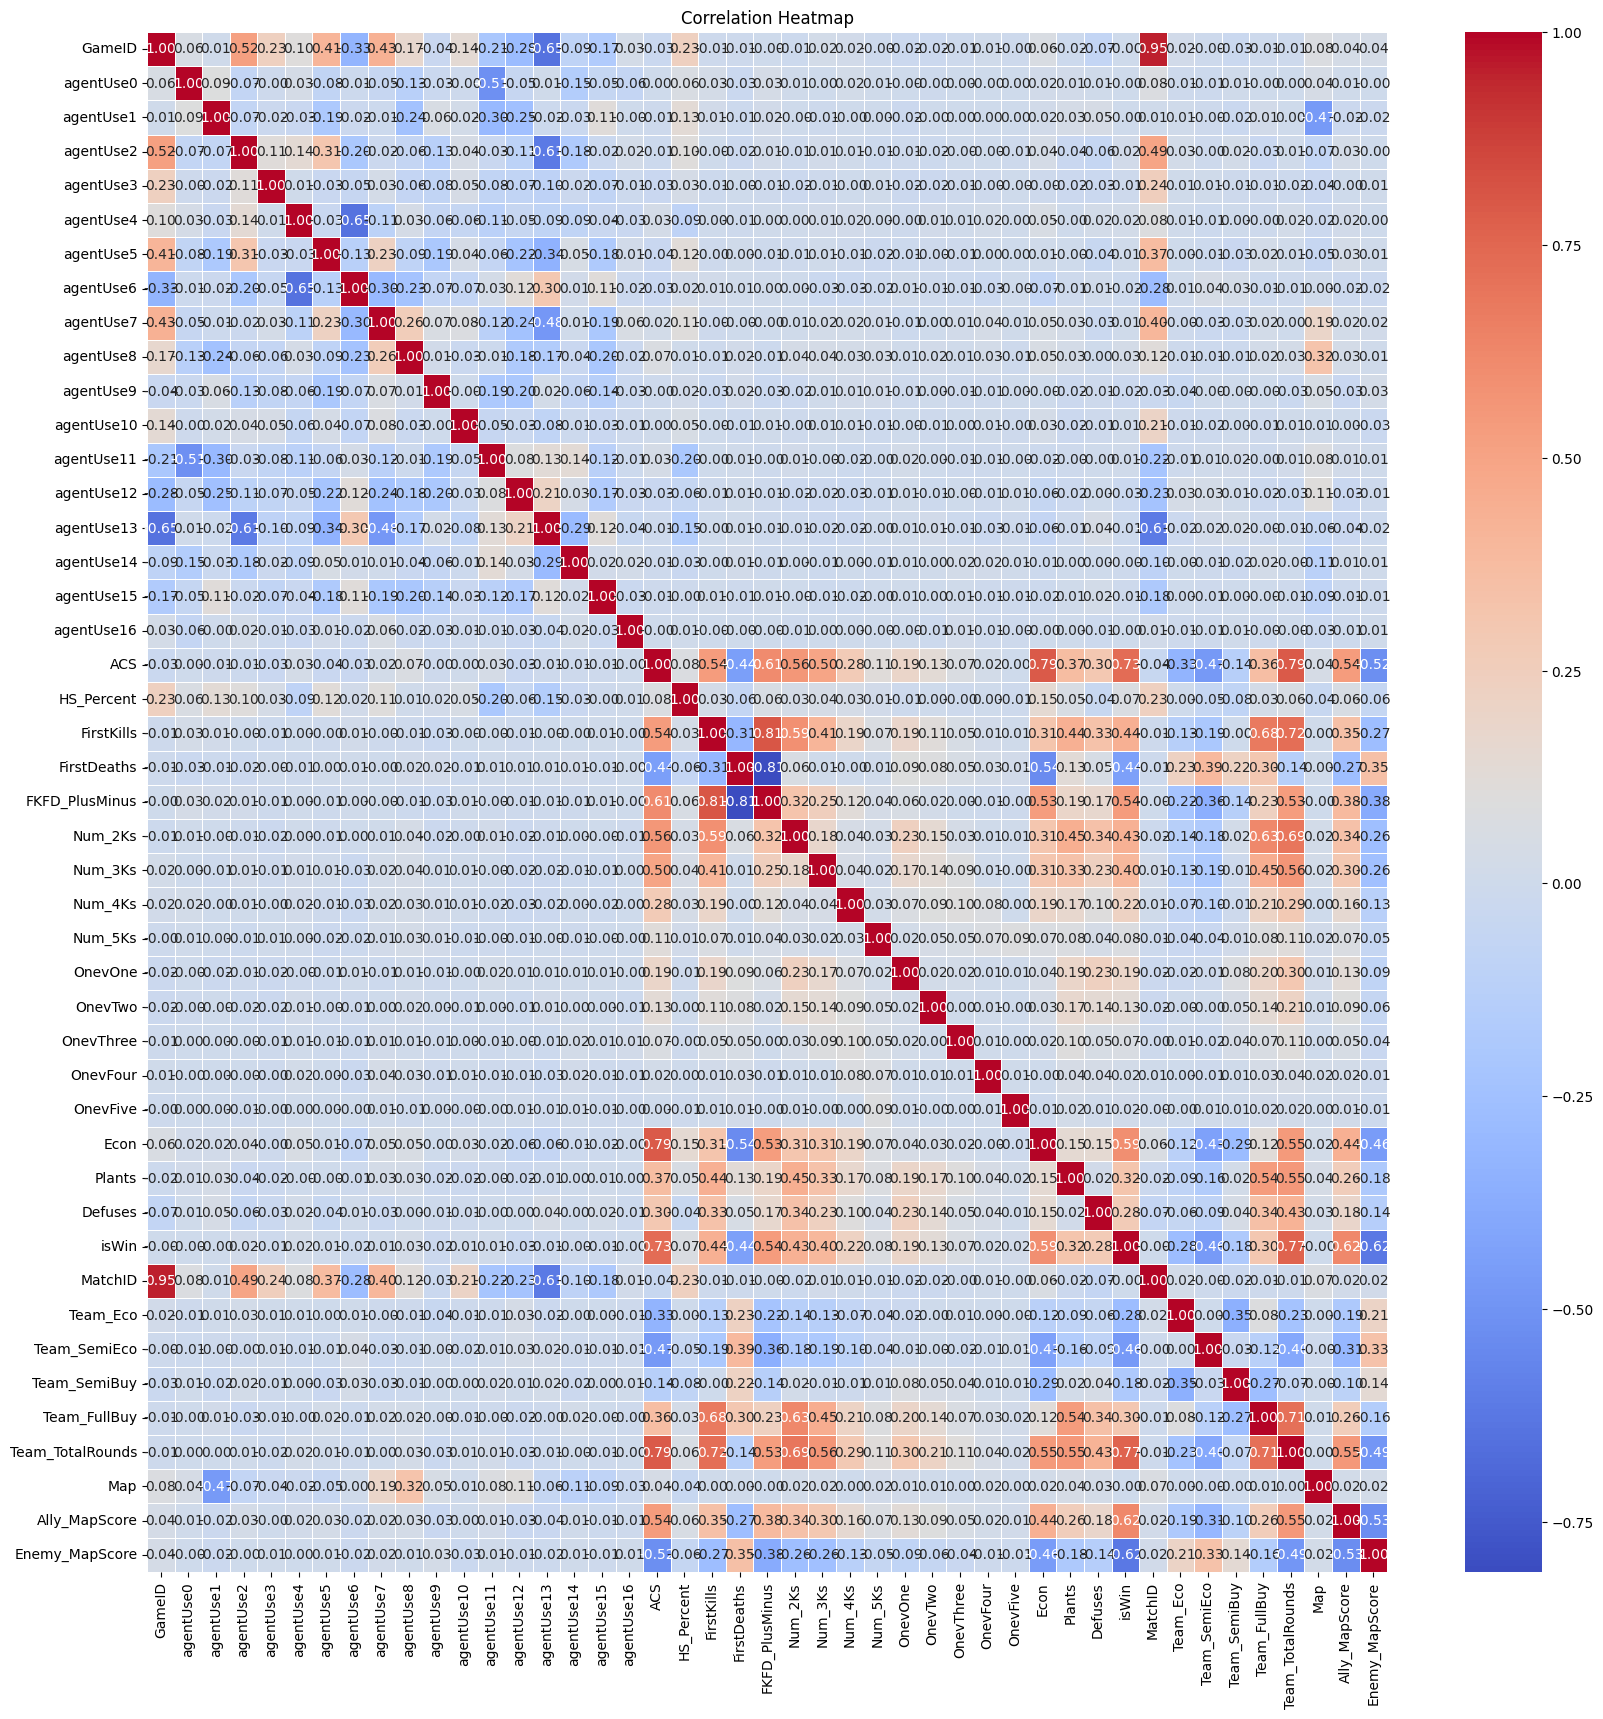

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_scores_by_game_final.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df_scores_by_game_final = df_scores_by_game_final.drop(['agentUse{}'.format(i) for i in range(NUMBER_OF_AGENTS)], axis=1)

In [ ]:
print('Maksimal Outlier: ' + str(2670 / len(df_scores_by_game_final)))

Maksimal Outlier: 0.12332563510392609


## Pengecekan Outlier

In [ ]:
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers
check_outlier(df_scores_by_game_final)

Outlier pada tiap atribut:
GameID                 0
ACS                  232
HS_Percent           197
FirstKills           430
FirstDeaths          429
FKFD_PlusMinus         2
Num_2Ks               92
Num_3Ks              487
Num_4Ks             1274
Num_5Ks             2103
OnevOne                8
OnevTwo              333
OnevThree           2670
OnevFour             522
OnevFive              58
Econ                 640
Plants                11
Defuses              174
isWin                  0
MatchID              212
Team_Eco             529
Team_SemiEco         969
Team_SemiBuy          77
Team_FullBuy         327
Team_TotalRounds     109
Map                    0
Ally_MapScore          0
Enemy_MapScore         0
dtype: int64


GameID    ACS  HS_Percent  FirstKills  FirstDeaths  FKFD_PlusMinus  \
0       False  False       False       False        False           False   
1       False  False       False       False        False           False   
2       False  False       False       False        False           False   
3       False  False       False       False        False           False   
4       False  False       False       False        False           False   
...       ...    ...         ...         ...          ...             ...   
21645   False  False       False       False        False           False   
21646   False  False       False       False        False           False   
21647   False  False       False       False        False           False   
21648   False  False       False       False        False           False   
21649   False   True       False        True        False           False   

       Num_2Ks  Num_3Ks  Num_4Ks  Num_5Ks  ...  isWin  MatchID  Team_Eco  \
0        False    False    False    False  ...  False     True     False   
1        False    False    False    False  ...  False     True     False   
2        False    False    False    False  ...  False     True     False   
3        False    False    False    False  ...  False     True     False   
4        False    False    False    False  ...  False     True     False   
...        ...      ...      ...      ...  ...    ...      ...       ...   
21645    False    False    False     True  ...  False    False     False   
21646    False    False    False    False  ...  False    False     False   
21647    False    False    False    False  ...  False    False     False   
21648    False    False    False    False  ...  False    False     False   
21649    False    False    False    False  ...  False    False     False   

       Team_SemiEco  Team_SemiBuy  Team_FullBuy  Team_TotalRounds    Map  \
0             False         False         False             False  False   
1             False         False         False             False  False   
2             False         False         False             False  False   
3             False         False         False             False  False   
4             False         False         False             False  False   
...             ...           ...           ...               ...    ...   
21645         False         False         False             False  False   
21646         False         False         False             False  False   
21647         False         False         False             False  False   
21648         False         False         False             False  False   
21649         False         False         False             False  False   

       Ally_MapScore  Enemy_MapScore  
0              False           False  
1              False           False  
2              False           False  
3              False           False  
4              False           False  
...              ...             ...  
21645          False           False  
21646          False           False  
21647          False           False  
21648          False           False  
21649          False           False  

[21650 rows x 28 columns]

## Pemisahan Feature dan Label

In [ ]:
X = df_scores_by_game_final.drop(['ACS', 'GameID', 'MatchID'], axis=1)
y = df_scores_by_game_final['ACS']

## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = X.columns
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=cols)
X_scaled

HS_Percent  FirstKills  FirstDeaths  FKFD_PlusMinus   Num_2Ks  \
0       -0.114172    1.152606    -1.337676    1.540270e+00 -0.680190   
1        1.188408   -1.649002    -0.092551   -9.626688e-01 -1.572843   
2        1.951989   -0.092553     0.218731   -1.925338e-01  0.658791   
3        2.311321   -0.092553    -0.092551    2.022037e-17 -0.680190   
4       -0.653171    0.841316    -1.026395    1.155203e+00  0.881954   
...           ...         ...          ...             ...       ...   
21645   -0.743004   -0.715133     0.841294   -9.626688e-01  0.212464   
21646   -0.922670   -1.026422     0.218731   -7.701351e-01 -1.126517   
21647    0.245160   -1.026422     0.841294   -1.155203e+00  0.212464   
21648   -0.608254   -0.092553    -0.715113    3.850675e-01 -0.903353   
21649   -1.012503   -2.582871     0.841294   -2.117871e+00 -2.019170   

        Num_3Ks   Num_4Ks   Num_5Ks   OnevOne   OnevTwo  ...   Defuses  isWin  \
0      0.930699  1.225038 -0.319022  1.961933 -0.706802  ... -1.330247    1.0   
1     -0.490625 -0.904907 -0.319022 -0.999019 -0.706802  ... -0.685132   -1.0   
2     -0.490625  0.160066 -0.319022  1.961933 -0.706802  ...  1.250211    1.0   
3     -0.016850 -0.904907 -0.319022 -0.999019 -0.706802  ... -0.040018   -1.0   
4     -0.490625  1.225038 -0.319022 -0.999019 -0.706802  ... -0.040018    1.0   
...         ...       ...       ...       ...       ...  ...       ...    ...   
21645 -0.490625 -0.904907  2.787962 -0.012035  0.685325  ... -0.040018   -1.0   
21646 -1.438175 -0.904907 -0.319022 -0.999019  0.685325  ... -0.685132   -1.0   
21647 -0.490625 -0.904907 -0.319022 -0.012035 -0.706802  ... -0.685132   -1.0   
21648 -0.016850  0.160066 -0.319022 -0.999019  0.685325  ... -0.040018   -1.0   
21649 -1.438175 -0.904907 -0.319022 -0.012035 -0.706802  ... -0.040018   -1.0   

       Team_Eco  Team_SemiEco  Team_SemiBuy  Team_FullBuy  Team_TotalRounds  \
0     -1.183027     -1.308870      0.319144      0.327503          0.716192   
1      0.034820      1.296674      0.319144     -2.079028         -2.205926   
2     -1.183027      0.428160      0.319144      0.060111          0.716192   
3      0.034820      0.428160     -1.175225      0.327503         -0.877691   
4      0.034820     -1.308870     -0.178979      0.327503          0.716192   
...         ...           ...           ...           ...               ...   
21645  1.252667      1.296674     -2.171470      0.594895         -0.612044   
21646  0.034820     -0.440355     -0.178979     -0.474674         -1.408985   
21647  0.034820     -0.440355      0.319144     -0.207282         -0.877691   
21648  1.252667     -0.440355     -0.178979     -0.742066         -1.408985   
21649  0.034820      1.296674      0.319144     -2.079028         -2.205926   

            Map  Ally_MapScore  Enemy_MapScore  
0     -0.330959       0.905389       -0.253513  
1     -0.775784       0.905389       -0.253513  
2      0.558693       0.905389       -0.253513  
3     -0.330959       0.905389       -0.253513  
4     -0.775784       0.905389       -0.253513  
...         ...            ...             ...  
21645 -1.220610      -1.412415       -0.253513  
21646  0.558693      -1.412415       -0.253513  
21647  0.558693      -1.412415       -0.253513  
21648  1.448344      -1.412415       -0.253513  
21649 -0.775784      -1.412415       -0.253513  

[21650 rows x 25 columns]

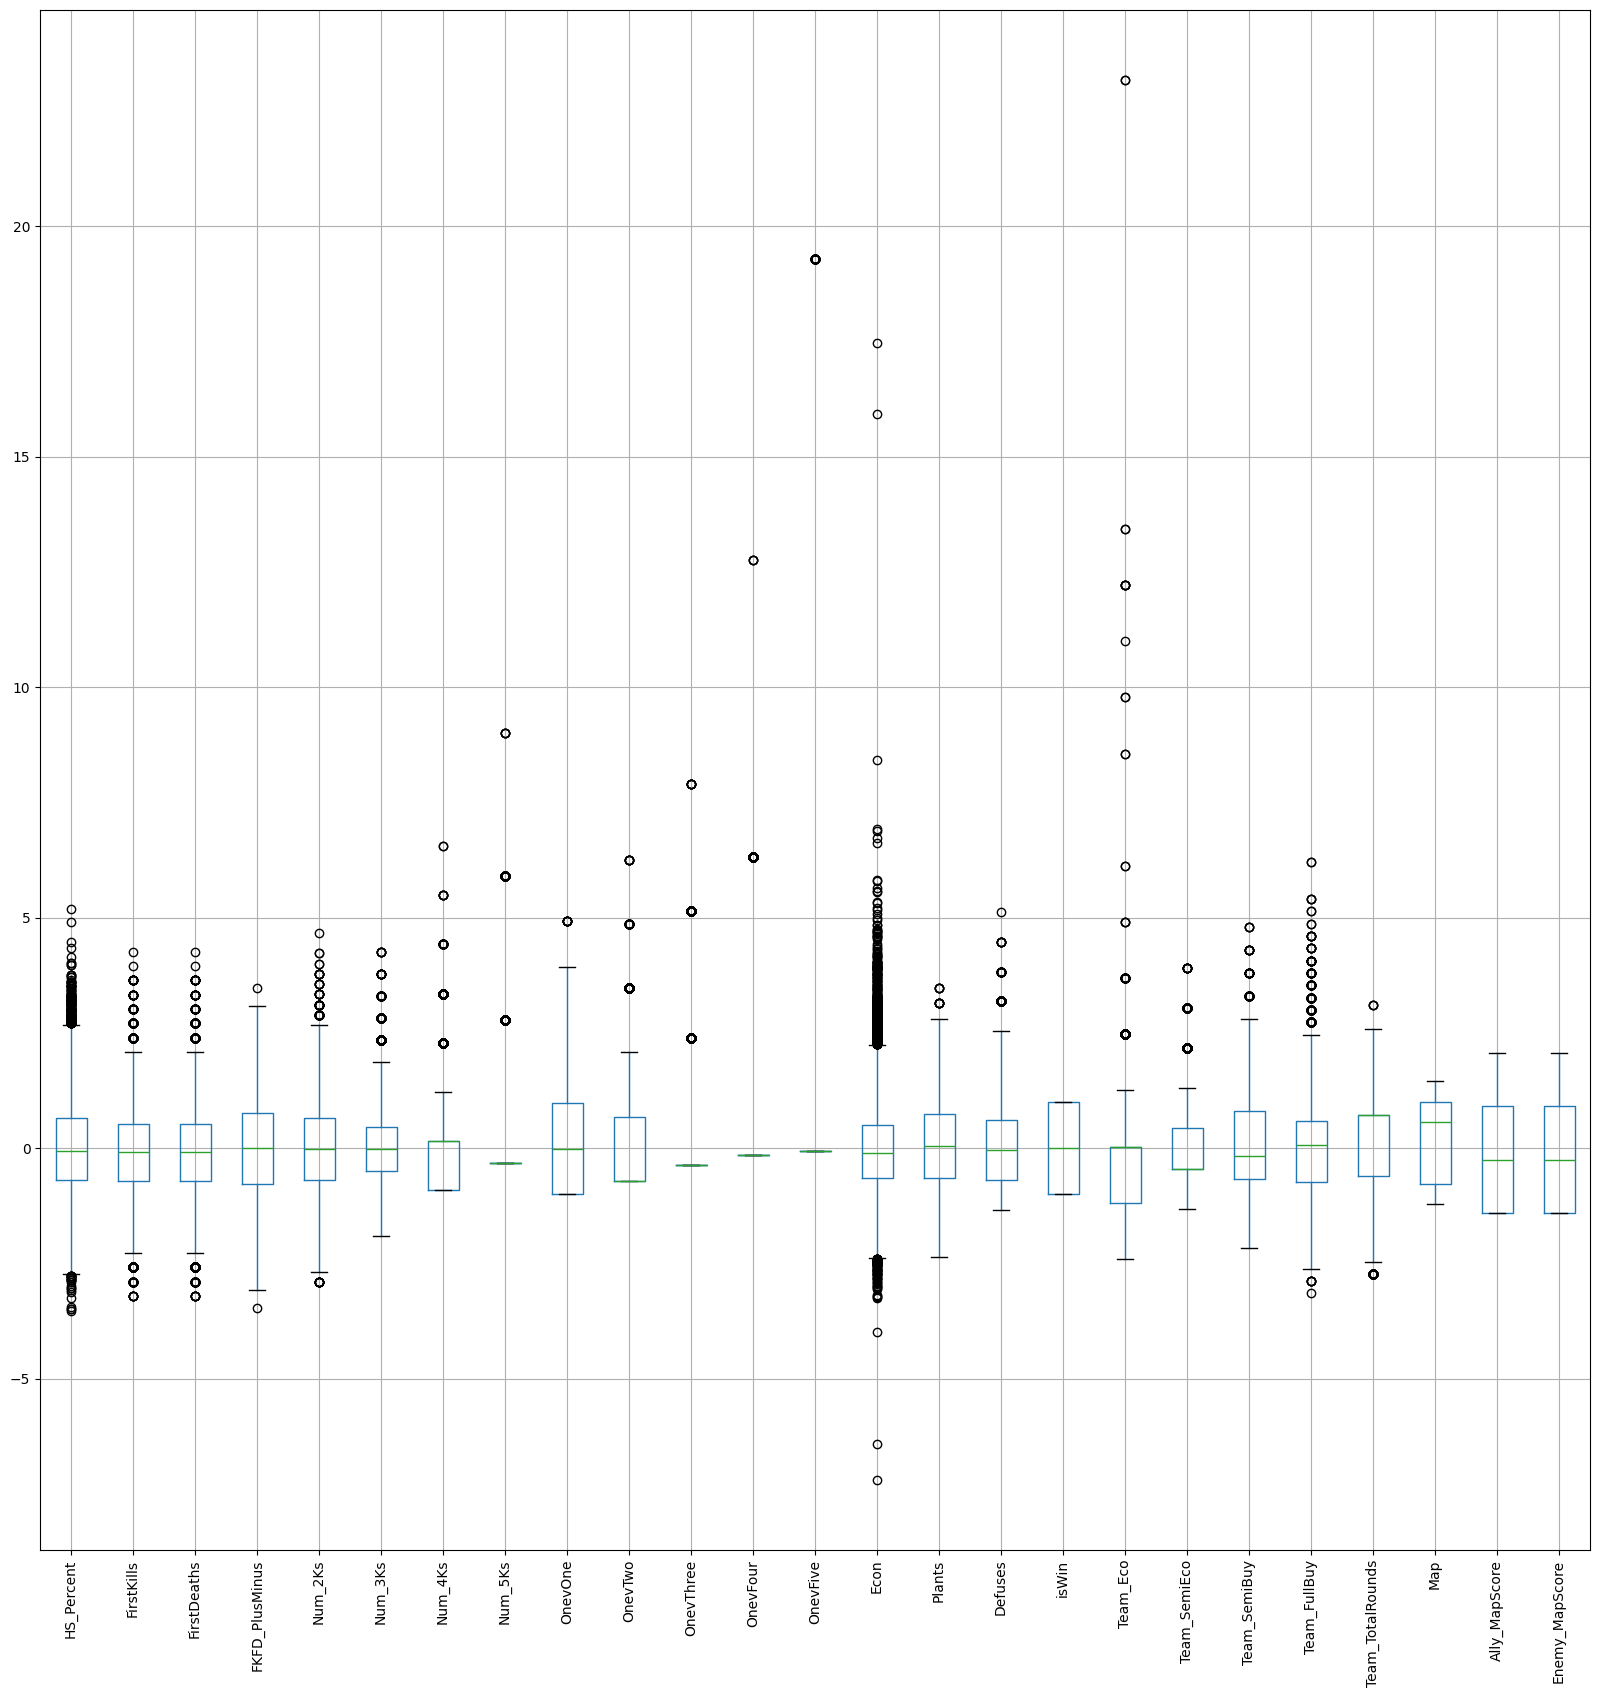

In [ ]:
plt.figure(figsize=(20,20))
X_scaled.boxplot(rot=90)
plt.show()

### Feature Selection dengan Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_scaled, y)

Lasso(alpha=0.1)

In [ ]:
lasso.coef_

array([-0.60425399,  0.        , -0.        ,  2.37592618,  8.85765389,
        6.54009886,  3.759844  ,  1.44232058,  0.75203873,  0.30310924,
        0.18224634, -0.        , -0.        ,  8.80927234,  1.03457351,
        0.87432603, -1.94888733, -4.71558138, -3.77007099, -5.02723428,
       -8.64950782,  8.12413284,  0.54846407,  0.45075659, -0.        ])

In [ ]:
is_chosen = lasso.coef_ != 0
is_chosen

array([ True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False])

In [ ]:
features = X.columns
chosen_features = []
for i in range(len(features)):
    if is_chosen[i]:
        chosen_features.append(features[i])
chosen_features

['HS_Percent',
 'FKFD_PlusMinus',
 'Num_2Ks',
 'Num_3Ks',
 'Num_4Ks',
 'Num_5Ks',
 'OnevOne',
 'OnevTwo',
 'OnevThree',
 'Econ',
 'Plants',
 'Defuses',
 'isWin',
 'Team_Eco',
 'Team_SemiEco',
 'Team_SemiBuy',
 'Team_FullBuy',
 'Team_TotalRounds',
 'Map',
 'Ally_MapScore']

In [ ]:
X_selected = X_scaled[chosen_features]
X_selected

HS_Percent  FKFD_PlusMinus   Num_2Ks   Num_3Ks   Num_4Ks   Num_5Ks  \
0       -0.114172    1.540270e+00 -0.680190  0.930699  1.225038 -0.319022   
1        1.188408   -9.626688e-01 -1.572843 -0.490625 -0.904907 -0.319022   
2        1.951989   -1.925338e-01  0.658791 -0.490625  0.160066 -0.319022   
3        2.311321    2.022037e-17 -0.680190 -0.016850 -0.904907 -0.319022   
4       -0.653171    1.155203e+00  0.881954 -0.490625  1.225038 -0.319022   
...           ...             ...       ...       ...       ...       ...   
21645   -0.743004   -9.626688e-01  0.212464 -0.490625 -0.904907  2.787962   
21646   -0.922670   -7.701351e-01 -1.126517 -1.438175 -0.904907 -0.319022   
21647    0.245160   -1.155203e+00  0.212464 -0.490625 -0.904907 -0.319022   
21648   -0.608254    3.850675e-01 -0.903353 -0.016850  0.160066 -0.319022   
21649   -1.012503   -2.117871e+00 -2.019170 -1.438175 -0.904907 -0.319022   

        OnevOne   OnevTwo  OnevThree      Econ    Plants   Defuses  isWin  \
0      1.961933 -0.706802  -0.362756 -0.008467 -0.635877 -1.330247    1.0   
1     -0.999019 -0.706802  -0.362756 -1.192822 -2.352301 -0.685132   -1.0   
2      1.961933 -0.706802   2.390021  0.413083  1.080546  1.250211    1.0   
3     -0.999019 -0.706802   2.390021 -0.289501 -0.979162 -0.040018   -1.0   
4     -0.999019 -0.706802  -0.362756  0.393009  0.737261 -0.040018    1.0   
...         ...       ...        ...       ...       ...       ...    ...   
21645 -0.012035  0.685325  -0.362756 -0.108836 -0.635877 -0.040018   -1.0   
21646 -0.999019  0.685325  -0.362756 -1.433708 -0.292593 -0.685132   -1.0   
21647 -0.012035 -0.706802  -0.362756 -0.590608 -0.635877 -0.685132   -1.0   
21648 -0.999019  0.685325  -0.362756  0.172197 -1.322447 -0.040018   -1.0   
21649 -0.012035 -0.706802  -0.362756 -2.156365 -2.009016 -0.040018   -1.0   

       Team_Eco  Team_SemiEco  Team_SemiBuy  Team_FullBuy  Team_TotalRounds  \
0     -1.183027     -1.308870      0.319144      0.327503          0.716192   
1      0.034820      1.296674      0.319144     -2.079028         -2.205926   
2     -1.183027      0.428160      0.319144      0.060111          0.716192   
3      0.034820      0.428160     -1.175225      0.327503         -0.877691   
4      0.034820     -1.308870     -0.178979      0.327503          0.716192   
...         ...           ...           ...           ...               ...   
21645  1.252667      1.296674     -2.171470      0.594895         -0.612044   
21646  0.034820     -0.440355     -0.178979     -0.474674         -1.408985   
21647  0.034820     -0.440355      0.319144     -0.207282         -0.877691   
21648  1.252667     -0.440355     -0.178979     -0.742066         -1.408985   
21649  0.034820      1.296674      0.319144     -2.079028         -2.205926   

            Map  Ally_MapScore  
0     -0.330959       0.905389  
1     -0.775784       0.905389  
2      0.558693       0.905389  
3     -0.330959       0.905389  
4     -0.775784       0.905389  
...         ...            ...  
21645 -1.220610      -1.412415  
21646  0.558693      -1.412415  
21647  0.558693      -1.412415  
21648  1.448344      -1.412415  
21649 -0.775784      -1.412415  

[21650 rows x 20 columns]

## Train-Test Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

## Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = linear_reg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-models-c91c65d73af
def regression_metrics(prediction, y_test):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [ ]:
regression_metrics(y_pred, y_test)

MAE: 6.862057808870936
MSE: 84.8481309025465
RMSE: 9.211304516872
R_squared: 0.8933253360235072


In [ ]:
from sklearn.model_selection import cross_val_score

r2_scores = cross_val_score(linear_reg, X_train, y_train, cv=5, scoring='r2')
r2_scores

array([0.89448587, 0.90494207, 0.90293668, 0.89472506, 0.87315085])

## Ridge Regression Model

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.1)

In [ ]:
y_pred = ridge_reg.predict(X_test)

In [ ]:
regression_metrics(y_pred, y_test)

MAE: 6.862046797764005
MSE: 84.84770016528275
RMSE: 9.211281135937755
R_squared: 0.8933258775646393


In [ ]:
r2_scores = cross_val_score(ridge_reg, X_train, y_train, cv=5, scoring='r2')
r2_scores

array([0.8944864 , 0.90494228, 0.90293721, 0.89472625, 0.87314896])

### Pencarian `alpha` Terbaik

In [ ]:
alpha_list = [0.01, 0.1, 1, 4, 7, 10, 15, 20, 50, 70, 100, 110, 113, 115, 120, 125]

In [ ]:
ridges = []
for alpha in alpha_list:
    cur_ridge = Ridge(alpha=alpha)
    cur_ridge.fit(X_train, y_train)
    ridges.append(cur_ridge)

In [ ]:
for ridge in ridges:
    cur_y_pred = ridge.predict(X_test)
    regression_metrics(cur_y_pred, y_test)
    print('='*32)

MAE: 6.8620567076609955
MSE: 84.84808780526609
RMSE: 9.211302177502706
R_squared: 0.8933253902072334
MAE: 6.862046797764005
MSE: 84.84770016528275
RMSE: 9.211281135937755
R_squared: 0.8933258775646393
MAE: 6.86194904720038
MSE: 84.84384703389412
RMSE: 9.211071980713978
R_squared: 0.8933307218846234
MAE: 6.861631962063492
MSE: 84.83130619660403
RMSE: 9.210391207576583
R_squared: 0.893346488756441
MAE: 6.861326983726402
MSE: 84.81922455655766
RMSE: 9.209735314142184
R_squared: 0.8933616783060341
MAE: 6.861041548639798
MSE: 84.80759333948912
RMSE: 9.209103829335898
R_squared: 0.8933763015647815
MAE: 6.860638856959708
MSE: 84.78918571149708
RMSE: 9.208104349511743
R_squared: 0.8933994444143619
MAE: 6.86027804289356
MSE: 84.77196698952251
RMSE: 9.20716932555943
R_squared: 0.8934210925209402
MAE: 6.85883602513189
MSE: 84.69163620552744
RMSE: 9.202805887637066
R_squared: 0.893522087785049
MAE: 6.858547483786095
MSE: 84.65763824155978
RMSE: 9.20095855014899
R_squared: 0.8935648314653583
MAE: 6

In [ ]:
best_ridge = ridges[-3]

In [ ]:
r2_scores = cross_val_score(best_ridge, X_train, y_train, cv=5, scoring='r2')
r2_scores

array([0.8946421 , 0.90477085, 0.90305163, 0.8953282 , 0.87104322])

## Lasso Regression Model

In [ ]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
y_pred = lasso_reg.predict(X_test)

In [ ]:
regression_metrics(y_pred, y_test)

MAE: 6.87125824938441
MSE: 85.03980472429741
RMSE: 9.221702918891793
R_squared: 0.8930843555763144


In [ ]:
r2_scores = cross_val_score(lasso_reg, X_train, y_train, cv=5, scoring='r2')
r2_scores

array([0.89432503, 0.90426717, 0.90295428, 0.89361525, 0.86832898])

### Pencarian `alpha` Terbaik

In [ ]:
alpha_list = [0.01, 0.1, 1, 4, 7]

In [ ]:
lassos = []
for alpha in alpha_list:
    cur_lasso = Lasso(alpha=alpha)
    cur_lasso.fit(X_train, y_train)
    lassos.append(cur_lasso)

In [ ]:
for lasso in lassos:
    cur_y_pred = lasso.predict(X_test)
    regression_metrics(cur_y_pred, y_test)
    print('='*32)

MAE: 6.859215620013394
MSE: 84.78096377804202
RMSE: 9.20765788776071
R_squared: 0.8934097813773478
MAE: 6.87125824938441
MSE: 85.03980472429741
RMSE: 9.221702918891793
R_squared: 0.8930843555763144
MAE: 7.782079879283486
MSE: 108.69618682812691
RMSE: 10.425746343937536
R_squared: 0.8633425500116877
MAE: 9.445201433640502
MSE: 163.90927463024536
RMSE: 12.80270575426325
R_squared: 0.7939263174353869
MAE: 11.043654901609651
MSE: 220.13082226908082
RMSE: 14.836806336576643
R_squared: 0.7232422064382976


In [ ]:
best_lasso = lassos[0]

In [ ]:
r2_scores = cross_val_score(best_lasso, X_train, y_train, cv=5, scoring='r2')
r2_scores

array([0.89457991, 0.90498676, 0.90305012, 0.89472195, 0.87278221])

## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = forest_reg.predict(X_test)

In [ ]:
regression_metrics(y_pred, y_test)

MAE: 6.630925635103925
MSE: 77.08782640554271
RMSE: 8.779967335106818
R_squared: 0.9030819195306201


In [ ]:
r2_scores = cross_val_score(forest_reg, X_train, y_train, cv=5, scoring='r2')
r2_scores

array([0.90205535, 0.90416712, 0.90026365, 0.88464871, 0.90248506])

## Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(
    alpha=1e-5,
    hidden_layer_sizes=(100,),
    solver='adam',
    random_state=42
)

mlp_reg.fit(X_train, y_train)

d:\Study\semester-5\kasdd\tk\tk-kasdad\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=1e-05, random_state=42)

In [ ]:
y_pred = mlp_reg.predict(X_test)

In [ ]:
regression_metrics(y_pred, y_test)

MAE: 6.104463337853926
MSE: 63.852451341669116
RMSE: 7.99077288762915
R_squared: 0.9197219936550955


In [ ]:
r2_scores = cross_val_score(mlp_reg, X_train, y_train, cv=5, scoring='r2')
r2_scores

d:\Study\semester-5\kasdd\tk\tk-kasdad\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Study\semester-5\kasdd\tk\tk-kasdad\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Study\semester-5\kasdd\tk\tk-kasdad\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Study\semester-5\kasdd\tk\tk-kasdad\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.wa

array([0.91391165, 0.91287426, 0.91593741, 0.92054425, 0.90644724])

### Hyperparameter Tuning on MLP Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [[100], [100, 160], [110, 50]],
    'activation': ['relu', 'identity', 'logistic', 'tanh'],
    'alpha': [1e-5, 1e-3],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

mlp_reg_tuning = MLPRegressor(random_state=42)
mlp_reg_search = GridSearchCV(mlp_reg_tuning, param_grid, n_jobs=-1, cv=5, scoring='r2')
mlp_reg_search.fit(X_train, y_train)

d:\Study\semester-5\kasdd\tk\tk-kasdad\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPRegressor(random_state=42), n_jobs=-1,
             param_grid={'activation': ['relu', 'identity', 'logistic', 'tanh'],
                         'alpha': [1e-05, 0.001],
                         'hidden_layer_sizes': [[100], [100, 160], [110, 50]],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive']},
             scoring='r2')

In [ ]:
mlp_reg_search.best_params_

{'activation': 'tanh',
 'alpha': 0.001,
 'hidden_layer_sizes': [100],
 'learning_rate': 'constant'}

Setelah melakukan tuning, didapat bahwa hyperparameter terbaik adalah `{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': [100], 'learning_rate': 'constant'}`.

In [ ]:
mlp_reg_tuned = MLPRegressor(
    alpha=0.001,
    activation='tanh',
    hidden_layer_sizes=[100],
    learning_rate='constant',
    random_state=42
)

mlp_reg_tuned.fit(X_train, y_train)

d:\Study\semester-5\kasdd\tk\tk-kasdad\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='tanh', alpha=0.001, hidden_layer_sizes=[100],
             random_state=42)

In [ ]:
y_pred = mlp_reg_tuned.predict(X_test)

In [ ]:
regression_metrics(y_pred, y_test)

MAE: 5.982645920777098
MSE: 60.5246074134032
RMSE: 7.779756256683316
R_squared: 0.9239058999950208


In [ ]:
r2_scores = cross_val_score(mlp_reg_tuned, X_train, y_train, cv=5, scoring='r2')
r2_scores

d:\Study\semester-5\kasdd\tk\tk-kasdad\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Study\semester-5\kasdd\tk\tk-kasdad\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Study\semester-5\kasdd\tk\tk-kasdad\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Study\semester-5\kasdd\tk\tk-kasdad\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.wa

array([0.91799415, 0.92739537, 0.92117257, 0.92499411, 0.92366563])

## Pemilihan Model
Karena dari semua model yang paling bagus berdasarkan R-squared pada cross validation adalah MLP Regressor hasil tuning, maka kita pilih model tersebut.

In [ ]:
regression_model = mlp_reg_tuned

## Kaggle Dataset

In [ ]:
df_games = pd.read_csv('../dataset_test/games_test.csv')
df_scores = pd.read_csv('../dataset_test/scores_test.csv')
df_matches = pd.read_csv('../dataset_test/matches_test.csv')

In [ ]:
df_scores

No  GameID  PlayerID PlayerName  TeamAbbreviation  Kills  Deaths  \
0         100   60918    6416.0     jcrueL  Salt and Vinegar   16.0    16.0   
1         101   60918    3980.0   Governor  Salt and Vinegar   14.0    16.0   
2         102   60918    1129.0      Rossy  Salt and Vinegar   18.0    12.0   
3         103   60918    3880.0       bang  Salt and Vinegar   15.0    13.0   
4         104   60918     733.0    stellar  Salt and Vinegar   14.0    13.0   
...       ...     ...       ...        ...               ...    ...     ...   
29155  146715    2298    1359.0   HulkzteN            clowns    9.0    16.0   
29156  146716    2298    1360.0     m6mzel            clowns   10.0    16.0   
29157  146717    2298    1358.0      tul1p            clowns    9.0    14.0   
29158  146718    2298    1362.0     toffij            clowns    8.0    12.0   
29159  146719    2298    1361.0  Yakotashi            clowns    7.0    16.0   

       Assists  PlusMinus  KAST_Percent  ...  Num_4Ks  Num_5Ks  OnevOne  \
0          7.0        0.0          0.75  ...      0.0      0.0      0.0   
1          9.0       -2.0          0.80  ...      0.0      0.0      0.0   
2         10.0        6.0          0.75  ...      0.0      0.0      0.0   
3         10.0        2.0          0.75  ...      0.0      0.0      0.0   
4          3.0        1.0          0.80  ...      0.0      0.0      1.0   
...        ...        ...           ...  ...      ...      ...      ...   
29155      1.0       -7.0           NaN  ...      0.0      0.0      0.0   
29156      2.0       -6.0           NaN  ...      0.0      0.0      0.0   
29157      3.0       -5.0           NaN  ...      0.0      0.0      0.0   
29158      6.0       -4.0           NaN  ...      0.0      0.0      0.0   
29159      2.0       -9.0           NaN  ...      0.0      0.0      0.0   

       OnevTwo  OnevThree  OnevFour  OnevFive  Econ  Plants  Defuses  
0          0.0        0.0       0.0       0.0  59.0     1.0      0.0  
1          0.0        0.0       0.0       0.0  55.0     3.0      0.0  
2          1.0        1.0       0.0       0.0  63.0     4.0      0.0  
3          0.0        0.0       0.0       0.0  53.0     1.0      1.0  
4          0.0        0.0       0.0       0.0  48.0     1.0      1.0  
...        ...        ...       ...       ...   ...     ...      ...  
29155      0.0        0.0       0.0       0.0  44.0     1.0      0.0  
29156      0.0        0.0       0.0       0.0  43.0     0.0      0.0  
29157      0.0        0.0       0.0       0.0  38.0     0.0      0.0  
29158      0.0        0.0       0.0       0.0  43.0     3.0      0.0  
29159      0.0        0.0       0.0       0.0  24.0     1.0      0.0  

[29160 rows x 27 columns]

In [ ]:
df_scores_team = [
    df_scores[df_scores.index % 10 < 5],
    df_scores[df_scores.index % 10 >= 5]
]
df_scores_team[0]

No  GameID  PlayerID PlayerName  TeamAbbreviation  Kills  Deaths  \
0         100   60918    6416.0     jcrueL  Salt and Vinegar   16.0    16.0   
1         101   60918    3980.0   Governor  Salt and Vinegar   14.0    16.0   
2         102   60918    1129.0      Rossy  Salt and Vinegar   18.0    12.0   
3         103   60918    3880.0       bang  Salt and Vinegar   15.0    13.0   
4         104   60918     733.0    stellar  Salt and Vinegar   14.0    13.0   
...       ...     ...       ...        ...               ...    ...     ...   
29150  146710    2298    2085.0   GillianH         GoodVibes   24.0     7.0   
29151  146711    2298    2088.0       fxy0         GoodVibes   17.0     9.0   
29152  146712    2298    2086.0      maouu         GoodVibes   13.0    12.0   
29153  146713    2298     116.0  PetitSkel         GoodVibes   14.0     7.0   
29154  146714    2298    2087.0      HaRts         GoodVibes    6.0     8.0   

       Assists  PlusMinus  KAST_Percent  ...  Num_4Ks  Num_5Ks  OnevOne  \
0          7.0        0.0          0.75  ...      0.0      0.0      0.0   
1          9.0       -2.0          0.80  ...      0.0      0.0      0.0   
2         10.0        6.0          0.75  ...      0.0      0.0      0.0   
3         10.0        2.0          0.75  ...      0.0      0.0      0.0   
4          3.0        1.0          0.80  ...      0.0      0.0      1.0   
...        ...        ...           ...  ...      ...      ...      ...   
29150      0.0       17.0           NaN  ...      2.0      0.0      0.0   
29151      3.0        8.0           NaN  ...      0.0      0.0      0.0   
29152      4.0        1.0           NaN  ...      0.0      0.0      1.0   
29153      5.0        7.0           NaN  ...      0.0      0.0      0.0   
29154      9.0       -2.0           NaN  ...      0.0      0.0      0.0   

       OnevTwo  OnevThree  OnevFour  OnevFive   Econ  Plants  Defuses  
0          0.0        0.0       0.0       0.0   59.0     1.0      0.0  
1          0.0        0.0       0.0       0.0   55.0     3.0      0.0  
2          1.0        1.0       0.0       0.0   63.0     4.0      0.0  
3          0.0        0.0       0.0       0.0   53.0     1.0      1.0  
4          0.0        0.0       0.0       0.0   48.0     1.0      1.0  
...        ...        ...       ...       ...    ...     ...      ...  
29150      0.0        0.0       0.0       0.0  125.0     2.0      1.0  
29151      0.0        0.0       0.0       0.0   70.0     0.0      0.0  
29152      0.0        0.0       0.0       0.0   62.0     1.0      0.0  
29153      0.0        0.0       0.0       0.0   63.0     0.0      0.0  
29154      0.0        0.0       0.0       0.0   41.0     1.0      0.0  

[14580 rows x 27 columns]

In [ ]:
df_scores_by_game = [
    df_scores[['GameID']].drop_duplicates().reset_index().drop('index', axis=1),
    df_scores[['GameID']].drop_duplicates().reset_index().drop('index', axis=1),
]
df_scores_by_game[0]

GameID
0      60918
1      60919
2      60900
3      60901
4      60902
...      ...
2911    2444
2912    2445
2913    2446
2914    2306
2915    2298

[2916 rows x 1 columns]

In [ ]:
avg_columns.remove('ACS')

In [ ]:
df_avg_scores = [
    df_scores_team[0][['GameID'] + avg_columns].groupby('GameID').mean().reset_index(),
    df_scores_team[1][['GameID'] + avg_columns].groupby('GameID').mean().reset_index(),
]
df_avg_scores[0]

GameID  HS_Percent  FirstKills  FirstDeaths  FKFD_PlusMinus  Num_2Ks  \
0       2298        20.8         2.8          0.6             2.2      3.4   
1       2306        25.4         2.6          1.4             1.2      4.0   
2       2444        21.0         1.2          2.4            -1.2      1.2   
3       2445        16.2         2.0          2.6            -0.6      3.6   
4       2446        18.8         2.6          1.2             1.4      3.2   
...      ...         ...         ...          ...             ...      ...   
2911   60902        24.4         3.2          0.6             2.6      3.0   
2912   60915        23.4         2.2          1.0             1.2      3.4   
2913   60916        35.4         2.0          1.0             1.0      1.6   
2914   60918        27.2         2.0          2.0             0.0      2.0   
2915   60919        31.6         2.8          2.4             0.4      2.4   

      Num_3Ks  Num_4Ks  Num_5Ks  OnevOne  OnevTwo  OnevThree  OnevFour  \
0         0.6      0.4      0.0      0.2      0.0        0.0       0.0   
1         0.6      0.6      0.0      0.0      0.0        0.0       0.0   
2         0.4      0.0      0.0      0.0      0.2        0.0       0.0   
3         0.8      0.0      0.0      0.6      0.2        0.0       0.0   
4         0.8      0.0      0.0      0.4      0.0        0.0       0.0   
...       ...      ...      ...      ...      ...        ...       ...   
2911      1.0      0.0      0.0      0.2      0.0        0.0       0.0   
2912      0.8      0.0      0.0      0.0      0.0        0.0       0.0   
2913      1.6      0.4      0.0      0.2      0.2        0.0       0.0   
2914      1.2      0.0      0.0      0.2      0.2        0.2       0.0   
2915      0.8      0.4      0.0      0.4      0.4        0.0       0.0   

      OnevFive  Econ  Plants  Defuses  
0          0.0  72.2     0.8      0.2  
1          0.0  60.6     1.4      0.6  
2          0.0  45.2     0.6      0.2  
3          0.0  47.8     1.2      0.8  
4          0.0  61.4     1.0      0.4  
...        ...   ...     ...      ...  
2911       0.0  69.4     1.2      0.4  
2912       0.0  68.4     0.6      1.0  
2913       0.0  74.0     2.4      0.4  
2914       0.0  55.6     2.0      0.4  
2915       0.0  49.6     2.6      0.4  

[2916 rows x 17 columns]

In [ ]:
df_scores_by_game[0] = df_scores_by_game[0].merge(df_avg_scores[0], left_on='GameID', right_on='GameID')
df_scores_by_game[1] = df_scores_by_game[1].merge(df_avg_scores[1], left_on='GameID', right_on='GameID')
df_scores_by_game[0]

GameID  HS_Percent  FirstKills  FirstDeaths  FKFD_PlusMinus  Num_2Ks  \
0      60918        27.2         2.0          2.0             0.0      2.0   
1      60919        31.6         2.8          2.4             0.4      2.4   
2      60900        29.4         1.0          2.6            -1.6      2.4   
3      60901        31.6         1.6          1.8            -0.2      2.4   
4      60902        24.4         3.2          0.6             2.6      3.0   
...      ...         ...         ...          ...             ...      ...   
2911    2444        21.0         1.2          2.4            -1.2      1.2   
2912    2445        16.2         2.0          2.6            -0.6      3.6   
2913    2446        18.8         2.6          1.2             1.4      3.2   
2914    2306        25.4         2.6          1.4             1.2      4.0   
2915    2298        20.8         2.8          0.6             2.2      3.4   

      Num_3Ks  Num_4Ks  Num_5Ks  OnevOne  OnevTwo  OnevThree  OnevFour  \
0         1.2      0.0      0.0      0.2      0.2        0.2       0.0   
1         0.8      0.4      0.0      0.4      0.4        0.0       0.0   
2         0.4      0.2      0.0      0.0      0.2        0.0       0.0   
3         0.4      0.4      0.0      0.2      0.0        0.0       0.0   
4         1.0      0.0      0.0      0.2      0.0        0.0       0.0   
...       ...      ...      ...      ...      ...        ...       ...   
2911      0.4      0.0      0.0      0.0      0.2        0.0       0.0   
2912      0.8      0.0      0.0      0.6      0.2        0.0       0.0   
2913      0.8      0.0      0.0      0.4      0.0        0.0       0.0   
2914      0.6      0.6      0.0      0.0      0.0        0.0       0.0   
2915      0.6      0.4      0.0      0.2      0.0        0.0       0.0   

      OnevFive  Econ  Plants  Defuses  
0          0.0  55.6     2.0      0.4  
1          0.0  49.6     2.6      0.4  
2          0.0  49.0     1.6      0.2  
3          0.0  59.8     1.8      0.2  
4          0.0  69.4     1.2      0.4  
...        ...   ...     ...      ...  
2911       0.0  45.2     0.6      0.2  
2912       0.0  47.8     1.2      0.8  
2913       0.0  61.4     1.0      0.4  
2914       0.0  60.6     1.4      0.6  
2915       0.0  72.2     0.8      0.2  

[2916 rows x 17 columns]

In [ ]:
df_temp_is_win = df_games[['GameID', 'Winner']]
df_temp_is_win['isTeam1Win'] = (df_temp_is_win['Winner'] == 1).astype(int)
df_temp_is_win['isTeam2Win'] = (df_temp_is_win['Winner'] == 2).astype(int)
df_temp_is_win

C:\Users\Emir\AppData\Local\Temp\ipykernel_22044\4172782635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_is_win['isTeam1Win'] = (df_temp_is_win['Winner'] == 1).astype(int)
C:\Users\Emir\AppData\Local\Temp\ipykernel_22044\4172782635.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_is_win['isTeam2Win'] = (df_temp_is_win['Winner'] == 2).astype(int)


GameID  Winner  isTeam1Win  isTeam2Win
0      60918       1           1           0
1      60919       1           1           0
2      60900       2           0           1
3      60901       1           1           0
4      60902       1           1           0
...      ...     ...         ...         ...
2911    2444       2           0           1
2912    2445       1           1           0
2913    2446       1           1           0
2914    2306       1           1           0
2915    2298       1           1           0

[2916 rows x 4 columns]

In [ ]:
df_scores_by_game[0]

GameID  HS_Percent  FirstKills  FirstDeaths  FKFD_PlusMinus  Num_2Ks  \
0      60918        27.2         2.0          2.0             0.0      2.0   
1      60919        31.6         2.8          2.4             0.4      2.4   
2      60900        29.4         1.0          2.6            -1.6      2.4   
3      60901        31.6         1.6          1.8            -0.2      2.4   
4      60902        24.4         3.2          0.6             2.6      3.0   
...      ...         ...         ...          ...             ...      ...   
2911    2444        21.0         1.2          2.4            -1.2      1.2   
2912    2445        16.2         2.0          2.6            -0.6      3.6   
2913    2446        18.8         2.6          1.2             1.4      3.2   
2914    2306        25.4         2.6          1.4             1.2      4.0   
2915    2298        20.8         2.8          0.6             2.2      3.4   

      Num_3Ks  Num_4Ks  Num_5Ks  OnevOne  OnevTwo  OnevThree  OnevFour  \
0         1.2      0.0      0.0      0.2      0.2        0.2       0.0   
1         0.8      0.4      0.0      0.4      0.4        0.0       0.0   
2         0.4      0.2      0.0      0.0      0.2        0.0       0.0   
3         0.4      0.4      0.0      0.2      0.0        0.0       0.0   
4         1.0      0.0      0.0      0.2      0.0        0.0       0.0   
...       ...      ...      ...      ...      ...        ...       ...   
2911      0.4      0.0      0.0      0.0      0.2        0.0       0.0   
2912      0.8      0.0      0.0      0.6      0.2        0.0       0.0   
2913      0.8      0.0      0.0      0.4      0.0        0.0       0.0   
2914      0.6      0.6      0.0      0.0      0.0        0.0       0.0   
2915      0.6      0.4      0.0      0.2      0.0        0.0       0.0   

      OnevFive  Econ  Plants  Defuses  
0          0.0  55.6     2.0      0.4  
1          0.0  49.6     2.6      0.4  
2          0.0  49.0     1.6      0.2  
3          0.0  59.8     1.8      0.2  
4          0.0  69.4     1.2      0.4  
...        ...   ...     ...      ...  
2911       0.0  45.2     0.6      0.2  
2912       0.0  47.8     1.2      0.8  
2913       0.0  61.4     1.0      0.4  
2914       0.0  60.6     1.4      0.6  
2915       0.0  72.2     0.8      0.2  

[2916 rows x 17 columns]

In [ ]:
df_scores_by_game[0] = df_scores_by_game[0].merge(df_temp_is_win[['GameID', 'isTeam1Win']], left_on='GameID', right_on='GameID')
df_scores_by_game[0] = df_scores_by_game[0].rename(columns={'isTeam1Win': 'isWin'})
df_scores_by_game[1] = df_scores_by_game[1].merge(df_temp_is_win[['GameID', 'isTeam2Win']], left_on='GameID', right_on='GameID')
df_scores_by_game[1] = df_scores_by_game[1].rename(columns={'isTeam2Win': 'isWin'})

In [ ]:
df_scores_by_game[0]

GameID  HS_Percent  FirstKills  FirstDeaths  FKFD_PlusMinus  Num_2Ks  \
0      60918        27.2         2.0          2.0             0.0      2.0   
1      60919        31.6         2.8          2.4             0.4      2.4   
2      60900        29.4         1.0          2.6            -1.6      2.4   
3      60901        31.6         1.6          1.8            -0.2      2.4   
4      60902        24.4         3.2          0.6             2.6      3.0   
...      ...         ...         ...          ...             ...      ...   
2911    2444        21.0         1.2          2.4            -1.2      1.2   
2912    2445        16.2         2.0          2.6            -0.6      3.6   
2913    2446        18.8         2.6          1.2             1.4      3.2   
2914    2306        25.4         2.6          1.4             1.2      4.0   
2915    2298        20.8         2.8          0.6             2.2      3.4   

      Num_3Ks  Num_4Ks  Num_5Ks  OnevOne  OnevTwo  OnevThree  OnevFour  \
0         1.2      0.0      0.0      0.2      0.2        0.2       0.0   
1         0.8      0.4      0.0      0.4      0.4        0.0       0.0   
2         0.4      0.2      0.0      0.0      0.2        0.0       0.0   
3         0.4      0.4      0.0      0.2      0.0        0.0       0.0   
4         1.0      0.0      0.0      0.2      0.0        0.0       0.0   
...       ...      ...      ...      ...      ...        ...       ...   
2911      0.4      0.0      0.0      0.0      0.2        0.0       0.0   
2912      0.8      0.0      0.0      0.6      0.2        0.0       0.0   
2913      0.8      0.0      0.0      0.4      0.0        0.0       0.0   
2914      0.6      0.6      0.0      0.0      0.0        0.0       0.0   
2915      0.6      0.4      0.0      0.2      0.0        0.0       0.0   

      OnevFive  Econ  Plants  Defuses  isWin  
0          0.0  55.6     2.0      0.4      1  
1          0.0  49.6     2.6      0.4      1  
2          0.0  49.0     1.6      0.2      0  
3          0.0  59.8     1.8      0.2      1  
4          0.0  69.4     1.2      0.4      1  
...        ...   ...     ...      ...    ...  
2911       0.0  45.2     0.6      0.2      0  
2912       0.0  47.8     1.2      0.8      1  
2913       0.0  61.4     1.0      0.4      1  
2914       0.0  60.6     1.4      0.6      1  
2915       0.0  72.2     0.8      0.2      1  

[2916 rows x 18 columns]

In [ ]:
df_team_buy_1 = df_games[['GameID', 'MatchID'] + buy_columns_1]
df_team_buy_2 = df_games[['GameID', 'MatchID'] + buy_columns_2]
df_team_buy_1

GameID  MatchID  Team1_Eco  Team1_SemiEco  Team1_SemiBuy  Team1_FullBuy  \
0      60918    62401        3.0            2.0            3.0           12.0   
1      60919    62401        3.0            2.0            5.0           16.0   
2      60900    62395        4.0            1.0            5.0            8.0   
3      60901    62395        2.0            0.0            4.0           11.0   
4      60902    62395        3.0            1.0            2.0           13.0   
...      ...      ...        ...            ...            ...            ...   
2911    2444     1606        5.0            1.0            4.0            9.0   
2912    2445     1606        3.0            3.0            2.0           15.0   
2913    2446     1606        4.0            0.0            2.0           13.0   
2914    2306     1500        2.0            1.0            3.0           14.0   
2915    2298     1491        3.0            0.0            1.0           13.0   

      Team1_TotalRounds  
0                    13  
1                    14  
2                     5  
3                    13  
4                    13  
...                 ...  
2911                  5  
2912                 13  
2913                 13  
2914                 13  
2915                 13  

[2916 rows x 7 columns]

In [ ]:
df_scores_by_game[0]

GameID  HS_Percent  FirstKills  FirstDeaths  FKFD_PlusMinus  Num_2Ks  \
0      60918        27.2         2.0          2.0             0.0      2.0   
1      60919        31.6         2.8          2.4             0.4      2.4   
2      60900        29.4         1.0          2.6            -1.6      2.4   
3      60901        31.6         1.6          1.8            -0.2      2.4   
4      60902        24.4         3.2          0.6             2.6      3.0   
...      ...         ...         ...          ...             ...      ...   
2911    2444        21.0         1.2          2.4            -1.2      1.2   
2912    2445        16.2         2.0          2.6            -0.6      3.6   
2913    2446        18.8         2.6          1.2             1.4      3.2   
2914    2306        25.4         2.6          1.4             1.2      4.0   
2915    2298        20.8         2.8          0.6             2.2      3.4   

      Num_3Ks  Num_4Ks  Num_5Ks  OnevOne  OnevTwo  OnevThree  OnevFour  \
0         1.2      0.0      0.0      0.2      0.2        0.2       0.0   
1         0.8      0.4      0.0      0.4      0.4        0.0       0.0   
2         0.4      0.2      0.0      0.0      0.2        0.0       0.0   
3         0.4      0.4      0.0      0.2      0.0        0.0       0.0   
4         1.0      0.0      0.0      0.2      0.0        0.0       0.0   
...       ...      ...      ...      ...      ...        ...       ...   
2911      0.4      0.0      0.0      0.0      0.2        0.0       0.0   
2912      0.8      0.0      0.0      0.6      0.2        0.0       0.0   
2913      0.8      0.0      0.0      0.4      0.0        0.0       0.0   
2914      0.6      0.6      0.0      0.0      0.0        0.0       0.0   
2915      0.6      0.4      0.0      0.2      0.0        0.0       0.0   

      OnevFive  Econ  Plants  Defuses  isWin  
0          0.0  55.6     2.0      0.4      1  
1          0.0  49.6     2.6      0.4      1  
2          0.0  49.0     1.6      0.2      0  
3          0.0  59.8     1.8      0.2      1  
4          0.0  69.4     1.2      0.4      1  
...        ...   ...     ...      ...    ...  
2911       0.0  45.2     0.6      0.2      0  
2912       0.0  47.8     1.2      0.8      1  
2913       0.0  61.4     1.0      0.4      1  
2914       0.0  60.6     1.4      0.6      1  
2915       0.0  72.2     0.8      0.2      1  

[2916 rows x 18 columns]

In [ ]:
df_scores_by_game[0] = df_scores_by_game[0].merge(df_team_buy_1, left_on='GameID', right_on='GameID')
df_scores_by_game[0] = df_scores_by_game[0].rename(columns=buy_dict_1)
df_scores_by_game[1] = df_scores_by_game[1].merge(df_team_buy_2, left_on='GameID', right_on='GameID')
df_scores_by_game[1] = df_scores_by_game[1].rename(columns=buy_dict_2)

In [ ]:
df_scores_by_game[0]

GameID  HS_Percent  FirstKills  FirstDeaths  FKFD_PlusMinus  Num_2Ks  \
0      60918        27.2         2.0          2.0             0.0      2.0   
1      60919        31.6         2.8          2.4             0.4      2.4   
2      60900        29.4         1.0          2.6            -1.6      2.4   
3      60901        31.6         1.6          1.8            -0.2      2.4   
4      60902        24.4         3.2          0.6             2.6      3.0   
...      ...         ...         ...          ...             ...      ...   
2911    2444        21.0         1.2          2.4            -1.2      1.2   
2912    2445        16.2         2.0          2.6            -0.6      3.6   
2913    2446        18.8         2.6          1.2             1.4      3.2   
2914    2306        25.4         2.6          1.4             1.2      4.0   
2915    2298        20.8         2.8          0.6             2.2      3.4   

      Num_3Ks  Num_4Ks  Num_5Ks  OnevOne  ...  Econ  Plants  Defuses  isWin  \
0         1.2      0.0      0.0      0.2  ...  55.6     2.0      0.4      1   
1         0.8      0.4      0.0      0.4  ...  49.6     2.6      0.4      1   
2         0.4      0.2      0.0      0.0  ...  49.0     1.6      0.2      0   
3         0.4      0.4      0.0      0.2  ...  59.8     1.8      0.2      1   
4         1.0      0.0      0.0      0.2  ...  69.4     1.2      0.4      1   
...       ...      ...      ...      ...  ...   ...     ...      ...    ...   
2911      0.4      0.0      0.0      0.0  ...  45.2     0.6      0.2      0   
2912      0.8      0.0      0.0      0.6  ...  47.8     1.2      0.8      1   
2913      0.8      0.0      0.0      0.4  ...  61.4     1.0      0.4      1   
2914      0.6      0.6      0.0      0.0  ...  60.6     1.4      0.6      1   
2915      0.6      0.4      0.0      0.2  ...  72.2     0.8      0.2      1   

      MatchID  Team_Eco  Team_SemiEco  Team_SemiBuy  Team_FullBuy  \
0       62401       3.0           2.0           3.0          12.0   
1       62401       3.0           2.0           5.0          16.0   
2       62395       4.0           1.0           5.0           8.0   
3       62395       2.0           0.0           4.0          11.0   
4       62395       3.0           1.0           2.0          13.0   
...       ...       ...           ...           ...           ...   
2911     1606       5.0           1.0           4.0           9.0   
2912     1606       3.0           3.0           2.0          15.0   
2913     1606       4.0           0.0           2.0          13.0   
2914     1500       2.0           1.0           3.0          14.0   
2915     1491       3.0           0.0           1.0          13.0   

      Team_TotalRounds  
0                   13  
1                   14  
2                    5  
3                   13  
4                   13  
...                ...  
2911                 5  
2912                13  
2913                13  
2914                13  
2915                13  

[2916 rows x 24 columns]

In [ ]:
df_games['MapEncoded'] = map_encoder.transform(df_games['Map'])

In [ ]:
df_scores_by_game[0] = df_scores_by_game[0].merge(df_games[['GameID', 'MapEncoded']], left_on='GameID', right_on='GameID')
df_scores_by_game[0] = df_scores_by_game[0].rename(columns={'MapEncoded': 'Map'})
df_scores_by_game[1] = df_scores_by_game[1].merge(df_games[['GameID', 'MapEncoded']], left_on='GameID', right_on='GameID')
df_scores_by_game[1] = df_scores_by_game[1].rename(columns={'MapEncoded': 'Map'})

In [ ]:
df_mapscore = df_matches[['MatchID', 'Team1_MapScore', 'Team2_MapScore']]

In [ ]:
df_scores_by_game[0] = df_scores_by_game[0].merge(df_mapscore, left_on='MatchID', right_on='MatchID')
df_scores_by_game[0] = df_scores_by_game[0].rename(columns={'Team1_MapScore': 'Ally_MapScore', 'Team2_MapScore': 'Enemy_MapScore'})
df_scores_by_game[1] = df_scores_by_game[1].merge(df_mapscore, left_on='MatchID', right_on='MatchID')
df_scores_by_game[1] = df_scores_by_game[1].rename(columns={'Team1_MapScore': 'Enemy_MapScore', 'Team2_MapScore': 'Ally_MapScore'})

In [ ]:
df_scores_by_game[0]

GameID  HS_Percent  FirstKills  FirstDeaths  FKFD_PlusMinus  Num_2Ks  \
0      60918        27.2         2.0          2.0             0.0      2.0   
1      60919        31.6         2.8          2.4             0.4      2.4   
2      60900        29.4         1.0          2.6            -1.6      2.4   
3      60901        31.6         1.6          1.8            -0.2      2.4   
4      60902        24.4         3.2          0.6             2.6      3.0   
...      ...         ...         ...          ...             ...      ...   
2911    2444        21.0         1.2          2.4            -1.2      1.2   
2912    2445        16.2         2.0          2.6            -0.6      3.6   
2913    2446        18.8         2.6          1.2             1.4      3.2   
2914    2306        25.4         2.6          1.4             1.2      4.0   
2915    2298        20.8         2.8          0.6             2.2      3.4   

      Num_3Ks  Num_4Ks  Num_5Ks  OnevOne  ...  isWin  MatchID  Team_Eco  \
0         1.2      0.0      0.0      0.2  ...      1    62401       3.0   
1         0.8      0.4      0.0      0.4  ...      1    62401       3.0   
2         0.4      0.2      0.0      0.0  ...      0    62395       4.0   
3         0.4      0.4      0.0      0.2  ...      1    62395       2.0   
4         1.0      0.0      0.0      0.2  ...      1    62395       3.0   
...       ...      ...      ...      ...  ...    ...      ...       ...   
2911      0.4      0.0      0.0      0.0  ...      0     1606       5.0   
2912      0.8      0.0      0.0      0.6  ...      1     1606       3.0   
2913      0.8      0.0      0.0      0.4  ...      1     1606       4.0   
2914      0.6      0.6      0.0      0.0  ...      1     1500       2.0   
2915      0.6      0.4      0.0      0.2  ...      1     1491       3.0   

      Team_SemiEco  Team_SemiBuy  Team_FullBuy  Team_TotalRounds  Map  \
0              2.0           3.0          12.0                13    0   
1              2.0           5.0          16.0                14    4   
2              1.0           5.0           8.0                 5    5   
3              0.0           4.0          11.0                13    2   
4              1.0           2.0          13.0                13    0   
...            ...           ...           ...               ...  ...   
2911           1.0           4.0           9.0                 5    1   
2912           3.0           2.0          15.0                13    6   
2913           0.0           2.0          13.0                13    0   
2914           1.0           3.0          14.0                13    6   
2915           0.0           1.0          13.0                13    1   

      Ally_MapScore  Enemy_MapScore  
0                 2               0  
1                 2               0  
2                 2               1  
3                 2               1  
4                 2               1  
...             ...             ...  
2911              2               1  
2912              2               1  
2913              2               1  
2914              1               0  
2915              1               0  

[2916 rows x 27 columns]

In [ ]:
df_scores_by_game[1]

GameID  HS_Percent  FirstKills  FirstDeaths  FKFD_PlusMinus  Num_2Ks  \
0      60918        26.0         2.0          2.0             0.0      3.0   
1      60919        25.0         2.4          2.8            -0.4      3.8   
2      60900        23.4         2.6          1.0             1.6      3.2   
3      60901        28.8         1.8          1.6             0.2      1.4   
4      60902        24.0         0.6          3.2            -2.6      1.8   
...      ...         ...         ...          ...             ...      ...   
2911    2444        20.6         2.4          1.2             1.2      1.8   
2912    2445        17.0         2.6          2.0             0.6      2.8   
2913    2446        17.2         1.2          2.6            -1.4      2.4   
2914    2306        16.8         1.4          2.6            -1.2      1.6   
2915    2298        22.8         0.6          2.8            -2.2      1.2   

      Num_3Ks  Num_4Ks  Num_5Ks  OnevOne  ...  isWin  MatchID  Team_Eco  \
0         0.6      0.0      0.0      0.2  ...      0    62401       3.0   
1         1.4      0.0      0.0      0.2  ...      0    62401       2.0   
2         0.6      0.4      0.0      0.4  ...      1    62395       2.0   
3         0.6      0.0      0.0      0.0  ...      0    62395       4.0   
4         0.8      0.0      0.0      0.2  ...      0    62395       3.0   
...       ...      ...      ...      ...  ...    ...      ...       ...   
2911      1.0      0.4      0.0      0.0  ...      1     1606       3.0   
2912      1.0      0.6      0.0      0.2  ...      0     1606       3.0   
2913      0.4      0.0      0.0      0.2  ...      0     1606       3.0   
2914      0.4      0.2      0.0      0.2  ...      0     1500       4.0   
2915      0.6      0.0      0.0      0.0  ...      0     1491       3.0   

      Team_SemiEco  Team_SemiBuy  Team_FullBuy  Team_TotalRounds  Map  \
0              3.0           6.0           8.0                 7    0   
1              4.0           4.0          16.0                12    4   
2              1.0           5.0          10.0                13    5   
3              1.0           4.0           8.0                 4    2   
4              3.0           6.0           7.0                 6    0   
...            ...           ...           ...               ...  ...   
2911           1.0           5.0          10.0                13    1   
2912           2.0           2.0          16.0                10    6   
2913           1.0           9.0           6.0                 6    0   
2914           2.0           4.0          10.0                 7    6   
2915           3.0           4.0           7.0                 4    1   

      Enemy_MapScore  Ally_MapScore  
0                  2              0  
1                  2              0  
2                  2              1  
3                  2              1  
4                  2              1  
...              ...            ...  
2911               2              1  
2912               2              1  
2913               2              1  
2914               1              0  
2915               1              0  

[2916 rows x 27 columns]

In [ ]:
X_kaggle_team_1 = df_scores_by_game[0]
X_kaggle_team_2 = df_scores_by_game[1]

In [ ]:
key_team_1 = X_kaggle_team_1[['GameID', 'MatchID']]
key_team_2 = X_kaggle_team_2[['GameID', 'MatchID']]

In [ ]:
team_1_acs = X_kaggle_team_1[['MatchID']]
team_2_acs = X_kaggle_team_2[['MatchID']]

In [ ]:
X_kaggle_team_1 = X_kaggle_team_1.drop(['GameID', 'MatchID'], axis=1)
X_kaggle_team_2 = X_kaggle_team_2.drop(['GameID', 'MatchID'], axis=1)

if 'ACS' in X_kaggle_team_1.columns:
    X_kaggle_team_1 = X_kaggle_team_1.drop('ACS', axis=1)
    X_kaggle_team_2 = X_kaggle_team_2.drop('ACS', axis=1)

In [ ]:
X_kaggle_team_2 = X_kaggle_team_2.reindex(columns=X_kaggle_team_1.columns)

In [ ]:
X_kaggle_team_1_scaled = scaler.transform(X_kaggle_team_1)
X_kaggle_team_1_scaled = pd.DataFrame(X_kaggle_team_1_scaled, columns=cols)
X_kaggle_team_2_scaled = scaler.transform(X_kaggle_team_2)
X_kaggle_team_2_scaled = pd.DataFrame(X_kaggle_team_2_scaled, columns=cols)

### Prediction

In [ ]:
y_pred_team_1 = regression_model.predict(X_kaggle_team_1_scaled.drop(['Enemy_MapScore', 'FirstDeaths', 'FirstKills', 'OnevFive', 'OnevFour'], axis=1))
y_pred_team_2 = regression_model.predict(X_kaggle_team_2_scaled.drop(['Enemy_MapScore', 'FirstDeaths', 'FirstKills', 'OnevFive', 'OnevFour'], axis=1))

In [ ]:
y_pred_team_1

array([209.9973218 , 200.95583666, 187.10249886, ..., 221.76985681,
       236.2852488 , 243.14937546])

In [ ]:
y_pred_team_2

array([197.60439191, 211.62636892, 234.95940889, ..., 181.16108854,
       169.83860286, 152.5132771 ])

In [ ]:
team_1_acs['ACS'] = y_pred_team_1
team_2_acs['ACS'] = y_pred_team_2

C:\Users\Emir\AppData\Local\Temp\ipykernel_22044\1700731442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_1_acs['ACS'] = y_pred_team_1
C:\Users\Emir\AppData\Local\Temp\ipykernel_22044\1700731442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_2_acs['ACS'] = y_pred_team_2


In [ ]:
team_1_acs

MatchID         ACS
0       62401  209.997322
1       62401  200.955837
2       62395  187.102499
3       62395  220.796170
4       62395  229.706820
...       ...         ...
2911     1606  155.488047
2912     1606  201.989945
2913     1606  221.769857
2914     1500  236.285249
2915     1491  243.149375

[2916 rows x 2 columns]

### Average ACS on Matches

In [ ]:
team_1_acs = team_1_acs.groupby('MatchID').mean().reset_index()
team_2_acs = team_2_acs.groupby('MatchID').mean().reset_index()

In [ ]:
team_1_acs = team_1_acs.rename(columns={'ACS': 'Team1_MeanACS'})
team_2_acs = team_2_acs.rename(columns={'ACS': 'Team2_MeanACS'})

In [ ]:
team_acs = team_1_acs.merge(team_2_acs, left_on='MatchID', right_on='MatchID')

In [ ]:
team_acs

MatchID  Team1_MeanACS  Team2_MeanACS
0        1491     243.149375     152.513277
1        1500     236.285249     169.838603
2        1606     193.082616     207.255839
3        1727     185.325595     214.480505
4        1739     166.864539     231.140882
...       ...            ...            ...
1412    61946     195.455801     193.383642
1413    62072     219.179827     195.087250
1414    62395     212.535163     191.659745
1415    62400     249.112199     158.132902
1416    62401     205.476579     204.615380

[1417 rows x 3 columns]

In [ ]:
df_no_match = df_matches[['No', 'MatchID']]
df_no_match

No  MatchID
0      752    48204
1     2760    22936
2     1337    42347
3     3821    16220
4     1570    34733
...    ...      ...
1412   848    48936
1413  1183    43845
1414  6001     5779
1415  4385    12211
1416  5501     7548

[1417 rows x 2 columns]

In [ ]:
df_result = df_no_match.merge(team_acs, left_on='MatchID', right_on='MatchID')
df_result = df_result.drop('MatchID', axis=1)

In [ ]:
df_result

No  Team1_MeanACS  Team2_MeanACS
0      752     232.572109     165.668312
1     2760     241.426977     149.183316
2     1337     224.846651     203.690229
3     3821     235.240929     166.964505
4     1570     219.038773     191.339973
...    ...            ...            ...
1412   848     218.966523     192.811625
1413  1183     215.783059     194.591073
1414  6001     226.867859     179.887543
1415  4385     227.492409     168.897811
1416  5501     217.643887     197.153940

[1417 rows x 3 columns]

In [ ]:
df_result.to_csv('../predictions/match_acs.csv', index=False)

# Clustering

## Import method yang diperlukan

In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA

## Pre Processing Data

In [ ]:
df = pd.read_csv('final_dataset.csv')
df

GameID PlayerName TeamAbbreviation    Agent    ACS  Kills  Deaths  \
0        60894     Reduxx             Boos     jett  313.0   24.0    10.0   
1        60894     ChurmZ             Boos  chamber  227.0   16.0    10.0   
2        60894   diaamond             Boos     sova  226.0   17.0     9.0   
3        60894     Boltzy             Boos    viper  218.0   17.0    12.0   
4        60894     Virtyy             Boos     skye   80.0    5.0    13.0   
...        ...        ...              ...      ...    ...    ...     ...   
108245    2309     QUERNI              GRG     omen  227.0   13.0    12.0   
108246    2309     bmblbe              GRG  phoenix  110.0    4.0    13.0   
108247    2309      DcTzR              GRG     jett   98.0    4.0    15.0   
108248    2309     FRESHY              GRG     sova   91.0    3.0    14.0   
108249    2309        fir              GRG   cypher   88.0    3.0    14.0   

        Assists  PlusMinus    ADR  ...  Patch  EventID  \
0           3.0       14.0  195.0  ...    3.0      826   
1           7.0        6.0  161.0  ...    3.0      826   
2           8.0        8.0  148.0  ...    3.0      826   
3           2.0        5.0  141.0  ...    3.0      826   
4           3.0       -8.0   55.0  ...    3.0      826   
...         ...        ...    ...  ...    ...      ...   
108245      1.0        1.0  124.0  ...    1.0       68   
108246      4.0       -9.0   84.0  ...    1.0       68   
108247      0.0      -11.0   56.0  ...    1.0       68   
108248      4.0      -11.0   64.0  ...    1.0       68   
108249      2.0      -11.0   46.0  ...    1.0       68   

                                                EventName  \
0       Nerd Street Gamers Winter Championship - Regio...   
1       Nerd Street Gamers Winter Championship - Regio...   
2       Nerd Street Gamers Winter Championship - Regio...   
3       Nerd Street Gamers Winter Championship - Regio...   
4       Nerd Street Gamers Winter Championship - Regio...   
...                                                   ...   
108245                                Mandatory.gg Cup #2   
108246                                Mandatory.gg Cup #2   
108247                                Mandatory.gg Cup #2   
108248                                Mandatory.gg Cup #2   
108249                                Mandatory.gg Cup #2   

                      EventStage  Team1ID  Team2ID                Team1  \
0       Group Stage: Decider (A)     6903     6020  Booster Seat Gaming   
1       Group Stage: Decider (A)     6903     6020  Booster Seat Gaming   
2       Group Stage: Decider (A)     6903     6020  Booster Seat Gaming   
3       Group Stage: Decider (A)     6903     6020  Booster Seat Gaming   
4       Group Stage: Decider (A)     6903     6020  Booster Seat Gaming   
...                          ...      ...      ...                  ...   
108245  Tournament: Round of 128      545      560           ISOL-BULIL   
108246  Tournament: Round of 128      545      560           ISOL-BULIL   
108247  Tournament: Round of 128      545      560           ISOL-BULIL   
108248  Tournament: Round of 128      545      560           ISOL-BULIL   
108249  Tournament: Round of 128      545      560           ISOL-BULIL   

                Team2  Team1_MapScore  Team2_MapScore  
0            Pho Real               2               1  
1            Pho Real               2               1  
2            Pho Real               2               1  
3            Pho Real               2               1  
4            Pho Real               2               1  
...               ...             ...             ...  
108245  GRANIT GAMING               1               0  
108246  GRANIT GAMING               1               0  
108247  GRANIT GAMING               1               0  
108248  GRANIT GAMING               1               0  
108249  GRANIT GAMING               1               0  

[108250 rows x 50 columns]

In [ ]:
# Lihat seluruh kolom, analisis yang tidak diperlukan
print(list(df.columns.values))

['GameID', 'PlayerName', 'TeamAbbreviation', 'Agent', 'ACS', 'Kills', 'Deaths', 'Assists', 'PlusMinus', 'ADR', 'HS_Percent', 'FirstKills', 'FirstDeaths', 'FKFD_PlusMinus', 'Num_2Ks', 'Num_3Ks', 'Num_4Ks', 'Num_5Ks', 'OnevOne', 'OnevTwo', 'OnevThree', 'OnevFour', 'OnevFive', 'Econ', 'Plants', 'Defuses', 'MatchID', 'Map', 'Winner', 'Team1_Eco', 'Team1_SemiEco', 'Team1_SemiBuy', 'Team1_FullBuy', 'Team1_TotalRounds', 'Team2_Eco', 'Team2_SemiEco', 'Team2_SemiBuy', 'Team2_FullBuy', 'Team2_TotalRounds', 'Date', 'Patch', 'EventID', 'EventName', 'EventStage', 'Team1ID', 'Team2ID', 'Team1', 'Team2', 'Team1_MapScore', 'Team2_MapScore']


In [ ]:
# Buang beberapa kolom yang ditidak diperlukan
df = df.drop(['GameID', 'PlayerName', 'TeamAbbreviation', 'MatchID', 'Winner', 'EventID', 'EventName', 'EventStage',
              'Team1ID', 'Team2ID', 'Team1', 'Team2'], axis=1)

df

Agent    ACS  Kills  Deaths  Assists  PlusMinus    ADR  HS_Percent  \
0          jett  313.0   24.0    10.0      3.0       14.0  195.0        31.0   
1       chamber  227.0   16.0    10.0      7.0        6.0  161.0        16.0   
2          sova  226.0   17.0     9.0      8.0        8.0  148.0        27.0   
3         viper  218.0   17.0    12.0      2.0        5.0  141.0        19.0   
4          skye   80.0    5.0    13.0      3.0       -8.0   55.0        22.0   
...         ...    ...    ...     ...      ...        ...    ...         ...   
108245     omen  227.0   13.0    12.0      1.0        1.0  124.0        18.0   
108246  phoenix  110.0    4.0    13.0      4.0       -9.0   84.0        33.0   
108247     jett   98.0    4.0    15.0      0.0      -11.0   56.0        13.0   
108248     sova   91.0    3.0    14.0      4.0      -11.0   64.0        19.0   
108249   cypher   88.0    3.0    14.0      2.0      -11.0   46.0        12.0   

        FirstKills  FirstDeaths  ...  Team1_TotalRounds  Team2_Eco  \
0              4.0          4.0  ...                 13        4.0   
1              1.0          1.0  ...                 13        4.0   
2              3.0          0.0  ...                 13        4.0   
3              3.0          0.0  ...                 13        4.0   
4              3.0          1.0  ...                 13        4.0   
...            ...          ...  ...                ...        ...   
108245         1.0          0.0  ...                 13        3.0   
108246         0.0          2.0  ...                 13        3.0   
108247         1.0          7.0  ...                 13        3.0   
108248         0.0          1.0  ...                 13        3.0   
108249         0.0          3.0  ...                 13        3.0   

        Team2_SemiEco  Team2_SemiBuy  Team2_FullBuy  Team2_TotalRounds  \
0                 2.0            4.0           10.0                  7   
1                 2.0            4.0           10.0                  7   
2                 2.0            4.0           10.0                  7   
3                 2.0            4.0           10.0                  7   
4                 2.0            4.0           10.0                  7   
...               ...            ...            ...                ...   
108245            3.0            5.0            4.0                  2   
108246            3.0            5.0            4.0                  2   
108247            3.0            5.0            4.0                  2   
108248            3.0            5.0            4.0                  2   
108249            3.0            5.0            4.0                  2   

                       Date  Patch  Team1_MapScore  Team2_MapScore  
0       2022-01-08 15:30:00    3.0               2               1  
1       2022-01-08 15:30:00    3.0               2               1  
2       2022-01-08 15:30:00    3.0               2               1  
3       2022-01-08 15:30:00    3.0               2               1  
4       2022-01-08 15:30:00    3.0               2               1  
...                     ...    ...             ...             ...  
108245  2020-07-31 14:00:00    1.0               1               0  
108246  2020-07-31 14:00:00    1.0               1               0  
108247  2020-07-31 14:00:00    1.0               1               0  
108248  2020-07-31 14:00:00    1.0               1               0  
108249  2020-07-31 14:00:00    1.0               1               0  

[108250 rows x 38 columns]

In [ ]:
# Cek jenis data ditiap kolom
df.dtypes

Agent                 object
ACS                  float64
Kills                float64
Deaths               float64
Assists              float64
PlusMinus            float64
ADR                  float64
HS_Percent           float64
FirstKills           float64
FirstDeaths          float64
FKFD_PlusMinus       float64
Num_2Ks              float64
Num_3Ks              float64
Num_4Ks              float64
Num_5Ks              float64
OnevOne              float64
OnevTwo              float64
OnevThree            float64
OnevFour             float64
OnevFive             float64
Econ                 float64
Plants               float64
Defuses              float64
Map                   object
Team1_Eco            float64
Team1_SemiEco        float64
Team1_SemiBuy        float64
Team1_FullBuy        float64
Team1_TotalRounds      int64
Team2_Eco            float64
Team2_SemiEco        float64
Team2_SemiBuy        float64
Team2_FullBuy        float64
Team2_TotalRounds      int64
Date          

In [ ]:
# Cek data yang tipenya objek
df[['Agent', 'Map', 'Date']]

Agent     Map                 Date
0          jett  Breeze  2022-01-08 15:30:00
1       chamber  Breeze  2022-01-08 15:30:00
2          sova  Breeze  2022-01-08 15:30:00
3         viper  Breeze  2022-01-08 15:30:00
4          skye  Breeze  2022-01-08 15:30:00
...         ...     ...                  ...
108245     omen    Bind  2020-07-31 14:00:00
108246  phoenix    Bind  2020-07-31 14:00:00
108247     jett    Bind  2020-07-31 14:00:00
108248     sova    Bind  2020-07-31 14:00:00
108249   cypher    Bind  2020-07-31 14:00:00

[108250 rows x 3 columns]

In [ ]:
# Jumlah nilai unik
print("Agent:", df['Agent'].nunique())
print("Map:", df['Map'].nunique())
print("Date", df['Date'].nunique())

Agent: 17
Map: 7
Date 3520


In [ ]:
# Perbaiki nilai date sehingga hanya diambil jam-nya saja
df['Date_Note'] = df['Date'].str.replace(':', '.')
df['Date_Note'] = df['Date_Note'].str[11:15]
df['Date_Note'] = df['Date_Note'].astype(float)

conditions = [
    (0 <= df['Date_Note']) & (df['Date_Note'] < 6),
    (6 <= df['Date_Note']) & (df['Date_Note'] < 12),
    (12 <= df['Date_Note']) & (df['Date_Note'] < 18),
    (18 <= df['Date_Note']) & (df['Date_Note'] <= 24)
    ]

values = ['Night', 'Morning', 'Afternoon', 'Evening']

df['Note'] = np.select(conditions, values)

df.head()

Agent    ACS  Kills  Deaths  Assists  PlusMinus    ADR  HS_Percent  \
0     jett  313.0   24.0    10.0      3.0       14.0  195.0        31.0   
1  chamber  227.0   16.0    10.0      7.0        6.0  161.0        16.0   
2     sova  226.0   17.0     9.0      8.0        8.0  148.0        27.0   
3    viper  218.0   17.0    12.0      2.0        5.0  141.0        19.0   
4     skye   80.0    5.0    13.0      3.0       -8.0   55.0        22.0   

   FirstKills  FirstDeaths  ...  Team2_SemiEco  Team2_SemiBuy  Team2_FullBuy  \
0         4.0          4.0  ...            2.0            4.0           10.0   
1         1.0          1.0  ...            2.0            4.0           10.0   
2         3.0          0.0  ...            2.0            4.0           10.0   
3         3.0          0.0  ...            2.0            4.0           10.0   
4         3.0          1.0  ...            2.0            4.0           10.0   

   Team2_TotalRounds                 Date  Patch  Team1_MapScore  \
0                  7  2022-01-08 15:30:00    3.0               2   
1                  7  2022-01-08 15:30:00    3.0               2   
2                  7  2022-01-08 15:30:00    3.0               2   
3                  7  2022-01-08 15:30:00    3.0               2   
4                  7  2022-01-08 15:30:00    3.0               2   

   Team2_MapScore  Date_Note       Note  
0               1       15.3  Afternoon  
1               1       15.3  Afternoon  
2               1       15.3  Afternoon  
3               1       15.3  Afternoon  
4               1       15.3  Afternoon  

[5 rows x 40 columns]

In [ ]:
# Drop yang tidak perlu
df = df.drop(['Date_Note', 'Date'], axis=1)
df.head()

Agent    ACS  Kills  Deaths  Assists  PlusMinus    ADR  HS_Percent  \
0     jett  313.0   24.0    10.0      3.0       14.0  195.0        31.0   
1  chamber  227.0   16.0    10.0      7.0        6.0  161.0        16.0   
2     sova  226.0   17.0     9.0      8.0        8.0  148.0        27.0   
3    viper  218.0   17.0    12.0      2.0        5.0  141.0        19.0   
4     skye   80.0    5.0    13.0      3.0       -8.0   55.0        22.0   

   FirstKills  FirstDeaths  ...  Team1_TotalRounds  Team2_Eco  Team2_SemiEco  \
0         4.0          4.0  ...                 13        4.0            2.0   
1         1.0          1.0  ...                 13        4.0            2.0   
2         3.0          0.0  ...                 13        4.0            2.0   
3         3.0          0.0  ...                 13        4.0            2.0   
4         3.0          1.0  ...                 13        4.0            2.0   

   Team2_SemiBuy  Team2_FullBuy  Team2_TotalRounds  Patch  Team1_MapScore  \
0            4.0           10.0                  7    3.0               2   
1            4.0           10.0                  7    3.0               2   
2            4.0           10.0                  7    3.0               2   
3            4.0           10.0                  7    3.0               2   
4            4.0           10.0                  7    3.0               2   

   Team2_MapScore       Note  
0               1  Afternoon  
1               1  Afternoon  
2               1  Afternoon  
3               1  Afternoon  
4               1  Afternoon  

[5 rows x 38 columns]

In [ ]:
df.dtypes

Agent                 object
ACS                  float64
Kills                float64
Deaths               float64
Assists              float64
PlusMinus            float64
ADR                  float64
HS_Percent           float64
FirstKills           float64
FirstDeaths          float64
FKFD_PlusMinus       float64
Num_2Ks              float64
Num_3Ks              float64
Num_4Ks              float64
Num_5Ks              float64
OnevOne              float64
OnevTwo              float64
OnevThree            float64
OnevFour             float64
OnevFive             float64
Econ                 float64
Plants               float64
Defuses              float64
Map                   object
Team1_Eco            float64
Team1_SemiEco        float64
Team1_SemiBuy        float64
Team1_FullBuy        float64
Team1_TotalRounds      int64
Team2_Eco            float64
Team2_SemiEco        float64
Team2_SemiBuy        float64
Team2_FullBuy        float64
Team2_TotalRounds      int64
Patch         

## Pre Processing Data (One Hot Encoding)

In [ ]:
# One Hot Encoding untuk Agent, Map, Note
df_encoded = pd.get_dummies(df, columns=['Note', 'Agent', 'Map',])
df_encoded

ACS  Kills  Deaths  Assists  PlusMinus    ADR  HS_Percent  \
0       313.0   24.0    10.0      3.0       14.0  195.0        31.0   
1       227.0   16.0    10.0      7.0        6.0  161.0        16.0   
2       226.0   17.0     9.0      8.0        8.0  148.0        27.0   
3       218.0   17.0    12.0      2.0        5.0  141.0        19.0   
4        80.0    5.0    13.0      3.0       -8.0   55.0        22.0   
...       ...    ...     ...      ...        ...    ...         ...   
108245  227.0   13.0    12.0      1.0        1.0  124.0        18.0   
108246  110.0    4.0    13.0      4.0       -9.0   84.0        33.0   
108247   98.0    4.0    15.0      0.0      -11.0   56.0        13.0   
108248   91.0    3.0    14.0      4.0      -11.0   64.0        19.0   
108249   88.0    3.0    14.0      2.0      -11.0   46.0        12.0   

        FirstKills  FirstDeaths  FKFD_PlusMinus  ...  Agent_sova  Agent_viper  \
0              4.0          4.0             0.0  ...           0            0   
1              1.0          1.0             0.0  ...           0            0   
2              3.0          0.0             3.0  ...           1            0   
3              3.0          0.0             3.0  ...           0            1   
4              3.0          1.0             2.0  ...           0            0   
...            ...          ...             ...  ...         ...          ...   
108245         1.0          0.0             1.0  ...           0            0   
108246         0.0          2.0            -2.0  ...           0            0   
108247         1.0          7.0            -6.0  ...           0            0   
108248         0.0          1.0            -1.0  ...           1            0   
108249         0.0          3.0            -3.0  ...           0            0   

        Agent_yoru  Map_Ascent  Map_Bind  Map_Breeze  Map_Fracture  Map_Haven  \
0                0           0         0           1             0          0   
1                0           0         0           1             0          0   
2                0           0         0           1             0          0   
3                0           0         0           1             0          0   
4                0           0         0           1             0          0   
...            ...         ...       ...         ...           ...        ...   
108245           0           0         1           0             0          0   
108246           0           0         1           0             0          0   
108247           0           0         1           0             0          0   
108248           0           0         1           0             0          0   
108249           0           0         1           0             0          0   

        Map_Icebox  Map_Split  
0                0          0  
1                0          0  
2                0          0  
3                0          0  
4                0          0  
...            ...        ...  
108245           0          0  
108246           0          0  
108247           0          0  
108248           0          0  
108249           0          0  

[108250 rows x 63 columns]

In [ ]:
# Simpan ke csv agar mudah digunakan
df_encoded.to_csv('dataset_encoded_one_hot.csv', index=False)

In [ ]:
# Cek jenis data ditiap kolom
print(list(df_encoded.dtypes))

[dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('int64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('int64'), dtype('float64'), dtype('int64'), dtype('int64'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('ui

## Pre Processing Data (Standarisasi)

In [ ]:
# Lihat seluruh fitur
print(list(df_encoded.columns.values))

['ACS', 'Kills', 'Deaths', 'Assists', 'PlusMinus', 'ADR', 'HS_Percent', 'FirstKills', 'FirstDeaths', 'FKFD_PlusMinus', 'Num_2Ks', 'Num_3Ks', 'Num_4Ks', 'Num_5Ks', 'OnevOne', 'OnevTwo', 'OnevThree', 'OnevFour', 'OnevFive', 'Econ', 'Plants', 'Defuses', 'Team1_Eco', 'Team1_SemiEco', 'Team1_SemiBuy', 'Team1_FullBuy', 'Team1_TotalRounds', 'Team2_Eco', 'Team2_SemiEco', 'Team2_SemiBuy', 'Team2_FullBuy', 'Team2_TotalRounds', 'Patch', 'Team1_MapScore', 'Team2_MapScore', 'Note_Afternoon', 'Note_Evening', 'Note_Morning', 'Note_Night', 'Agent_astra', 'Agent_breach', 'Agent_brimstone', 'Agent_chamber', 'Agent_cypher', 'Agent_jett', 'Agent_kayo', 'Agent_killjoy', 'Agent_omen', 'Agent_phoenix', 'Agent_raze', 'Agent_reyna', 'Agent_sage', 'Agent_skye', 'Agent_sova', 'Agent_viper', 'Agent_yoru', 'Map_Ascent', 'Map_Bind', 'Map_Breeze', 'Map_Fracture', 'Map_Haven', 'Map_Icebox', 'Map_Split']


In [ ]:
# Standarisasi semua fitur kecuali yang fitur hasil one hot encoding
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
column = []

for i in list(df_encoded.columns.values):
  if "Note_" not in i and "Agent_" not in i and "Map_" not in i:
    column.append(i)

df_encoded_standarization = df_encoded.copy()
df_encoded_standarization[column] = scaler.fit_transform(df_encoded[column])
df_encoded_standarization.head()

ACS     Kills    Deaths   Assists  PlusMinus       ADR  HS_Percent  \
0  1.773328  1.724370 -1.180433 -0.717402   2.228358  1.628564    0.829956   
1  0.390898  0.265535 -1.180433  0.573506   0.956092  0.767288   -0.831812   
2  0.374824  0.447889 -1.439541  0.896233   1.274159  0.437977    0.386818   
3  0.246225  0.447889 -0.662216 -1.040129   0.797059  0.260656   -0.499458   
4 -1.972092 -1.740364 -0.403108 -0.717402  -1.270374 -1.917865   -0.167105   

   FirstKills  FirstDeaths  FKFD_PlusMinus  ...  Agent_sova  Agent_viper  \
0    1.111593     1.201549        0.000000  ...           0            0   
1   -0.606890    -0.656004        0.000000  ...           0            0   
2    0.538765    -1.275188        1.405793  ...           1            0   
3    0.538765    -1.275188        1.405793  ...           0            1   
4    0.538765    -0.656004        0.937195  ...           0            0   

   Agent_yoru  Map_Ascent  Map_Bind  Map_Breeze  Map_Fracture  Map_Haven  \
0           0           0         0           1             0          0   
1           0           0         0           1             0          0   
2           0           0         0           1             0          0   
3           0           0         0           1             0          0   
4           0           0         0           1             0          0   

   Map_Icebox  Map_Split  
0           0          0  
1           0          0  
2           0          0  
3           0          0  
4           0          0  

[5 rows x 63 columns]

In [ ]:
# Simpan ke csv agar mudah digunakan
df_encoded_standarization.to_csv('dataset_encoded_standarization.csv', index=False)

## Selected Feature

In [ ]:
# selected_feature = df_encoded_standarization[['ACS', 'Kills', 'Deaths', 'Assists', 'Note_Afternoon', 'Note_Evening', 'Note_Morning',
#           'Note_Night', 'Map_Ascent', 'Map_Bind', 'Map_Breeze', 'Map_Fracture', 'Map_Haven', 'Map_Icebox', 'Map_Split', 'Agent_astra',
#           'Agent_breach', 'Agent_brimstone', 'Agent_chamber', 'Agent_cypher', 'Agent_jett', 'Agent_kayo', 'Agent_killjoy',
#           'Agent_omen', 'Agent_phoenix', 'Agent_raze', 'Agent_reyna', 'Agent_sage', 'Agent_skye', 'Agent_sova', 'Agent_viper',
#           'Agent_yoru', 'ADR', 'FirstKills']]

# selected_feature = df_encoded_standarization[['ACS', 'Kills', 'Deaths', 'Assists', 'ADR', 'HS_Percent', 'Econ', 'Plants', 'Defuses',
#           'Note_Afternoon', 'Note_Evening', 'Note_Morning', 'Note_Night']]


# selected_feature = df_encoded_standarization[['ACS', 'Kills', 'Deaths', 'Assists', 'ADR', 'HS_Percent', 'Econ', 'Plants', 'Defuses',
#           'Note_Afternoon', 'Note_Evening', 'Note_Morning', 'Note_Night', 'Map_Ascent', 'Map_Bind', 'Map_Breeze', 'Map_Fracture', 'Map_Haven',
#           'Map_Icebox', 'Map_Split']]

# selected_feature = df_encoded_standarization[['ACS', 'Kills', 'Deaths', 'Assists', 'ADR', 'HS_Percent', 'Econ', 'Plants', 'Defuses',
#           ''Note_Afternoon', Note_Evening', 'Note_Morning', 'Note_Night', 'Map_Ascent', 'Map_Bind', 'Map_Breeze', 'Map_Fracture', 'Map_Haven',
#           'Map_Icebox', 'Map_Split', 'Agent_astra', 'Agent_breach', 'Agent_brimstone', 'Agent_chamber', 'Agent_cypher', 'Agent_jett',
#           'Agent_kayo', 'Agent_killjoy', 'Agent_omen', 'Agent_phoenix', 'Agent_raze', 'Agent_reyna', 'Agent_sage', 'Agent_skye',
#           'Agent_sova', 'Agent_viper', 'Agent_yoru']]

# selected_feature = df_encoded_standarization[['ACS', 'Kills', 'Deaths', 'Assists', 'ADR', 'HS_Percent', 'Econ', 'Plants', 'Defuses',
#           'Note_Afternoon', 'Note_Evening', 'Note_Morning', 'Note_Night', 'Map_Ascent', 'Map_Bind', 'Map_Breeze', 'Map_Fracture', 'Map_Haven',
#           'Map_Icebox', 'Map_Split', 'Agent_astra', 'Agent_breach', 'Agent_brimstone', 'Agent_chamber', 'Agent_cypher', 'Agent_jett',
#           'Agent_kayo', 'Agent_killjoy', 'Agent_omen', 'Agent_phoenix', 'Agent_raze', 'Agent_reyna', 'Agent_sage', 'Agent_skye',
#           'Agent_sova', 'Agent_viper', 'Agent_yoru', 'FirstKills', 'FirstDeaths']]

selected_feature = df_encoded_standarization[['ACS', 'Kills', 'Deaths', 'Assists', 'Map_Ascent', 'Map_Bind', 'Map_Breeze',
          'Map_Fracture', 'Map_Haven', 'Map_Icebox', 'Map_Split', 'Agent_astra', 'Agent_breach', 'Agent_brimstone',
          'Agent_chamber', 'Agent_cypher', 'Agent_jett', 'Agent_kayo', 'Agent_killjoy', 'Agent_omen', 'Agent_phoenix',
          'Agent_raze', 'Agent_reyna', 'Agent_sage', 'Agent_skye', 'Agent_sova', 'Agent_viper', 'Agent_yoru', 'ADR', 'FirstKills']]


In [ ]:
selected_feature.head()

ACS     Kills    Deaths   Assists  Map_Ascent  Map_Bind  Map_Breeze  \
0  1.773328  1.724370 -1.180433 -0.717402           0         0           1   
1  0.390898  0.265535 -1.180433  0.573506           0         0           1   
2  0.374824  0.447889 -1.439541  0.896233           0         0           1   
3  0.246225  0.447889 -0.662216 -1.040129           0         0           1   
4 -1.972092 -1.740364 -0.403108 -0.717402           0         0           1   

   Map_Fracture  Map_Haven  Map_Icebox  ...  Agent_phoenix  Agent_raze  \
0             0          0           0  ...              0           0   
1             0          0           0  ...              0           0   
2             0          0           0  ...              0           0   
3             0          0           0  ...              0           0   
4             0          0           0  ...              0           0   

   Agent_reyna  Agent_sage  Agent_skye  Agent_sova  Agent_viper  Agent_yoru  \
0            0           0           0           0            0           0   
1            0           0           0           0            0           0   
2            0           0           0           1            0           0   
3            0           0           0           0            1           0   
4            0           0           1           0            0           0   

        ADR  FirstKills  
0  1.628564    1.111593  
1  0.767288   -0.606890  
2  0.437977    0.538765  
3  0.260656    0.538765  
4 -1.917865    0.538765  

[5 rows x 30 columns]

## Elbow Method (K Means)

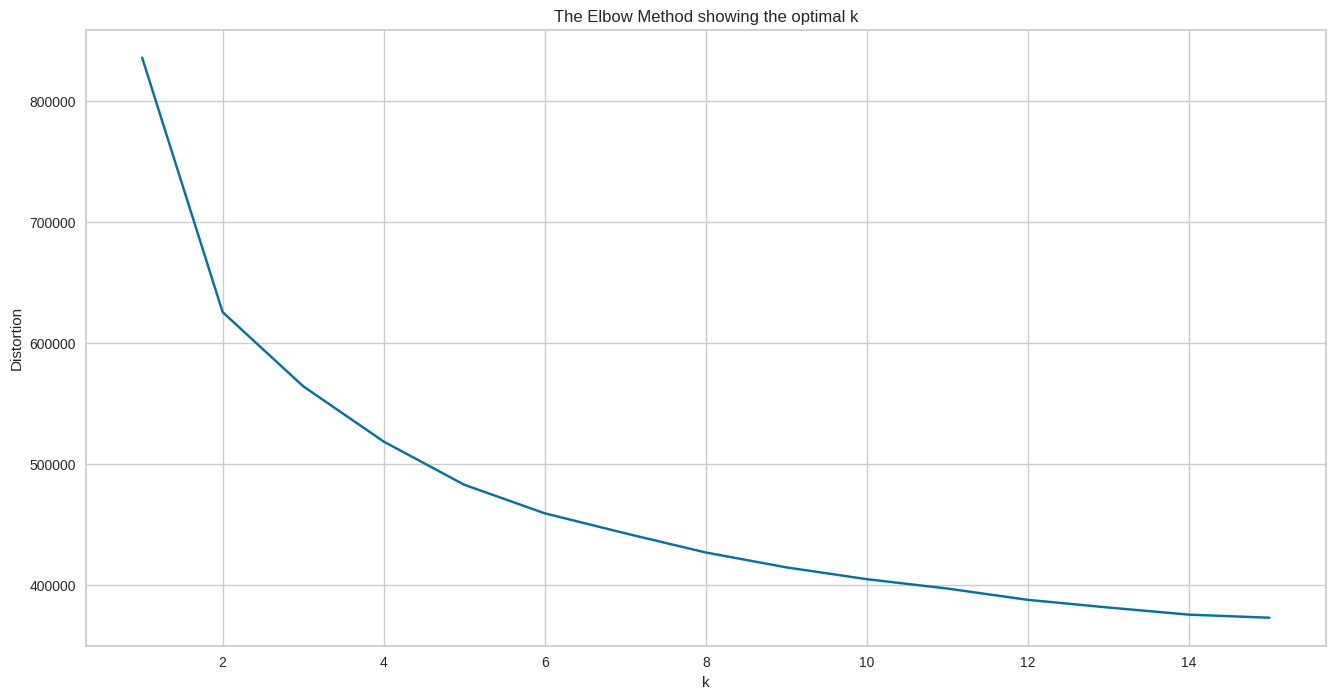

In [ ]:
distortions = []
K = range(1,16)
for k in K:
  kmeanModel = KMeans(n_clusters=k, n_init='auto')
  kmeanModel.fit(selected_feature)
  distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Silhouette Score (K Means)

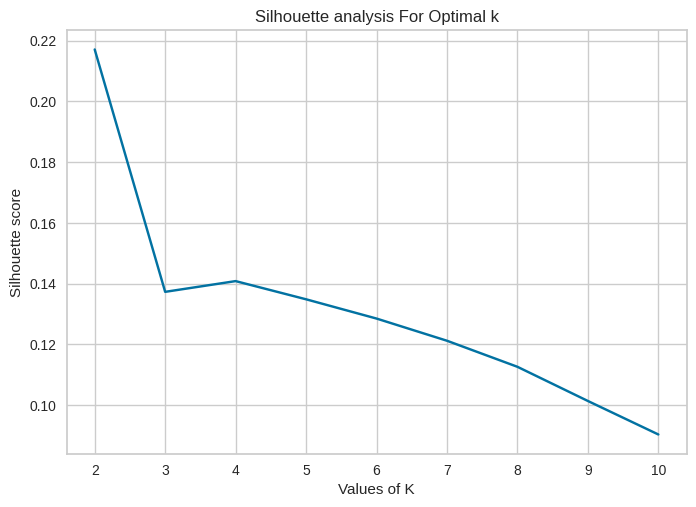

In [ ]:
# Untuk yg enggak ada time
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
  kmeans.fit(selected_feature)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(selected_feature, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

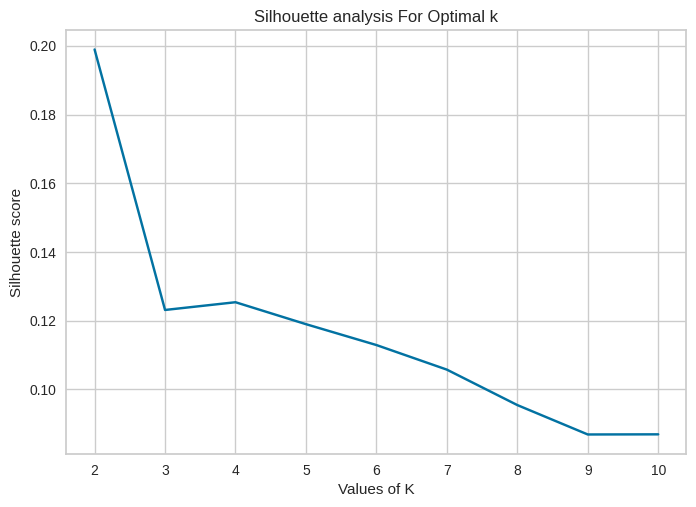

In [ ]:
# Untuk yang paling atas
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
  kmeans.fit(selected_feature)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(selected_feature, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

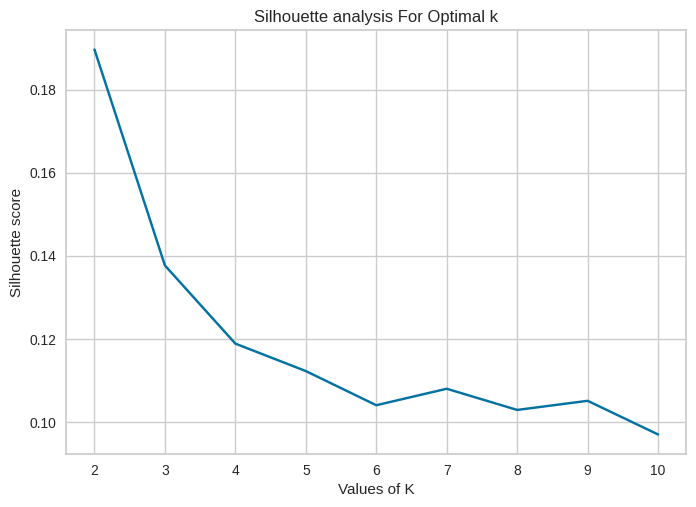

In [ ]:
# Untuk 1
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
  kmeans.fit(selected_feature)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(selected_feature, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

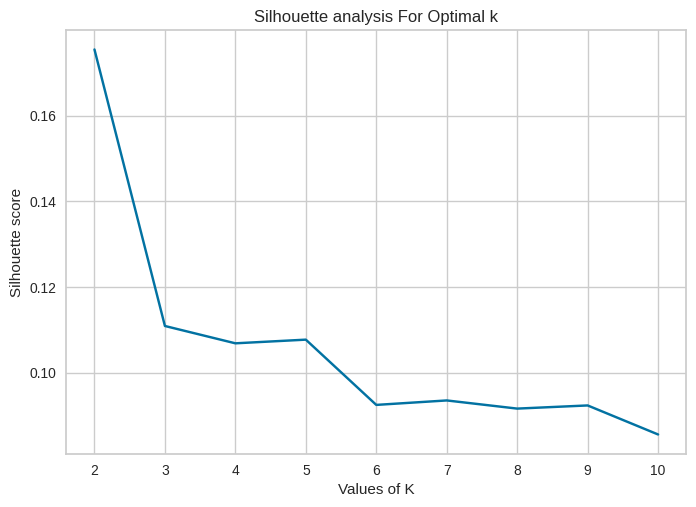

In [ ]:
# Untuk 2
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
  kmeans.fit(selected_feature)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(selected_feature, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

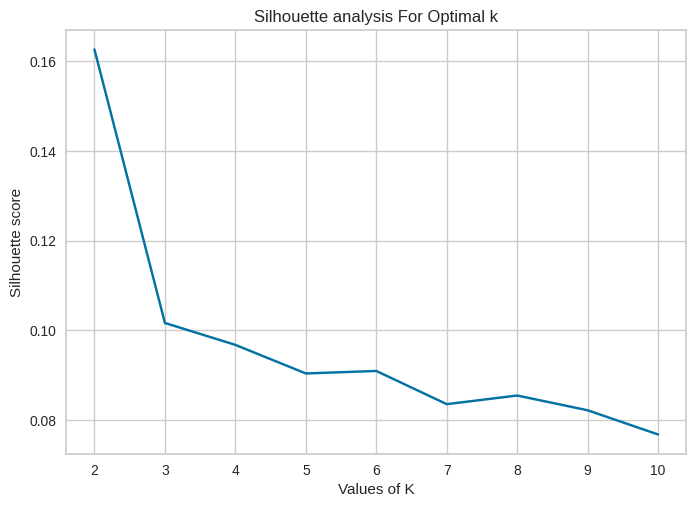

In [ ]:
# Untuk 3
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
  kmeans.fit(selected_feature)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(selected_feature, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

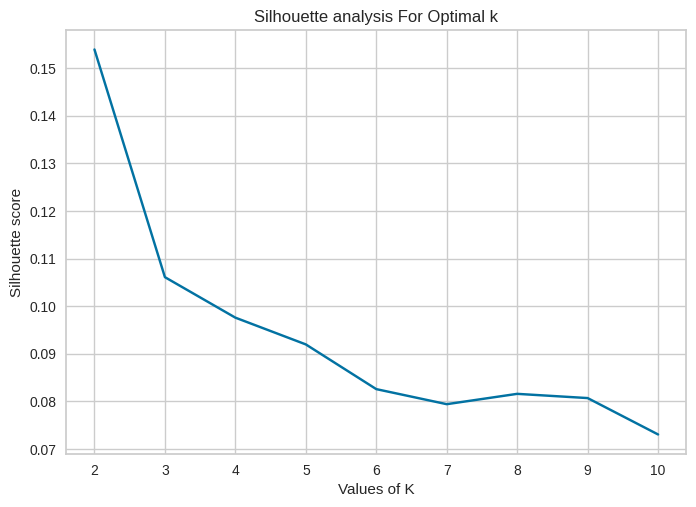

In [ ]:
# Untuk 4 (firstkill & death)
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
  kmeans.fit(selected_feature)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(selected_feature, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

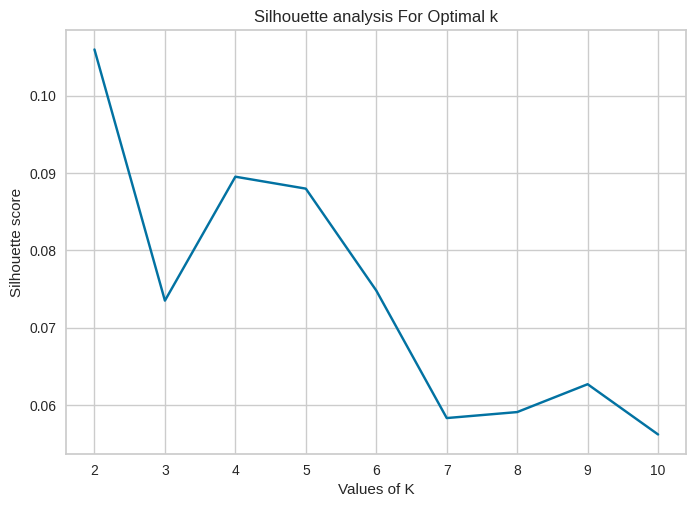

In [ ]:
# Untuk semua fitur
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
  kmeans.fit(df_encoded_standarization)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(df_encoded_standarization, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

## Prediksi Cluster (K Means)

In [ ]:
# Karena yang terbaik adalah n=4
model = KMeans(n_clusters=4,  n_init='auto')

cluster_assignment = model.fit_predict(selected_feature)
data_with_clusters = pd.DataFrame(selected_feature.copy())
data_with_clusters['Clusters'] = cluster_assignment
data_with_clusters.head()

ACS     Kills    Deaths   Assists  Map_Ascent  Map_Bind  Map_Breeze  \
0  1.773328  1.724370 -1.180433 -0.717402           0         0           1   
1  0.390898  0.265535 -1.180433  0.573506           0         0           1   
2  0.374824  0.447889 -1.439541  0.896233           0         0           1   
3  0.246225  0.447889 -0.662216 -1.040129           0         0           1   
4 -1.972092 -1.740364 -0.403108 -0.717402           0         0           1   

   Map_Fracture  Map_Haven  Map_Icebox  ...  Agent_raze  Agent_reyna  \
0             0          0           0  ...           0            0   
1             0          0           0  ...           0            0   
2             0          0           0  ...           0            0   
3             0          0           0  ...           0            0   
4             0          0           0  ...           0            0   

   Agent_sage  Agent_skye  Agent_sova  Agent_viper  Agent_yoru       ADR  \
0           0           0           0            0           0  1.628564   
1           0           0           0            0           0  0.767288   
2           0           0           1            0           0  0.437977   
3           0           0           0            1           0  0.260656   
4           0           1           0            0           0 -1.917865   

   FirstKills  Clusters  
0    1.111593         2  
1   -0.606890         3  
2    0.538765         3  
3    0.538765         3  
4    0.538765         1  

[5 rows x 31 columns]

In [ ]:
# # (semua fitur)
# model = KMeans(n_clusters=4,  n_init='auto')

# cluster_assignment = model.fit_predict(df_encoded_standarization)
# data_with_clusters = pd.DataFrame(df_encoded_standarization.copy())
# data_with_clusters['Clusters'] = cluster_assignment
# data_with_clusters.head()

## Visualisasi dalam 2D

In [ ]:
pca = PCA(n_components = 2)
pca.fit(selected_feature)
data_pca = pca.transform(selected_feature)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2'])
data_pca['Clusters'] = cluster_assignment
data_pca.head()

PC1       PC2  Clusters
0  3.179911 -1.281108         2
1  0.587799 -1.084118         3
2  0.945985 -0.854083         3
3  0.659904 -0.841716         3
4 -2.835469 -0.150321         1

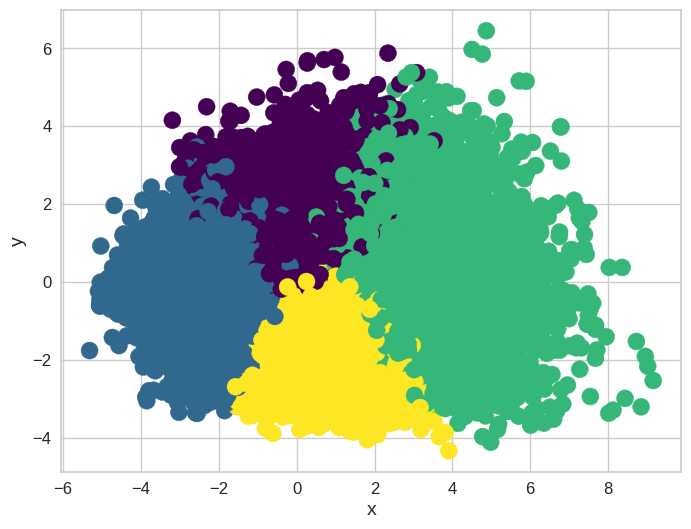

In [ ]:
# TODO: Tunjukkan plot berdasarkan hasil clustering yang sudah dilakukan.
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=data_pca['PC1'], y=data_pca['PC2'], s=150,
            c=data_pca['Clusters'].astype('category'),
            cmap='viridis')
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Visualisasi dalam 3D

In [ ]:
pca = PCA(n_components = 3)
pca.fit(selected_feature)
data_pca = pca.transform(selected_feature)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2', 'PC3'])
data_pca['Clusters'] = cluster_assignment
data_pca.head()

PC1       PC2       PC3  Clusters
0  3.179911 -1.281107 -0.603738         2
1  0.587799 -1.084117  1.121784         3
2  0.945985 -0.854084  1.057293         3
3  0.659904 -0.841717 -0.897889         3
4 -2.835469 -0.150322 -1.137082         1

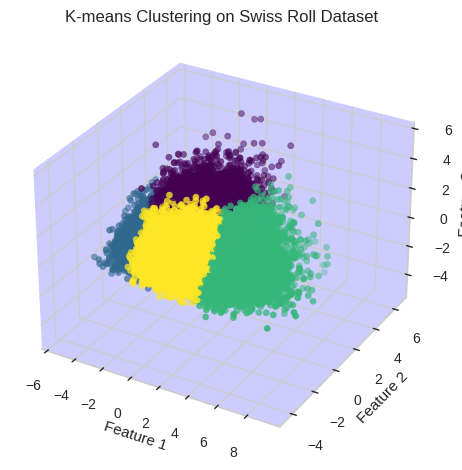

In [ ]:
from sklearn.datasets import make_swiss_roll

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca['PC1'], data_pca['PC2'], data_pca['PC3'], c=data_pca['Clusters'], cmap='viridis')
ax.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], model.cluster_centers_[:, 2],
           marker='x', color='red', s=100 , linewidths=3)# Set light blue background
ax.xaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))
ax.yaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))
ax.zaxis.set_pane_color((0.8, 0.8, 1.0, 1.0))
ax.set_title("K-means Clustering on Swiss Roll Dataset")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.show()

## Analisis Hasil Clustering

In [ ]:
analysis_data = df_encoded[['ACS', 'Kills', 'Deaths', 'Assists', 'Patch', 'Map_Ascent', 'Map_Bind', 'Map_Breeze',
          'Map_Fracture', 'Map_Haven', 'Map_Icebox', 'Map_Split', 'Agent_astra', 'Agent_breach', 'Agent_brimstone',
          'Agent_chamber', 'Agent_cypher', 'Agent_jett', 'Agent_kayo', 'Agent_killjoy', 'Agent_omen', 'Agent_phoenix',
          'Agent_raze', 'Agent_reyna', 'Agent_sage', 'Agent_skye', 'Agent_sova', 'Agent_viper', 'Agent_yoru', 'ADR',
          'FirstKills']].copy()

analysis_data['Clusters'] = cluster_assignment
analysis_data.head()

ACS  Kills  Deaths  Assists  Patch  Map_Ascent  Map_Bind  Map_Breeze  \
0  313.0   24.0    10.0      3.0    3.0           0         0           1   
1  227.0   16.0    10.0      7.0    3.0           0         0           1   
2  226.0   17.0     9.0      8.0    3.0           0         0           1   
3  218.0   17.0    12.0      2.0    3.0           0         0           1   
4   80.0    5.0    13.0      3.0    3.0           0         0           1   

   Map_Fracture  Map_Haven  ...  Agent_raze  Agent_reyna  Agent_sage  \
0             0          0  ...           0            0           0   
1             0          0  ...           0            0           0   
2             0          0  ...           0            0           0   
3             0          0  ...           0            0           0   
4             0          0  ...           0            0           0   

   Agent_skye  Agent_sova  Agent_viper  Agent_yoru    ADR  FirstKills  \
0           0           0            0           0  195.0         4.0   
1           0           0            0           0  161.0         1.0   
2           0           1            0           0  148.0         3.0   
3           0           0            1           0  141.0         3.0   
4           1           0            0           0   55.0         3.0   

   Clusters  
0         2  
1         3  
2         3  
3         3  
4         1  

[5 rows x 32 columns]

In [ ]:
# Lihat seluruh fitur
print(list(analysis_data.columns.values))

['ACS', 'Kills', 'Deaths', 'Assists', 'Patch', 'Map_Ascent', 'Map_Bind', 'Map_Breeze', 'Map_Fracture', 'Map_Haven', 'Map_Icebox', 'Map_Split', 'Agent_astra', 'Agent_breach', 'Agent_brimstone', 'Agent_chamber', 'Agent_cypher', 'Agent_jett', 'Agent_kayo', 'Agent_killjoy', 'Agent_omen', 'Agent_phoenix', 'Agent_raze', 'Agent_reyna', 'Agent_sage', 'Agent_skye', 'Agent_sova', 'Agent_viper', 'Agent_yoru', 'ADR', 'FirstKills', 'Clusters']


### Jumlah Tiap Cluster

In [ ]:
# Jumlah Tiap Cluster
jac = analysis_data.groupby(['Clusters']).size().reset_index(name='Jumlah')
jac

Clusters  Jumlah
0         0   26356
1         1   35389
2         2   19624
3         3   26881

<Axes: xlabel='Clusters'>

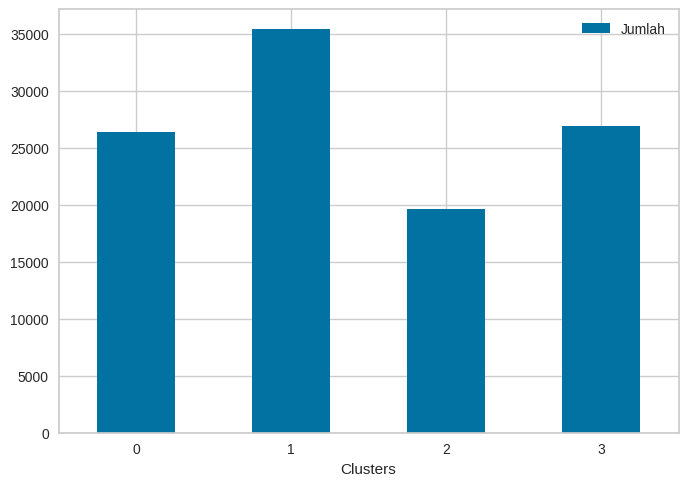

In [ ]:
# Jumlah Tiap Cluster
jac.plot(x='Clusters', y='Jumlah', kind="bar", rot=0)

### Rerata untuk Fitur yang mempengaruhi ACS

In [ ]:
# Lihat nilai rata-rata untuk kolom 'ACS', 'Kills', 'Deaths', 'Assists'
# column = []

# for i in list(df_encoded.columns.values):
#   if "Note_" not in i and "Agent_" not in i and "Map_" not in i:
#     column.append(i)

column = ['ACS', 'Kills', 'Deaths', 'Assists', 'ADR', 'FirstKills']

acs_ad = analysis_data.groupby(['Clusters'])[column].mean().reset_index()
acs_ad

# print(list(x.columns.values))

Clusters         ACS      Kills     Deaths   Assists         ADR  \
0         0  194.825960  15.292192  16.996813  8.209098  128.397860   
1         1  142.796801   9.255588  14.752889  3.820453   93.311707   
2         2  282.596209  21.694863  15.446137  4.732572  176.906390   
3         3  230.885830  15.551691  11.252818  4.499461  148.488300   

   FirstKills  
0    1.860601  
1    1.118059  
2    4.409600  
3    1.778133

array([<Axes: title={'center': 'FirstKills'}, ylabel='Clusters'>],
      dtype=object)

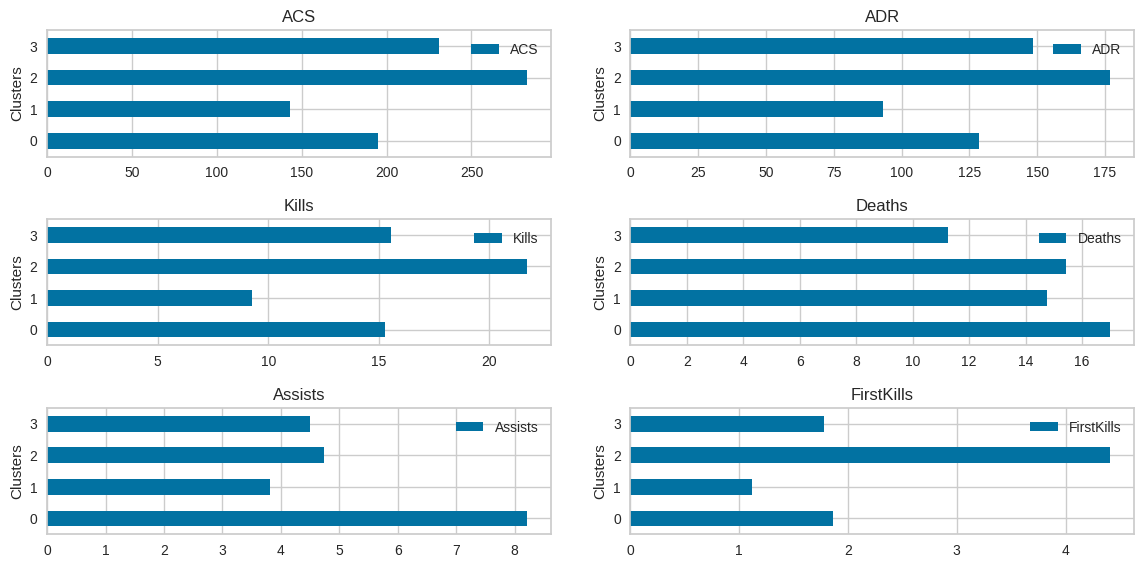

In [ ]:
# Visualisasi
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(12,6))
fig.tight_layout(pad=2.0)

acs_ad.plot(x="Clusters", y="ACS", kind="barh", ax = axes[0,0],subplots=True)
acs_ad.plot(x="Clusters", y="ADR", kind="barh", ax = axes[0,1],subplots=True)
acs_ad.plot(x="Clusters", y="Kills", kind="barh", ax = axes[1,0],subplots=True)
acs_ad.plot(x="Clusters", y="Deaths", kind="barh", ax = axes[1,1],subplots=True)
acs_ad.plot(x="Clusters", y="Assists", kind="barh", ax = axes[2,0],subplots=True)
acs_ad.plot(x="Clusters", y="FirstKills", kind="barh", ax = axes[2,1],subplots=True)

### Patch yang digunakan (Tidak jadi digunakan)

In [ ]:
tes = analysis_data[['Patch', 'Clusters']]

any_patch = tes.groupby(['Clusters']).value_counts().reset_index(name='Jumlah')
any_patch

Clusters  Patch  Jumlah
0          0    3.0   10143
1          0    2.0   10017
2          0    1.0    6196
3          1    3.0   13934
4          1    2.0   12566
5          1    1.0    8889
6          2    3.0    7587
7          2    2.0    7466
8          2    1.0    4571
9          3    3.0   10596
10         3    2.0    9751
11         3    1.0    6534

### Waktu Bermain (Tidak jadi digunakan)

In [ ]:
check = analysis_data[['Note_Afternoon', 'Note_Evening', 'Note_Morning', 'Note_Night', 'Clusters']]

name = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
afternoon = [0, 0, 0, 0]
evening = [0, 0, 0, 0]
morning = [0, 0, 0, 0]
night = [0, 0, 0, 0]

for ind in check.index:
    if check['Note_Afternoon'][ind] == 1:
      afternoon[check['Clusters'][ind]] += 1
    if check['Note_Evening'][ind] == 1:
      evening[check['Clusters'][ind]] += 1
    if check['Note_Morning'][ind] == 1:
      morning[check['Clusters'][ind]] += 1
    if check['Note_Night'][ind] == 1:
      night[check['Clusters'][ind]] += 1

d = {'name': name, 'afternoon': afternoon, 'evening': evening, 'morning': morning, 'night': night}
any_time = pd.DataFrame(data=d)
any_time

KeyError: ignored

<Axes: ylabel='name'>

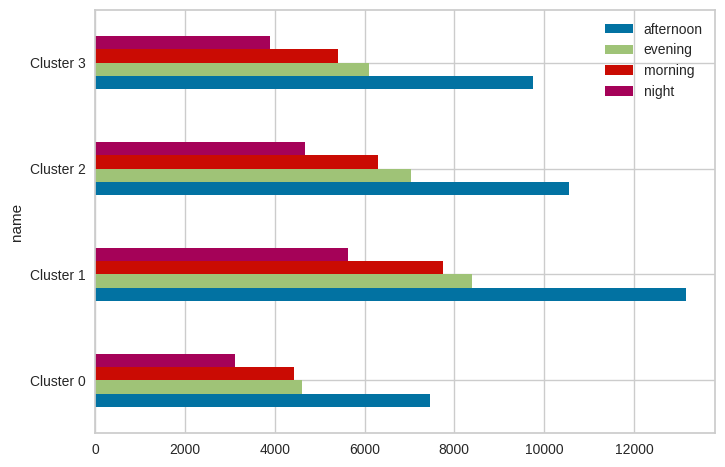

In [ ]:
any_time.plot(x="name", y=["afternoon", "evening", "morning", "night"], kind="barh")

### Agent yang digunakan

In [ ]:
check = analysis_data[['Agent_astra', 'Agent_breach', 'Agent_brimstone', 'Agent_chamber', 'Agent_cypher', 'Agent_jett',
                       'Agent_kayo', 'Agent_killjoy', 'Agent_omen', 'Agent_phoenix', 'Agent_raze', 'Agent_reyna', 'Agent_sage',
                       'Agent_skye', 'Agent_sova', 'Agent_viper', 'Agent_yoru', 'Clusters']]

name = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
astra = [0, 0, 0, 0]
breach = [0, 0, 0, 0]
brimstone = [0, 0, 0, 0]
chamber = [0, 0, 0, 0]
cypher = [0, 0, 0, 0]
jett = [0, 0, 0, 0]
kayo = [0, 0, 0, 0]
killjoy = [0, 0, 0, 0]
phoenix = [0, 0, 0, 0]
raze = [0, 0, 0, 0]
reyna = [0, 0, 0, 0]
sage = [0, 0, 0, 0]
skye = [0, 0, 0, 0]
sova = [0, 0, 0, 0]
viper = [0, 0, 0, 0]
yoru = [0, 0, 0, 0]
omen = [0, 0, 0, 0]

for ind in check.index:
    if check['Agent_astra'][ind] == 1:
      astra[check['Clusters'][ind]] += 1
    elif check['Agent_breach'][ind] == 1:
      breach[check['Clusters'][ind]] += 1
    elif check['Agent_brimstone'][ind] == 1:
      brimstone[check['Clusters'][ind]] += 1
    elif check['Agent_chamber'][ind] == 1:
      chamber[check['Clusters'][ind]] += 1
    elif check['Agent_cypher'][ind] == 1:
      cypher[check['Clusters'][ind]] += 1
    elif check['Agent_jett'][ind] == 1:
      jett[check['Clusters'][ind]] += 1
    elif check['Agent_kayo'][ind] == 1:
      kayo[check['Clusters'][ind]] += 1
    elif check['Agent_killjoy'][ind] == 1:
      killjoy[check['Clusters'][ind]] += 1
    elif check['Agent_omen'][ind] == 1:
      omen[check['Clusters'][ind]] += 1
    elif check['Agent_phoenix'][ind] == 1:
      phoenix[check['Clusters'][ind]] += 1
    elif check['Agent_raze'][ind] == 1:
      raze[check['Clusters'][ind]] += 1
    elif check['Agent_reyna'][ind] == 1:
      reyna[check['Clusters'][ind]] += 1
    elif check['Agent_sage'][ind] == 1:
      sage[check['Clusters'][ind]] += 1
    elif check['Agent_skye'][ind] == 1:
      skye[check['Clusters'][ind]] += 1
    elif check['Agent_sova'][ind] == 1:
      sova[check['Clusters'][ind]] += 1
    elif check['Agent_viper'][ind] == 1:
      viper[check['Clusters'][ind]] += 1
    elif check['Agent_yoru'][ind] == 1:
      yoru[check['Clusters'][ind]] += 1

d = {'name': name, 'astra': astra, 'breach': breach, 'brimstone': brimstone, 'chamber': chamber, 'cypher':cypher,
     'jett':jett, 'kayo':kayo, 'killjoy':killjoy, 'phoenix':phoenix, 'raze':raze, 'reyna':reyna, 'sage':sage, 'skye':skye,
     'sova':sova, 'viper':viper, 'yoru':yoru, 'omen':omen}
any_agent = pd.DataFrame(data=d)
any_agent

name  astra  breach  brimstone  chamber  cypher  jett  kayo  killjoy  \
0  Cluster 0   1745    2270        522       14    1832  1521   412     1219   
1  Cluster 1   2173    1905        704       53    3930  4026   203     3153   
2  Cluster 2    454     161        144       31     886  7117    53     1027   
3  Cluster 3   1602     717        391       53    2441  3272   118     2983   

   phoenix  raze  reyna  sage  skye  sova  viper  yoru  omen  
0      641  1721    746  2283  1313  5929   1557    31  2600  
1      749  1900   1029  2342  1854  4932   1907    42  4487  
2      884  3362   1642   599   473  1216    575    45   955  
3      664  2135   1052  1460  1172  4462   1525    31  2803

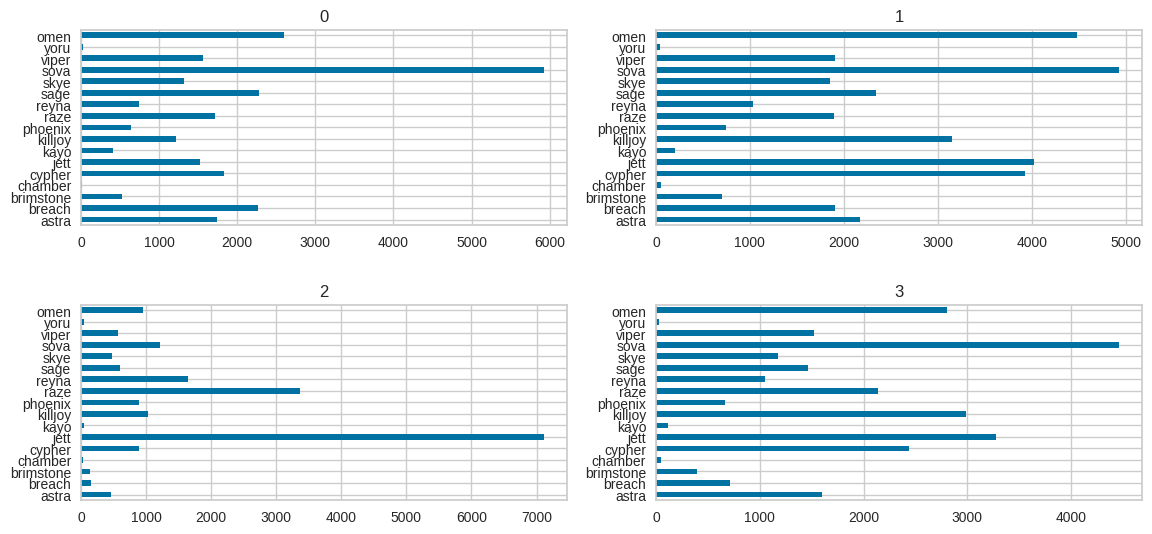

In [ ]:
col_agent = [i for i in list(any_agent.columns.values) if i != "name"]

fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(12,6))
fig.tight_layout(pad=3.0)

for k in range(4):
  if k == 0:
    ax = axes[0,0]
  elif k == 1:
    ax = axes[0,1]
  elif k == 2:
    ax = axes[1,0]
  else:
    ax = axes[1,1]

  row = any_agent.iloc[k, 1:]
  row.plot(kind='barh', ax = ax,subplots=True)

### Map yang digunakan

In [ ]:
check = analysis_data[['Map_Ascent', 'Map_Bind', 'Map_Breeze', 'Map_Fracture', 'Map_Haven', 'Map_Icebox', 'Map_Split', 'Clusters']]

name = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
ascent = [0, 0, 0, 0]
bind = [0, 0, 0, 0]
breeze = [0, 0, 0, 0]
fracture = [0, 0, 0, 0]
haven = [0, 0, 0, 0]
icebox = [0, 0, 0, 0]
split = [0, 0, 0, 0]

for ind in check.index:
    if check['Map_Ascent'][ind] == 1:
      ascent[check['Clusters'][ind]] += 1
    elif check['Map_Bind'][ind] == 1:
      bind[check['Clusters'][ind]] += 1
    elif check['Map_Breeze'][ind] == 1:
      breeze[check['Clusters'][ind]] += 1
    elif check['Map_Fracture'][ind] == 1:
      fracture[check['Clusters'][ind]] += 1
    elif check['Map_Haven'][ind] == 1:
      haven[check['Clusters'][ind]] += 1
    elif check['Map_Icebox'][ind] == 1:
      icebox[check['Clusters'][ind]] += 1
    elif check['Map_Split'][ind] == 1:
      split[check['Clusters'][ind]] += 1

d = {'name': name, 'Ascent': ascent, 'Bind': bind, 'Breeze': breeze, 'Fracture': fracture, 'Haven':haven, 'Icebox':icebox, 'Split':split}
any_map = pd.DataFrame(data=d)
any_map

name  Ascent  Bind  Breeze  Fracture  Haven  Icebox  Split
0  Cluster 0    6558  5379     893       208   5918    3401   3999
1  Cluster 1    8437  7624    1673       260   7921    4325   5149
2  Cluster 2    4547  3968     854       147   4143    2970   2995
3  Cluster 3    6548  5559    1240       205   6058    3394   3877

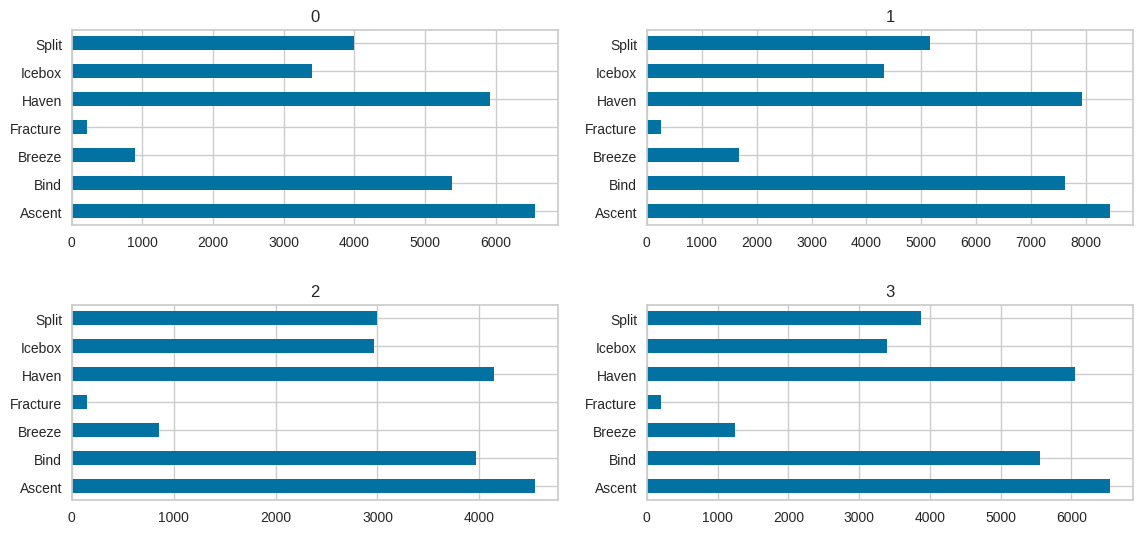

In [ ]:
col_map = [i for i in list(any_map.columns.values) if i != "name"]

fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(12,6))
fig.tight_layout(pad=3.0)

for k in range(4):
  if k == 0:
    ax = axes[0,0]
  elif k == 1:
    ax = axes[0,1]
  elif k == 2:
    ax = axes[1,0]
  else:
    ax = axes[1,1]

  row = any_map.iloc[k, 1:]
  row.plot(kind='barh', ax = ax,subplots=True)

## Uji Coba (Bisa diabaikan saja)

In [ ]:
pca = PCA(n_components = 3)
pca.fit(df_encoded)
data_pca = pca.transform(df_encoded)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head()